# Table of Contents
* [Import and Load Necessary Packages](#Import-and-Load-Necessary-Packages)    
* [2. Airbnb](#2.-Airbnb)
    * [2.1 Load and Explore the data](#2.1-Load-and-Explore-the-data)
    * [2.2 Train Test Split](#2.2-Train-Test-Split)        
    * [2.3 Feature Scaling](#2.3-Feature-Scaling)
    * [2.4 Modeling](#2.4-Modeling)
        * [Naive Baseline Model](#Naive-Baseline-Model)
        * [Random Forest Models (original with hyper tuned)](#Random-Forest-Models-(original-with-hyper-tuned))
        * [Gradient Boosting](#Gradient-Boosting)
        * [SVM Model](#SVM-Model)
        * [Decision Tree Regressor](#Decision-Tree-Regressor)
        * [MLP Model](#MLP-Model)
        * [LightGBM (best model)](#LightGBM-(best-model))
        * [CatBoost Model](#CatBoost-Model)
        * [XGBoost Model](#XGBoost-Model)
        * [Bayesian Ridge Model](#Bayesian-Ridge-Model)
        * [Stacking and Voting Models](#Stacking-and-Voting-Models)
    * [2.5 Documentation of Best Models](#2.5-Documentation-of-Best-Models)           

## Import and Load Necessary Packages

In [95]:
# ==============================
# 1. Core Libraries
# ==============================
import pandas as pd
import numpy as np
import random
from math import sqrt

# ==============================
# 2. Data Preprocessing
# ==============================

## Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

# ==============================
# 3. Data Splitting & Pipeline Construction
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ==============================
# 4. Machine Learning Models
# ==============================

## Regression Models
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor  # Neural Network Regressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
!pip install lightgbm
import lightgbm as lgb
from sklearn.linear_model import PoissonRegressor
!pip install catboost
import catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.ensemble import VotingRegressor


## Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


## Hyperparameter Tuning & Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

# ==============================
# 5. Model Performance Metrics
# ==============================
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import explained_variance_score

# ==============================
# 6. Statistical Analysis
# ==============================
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind

# ==============================
# 7. Data Visualization
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ==============================
# 8. Other Libraries
# ==============================
import xgboost as xgb
import shap

## 2. Airbnb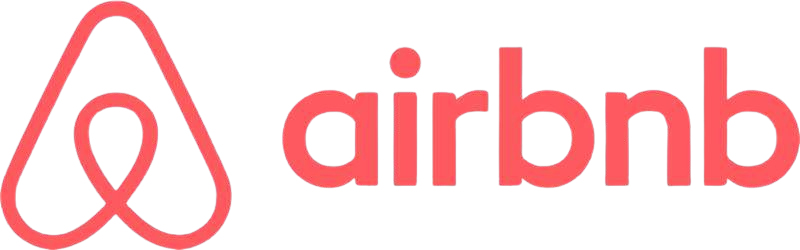

### 2.1 Load and Explore the data

In [204]:
# -------------------------
# 1. LOAD & PREPROCESS DATA
# -------------------------
# Load the dataset (ensure hr_data.csv is in your working directory)
df = pd.read_csv("listings_new.csv")

In [3]:
# Display the first few rows and summary
print("Raw Data:")
display(df.describe())

Raw Data:


department        region     education  no_of_trainings  \
count  54808.000000  54808.000000  54808.000000     54808.000000   
mean       0.185348      0.087592      0.559316         0.154670   
std        0.094552      0.081462      0.889452         0.335244   
min        0.017855      0.000521      0.000000         0.000000   
25%        0.130014      0.020931      0.000000         0.000000   
50%        0.207585      0.048847      0.000000         0.000000   
75%        0.306243      0.116121      2.000000         0.000000   
max        0.306243      0.225961      2.000000         2.302585   

                age  previous_year_rating  length_of_service  KPIs_met >80%  \
count  54808.000000          54808.000000       54808.000000   54808.000000   
mean      34.803915              3.304481           1.518125       0.351974   
std        7.660169              1.214770           0.737329       0.477590   
min       20.000000              1.000000           0.000000       0.000000   
25%       29.000000              3.000000           1.098612       0.000000   
50%       33.000000              3.000000           1.609438       0.000000   
75%       39.000000              4.000000           1.945910       1.000000   
max       60.000000              5.000000           3.610918       1.000000   

        awards_won?  avg_training_score  recruitment_channel_other  \
count  54808.000000        54808.000000               54808.000000   
mean       0.023172           63.386750                   0.555503   
std        0.150450           13.371559                   0.496914   
min        0.000000           39.000000                   0.000000   
25%        0.000000           51.000000                   0.000000   
50%        0.000000           60.000000                   1.000000   
75%        0.000000           76.000000                   1.000000   
max        1.000000           99.000000                   1.000000   

       recruitment_channel_sourcing  recruitment_channel_referred  \
count                  54808.000000                  54808.000000   
mean                       0.423661                      0.020836   
std                        0.494142                      0.142838   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        1.000000                      0.000000   
max                        1.000000                      1.000000   

           gender_f      gender_m   is_promoted  
count  54808.000000  54808.000000  54808.000000  
mean       0.297621      0.702379      0.085170  
std        0.457216      0.457216      0.279137  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        1.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000

### Print Summaries of the DataFrames

This information is valuable for understanding the structure of the data, which could help in identifying potential issues like missing values or data type inconsistencies, which allows me to make informed decisions about further analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   department                    54808 non-null  float64
 1   region                        54808 non-null  float64
 2   education                     54808 non-null  int64  
 3   no_of_trainings               54808 non-null  float64
 4   age                           54808 non-null  int64  
 5   previous_year_rating          54808 non-null  float64
 6   length_of_service             54808 non-null  float64
 7   KPIs_met >80%                 54808 non-null  int64  
 8   awards_won?                   54808 non-null  int64  
 9   avg_training_score            54808 non-null  int64  
 10  recruitment_channel_other     54808 non-null  int64  
 11  recruitment_channel_sourcing  54808 non-null  int64  
 12  recruitment_channel_referred  54808 non-null  int64  
 13  g

### Display the data types of the variables

In [5]:
df.dtypes

department                      float64
region                          float64
education                         int64
no_of_trainings                 float64
age                               int64
previous_year_rating            float64
length_of_service               float64
KPIs_met >80%                     int64
awards_won?                       int64
avg_training_score                int64
recruitment_channel_other         int64
recruitment_channel_sourcing      int64
recruitment_channel_referred      int64
gender_f                          int64
gender_m                          int64
is_promoted                       int64
dtype: object

### Display the descriptive statistics of the DataFrames

In [6]:
df.describe()

department        region     education  no_of_trainings  \
count  54808.000000  54808.000000  54808.000000     54808.000000   
mean       0.185348      0.087592      0.559316         0.154670   
std        0.094552      0.081462      0.889452         0.335244   
min        0.017855      0.000521      0.000000         0.000000   
25%        0.130014      0.020931      0.000000         0.000000   
50%        0.207585      0.048847      0.000000         0.000000   
75%        0.306243      0.116121      2.000000         0.000000   
max        0.306243      0.225961      2.000000         2.302585   

                age  previous_year_rating  length_of_service  KPIs_met >80%  \
count  54808.000000          54808.000000       54808.000000   54808.000000   
mean      34.803915              3.304481           1.518125       0.351974   
std        7.660169              1.214770           0.737329       0.477590   
min       20.000000              1.000000           0.000000       0.000000   
25%       29.000000              3.000000           1.098612       0.000000   
50%       33.000000              3.000000           1.609438       0.000000   
75%       39.000000              4.000000           1.945910       1.000000   
max       60.000000              5.000000           3.610918       1.000000   

        awards_won?  avg_training_score  recruitment_channel_other  \
count  54808.000000        54808.000000               54808.000000   
mean       0.023172           63.386750                   0.555503   
std        0.150450           13.371559                   0.496914   
min        0.000000           39.000000                   0.000000   
25%        0.000000           51.000000                   0.000000   
50%        0.000000           60.000000                   1.000000   
75%        0.000000           76.000000                   1.000000   
max        1.000000           99.000000                   1.000000   

       recruitment_channel_sourcing  recruitment_channel_referred  \
count                  54808.000000                  54808.000000   
mean                       0.423661                      0.020836   
std                        0.494142                      0.142838   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        1.000000                      0.000000   
max                        1.000000                      1.000000   

           gender_f      gender_m   is_promoted  
count  54808.000000  54808.000000  54808.000000  
mean       0.297621      0.702379      0.085170  
std        0.457216      0.457216      0.279137  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        1.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000

### Explore the size of the DataFrames

In [7]:
# Get the shape of the DataFrame
rows, cols = df.shape

# Print the number of rows
print(f"The DataFrame has {rows} rows and {cols} columns")

The DataFrame has 54808 rows and 16 columns


### Display and examine the contents in the DataFrames

In [8]:
pd.set_option('display.max_columns', None)
display(df.head())

department    region  education  no_of_trainings  age  \
0    0.207585  0.048847          0              0.0   38   
1    0.131057  0.035605          0              0.0   28   
2    0.207585  0.116121          2              0.0   41   
3    0.131057  0.089535          2              0.0   36   
4    0.306243  0.014310          0              0.0   26   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
0                   3.0           2.079442              0            0   
1                   3.0           0.000000              0            0   
2                   4.0           1.098612              1            0   
3                   4.0           2.302585              1            0   
4                   5.0           1.609438              0            0   

   avg_training_score  recruitment_channel_other  \
0                  61                          1   
1                  81                          0   
2                  63                          0   
3                  83                          1   
4                  46                          0   

   recruitment_channel_sourcing  recruitment_channel_referred  gender_f  \
0                             0                             0         1   
1                             1                             0         0   
2                             1                             0         1   
3                             0                             0         0   
4                             1                             0         1   

   gender_m  is_promoted  
0         0            0  
1         1            1  
2         0            0  
3         1            0  
4         0            0

In [9]:
pd.set_option('display.max_columns', None)
display(df.tail())

department    region  education  no_of_trainings  age  \
54803    0.207585  0.009748          0         0.000000   34   
54804    0.306243  0.015248          0         0.693147   34   
54805    0.096885  0.116121          0         1.098612   29   
54806    0.306243  0.015248          0         0.000000   23   
54807    0.130014  0.225961          2         0.000000   44   

       previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
54803                   4.0           1.791759              0            0   
54804                   3.0           1.609438              0            0   
54805                   1.0           1.098612              0            0   
54806                   3.0           0.000000              0            0   
54807                   5.0           1.609438              1            0   

       avg_training_score  recruitment_channel_other  \
54803                  63                          0   
54804                  51                          1   
54805                  93                          1   
54806                  50                          1   
54807                  75                          0   

       recruitment_channel_sourcing  recruitment_channel_referred  gender_f  \
54803                             1                             0         1   
54804                             0                             0         0   
54805                             0                             0         0   
54806                             0                             0         0   
54807                             0                             1         1   

       gender_m  is_promoted  
54803         0            0  
54804         1            0  
54805         1            0  
54806         1            0  
54807         0            1

### Checking for null values

In [10]:
# Percentage of null data in each column of the merged dataset
null_percentages = df.isnull().mean() * 100
print(null_percentages.sort_values(ascending=True).to_string())

department                      0.0
region                          0.0
education                       0.0
no_of_trainings                 0.0
age                             0.0
previous_year_rating            0.0
length_of_service               0.0
KPIs_met >80%                   0.0
awards_won?                     0.0
avg_training_score              0.0
recruitment_channel_other       0.0
recruitment_channel_sourcing    0.0
recruitment_channel_referred    0.0
gender_f                        0.0
gender_m                        0.0
is_promoted                     0.0


### Visualize the probability distribution of data

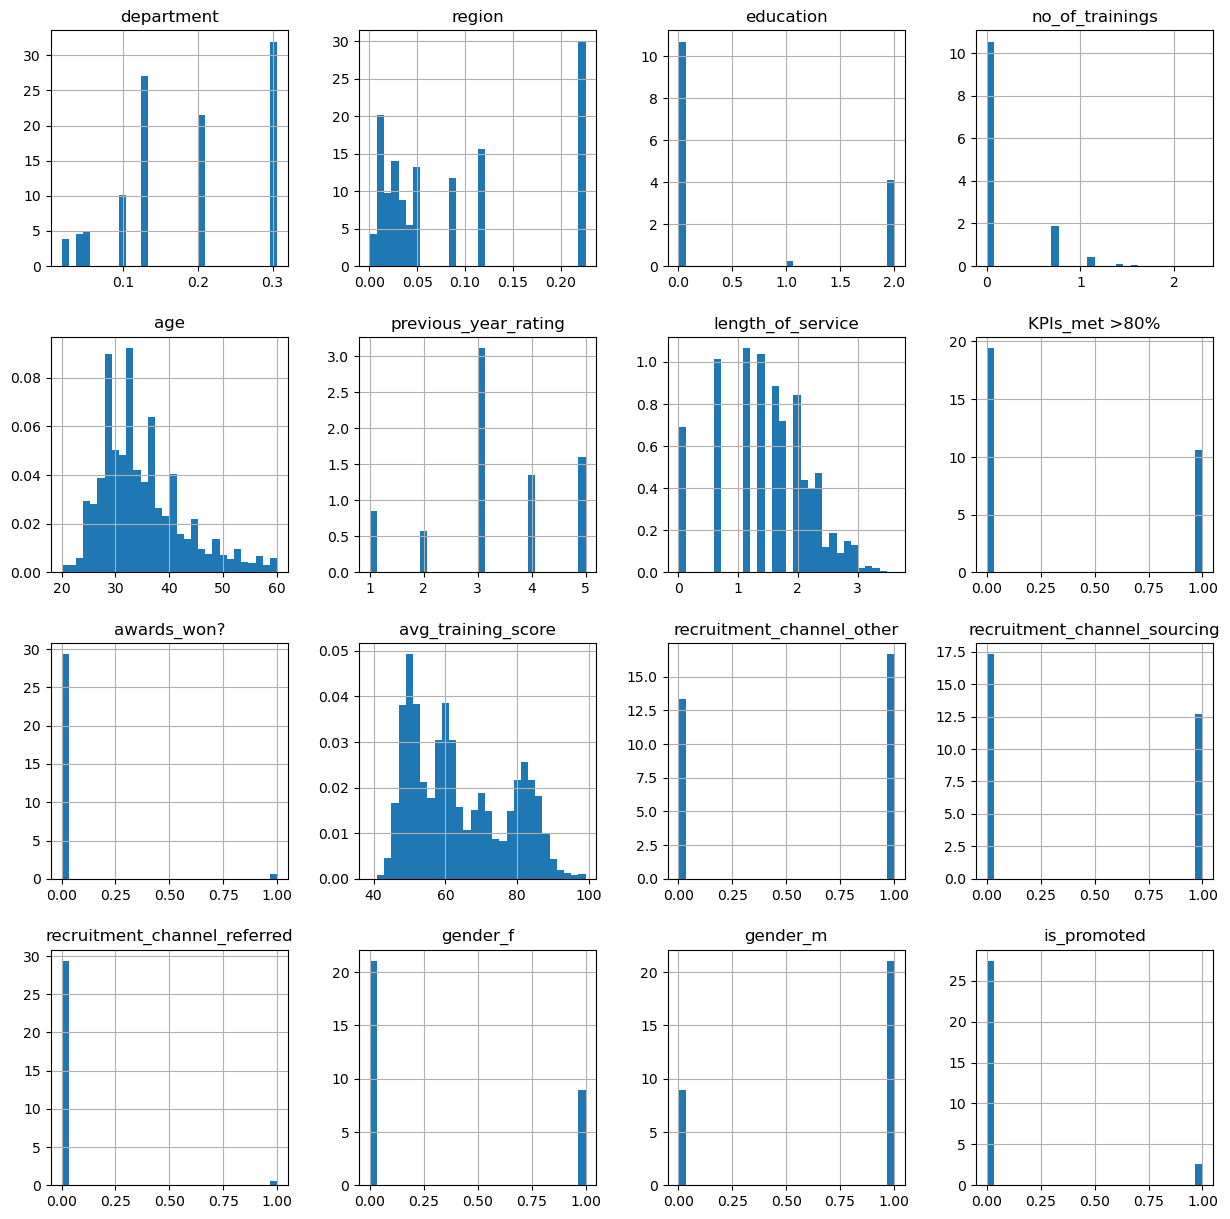

In [11]:
# Visualise the distribution of numerical features using histograms
df.hist(bins=30, figsize=(15,15), density=True)
plt.show()

In [12]:
# Plot histogram, Q-Q plots, and boxplot to have a look at the variable distribution

def diagnostic_plots(df, variable):
    # function takes a final_data and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


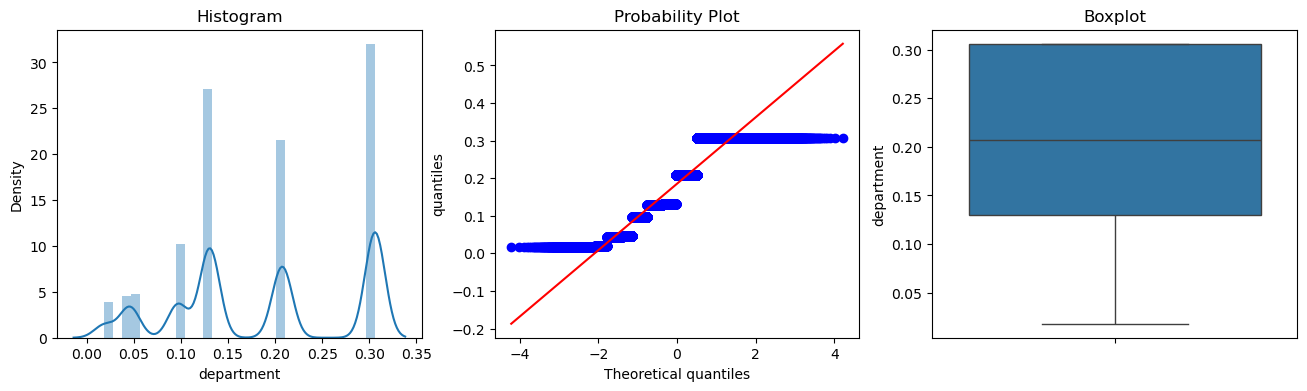

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


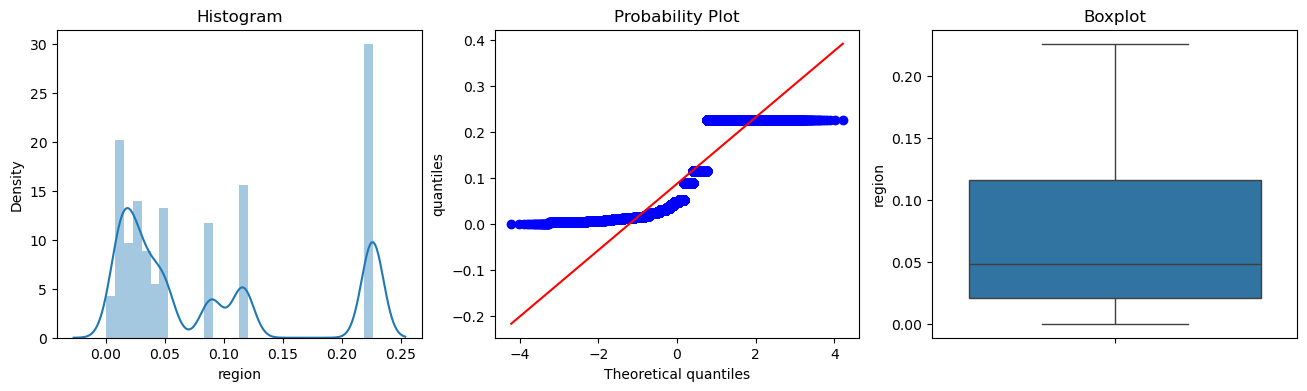

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


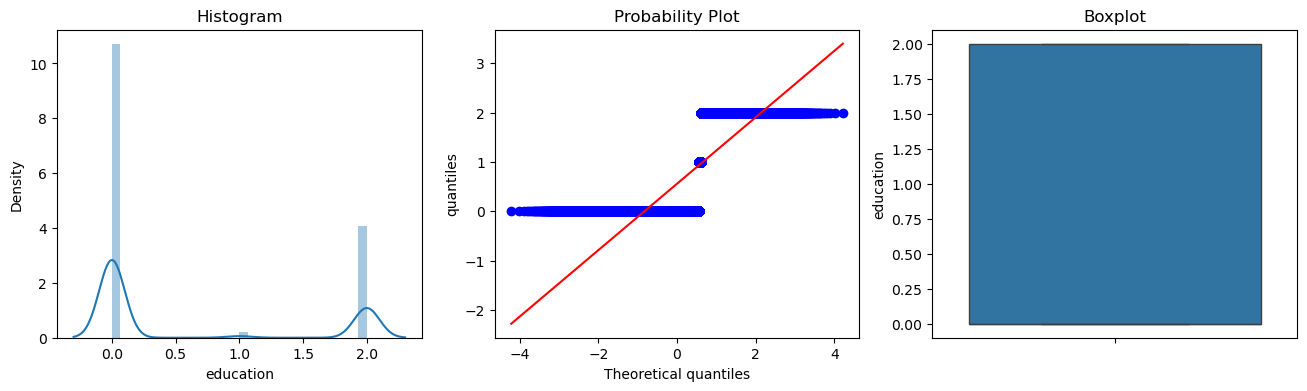

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


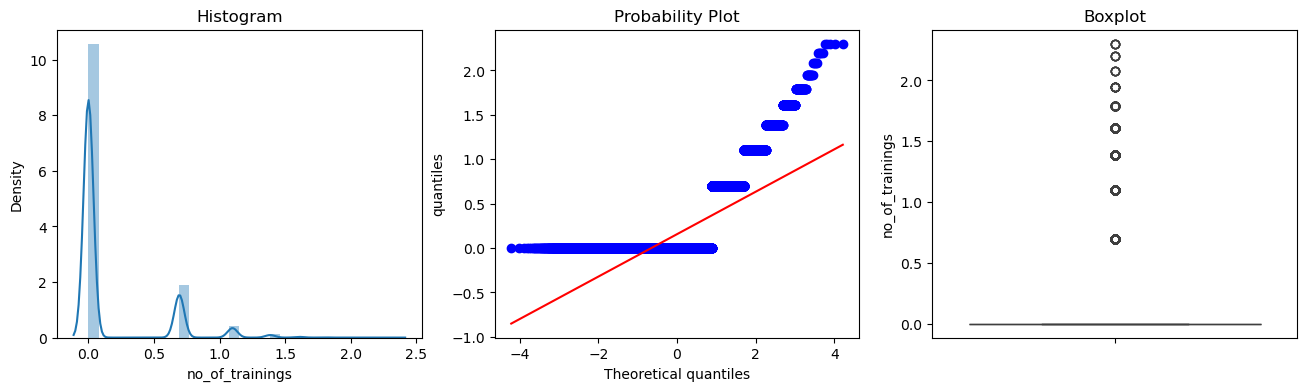

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


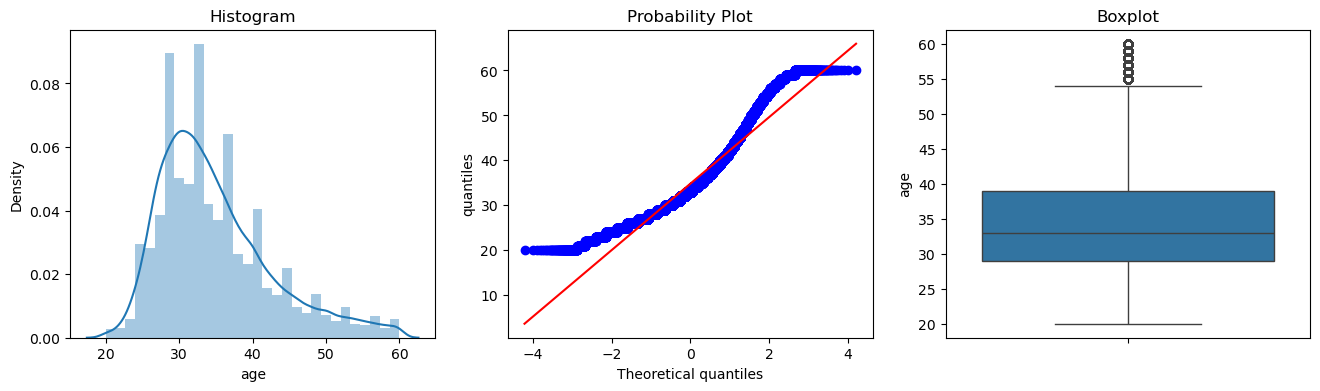

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


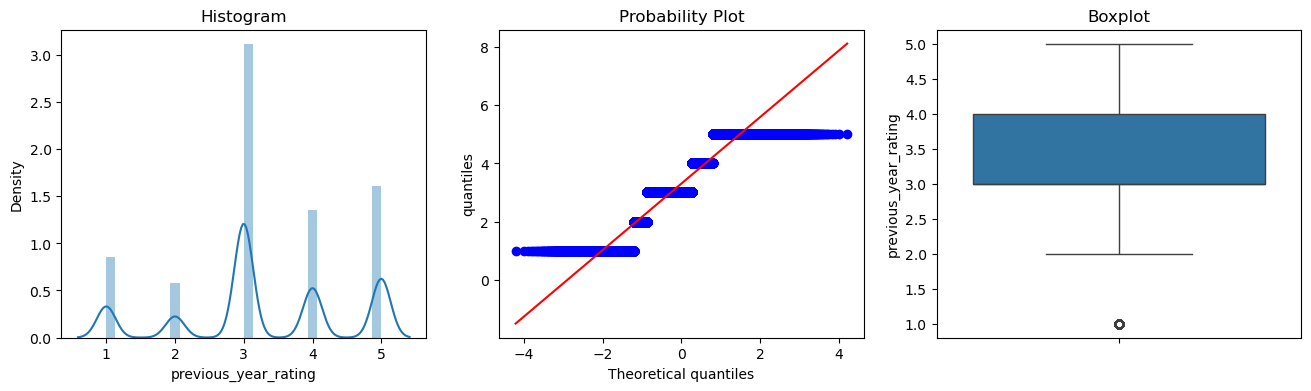

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


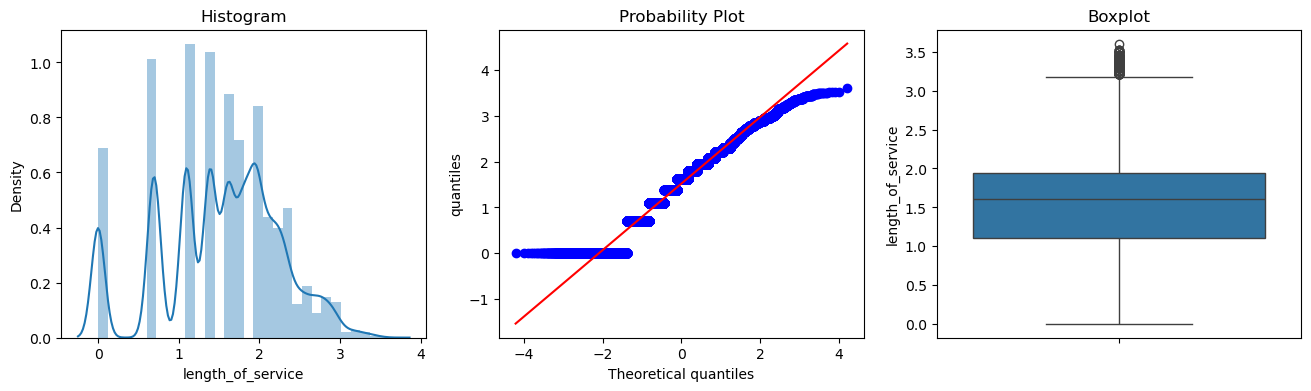

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


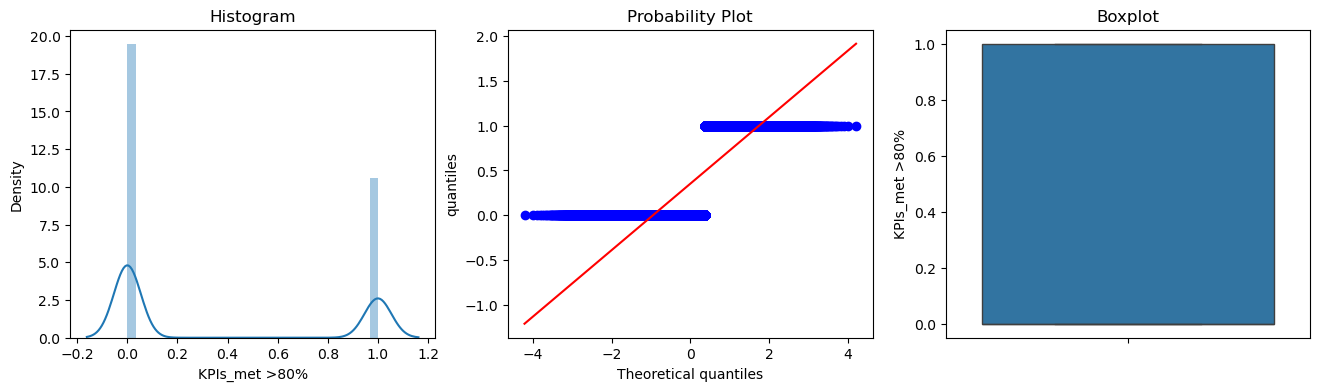

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


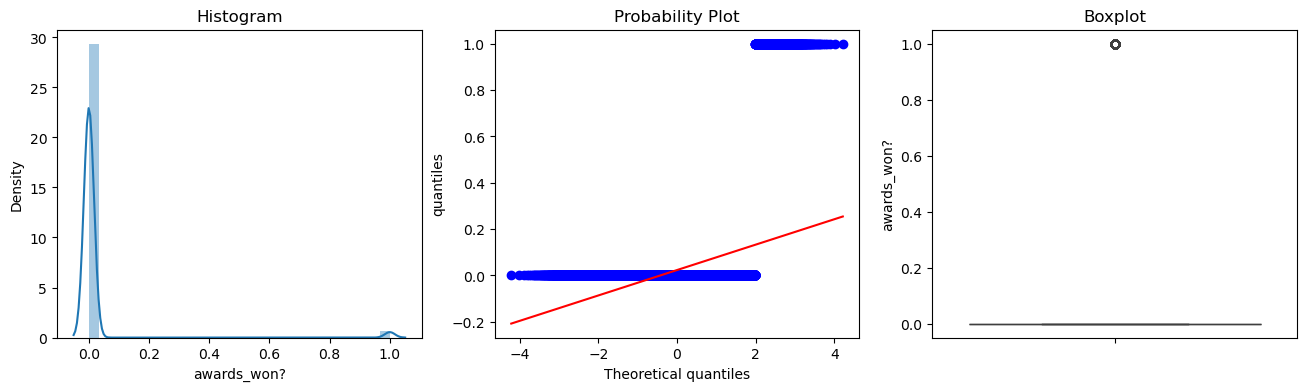

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


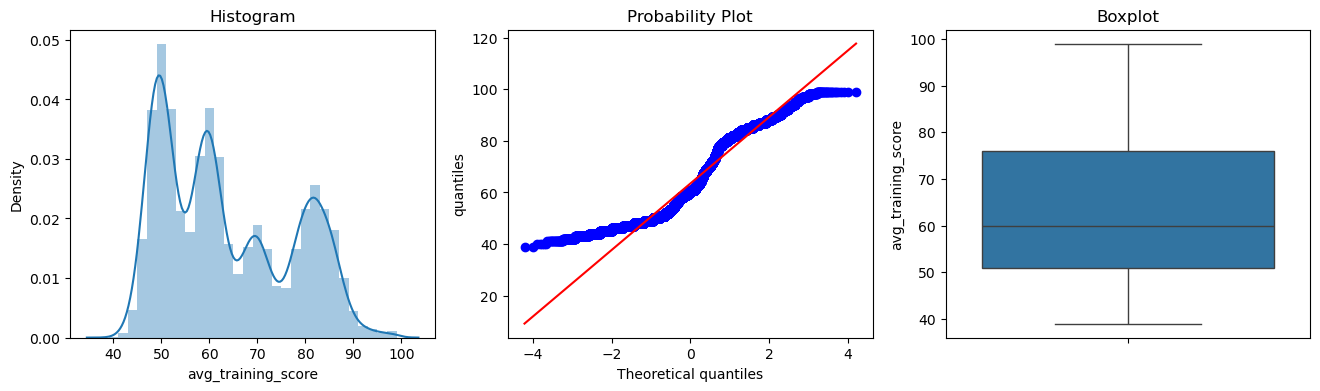

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


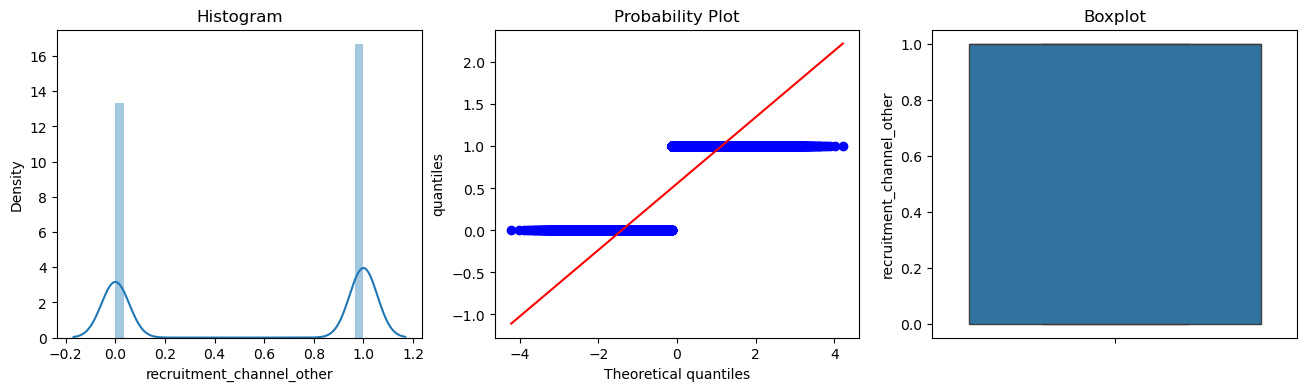

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


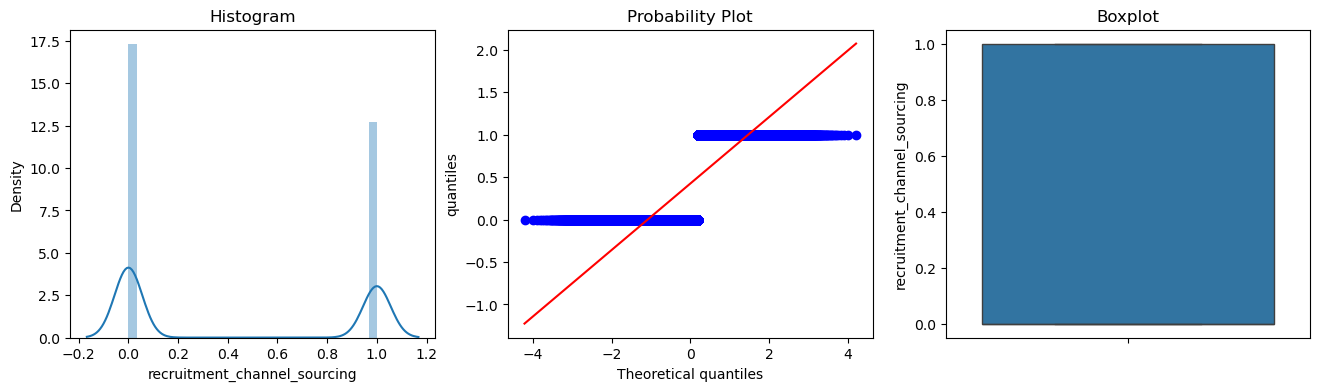

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


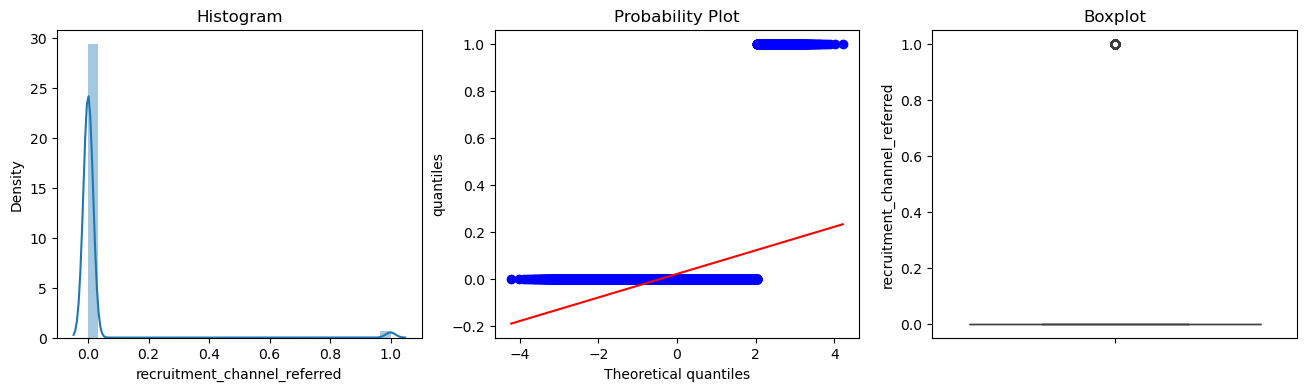

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


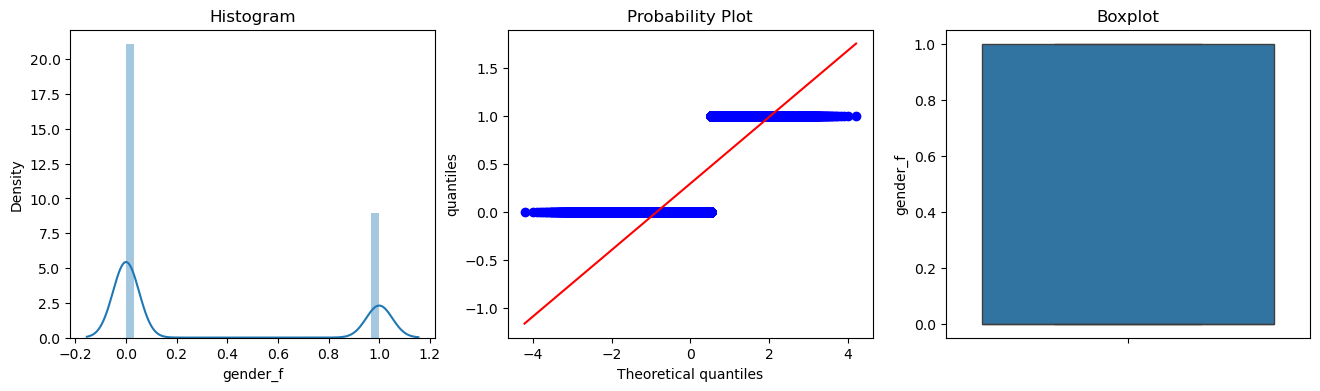

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


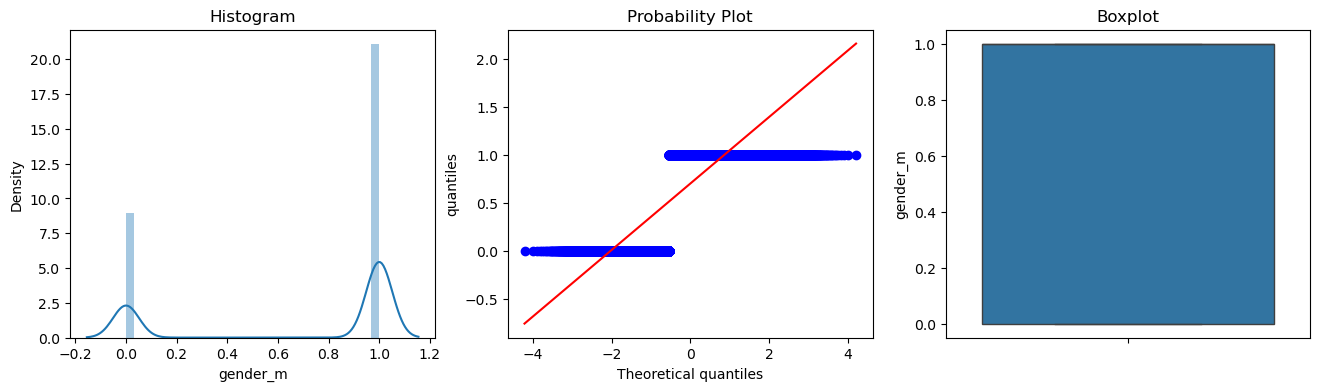

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


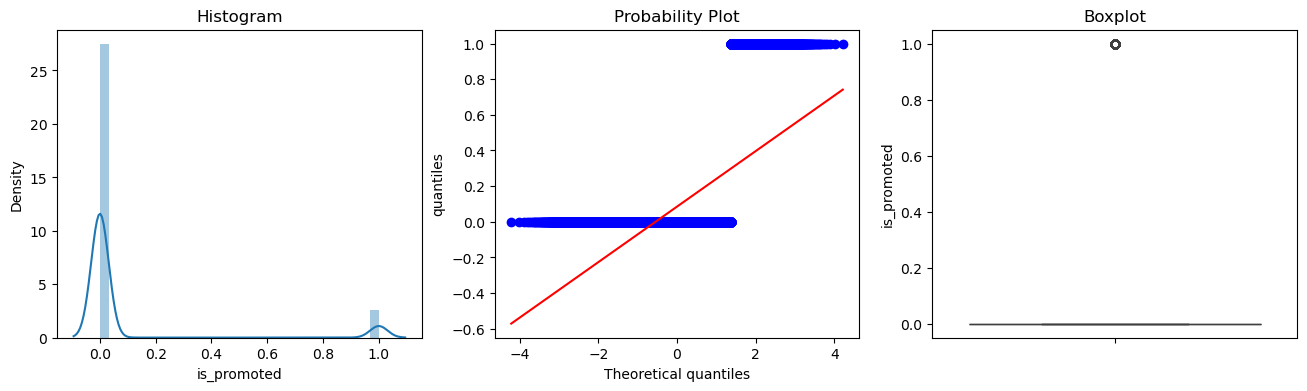

In [13]:
# Check original distribution
# and detecting outliers using boxplots
for num_column in df:
    diagnostic_plots(df, num_column)

In [124]:
df.head()

neighbourhood  latitude  longitude  minimum_nights  number_of_reviews  \
0     142.686316   1.31365  103.89233        0.882755           2.505542   
1     171.439462   1.32367  103.85393        1.087787           0.629484   
2     142.686316   1.31273  103.87559        0.763288           2.605945   
3     154.848837   1.29033  103.84141        0.547660           1.293149   
4     142.686316   1.31110  103.89971        0.547660           1.741654   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0           0.720200                               4               134   
1           0.106477                             203               265   
2           0.663204                               6               141   
3           0.255157                               5               180   
4           0.468866                               2                45   

   last_review_dayofweek  neighbourhood_group_Central Region  \
0                    1.0                                   1   
1                    3.0                                   1   
2                    2.0                                   1   
3                    6.0                                   1   
4                    3.0                                   1   

   neighbourhood_group_North-East Region  neighbourhood_group_West Region  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

   neighbourhood_group_East Region  neighbourhood_group_North Region  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   last_review_season_Southwest Monsoon  last_review_season_Northeast Monsoon  \
0                                     1                                     0   
1                                     0                                     1   
2                                     1                                     0   
3                                     0                                     1   
4                                     1                                     0   

   last_review_season_Hot and Dry  last_review_season_Inter-monsoon  \
0                               0                                 0   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   room_type_Private room  room_type_Entire home/apt  room_type_Shared room  \
0                       1                          0                      0   
1                       0                          1                      0   
2                       0                          1                      0   
3                       0                          1                      0   
4                       0                          1                      0   

   airbnb_era_Post-Maturity  airbnb_era_Maturity  \
0                         1                    0   
1                         0                    1   
2                         1                    0   
3                         1                    0   
4                         1                    0   

   airbnb_era_Significant Growth  airbnb_era_Growth  price  
0                              0                  0     3

### 2.2 Train Test Split

In [125]:
# -------------------------
# 2. SET UP FEATURES & TARGET
# -------------------------
X = df.drop(columns=['price'])
y = df['price']

In [126]:
# -------------------------
# 3. SPLIT DATA INTO TRAIN & TEST
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training and Test Sets Created.")

Training and Test Sets Created.


### 2.3 Feature Scaling

In [127]:
# # Feature Scaling

# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [129]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

In [130]:
X_train.dtypes

neighbourhood                            float64
latitude                                 float64
longitude                                float64
minimum_nights                           float64
number_of_reviews                        float64
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
last_review_dayofweek                    float64
neighbourhood_group_Central Region       float64
neighbourhood_group_North-East Region    float64
neighbourhood_group_West Region          float64
neighbourhood_group_East Region          float64
neighbourhood_group_North Region         float64
last_review_season_Southwest Monsoon     float64
last_review_season_Northeast Monsoon     float64
last_review_season_Hot and Dry           float64
last_review_season_Inter-monsoon         float64
room_type_Private room                   float64
room_type_Entire home/apt                float64
room_type_Shared roo

In [131]:
y_train.dtype

dtype('int64')

In [132]:
# Find numerical variables after one-hot encoding
X_train_num_cols = [n for n in X_train.columns if X_train[n].dtypes!='O']

In [133]:
# Percentage of null data in each column of the merged dataset
null_percentages = X_train.isnull().mean() * 100
null_percentages.sort_values(ascending=True)

neighbourhood                            0.0
airbnb_era_Maturity                      0.0
airbnb_era_Post-Maturity                 0.0
room_type_Shared room                    0.0
room_type_Entire home/apt                0.0
room_type_Private room                   0.0
last_review_season_Inter-monsoon         0.0
last_review_season_Hot and Dry           0.0
last_review_season_Northeast Monsoon     0.0
last_review_season_Southwest Monsoon     0.0
neighbourhood_group_North Region         0.0
airbnb_era_Significant Growth            0.0
neighbourhood_group_East Region          0.0
neighbourhood_group_North-East Region    0.0
neighbourhood_group_Central Region       0.0
last_review_dayofweek                    0.0
availability_365                         0.0
calculated_host_listings_count           0.0
reviews_per_month                        0.0
number_of_reviews                        0.0
minimum_nights                           0.0
longitude                                0.0
latitude  

## 2.4 Modeling

### Naive Baseline Model

In [134]:
# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

153.19089900110987
The train mean target value is 153.19.


In [135]:
# Create a list of predicted values for the target variable
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_scaled.iloc[:,0]]
y_train_preds_naive[0:5]

[153.19, 153.19, 153.19, 153.19, 153.19]

In [136]:
# Create a list of predictions for the target variable in the test set
# And each prediction is the rounded mean of the training target variable

y_test_preds_naive = [round(mean_target_value,2) for row in X_test_scaled.iloc[:,0]]
y_test_preds_naive[0:5]

[153.19, 153.19, 153.19, 153.19, 153.19]

In [137]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 84568.36.
The Naive Baseline Model's MSE on test data is 17381.45.

The Naive Baseline Model's RMSE on train data is 290.81.
The Naive Baseline Model's RMSE on test data is 131.84.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


C:\Users\tswr1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tswr1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## More Advanced Models

## Random Forest (Original with Hyper Tuned Model)

### Original

In [138]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
print("\nRandom Forest Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Model Evaluation:
Mean Absolute Error (MAE): 51.38176051779936
Mean Squared Error (MSE): 14151.229242200649
R² Score: 0.18396952613183537


### Hyper Tuned Model

In [141]:
# -------------------------
# 7. HYPERPARAMETER TUNING FOR RANDOM FOREST
# -------------------------
# Define hyperparameter search space
param_grid = {
    "n_estimators": [50, 100, 200, 500],  # Number of trees in the forest
    "max_depth": [None, 10, 20, 30, 50],  # Depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 5, 10],  # Minimum samples per leaf node
    "max_features": ["sqrt", "log2", None]  # Number of features considered per split
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Randomized Search with 5-fold CV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [142]:
# Get the best model and predict on test set
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest Model
print("\nRandom Forest Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Model Evaluation:
Mean Absolute Error (MAE): 58.82961922376166
Mean Squared Error (MSE): 14814.873243101038
R² Score: 0.14570050234134146


## Gradient Boosting

In [144]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=28, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb_train = gb_model.predict(X_train)  # Train set predictions
y_pred_gb_test = gb_model.predict(X_test)  # Test set predictions

# Evaluate Gradient Boosting Model
print("\nGradient Boosting Model Evaluation:")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_gb_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_gb_train))
print("R² Score:", r2_score(y_train, y_pred_gb_train))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb_test))
print("R² Score:", r2_score(y_test, y_pred_gb_test))


Gradient Boosting Model Evaluation:
Train Set:
Mean Absolute Error (MAE): 66.46904961165609
Mean Squared Error (MSE): 35605.21291026127
R² Score: 0.5789771264835231

Test Set:
Mean Absolute Error (MAE): 65.06941812892498
Mean Squared Error (MSE): 13547.606971528943
R² Score: 0.2187773975289501


## SVM Model

### Original

In [145]:
# Support Vector Machine (SVM) Model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM Model
print("SVM Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_svm))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_svm))
print("R² Score:", r2_score(y_test, y_pred_svm))

SVM Model Evaluation:
Mean Absolute Error (MAE): 56.68428634647681
Mean Squared Error (MSE): 13386.682443378284
R² Score: 0.22805710862091533


### Hyper Tuned Models

#### Random Search

In [146]:
# Define the SVR model
svr = SVR()

# Define the parameter distribution
param_dist = {
    'C': np.logspace(-2, 2, 10),  # Log scale for better coverage
    'epsilon': np.linspace(0.01, 1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(svr, param_dist, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params_random = random_search.best_params_
print("Best Parameters (RandomizedSearchCV):", best_params_random)

# Train the best model
best_svr_random = SVR(**best_params_random)
best_svr_random.fit(X_train, y_train)
y_pred_svr_random = best_svr_random.predict(X_test)

# Evaluate the tuned model
print("Tuned SVM Model Evaluation (RandomizedSearchCV):")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_svr_random))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_svr_random))
print("R² Score:", r2_score(y_test, y_pred_svr_random))

Best Parameters (RandomizedSearchCV): {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.67, 'degree': 2, 'C': 100.0}
Tuned SVM Model Evaluation (RandomizedSearchCV):
Mean Absolute Error (MAE): 57.255572837435935
Mean Squared Error (MSE): 13366.057698473393
R² Score: 0.2292464343021049


#### Gridsearch

In [147]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],  # Epsilon in SVR
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]  # Only applicable for 'poly' kernel
}

# Perform GridSearchCV
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the best model
best_svr = SVR(**best_params)
best_svr.fit(X_train, y_train)
y_pred_svr = best_svr.predict(X_test)

# Evaluate the tuned model
print("Tuned SVM Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_svr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_svr))
print("R² Score:", r2_score(y_test, y_pred_svr))

Best Parameters: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Tuned SVM Model Evaluation:
Mean Absolute Error (MAE): 57.12736485830117
Mean Squared Error (MSE): 13338.434426904481
R² Score: 0.23083932994405698


## Decision Tree Regressor

In [148]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Model
print("\nDecision Tree Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Model Evaluation:
Mean Absolute Error (MAE): 67.31144795970218
Mean Squared Error (MSE): 14854.070829273776
R² Score: 0.14344017397893738


## MLP Model

### Hyper Tuned Models

#### First Attempt at Reducing overfitting

In [159]:
# Define the model
mlp_model = MLPRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Number of neurons in hidden layers
    'activation': ['relu', 'tanh', 'logistic'],       # Activation function
    'solver': ['adam', 'sgd'],                        # Optimization algorithm
    'alpha': [0.0001, 0.001, 0.01],                   # Regularization strength
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
    'max_iter': [1000, 2000]                           # Maximum number of iterations
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predict with the best model
y_pred_mlp = best_mlp_model.predict(X_test)

# Evaluate the model
print("\nMLP Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_mlp))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_mlp))
print("R² Score:", r2_score(y_test, y_pred_mlp))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}

MLP Model Evaluation:
Mean Absolute Error (MAE): 0.29247102996884616
Mean Squared Error (MSE): 0.14692768546227444
R² Score: 0.41228019395090887


In [160]:
y_pred_train = best_mlp_model.predict(X_train)
# Evaluate the model on the train data
print("\nTrain Evaluation:")
print("Mean Absolute Error (MAE) on Train Data:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error (MSE) on Train Data:", mean_squared_error(y_train, y_pred_train))
print("R² Score on Train Data:", r2_score(y_train, y_pred_train))


Train Evaluation:
Mean Absolute Error (MAE) on Train Data: 0.24388438168083612
Mean Squared Error (MSE) on Train Data: 0.10397392360706884
R² Score on Train Data: 0.5841031272067063


#### Second Attempt at Reducing overfitting

In [161]:
# Define the model with early stopping
mlp_model_reduceOverfit = MLPRegressor(random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(20,), (30,), (50,), (100,), (50, 50)],  # Number of neurons in hidden layers
    'activation': ['relu', 'tanh', 'logistic'],       # Activation function
    'solver': ['adam', 'sgd'],                        # Optimization algorithm
    'alpha': [0.0001, 0.001, 0.01],                   # Regularization strength
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
    'max_iter': [1000, 2000]                           # Maximum number of iterations
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp_model_reduceOverfit, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predict with the best model
y_pred_mlp = best_mlp_model.predict(X_test)

# Evaluate the model
print("\nMLP Model Evaluation (attempt to reduce overfitting):")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_mlp))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_mlp))
print("R² Score:", r2_score(y_test, y_pred_mlp))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}

MLP Model Evaluation (attempt to reduce overfitting):
Mean Absolute Error (MAE): 0.30319401447136074
Mean Squared Error (MSE): 0.14750347528227895
R² Score: 0.40997699914951125


In [162]:
y_pred_train = best_mlp_model.predict(X_train)
# Evaluate the model on the train data
print("\nTrain Evaluation:")
print("Mean Absolute Error (MAE) on Train Data:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error (MSE) on Train Data:", mean_squared_error(y_train, y_pred_train))
print("R² Score on Train Data:", r2_score(y_train, y_pred_train))


Train Evaluation:
Mean Absolute Error (MAE) on Train Data: 0.2853495590716296
Mean Squared Error (MSE) on Train Data: 0.13147203392543563
R² Score on Train Data: 0.47411037428960623


## LightGBM (best model)

### Original

In [164]:
# LightGBM Model
lgb_model = lgb.LGBMRegressor(random_state=42)  # You can adjust hyperparameters
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb_train = lgb_model.predict(X_train)  # Train set predictions
y_pred_lgb_test = lgb_model.predict(X_test)  # Test set predictions

# Evaluate LightGBM Model
print("\nLightGBM Model Evaluation:")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_lgb_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_lgb_train))
print("R² Score:", r2_score(y_train, y_pred_lgb_train))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lgb_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lgb_test))
print("R² Score:", r2_score(y_test, y_pred_lgb_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 14
[LightGBM] [Info] Start training from score 0.499158

LightGBM Model Evaluation:
Train Set:
Mean Absolute Error (MAE): 0.21227523334845766
Mean Squared Error (MSE): 0.08733493311683349
R² Score: 0.6506592777418945

Test Set:
Mean Absolute Error (MAE): 0.25698560646330093
Mean Squared Error (MSE): 0.1263412651203583
R² Score: 0.4946271453272212


### Hyper Tuned Model

In [165]:
# Define the hyperparameter distribution
param_dist = {
    'num_leaves': [20, 31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500, 1000],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize LightGBM Model
lgb_model = LGBMRegressor(random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Test 100 random parameter sets
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best model
best_lgb_model = random_search.best_estimator_

# Predictions with the best model
y_pred_lgb_train = best_lgb_model.predict(X_train)
y_pred_lgb_test = best_lgb_model.predict(X_test)

# Evaluate LightGBM Model
print("\nLightGBM Model Evaluation with Hyperparameter Tuning:")

# Train Set Evaluation
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_lgb_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_lgb_train))
print("R² Score:", r2_score(y_train, y_pred_lgb_train))

# Test Set Evaluation
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lgb_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lgb_test))
print("R² Score:", r2_score(y_test, y_pred_lgb_test))

# Print the best hyperparameters found
print("\nBest Hyperparameters Found by RandomizedSearchCV:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 14
[LightGBM] [Info] Start training from score 0.499158

LightGBM Model Evaluation with Hyperparameter Tuning:
Train Set:
Mean Absolute Error (MAE): 0.22845970834540757
Mean Squared Error (MSE): 0.09978168056400397
R² Score: 0.6008721468908069

Test Set:
Mean Absolute Error (MAE): 0.25706616353723705
Mean Squared Error (MSE): 0.12444946655181408
R² Score: 0.502194456309427

Best Hyperparameters Found by RandomizedSearchCV:
{'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 500, 'min_child_samples': 10,

## CatBoost Model

### Original

In [166]:
# CatBoost Model
catboost_model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, random_seed=42, verbose=200)
catboost_model.fit(X_train, y_train)

# Predictions
y_pred_catboost_train = catboost_model.predict(X_train)  # Train set predictions
y_pred_catboost_test = catboost_model.predict(X_test)  # Test set predictions

# Evaluate CatBoost Model
print("\nCatBoost Model Evaluation:")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_catboost_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_catboost_train))
print("R² Score:", r2_score(y_train, y_pred_catboost_train))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_catboost_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_catboost_test))
print("R² Score:", r2_score(y_test, y_pred_catboost_test))

0:	learn: 0.4827662	total: 5.75ms	remaining: 5.74s
200:	learn: 0.3233850	total: 911ms	remaining: 3.62s
400:	learn: 0.2966271	total: 1.8s	remaining: 2.69s
600:	learn: 0.2774038	total: 2.76s	remaining: 1.83s
800:	learn: 0.2610642	total: 4.04s	remaining: 1s
999:	learn: 0.2479586	total: 4.91s	remaining: 0us

CatBoost Model Evaluation:
Train Set:
Mean Absolute Error (MAE): 0.17968270607943773
Mean Squared Error (MSE): 0.061483475248922406
R² Score: 0.7540654021952073

Test Set:
Mean Absolute Error (MAE): 0.27314128742073523
Mean Squared Error (MSE): 0.1327959672144698
R² Score: 0.46880793875005156


### Hyper Tuned Model

#### GridSearch

In [167]:
# Define the parameter grid
param_grid = {
    'iterations': [500, 1000, 1500, 2000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 10],
    'early_stopping_rounds': [50, 100],
}

# Create a CatBoost model
catboost_model = CatBoostRegressor(random_seed=42, verbose=200)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_catboost_train = best_model.predict(X_train)
y_pred_catboost_test = best_model.predict(X_test)

# Evaluate the best model
print("\nCatBoost Model Evaluation (Best Model):")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_catboost_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_catboost_train))
print("R² Score:", r2_score(y_train, y_pred_catboost_train))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_catboost_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_catboost_test))
print("R² Score:", r2_score(y_test, y_pred_catboost_test))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
0:	learn: 0.4982340	total: 10.2ms	remaining: 15.3s
200:	learn: 0.3685596	total: 1.73s	remaining: 11.2s
400:	learn: 0.3501623	total: 3.38s	remaining: 9.28s
600:	learn: 0.3402426	total: 5.21s	remaining: 7.79s
800:	learn: 0.3326023	total: 6.97s	remaining: 6.08s
1000:	learn: 0.3255571	total: 8.56s	remaining: 4.27s
1200:	learn: 0.3209671	total: 10.1s	remaining: 2.51s
1400:	learn: 0.3155252	total: 11.6s	remaining: 823ms
1499:	learn: 0.3132828	total: 12.4s	remaining: 0us
Best parameters found:  {'depth': 8, 'early_stopping_rounds': 50, 'iterations': 1500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}

CatBoost Model Evaluation (Best Model):
Train Set:
Mean Absolute Error (MAE): 0.23747605965510382
Mean Squared Error (MSE): 0.09814611636467258
R² Score: 0.6074144222244307

Test Set:
Mean Absolute Error (MAE): 0.2756934561620807
Mean Squared Error (MSE): 0.1283594107880679
R² Score: 0.4865544381538025


#### RandomSearch

In [168]:
#-------------------------------
# Hyper Tuned Parameters further
#-------------------------------
# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'iterations': [250, 500, 1000, 1500, 2000],
    'depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'l2_leaf_reg': [3, 5, 10, 12, 15, 16, 20],
    'early_stopping_rounds': [30, 40, 45, 50, 100],
    'random_strength': [1, 2, 5, 10],
    'bagging_temperature': [0.1, 0.5, 1, 2, 5]
}

# Create a CatBoost model
catboost_model = CatBoostRegressor(random_seed=42, verbose=2)  # Reduce verbosity to avoid too much output

# Perform Random Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=param_distributions,  # Fixed incorrect argument name
    cv=3, 
    n_iter=20,  # Limit iterations for efficiency
    scoring='neg_mean_squared_error', 
    n_jobs=1,  # CatBoost does not support n_jobs=-1
    verbose=2, 
    random_state=42
)

# Fit Random Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Get the best model
best_model_randomcv = random_search.best_estimator_

# Predictions with the best model
y_pred_catboost_train_random = best_model_randomcv.predict(X_train)
y_pred_catboost_test_random = best_model_randomcv.predict(X_test)

# Evaluate the best model
print("\nCatBoost Model Evaluation (Best Model):")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_catboost_train_random))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_catboost_train_random))
print("R² Score:", r2_score(y_train, y_pred_catboost_train_random))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_catboost_test_random))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_catboost_test_random))
print("R² Score:", r2_score(y_test, y_pred_catboost_test_random))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 0.4760773	total: 63.6ms	remaining: 1m 3s
2:	learn: 0.4376897	total: 161ms	remaining: 53.5s
4:	learn: 0.4129652	total: 229ms	remaining: 45.6s
6:	learn: 0.3985413	total: 282ms	remaining: 40s
8:	learn: 0.3896400	total: 305ms	remaining: 33.5s
10:	learn: 0.3831033	total: 356ms	remaining: 32s
12:	learn: 0.3795343	total: 370ms	remaining: 28.1s
14:	learn: 0.3744394	total: 422ms	remaining: 27.7s
16:	learn: 0.3731869	total: 440ms	remaining: 25.4s
18:	learn: 0.3672343	total: 511ms	remaining: 26.4s
20:	learn: 0.3595107	total: 550ms	remaining: 25.7s
22:	learn: 0.3551157	total: 594ms	remaining: 25.2s
24:	learn: 0.3515688	total: 656ms	remaining: 25.6s
26:	learn: 0.3498710	total: 689ms	remaining: 24.8s
28:	learn: 0.3449042	total: 747ms	remaining: 25s
30:	learn: 0.3407849	total: 807ms	remaining: 25.2s
32:	learn: 0.3346164	total: 869ms	remaining: 25.5s
34:	learn: 0.3323176	total: 903ms	remaining: 24.9s
36:	learn: 0.3314830	total: 922

324:	learn: 0.0744861	total: 10.3s	remaining: 21.4s
326:	learn: 0.0736597	total: 10.4s	remaining: 21.3s
328:	learn: 0.0731640	total: 10.4s	remaining: 21.3s
330:	learn: 0.0725282	total: 10.5s	remaining: 21.2s
332:	learn: 0.0720607	total: 10.6s	remaining: 21.2s
334:	learn: 0.0714749	total: 10.6s	remaining: 21.1s
336:	learn: 0.0706812	total: 10.7s	remaining: 21s
338:	learn: 0.0701615	total: 10.8s	remaining: 21s
340:	learn: 0.0694556	total: 10.8s	remaining: 20.9s
342:	learn: 0.0687040	total: 10.9s	remaining: 20.9s
344:	learn: 0.0681432	total: 11s	remaining: 20.8s
346:	learn: 0.0677752	total: 11s	remaining: 20.8s
348:	learn: 0.0671631	total: 11.1s	remaining: 20.7s
350:	learn: 0.0664567	total: 11.2s	remaining: 20.6s
352:	learn: 0.0658251	total: 11.2s	remaining: 20.6s
354:	learn: 0.0654190	total: 11.3s	remaining: 20.5s
356:	learn: 0.0649682	total: 11.4s	remaining: 20.5s
358:	learn: 0.0646336	total: 11.4s	remaining: 20.4s
360:	learn: 0.0645128	total: 11.5s	remaining: 20.3s
362:	learn: 0.064238

642:	learn: 0.0252203	total: 20.6s	remaining: 11.4s
644:	learn: 0.0250276	total: 20.7s	remaining: 11.4s
646:	learn: 0.0248876	total: 20.7s	remaining: 11.3s
648:	learn: 0.0246932	total: 20.8s	remaining: 11.3s
650:	learn: 0.0245840	total: 20.9s	remaining: 11.2s
652:	learn: 0.0244004	total: 21s	remaining: 11.1s
654:	learn: 0.0242456	total: 21s	remaining: 11.1s
656:	learn: 0.0240595	total: 21.1s	remaining: 11s
658:	learn: 0.0238229	total: 21.2s	remaining: 10.9s
660:	learn: 0.0236947	total: 21.2s	remaining: 10.9s
662:	learn: 0.0236127	total: 21.3s	remaining: 10.8s
664:	learn: 0.0234943	total: 21.4s	remaining: 10.8s
666:	learn: 0.0233334	total: 21.4s	remaining: 10.7s
668:	learn: 0.0232177	total: 21.5s	remaining: 10.7s
670:	learn: 0.0230786	total: 21.6s	remaining: 10.6s
672:	learn: 0.0229347	total: 21.7s	remaining: 10.5s
674:	learn: 0.0228552	total: 21.7s	remaining: 10.5s
676:	learn: 0.0227193	total: 21.8s	remaining: 10.4s
678:	learn: 0.0226328	total: 21.9s	remaining: 10.3s
680:	learn: 0.0224

964:	learn: 0.0100398	total: 31.8s	remaining: 1.15s
966:	learn: 0.0100105	total: 31.8s	remaining: 1.09s
968:	learn: 0.0099540	total: 31.9s	remaining: 1.02s
970:	learn: 0.0098842	total: 32s	remaining: 955ms
972:	learn: 0.0098089	total: 32s	remaining: 889ms
974:	learn: 0.0097622	total: 32.1s	remaining: 824ms
976:	learn: 0.0097194	total: 32.2s	remaining: 758ms
978:	learn: 0.0096705	total: 32.3s	remaining: 692ms
980:	learn: 0.0096140	total: 32.3s	remaining: 626ms
982:	learn: 0.0095504	total: 32.4s	remaining: 561ms
984:	learn: 0.0094727	total: 32.5s	remaining: 495ms
986:	learn: 0.0094116	total: 32.6s	remaining: 429ms
988:	learn: 0.0093903	total: 32.6s	remaining: 363ms
990:	learn: 0.0093606	total: 32.7s	remaining: 297ms
992:	learn: 0.0093545	total: 32.8s	remaining: 231ms
994:	learn: 0.0093411	total: 32.8s	remaining: 165ms
996:	learn: 0.0092737	total: 32.9s	remaining: 99ms
998:	learn: 0.0092096	total: 33s	remaining: 33ms
999:	learn: 0.0091978	total: 33s	remaining: 0us
[CV] END bagging_tempera

278:	learn: 0.0910314	total: 8.94s	remaining: 23.1s
280:	learn: 0.0906460	total: 8.97s	remaining: 23s
282:	learn: 0.0897405	total: 9.03s	remaining: 22.9s
284:	learn: 0.0890491	total: 9.09s	remaining: 22.8s
286:	learn: 0.0882840	total: 9.15s	remaining: 22.7s
288:	learn: 0.0880787	total: 9.22s	remaining: 22.7s
290:	learn: 0.0867695	total: 9.29s	remaining: 22.6s
292:	learn: 0.0860966	total: 9.37s	remaining: 22.6s
294:	learn: 0.0854542	total: 9.43s	remaining: 22.5s
296:	learn: 0.0851605	total: 9.5s	remaining: 22.5s
298:	learn: 0.0844682	total: 9.57s	remaining: 22.4s
300:	learn: 0.0837405	total: 9.65s	remaining: 22.4s
302:	learn: 0.0831018	total: 9.71s	remaining: 22.3s
304:	learn: 0.0821783	total: 9.79s	remaining: 22.3s
306:	learn: 0.0818618	total: 9.86s	remaining: 22.3s
308:	learn: 0.0811397	total: 9.92s	remaining: 22.2s
310:	learn: 0.0806842	total: 9.99s	remaining: 22.1s
312:	learn: 0.0798351	total: 10.1s	remaining: 22.1s
314:	learn: 0.0791606	total: 10.1s	remaining: 22s
316:	learn: 0.078

598:	learn: 0.0288031	total: 20.1s	remaining: 13.4s
600:	learn: 0.0285877	total: 20.1s	remaining: 13.4s
602:	learn: 0.0284670	total: 20.2s	remaining: 13.3s
604:	learn: 0.0283001	total: 20.3s	remaining: 13.2s
606:	learn: 0.0281418	total: 20.3s	remaining: 13.2s
608:	learn: 0.0280610	total: 20.4s	remaining: 13.1s
610:	learn: 0.0278664	total: 20.5s	remaining: 13s
612:	learn: 0.0274969	total: 20.6s	remaining: 13s
614:	learn: 0.0274418	total: 20.6s	remaining: 12.9s
616:	learn: 0.0273808	total: 20.7s	remaining: 12.8s
618:	learn: 0.0272052	total: 20.7s	remaining: 12.8s
620:	learn: 0.0269413	total: 20.8s	remaining: 12.7s
622:	learn: 0.0268003	total: 20.9s	remaining: 12.6s
624:	learn: 0.0266843	total: 20.9s	remaining: 12.6s
626:	learn: 0.0265934	total: 21s	remaining: 12.5s
628:	learn: 0.0263681	total: 21.1s	remaining: 12.4s
630:	learn: 0.0261380	total: 21.2s	remaining: 12.4s
632:	learn: 0.0260719	total: 21.2s	remaining: 12.3s
634:	learn: 0.0260321	total: 21.3s	remaining: 12.2s
636:	learn: 0.0258

920:	learn: 0.0112656	total: 30.7s	remaining: 2.63s
922:	learn: 0.0112071	total: 30.8s	remaining: 2.57s
924:	learn: 0.0111235	total: 30.8s	remaining: 2.5s
926:	learn: 0.0110538	total: 30.9s	remaining: 2.43s
928:	learn: 0.0109674	total: 31s	remaining: 2.37s
930:	learn: 0.0109202	total: 31s	remaining: 2.3s
932:	learn: 0.0108645	total: 31.1s	remaining: 2.23s
934:	learn: 0.0107926	total: 31.2s	remaining: 2.17s
936:	learn: 0.0107549	total: 31.2s	remaining: 2.1s
938:	learn: 0.0106881	total: 31.3s	remaining: 2.03s
940:	learn: 0.0106413	total: 31.4s	remaining: 1.97s
942:	learn: 0.0105981	total: 31.4s	remaining: 1.9s
944:	learn: 0.0105420	total: 31.5s	remaining: 1.83s
946:	learn: 0.0104862	total: 31.6s	remaining: 1.77s
948:	learn: 0.0104109	total: 31.7s	remaining: 1.7s
950:	learn: 0.0103364	total: 31.7s	remaining: 1.64s
952:	learn: 0.0102644	total: 31.8s	remaining: 1.57s
954:	learn: 0.0101888	total: 31.9s	remaining: 1.5s
956:	learn: 0.0100988	total: 31.9s	remaining: 1.43s
958:	learn: 0.0100429	

238:	learn: 0.1120203	total: 6.97s	remaining: 22.2s
240:	learn: 0.1112633	total: 7.04s	remaining: 22.2s
242:	learn: 0.1107751	total: 7.08s	remaining: 22s
244:	learn: 0.1100904	total: 7.14s	remaining: 22s
246:	learn: 0.1094194	total: 7.21s	remaining: 22s
248:	learn: 0.1087550	total: 7.27s	remaining: 21.9s
250:	learn: 0.1078968	total: 7.34s	remaining: 21.9s
252:	learn: 0.1064425	total: 7.41s	remaining: 21.9s
254:	learn: 0.1054021	total: 7.47s	remaining: 21.8s
256:	learn: 0.1040896	total: 7.53s	remaining: 21.8s
258:	learn: 0.1033139	total: 7.61s	remaining: 21.8s
260:	learn: 0.1022172	total: 7.67s	remaining: 21.7s
262:	learn: 0.1011458	total: 7.73s	remaining: 21.7s
264:	learn: 0.1006700	total: 7.77s	remaining: 21.5s
266:	learn: 0.0999556	total: 7.83s	remaining: 21.5s
268:	learn: 0.0992925	total: 7.87s	remaining: 21.4s
270:	learn: 0.0989257	total: 7.94s	remaining: 21.4s
272:	learn: 0.0978052	total: 8.01s	remaining: 21.3s
274:	learn: 0.0972944	total: 8.06s	remaining: 21.2s
276:	learn: 0.0966

560:	learn: 0.0361554	total: 17.3s	remaining: 13.6s
562:	learn: 0.0359251	total: 17.4s	remaining: 13.5s
564:	learn: 0.0356967	total: 17.5s	remaining: 13.5s
566:	learn: 0.0353472	total: 17.5s	remaining: 13.4s
568:	learn: 0.0350863	total: 17.6s	remaining: 13.3s
570:	learn: 0.0348952	total: 17.7s	remaining: 13.3s
572:	learn: 0.0347389	total: 17.8s	remaining: 13.2s
574:	learn: 0.0344492	total: 17.8s	remaining: 13.2s
576:	learn: 0.0343204	total: 17.9s	remaining: 13.1s
578:	learn: 0.0341331	total: 18s	remaining: 13.1s
580:	learn: 0.0339650	total: 18s	remaining: 13s
582:	learn: 0.0337151	total: 18.1s	remaining: 12.9s
584:	learn: 0.0335802	total: 18.2s	remaining: 12.9s
586:	learn: 0.0333655	total: 18.2s	remaining: 12.8s
588:	learn: 0.0331006	total: 18.3s	remaining: 12.8s
590:	learn: 0.0329687	total: 18.4s	remaining: 12.8s
592:	learn: 0.0327506	total: 18.5s	remaining: 12.7s
594:	learn: 0.0325702	total: 18.6s	remaining: 12.7s
596:	learn: 0.0323597	total: 18.7s	remaining: 12.6s
598:	learn: 0.0321

880:	learn: 0.0144509	total: 28.1s	remaining: 3.8s
882:	learn: 0.0143372	total: 28.2s	remaining: 3.73s
884:	learn: 0.0142765	total: 28.2s	remaining: 3.67s
886:	learn: 0.0141675	total: 28.3s	remaining: 3.61s
888:	learn: 0.0140670	total: 28.4s	remaining: 3.54s
890:	learn: 0.0139560	total: 28.4s	remaining: 3.48s
892:	learn: 0.0138796	total: 28.5s	remaining: 3.42s
894:	learn: 0.0138055	total: 28.6s	remaining: 3.35s
896:	learn: 0.0137518	total: 28.6s	remaining: 3.29s
898:	learn: 0.0136604	total: 28.7s	remaining: 3.23s
900:	learn: 0.0135994	total: 28.8s	remaining: 3.16s
902:	learn: 0.0135836	total: 28.8s	remaining: 3.1s
904:	learn: 0.0134926	total: 28.9s	remaining: 3.03s
906:	learn: 0.0134380	total: 29s	remaining: 2.97s
908:	learn: 0.0133705	total: 29s	remaining: 2.91s
910:	learn: 0.0133024	total: 29.1s	remaining: 2.84s
912:	learn: 0.0132520	total: 29.2s	remaining: 2.78s
914:	learn: 0.0131958	total: 29.2s	remaining: 2.71s
916:	learn: 0.0131183	total: 29.3s	remaining: 2.65s
918:	learn: 0.0130

208:	learn: 0.4122335	total: 1.97s	remaining: 386ms
210:	learn: 0.4117151	total: 1.99s	remaining: 369ms
212:	learn: 0.4113946	total: 2.01s	remaining: 350ms
214:	learn: 0.4110406	total: 2.03s	remaining: 331ms
216:	learn: 0.4107017	total: 2.06s	remaining: 313ms
218:	learn: 0.4104003	total: 2.08s	remaining: 294ms
220:	learn: 0.4099894	total: 2.1s	remaining: 276ms
222:	learn: 0.4095308	total: 2.12s	remaining: 256ms
224:	learn: 0.4090926	total: 2.14s	remaining: 238ms
226:	learn: 0.4087775	total: 2.16s	remaining: 219ms
228:	learn: 0.4084128	total: 2.18s	remaining: 200ms
230:	learn: 0.4080823	total: 2.2s	remaining: 181ms
232:	learn: 0.4075936	total: 2.23s	remaining: 163ms
234:	learn: 0.4072519	total: 2.25s	remaining: 144ms
236:	learn: 0.4070067	total: 2.27s	remaining: 125ms
238:	learn: 0.4066345	total: 2.29s	remaining: 106ms
240:	learn: 0.4064205	total: 2.31s	remaining: 86.2ms
242:	learn: 0.4060364	total: 2.33s	remaining: 67ms
244:	learn: 0.4059133	total: 2.34s	remaining: 47.7ms
246:	learn: 0

14:	learn: 0.4857939	total: 144ms	remaining: 2.25s
16:	learn: 0.4846477	total: 163ms	remaining: 2.23s
18:	learn: 0.4834084	total: 178ms	remaining: 2.16s
20:	learn: 0.4815525	total: 200ms	remaining: 2.18s
22:	learn: 0.4800460	total: 217ms	remaining: 2.14s
24:	learn: 0.4785061	total: 227ms	remaining: 2.05s
26:	learn: 0.4769661	total: 253ms	remaining: 2.09s
28:	learn: 0.4754188	total: 268ms	remaining: 2.04s
30:	learn: 0.4740464	total: 292ms	remaining: 2.06s
32:	learn: 0.4733218	total: 298ms	remaining: 1.96s
34:	learn: 0.4716815	total: 321ms	remaining: 1.97s
36:	learn: 0.4702881	total: 351ms	remaining: 2.02s
38:	learn: 0.4691481	total: 368ms	remaining: 1.99s
40:	learn: 0.4675340	total: 391ms	remaining: 1.99s
42:	learn: 0.4663558	total: 400ms	remaining: 1.92s
44:	learn: 0.4647781	total: 424ms	remaining: 1.93s
46:	learn: 0.4639099	total: 440ms	remaining: 1.9s
48:	learn: 0.4624042	total: 464ms	remaining: 1.91s
50:	learn: 0.4610548	total: 481ms	remaining: 1.88s
52:	learn: 0.4602384	total: 504m

82:	learn: 0.3472336	total: 313ms	remaining: 7.23s
84:	learn: 0.3468857	total: 320ms	remaining: 7.21s
86:	learn: 0.3465712	total: 328ms	remaining: 7.21s
88:	learn: 0.3461762	total: 335ms	remaining: 7.2s
90:	learn: 0.3457841	total: 343ms	remaining: 7.19s
92:	learn: 0.3454920	total: 349ms	remaining: 7.16s
94:	learn: 0.3447363	total: 357ms	remaining: 7.16s
96:	learn: 0.3442642	total: 364ms	remaining: 7.15s
98:	learn: 0.3438835	total: 372ms	remaining: 7.14s
100:	learn: 0.3435747	total: 379ms	remaining: 7.12s
102:	learn: 0.3432114	total: 386ms	remaining: 7.1s
104:	learn: 0.3428961	total: 392ms	remaining: 7.08s
106:	learn: 0.3416130	total: 399ms	remaining: 7.05s
108:	learn: 0.3405849	total: 404ms	remaining: 7.02s
110:	learn: 0.3397554	total: 410ms	remaining: 6.98s
112:	learn: 0.3393281	total: 418ms	remaining: 6.97s
114:	learn: 0.3389637	total: 424ms	remaining: 6.95s
116:	learn: 0.3383882	total: 432ms	remaining: 6.96s
118:	learn: 0.3375919	total: 438ms	remaining: 6.93s
120:	learn: 0.3375826	t

414:	learn: 0.3006610	total: 1.66s	remaining: 6.36s
416:	learn: 0.3001856	total: 1.67s	remaining: 6.34s
418:	learn: 0.2999877	total: 1.68s	remaining: 6.33s
420:	learn: 0.2999343	total: 1.69s	remaining: 6.32s
422:	learn: 0.2996757	total: 1.69s	remaining: 6.31s
424:	learn: 0.2994727	total: 1.7s	remaining: 6.3s
426:	learn: 0.2991642	total: 1.71s	remaining: 6.29s
428:	learn: 0.2989364	total: 1.71s	remaining: 6.28s
430:	learn: 0.2987602	total: 1.72s	remaining: 6.27s
432:	learn: 0.2986234	total: 1.73s	remaining: 6.25s
434:	learn: 0.2983816	total: 1.73s	remaining: 6.24s
436:	learn: 0.2980814	total: 1.74s	remaining: 6.23s
438:	learn: 0.2978986	total: 1.75s	remaining: 6.22s
440:	learn: 0.2976022	total: 1.75s	remaining: 6.21s
442:	learn: 0.2974648	total: 1.76s	remaining: 6.2s
444:	learn: 0.2971617	total: 1.77s	remaining: 6.18s
446:	learn: 0.2969146	total: 1.78s	remaining: 6.17s
448:	learn: 0.2966405	total: 1.78s	remaining: 6.16s
450:	learn: 0.2964967	total: 1.79s	remaining: 6.15s
452:	learn: 0.2

748:	learn: 0.2758885	total: 2.98s	remaining: 4.98s
750:	learn: 0.2758646	total: 2.99s	remaining: 4.97s
752:	learn: 0.2756808	total: 3s	remaining: 4.96s
754:	learn: 0.2755862	total: 3s	remaining: 4.95s
756:	learn: 0.2753329	total: 3.01s	remaining: 4.94s
758:	learn: 0.2751882	total: 3.02s	remaining: 4.93s
760:	learn: 0.2750649	total: 3.03s	remaining: 4.93s
762:	learn: 0.2749937	total: 3.03s	remaining: 4.92s
764:	learn: 0.2749305	total: 3.04s	remaining: 4.91s
766:	learn: 0.2748834	total: 3.05s	remaining: 4.91s
768:	learn: 0.2747125	total: 3.06s	remaining: 4.9s
770:	learn: 0.2746266	total: 3.07s	remaining: 4.89s
772:	learn: 0.2745247	total: 3.08s	remaining: 4.88s
774:	learn: 0.2744241	total: 3.08s	remaining: 4.88s
776:	learn: 0.2743503	total: 3.09s	remaining: 4.87s
778:	learn: 0.2741727	total: 3.1s	remaining: 4.86s
780:	learn: 0.2741198	total: 3.11s	remaining: 4.85s
782:	learn: 0.2740079	total: 3.12s	remaining: 4.84s
784:	learn: 0.2738997	total: 3.12s	remaining: 4.83s
786:	learn: 0.273732

1092:	learn: 0.2590065	total: 4.28s	remaining: 3.55s
1094:	learn: 0.2589607	total: 4.29s	remaining: 3.54s
1096:	learn: 0.2588027	total: 4.3s	remaining: 3.54s
1098:	learn: 0.2587683	total: 4.3s	remaining: 3.53s
1100:	learn: 0.2586621	total: 4.31s	remaining: 3.52s
1102:	learn: 0.2585244	total: 4.32s	remaining: 3.51s
1104:	learn: 0.2584194	total: 4.33s	remaining: 3.5s
1106:	learn: 0.2584008	total: 4.33s	remaining: 3.5s
1108:	learn: 0.2583420	total: 4.34s	remaining: 3.49s
1110:	learn: 0.2582460	total: 4.35s	remaining: 3.48s
1112:	learn: 0.2582068	total: 4.35s	remaining: 3.47s
1114:	learn: 0.2580846	total: 4.37s	remaining: 3.47s
1116:	learn: 0.2579197	total: 4.38s	remaining: 3.46s
1118:	learn: 0.2579101	total: 4.38s	remaining: 3.45s
1120:	learn: 0.2578947	total: 4.39s	remaining: 3.44s
1122:	learn: 0.2578215	total: 4.39s	remaining: 3.43s
1124:	learn: 0.2577210	total: 4.4s	remaining: 3.42s
1126:	learn: 0.2575666	total: 4.41s	remaining: 3.42s
1128:	learn: 0.2574731	total: 4.42s	remaining: 3.41

1448:	learn: 0.2465916	total: 5.62s	remaining: 2.13s
1450:	learn: 0.2465415	total: 5.62s	remaining: 2.13s
1452:	learn: 0.2464897	total: 5.63s	remaining: 2.12s
1454:	learn: 0.2464116	total: 5.63s	remaining: 2.11s
1456:	learn: 0.2463335	total: 5.64s	remaining: 2.1s
1458:	learn: 0.2461785	total: 5.66s	remaining: 2.1s
1460:	learn: 0.2460828	total: 5.66s	remaining: 2.09s
1462:	learn: 0.2460204	total: 5.67s	remaining: 2.08s
1464:	learn: 0.2459131	total: 5.68s	remaining: 2.07s
1466:	learn: 0.2458790	total: 5.68s	remaining: 2.06s
1468:	learn: 0.2458277	total: 5.69s	remaining: 2.06s
1470:	learn: 0.2457196	total: 5.7s	remaining: 2.05s
1472:	learn: 0.2455733	total: 5.71s	remaining: 2.04s
1474:	learn: 0.2454656	total: 5.71s	remaining: 2.03s
1476:	learn: 0.2454496	total: 5.72s	remaining: 2.02s
1478:	learn: 0.2453777	total: 5.73s	remaining: 2.02s
1480:	learn: 0.2453295	total: 5.74s	remaining: 2.01s
1482:	learn: 0.2452627	total: 5.74s	remaining: 2s
1484:	learn: 0.2451714	total: 5.75s	remaining: 1.99s

1792:	learn: 0.2360726	total: 6.96s	remaining: 804ms
1794:	learn: 0.2360300	total: 6.97s	remaining: 796ms
1796:	learn: 0.2359351	total: 6.98s	remaining: 788ms
1798:	learn: 0.2358341	total: 6.98s	remaining: 780ms
1800:	learn: 0.2358085	total: 6.99s	remaining: 772ms
1802:	learn: 0.2357681	total: 7s	remaining: 764ms
1804:	learn: 0.2357251	total: 7s	remaining: 757ms
1806:	learn: 0.2356514	total: 7.01s	remaining: 749ms
1808:	learn: 0.2356291	total: 7.02s	remaining: 741ms
1810:	learn: 0.2356081	total: 7.03s	remaining: 733ms
1812:	learn: 0.2355810	total: 7.03s	remaining: 725ms
1814:	learn: 0.2355360	total: 7.04s	remaining: 718ms
1816:	learn: 0.2355083	total: 7.04s	remaining: 710ms
1818:	learn: 0.2354673	total: 7.05s	remaining: 702ms
1820:	learn: 0.2354154	total: 7.07s	remaining: 695ms
1822:	learn: 0.2353810	total: 7.08s	remaining: 688ms
1824:	learn: 0.2353565	total: 7.09s	remaining: 680ms
1826:	learn: 0.2352822	total: 7.1s	remaining: 672ms
1828:	learn: 0.2352057	total: 7.1s	remaining: 664ms
1

100:	learn: 0.3378916	total: 377ms	remaining: 7.08s
102:	learn: 0.3375501	total: 384ms	remaining: 7.07s
104:	learn: 0.3369185	total: 390ms	remaining: 7.05s
106:	learn: 0.3365877	total: 398ms	remaining: 7.04s
108:	learn: 0.3362264	total: 406ms	remaining: 7.04s
110:	learn: 0.3353415	total: 413ms	remaining: 7.03s
112:	learn: 0.3349101	total: 421ms	remaining: 7.03s
114:	learn: 0.3344903	total: 428ms	remaining: 7.01s
116:	learn: 0.3341953	total: 435ms	remaining: 7s
118:	learn: 0.3338690	total: 442ms	remaining: 6.99s
120:	learn: 0.3335779	total: 449ms	remaining: 6.98s
122:	learn: 0.3333713	total: 457ms	remaining: 6.97s
124:	learn: 0.3327485	total: 464ms	remaining: 6.96s
126:	learn: 0.3320027	total: 472ms	remaining: 6.96s
128:	learn: 0.3315398	total: 481ms	remaining: 6.97s
130:	learn: 0.3311860	total: 488ms	remaining: 6.97s
132:	learn: 0.3309391	total: 496ms	remaining: 6.96s
134:	learn: 0.3307865	total: 503ms	remaining: 6.96s
136:	learn: 0.3305316	total: 511ms	remaining: 6.95s
138:	learn: 0.3

456:	learn: 0.2926025	total: 1.71s	remaining: 5.78s
458:	learn: 0.2924953	total: 1.72s	remaining: 5.76s
460:	learn: 0.2923956	total: 1.72s	remaining: 5.75s
462:	learn: 0.2923203	total: 1.73s	remaining: 5.75s
464:	learn: 0.2922900	total: 1.74s	remaining: 5.74s
466:	learn: 0.2920671	total: 1.75s	remaining: 5.73s
468:	learn: 0.2919011	total: 1.75s	remaining: 5.73s
470:	learn: 0.2918956	total: 1.76s	remaining: 5.72s
472:	learn: 0.2918932	total: 1.77s	remaining: 5.71s
474:	learn: 0.2916875	total: 1.78s	remaining: 5.73s
476:	learn: 0.2915094	total: 1.79s	remaining: 5.72s
478:	learn: 0.2912999	total: 1.8s	remaining: 5.71s
480:	learn: 0.2911097	total: 1.8s	remaining: 5.69s
482:	learn: 0.2909276	total: 1.81s	remaining: 5.68s
484:	learn: 0.2907033	total: 1.82s	remaining: 5.68s
486:	learn: 0.2905534	total: 1.82s	remaining: 5.67s
488:	learn: 0.2903525	total: 1.83s	remaining: 5.66s
490:	learn: 0.2901817	total: 1.84s	remaining: 5.66s
492:	learn: 0.2900097	total: 1.85s	remaining: 5.65s
494:	learn: 0.

806:	learn: 0.2694892	total: 3.05s	remaining: 4.51s
808:	learn: 0.2693855	total: 3.06s	remaining: 4.5s
810:	learn: 0.2692843	total: 3.06s	remaining: 4.49s
812:	learn: 0.2691235	total: 3.07s	remaining: 4.49s
814:	learn: 0.2690193	total: 3.08s	remaining: 4.48s
816:	learn: 0.2688501	total: 3.09s	remaining: 4.47s
818:	learn: 0.2688002	total: 3.09s	remaining: 4.46s
820:	learn: 0.2686626	total: 3.1s	remaining: 4.46s
822:	learn: 0.2685462	total: 3.11s	remaining: 4.45s
824:	learn: 0.2685408	total: 3.12s	remaining: 4.44s
826:	learn: 0.2685050	total: 3.12s	remaining: 4.43s
828:	learn: 0.2684266	total: 3.13s	remaining: 4.42s
830:	learn: 0.2683111	total: 3.14s	remaining: 4.42s
832:	learn: 0.2682729	total: 3.15s	remaining: 4.41s
834:	learn: 0.2681941	total: 3.15s	remaining: 4.4s
836:	learn: 0.2681766	total: 3.16s	remaining: 4.39s
838:	learn: 0.2681003	total: 3.17s	remaining: 4.38s
840:	learn: 0.2680955	total: 3.17s	remaining: 4.37s
842:	learn: 0.2679786	total: 3.18s	remaining: 4.37s
844:	learn: 0.2

1166:	learn: 0.2527369	total: 4.37s	remaining: 3.12s
1168:	learn: 0.2525637	total: 4.38s	remaining: 3.12s
1170:	learn: 0.2524921	total: 4.39s	remaining: 3.11s
1172:	learn: 0.2524437	total: 4.4s	remaining: 3.1s
1174:	learn: 0.2524124	total: 4.41s	remaining: 3.09s
1176:	learn: 0.2523483	total: 4.41s	remaining: 3.08s
1178:	learn: 0.2522826	total: 4.42s	remaining: 3.08s
1180:	learn: 0.2522379	total: 4.42s	remaining: 3.07s
1182:	learn: 0.2521759	total: 4.43s	remaining: 3.06s
1184:	learn: 0.2520774	total: 4.44s	remaining: 3.05s
1186:	learn: 0.2520342	total: 4.44s	remaining: 3.04s
1188:	learn: 0.2519221	total: 4.45s	remaining: 3.04s
1190:	learn: 0.2518543	total: 4.46s	remaining: 3.03s
1192:	learn: 0.2517671	total: 4.47s	remaining: 3.02s
1194:	learn: 0.2517088	total: 4.47s	remaining: 3.01s
1196:	learn: 0.2516051	total: 4.48s	remaining: 3s
1198:	learn: 0.2514799	total: 4.49s	remaining: 3s
1200:	learn: 0.2513735	total: 4.49s	remaining: 2.99s
1202:	learn: 0.2512562	total: 4.5s	remaining: 2.98s
12

1514:	learn: 0.2403509	total: 5.7s	remaining: 1.82s
1516:	learn: 0.2402451	total: 5.71s	remaining: 1.82s
1518:	learn: 0.2401923	total: 5.72s	remaining: 1.81s
1520:	learn: 0.2401612	total: 5.72s	remaining: 1.8s
1522:	learn: 0.2401582	total: 5.73s	remaining: 1.79s
1524:	learn: 0.2401223	total: 5.74s	remaining: 1.79s
1526:	learn: 0.2400655	total: 5.74s	remaining: 1.78s
1528:	learn: 0.2400263	total: 5.75s	remaining: 1.77s
1530:	learn: 0.2399476	total: 5.76s	remaining: 1.76s
1532:	learn: 0.2398973	total: 5.76s	remaining: 1.75s
1534:	learn: 0.2398122	total: 5.77s	remaining: 1.75s
1536:	learn: 0.2397262	total: 5.78s	remaining: 1.74s
1538:	learn: 0.2396299	total: 5.78s	remaining: 1.73s
1540:	learn: 0.2395424	total: 5.79s	remaining: 1.73s
1542:	learn: 0.2394954	total: 5.8s	remaining: 1.72s
1544:	learn: 0.2393520	total: 5.81s	remaining: 1.71s
1546:	learn: 0.2392576	total: 5.81s	remaining: 1.7s
1548:	learn: 0.2392272	total: 5.82s	remaining: 1.69s
1550:	learn: 0.2392049	total: 5.83s	remaining: 1.6

1864:	learn: 0.2297875	total: 7.02s	remaining: 508ms
1866:	learn: 0.2297033	total: 7.03s	remaining: 501ms
1868:	learn: 0.2296758	total: 7.04s	remaining: 493ms
1870:	learn: 0.2295889	total: 7.04s	remaining: 486ms
1872:	learn: 0.2295570	total: 7.05s	remaining: 478ms
1874:	learn: 0.2295040	total: 7.06s	remaining: 471ms
1876:	learn: 0.2294591	total: 7.07s	remaining: 463ms
1878:	learn: 0.2294349	total: 7.08s	remaining: 456ms
1880:	learn: 0.2293838	total: 7.08s	remaining: 448ms
1882:	learn: 0.2293101	total: 7.11s	remaining: 442ms
1884:	learn: 0.2292957	total: 7.12s	remaining: 434ms
1886:	learn: 0.2292884	total: 7.13s	remaining: 427ms
1888:	learn: 0.2292434	total: 7.14s	remaining: 419ms
1890:	learn: 0.2291580	total: 7.14s	remaining: 412ms
1892:	learn: 0.2290739	total: 7.15s	remaining: 404ms
1894:	learn: 0.2290388	total: 7.16s	remaining: 397ms
1896:	learn: 0.2289242	total: 7.17s	remaining: 389ms
1898:	learn: 0.2288736	total: 7.17s	remaining: 382ms
1900:	learn: 0.2287491	total: 7.2s	remaining: 

202:	learn: 0.3213298	total: 815ms	remaining: 7.21s
204:	learn: 0.3211863	total: 821ms	remaining: 7.19s
206:	learn: 0.3210528	total: 828ms	remaining: 7.17s
208:	learn: 0.3209794	total: 835ms	remaining: 7.15s
210:	learn: 0.3206541	total: 843ms	remaining: 7.15s
212:	learn: 0.3203208	total: 850ms	remaining: 7.13s
214:	learn: 0.3200717	total: 857ms	remaining: 7.12s
216:	learn: 0.3198244	total: 865ms	remaining: 7.1s
218:	learn: 0.3194483	total: 872ms	remaining: 7.09s
220:	learn: 0.3189679	total: 878ms	remaining: 7.07s
222:	learn: 0.3187535	total: 886ms	remaining: 7.06s
224:	learn: 0.3185493	total: 894ms	remaining: 7.05s
226:	learn: 0.3183753	total: 902ms	remaining: 7.04s
228:	learn: 0.3182809	total: 908ms	remaining: 7.02s
230:	learn: 0.3179268	total: 916ms	remaining: 7.02s
232:	learn: 0.3177583	total: 923ms	remaining: 7s
234:	learn: 0.3175436	total: 932ms	remaining: 7s
236:	learn: 0.3174055	total: 940ms	remaining: 6.99s
238:	learn: 0.3171809	total: 947ms	remaining: 6.98s
240:	learn: 0.31705

522:	learn: 0.2878237	total: 2.14s	remaining: 6.05s
524:	learn: 0.2877595	total: 2.16s	remaining: 6.06s
526:	learn: 0.2874997	total: 2.17s	remaining: 6.06s
528:	learn: 0.2872911	total: 2.18s	remaining: 6.06s
530:	learn: 0.2872356	total: 2.19s	remaining: 6.06s
532:	learn: 0.2870580	total: 2.2s	remaining: 6.06s
534:	learn: 0.2868512	total: 2.21s	remaining: 6.06s
536:	learn: 0.2867346	total: 2.23s	remaining: 6.06s
538:	learn: 0.2865821	total: 2.24s	remaining: 6.08s
540:	learn: 0.2863210	total: 2.25s	remaining: 6.08s
542:	learn: 0.2862084	total: 2.27s	remaining: 6.09s
544:	learn: 0.2861345	total: 2.28s	remaining: 6.08s
546:	learn: 0.2859313	total: 2.29s	remaining: 6.08s
548:	learn: 0.2856822	total: 2.3s	remaining: 6.08s
550:	learn: 0.2856095	total: 2.31s	remaining: 6.08s
552:	learn: 0.2854619	total: 2.32s	remaining: 6.08s
554:	learn: 0.2853409	total: 2.33s	remaining: 6.07s
556:	learn: 0.2852093	total: 2.34s	remaining: 6.06s
558:	learn: 0.2851693	total: 2.35s	remaining: 6.05s
560:	learn: 0.

850:	learn: 0.2673493	total: 3.65s	remaining: 4.93s
852:	learn: 0.2672573	total: 3.66s	remaining: 4.92s
854:	learn: 0.2671120	total: 3.67s	remaining: 4.91s
856:	learn: 0.2670543	total: 3.67s	remaining: 4.9s
858:	learn: 0.2669989	total: 3.68s	remaining: 4.89s
860:	learn: 0.2667296	total: 3.69s	remaining: 4.88s
862:	learn: 0.2665793	total: 3.7s	remaining: 4.87s
864:	learn: 0.2664808	total: 3.71s	remaining: 4.86s
866:	learn: 0.2663661	total: 3.72s	remaining: 4.87s
868:	learn: 0.2663507	total: 3.73s	remaining: 4.85s
870:	learn: 0.2662342	total: 3.74s	remaining: 4.84s
872:	learn: 0.2661805	total: 3.74s	remaining: 4.83s
874:	learn: 0.2661150	total: 3.75s	remaining: 4.82s
876:	learn: 0.2660079	total: 3.76s	remaining: 4.81s
878:	learn: 0.2658961	total: 3.76s	remaining: 4.8s
880:	learn: 0.2658726	total: 3.77s	remaining: 4.79s
882:	learn: 0.2658006	total: 3.78s	remaining: 4.78s
884:	learn: 0.2657254	total: 3.79s	remaining: 4.77s
886:	learn: 0.2656333	total: 3.79s	remaining: 4.76s
888:	learn: 0.2

1202:	learn: 0.2508102	total: 5s	remaining: 3.31s
1204:	learn: 0.2507667	total: 5.01s	remaining: 3.31s
1206:	learn: 0.2506910	total: 5.02s	remaining: 3.3s
1208:	learn: 0.2505308	total: 5.04s	remaining: 3.3s
1210:	learn: 0.2504309	total: 5.06s	remaining: 3.29s
1212:	learn: 0.2503170	total: 5.07s	remaining: 3.29s
1214:	learn: 0.2502610	total: 5.07s	remaining: 3.28s
1216:	learn: 0.2500931	total: 5.08s	remaining: 3.27s
1218:	learn: 0.2499284	total: 5.09s	remaining: 3.26s
1220:	learn: 0.2498900	total: 5.1s	remaining: 3.25s
1222:	learn: 0.2497697	total: 5.1s	remaining: 3.24s
1224:	learn: 0.2496774	total: 5.11s	remaining: 3.23s
1226:	learn: 0.2496531	total: 5.12s	remaining: 3.22s
1228:	learn: 0.2495629	total: 5.13s	remaining: 3.22s
1230:	learn: 0.2495444	total: 5.13s	remaining: 3.21s
1232:	learn: 0.2494391	total: 5.14s	remaining: 3.2s
1234:	learn: 0.2493239	total: 5.15s	remaining: 3.19s
1236:	learn: 0.2492104	total: 5.16s	remaining: 3.18s
1238:	learn: 0.2491648	total: 5.16s	remaining: 3.17s
1

1520:	learn: 0.2397181	total: 6.15s	remaining: 1.94s
1522:	learn: 0.2397142	total: 6.16s	remaining: 1.93s
1524:	learn: 0.2396270	total: 6.17s	remaining: 1.92s
1526:	learn: 0.2396194	total: 6.17s	remaining: 1.91s
1528:	learn: 0.2395554	total: 6.18s	remaining: 1.9s
1530:	learn: 0.2395228	total: 6.19s	remaining: 1.9s
1532:	learn: 0.2394755	total: 6.2s	remaining: 1.89s
1534:	learn: 0.2394616	total: 6.21s	remaining: 1.88s
1536:	learn: 0.2393200	total: 6.21s	remaining: 1.87s
1538:	learn: 0.2392253	total: 6.22s	remaining: 1.86s
1540:	learn: 0.2391214	total: 6.23s	remaining: 1.85s
1542:	learn: 0.2390415	total: 6.24s	remaining: 1.85s
1544:	learn: 0.2390087	total: 6.24s	remaining: 1.84s
1546:	learn: 0.2389902	total: 6.25s	remaining: 1.83s
1548:	learn: 0.2389212	total: 6.26s	remaining: 1.82s
1550:	learn: 0.2388608	total: 6.26s	remaining: 1.81s
1552:	learn: 0.2388210	total: 6.27s	remaining: 1.8s
1554:	learn: 0.2388043	total: 6.28s	remaining: 1.8s
1556:	learn: 0.2387199	total: 6.29s	remaining: 1.79

1836:	learn: 0.2297369	total: 7.31s	remaining: 649ms
1838:	learn: 0.2296353	total: 7.32s	remaining: 641ms
1840:	learn: 0.2296029	total: 7.33s	remaining: 633ms
1842:	learn: 0.2294827	total: 7.33s	remaining: 625ms
1844:	learn: 0.2293966	total: 7.34s	remaining: 617ms
1846:	learn: 0.2293421	total: 7.35s	remaining: 609ms
1848:	learn: 0.2293358	total: 7.35s	remaining: 600ms
1850:	learn: 0.2292549	total: 7.36s	remaining: 592ms
1852:	learn: 0.2291837	total: 7.37s	remaining: 584ms
1854:	learn: 0.2291587	total: 7.38s	remaining: 576ms
1856:	learn: 0.2291504	total: 7.38s	remaining: 568ms
1858:	learn: 0.2291101	total: 7.39s	remaining: 560ms
1860:	learn: 0.2290622	total: 7.39s	remaining: 552ms
1862:	learn: 0.2290236	total: 7.4s	remaining: 544ms
1864:	learn: 0.2289348	total: 7.41s	remaining: 536ms
1866:	learn: 0.2288673	total: 7.42s	remaining: 528ms
1868:	learn: 0.2287868	total: 7.42s	remaining: 520ms
1870:	learn: 0.2287532	total: 7.43s	remaining: 512ms
1872:	learn: 0.2287120	total: 7.44s	remaining: 

172:	learn: 0.3289362	total: 852ms	remaining: 8.99s
174:	learn: 0.3284792	total: 861ms	remaining: 8.98s
176:	learn: 0.3280937	total: 869ms	remaining: 8.95s
178:	learn: 0.3273547	total: 878ms	remaining: 8.94s
180:	learn: 0.3264501	total: 889ms	remaining: 8.93s
182:	learn: 0.3257986	total: 900ms	remaining: 8.93s
184:	learn: 0.3254348	total: 909ms	remaining: 8.92s
186:	learn: 0.3248990	total: 920ms	remaining: 8.91s
188:	learn: 0.3244200	total: 930ms	remaining: 8.91s
190:	learn: 0.3240014	total: 940ms	remaining: 8.9s
192:	learn: 0.3233832	total: 949ms	remaining: 8.89s
194:	learn: 0.3229363	total: 959ms	remaining: 8.88s
196:	learn: 0.3225946	total: 969ms	remaining: 8.87s
198:	learn: 0.3224297	total: 978ms	remaining: 8.85s
200:	learn: 0.3219792	total: 988ms	remaining: 8.84s
202:	learn: 0.3217529	total: 997ms	remaining: 8.82s
204:	learn: 0.3213160	total: 1.01s	remaining: 8.82s
206:	learn: 0.3206859	total: 1.02s	remaining: 8.81s
208:	learn: 0.3203768	total: 1.03s	remaining: 8.79s
210:	learn: 0

498:	learn: 0.2732965	total: 2.45s	remaining: 7.38s
500:	learn: 0.2730398	total: 2.46s	remaining: 7.37s
502:	learn: 0.2728672	total: 2.47s	remaining: 7.36s
504:	learn: 0.2726852	total: 2.48s	remaining: 7.34s
506:	learn: 0.2722512	total: 2.49s	remaining: 7.33s
508:	learn: 0.2719183	total: 2.5s	remaining: 7.32s
510:	learn: 0.2716718	total: 2.51s	remaining: 7.31s
512:	learn: 0.2713980	total: 2.52s	remaining: 7.3s
514:	learn: 0.2710835	total: 2.53s	remaining: 7.29s
516:	learn: 0.2708482	total: 2.54s	remaining: 7.28s
518:	learn: 0.2705788	total: 2.55s	remaining: 7.27s
520:	learn: 0.2701700	total: 2.56s	remaining: 7.26s
522:	learn: 0.2700276	total: 2.57s	remaining: 7.25s
524:	learn: 0.2698616	total: 2.58s	remaining: 7.24s
526:	learn: 0.2697494	total: 2.59s	remaining: 7.23s
528:	learn: 0.2694089	total: 2.6s	remaining: 7.22s
530:	learn: 0.2692511	total: 2.6s	remaining: 7.21s
532:	learn: 0.2690126	total: 2.62s	remaining: 7.2s
534:	learn: 0.2688617	total: 2.63s	remaining: 7.19s
536:	learn: 0.268

852:	learn: 0.2362319	total: 4.29s	remaining: 5.76s
854:	learn: 0.2359478	total: 4.29s	remaining: 5.75s
856:	learn: 0.2357655	total: 4.3s	remaining: 5.74s
858:	learn: 0.2356257	total: 4.32s	remaining: 5.73s
860:	learn: 0.2355476	total: 4.33s	remaining: 5.72s
862:	learn: 0.2353096	total: 4.34s	remaining: 5.71s
864:	learn: 0.2352294	total: 4.35s	remaining: 5.7s
866:	learn: 0.2350505	total: 4.36s	remaining: 5.69s
868:	learn: 0.2349661	total: 4.37s	remaining: 5.68s
870:	learn: 0.2348267	total: 4.38s	remaining: 5.67s
872:	learn: 0.2346450	total: 4.38s	remaining: 5.66s
874:	learn: 0.2344186	total: 4.39s	remaining: 5.65s
876:	learn: 0.2342265	total: 4.41s	remaining: 5.64s
878:	learn: 0.2340245	total: 4.42s	remaining: 5.63s
880:	learn: 0.2338916	total: 4.43s	remaining: 5.62s
882:	learn: 0.2337550	total: 4.44s	remaining: 5.62s
884:	learn: 0.2336675	total: 4.45s	remaining: 5.61s
886:	learn: 0.2333504	total: 4.46s	remaining: 5.6s
888:	learn: 0.2331843	total: 4.47s	remaining: 5.59s
890:	learn: 0.2

1196:	learn: 0.2103369	total: 6.14s	remaining: 4.12s
1198:	learn: 0.2100834	total: 6.15s	remaining: 4.11s
1200:	learn: 0.2099817	total: 6.16s	remaining: 4.1s
1202:	learn: 0.2098907	total: 6.18s	remaining: 4.09s
1204:	learn: 0.2098446	total: 6.19s	remaining: 4.08s
1206:	learn: 0.2097552	total: 6.2s	remaining: 4.07s
1208:	learn: 0.2095079	total: 6.21s	remaining: 4.06s
1210:	learn: 0.2094633	total: 6.22s	remaining: 4.05s
1212:	learn: 0.2093602	total: 6.23s	remaining: 4.04s
1214:	learn: 0.2092246	total: 6.24s	remaining: 4.03s
1216:	learn: 0.2090755	total: 6.25s	remaining: 4.02s
1218:	learn: 0.2089349	total: 6.26s	remaining: 4.01s
1220:	learn: 0.2088390	total: 6.27s	remaining: 4s
1222:	learn: 0.2087290	total: 6.28s	remaining: 3.99s
1224:	learn: 0.2086589	total: 6.29s	remaining: 3.98s
1226:	learn: 0.2085197	total: 6.3s	remaining: 3.97s
1228:	learn: 0.2083584	total: 6.31s	remaining: 3.96s
1230:	learn: 0.2082579	total: 6.32s	remaining: 3.95s
1232:	learn: 0.2080871	total: 6.33s	remaining: 3.94s

1528:	learn: 0.1918166	total: 8.12s	remaining: 2.5s
1530:	learn: 0.1917316	total: 8.13s	remaining: 2.49s
1532:	learn: 0.1916653	total: 8.14s	remaining: 2.48s
1534:	learn: 0.1915834	total: 8.16s	remaining: 2.47s
1536:	learn: 0.1915281	total: 8.17s	remaining: 2.46s
1538:	learn: 0.1914417	total: 8.18s	remaining: 2.45s
1540:	learn: 0.1913319	total: 8.19s	remaining: 2.44s
1542:	learn: 0.1911644	total: 8.2s	remaining: 2.43s
1544:	learn: 0.1910455	total: 8.21s	remaining: 2.42s
1546:	learn: 0.1909218	total: 8.22s	remaining: 2.41s
1548:	learn: 0.1908599	total: 8.23s	remaining: 2.4s
1550:	learn: 0.1907833	total: 8.24s	remaining: 2.39s
1552:	learn: 0.1907044	total: 8.25s	remaining: 2.38s
1554:	learn: 0.1906201	total: 8.26s	remaining: 2.37s
1556:	learn: 0.1904888	total: 8.28s	remaining: 2.35s
1558:	learn: 0.1903970	total: 8.29s	remaining: 2.35s
1560:	learn: 0.1903148	total: 8.31s	remaining: 2.34s
1562:	learn: 0.1901710	total: 8.32s	remaining: 2.33s
1564:	learn: 0.1901014	total: 8.33s	remaining: 2.

1872:	learn: 0.1767645	total: 9.93s	remaining: 673ms
1874:	learn: 0.1766388	total: 9.94s	remaining: 663ms
1876:	learn: 0.1765853	total: 9.95s	remaining: 652ms
1878:	learn: 0.1765106	total: 9.96s	remaining: 641ms
1880:	learn: 0.1764149	total: 9.97s	remaining: 631ms
1882:	learn: 0.1762052	total: 9.98s	remaining: 620ms
1884:	learn: 0.1761098	total: 9.99s	remaining: 610ms
1886:	learn: 0.1760106	total: 10s	remaining: 599ms
1888:	learn: 0.1759299	total: 10s	remaining: 588ms
1890:	learn: 0.1758946	total: 10s	remaining: 578ms
1892:	learn: 0.1758081	total: 10s	remaining: 567ms
1894:	learn: 0.1757260	total: 10s	remaining: 556ms
1896:	learn: 0.1756598	total: 10s	remaining: 546ms
1898:	learn: 0.1755329	total: 10.1s	remaining: 535ms
1900:	learn: 0.1754662	total: 10.1s	remaining: 524ms
1902:	learn: 0.1753881	total: 10.1s	remaining: 514ms
1904:	learn: 0.1753643	total: 10.1s	remaining: 503ms
1906:	learn: 0.1753095	total: 10.1s	remaining: 492ms
1908:	learn: 0.1752558	total: 10.1s	remaining: 482ms
1910:

208:	learn: 0.3156820	total: 1.03s	remaining: 8.79s
210:	learn: 0.3152611	total: 1.03s	remaining: 8.78s
212:	learn: 0.3146567	total: 1.04s	remaining: 8.77s
214:	learn: 0.3143165	total: 1.05s	remaining: 8.76s
216:	learn: 0.3139438	total: 1.06s	remaining: 8.74s
218:	learn: 0.3134431	total: 1.07s	remaining: 8.73s
220:	learn: 0.3129915	total: 1.08s	remaining: 8.72s
222:	learn: 0.3124336	total: 1.09s	remaining: 8.71s
224:	learn: 0.3120455	total: 1.1s	remaining: 8.71s
226:	learn: 0.3114068	total: 1.11s	remaining: 8.7s
228:	learn: 0.3109977	total: 1.12s	remaining: 8.69s
230:	learn: 0.3105455	total: 1.13s	remaining: 8.69s
232:	learn: 0.3101259	total: 1.14s	remaining: 8.68s
234:	learn: 0.3097613	total: 1.15s	remaining: 8.67s
236:	learn: 0.3096101	total: 1.16s	remaining: 8.66s
238:	learn: 0.3092763	total: 1.17s	remaining: 8.65s
240:	learn: 0.3089334	total: 1.19s	remaining: 8.65s
242:	learn: 0.3085714	total: 1.19s	remaining: 8.64s
244:	learn: 0.3081655	total: 1.2s	remaining: 8.62s
246:	learn: 0.3

566:	learn: 0.2629713	total: 2.84s	remaining: 7.19s
568:	learn: 0.2627669	total: 2.85s	remaining: 7.18s
570:	learn: 0.2625841	total: 2.86s	remaining: 7.17s
572:	learn: 0.2623579	total: 2.88s	remaining: 7.16s
574:	learn: 0.2621035	total: 2.89s	remaining: 7.16s
576:	learn: 0.2617801	total: 2.9s	remaining: 7.15s
578:	learn: 0.2616315	total: 2.91s	remaining: 7.14s
580:	learn: 0.2613731	total: 2.92s	remaining: 7.13s
582:	learn: 0.2611299	total: 2.93s	remaining: 7.12s
584:	learn: 0.2608388	total: 2.94s	remaining: 7.11s
586:	learn: 0.2605489	total: 2.95s	remaining: 7.1s
588:	learn: 0.2602798	total: 2.96s	remaining: 7.09s
590:	learn: 0.2600487	total: 2.97s	remaining: 7.08s
592:	learn: 0.2597926	total: 2.98s	remaining: 7.07s
594:	learn: 0.2596417	total: 2.99s	remaining: 7.06s
596:	learn: 0.2593966	total: 3s	remaining: 7.05s
598:	learn: 0.2592030	total: 3.01s	remaining: 7.04s
600:	learn: 0.2590483	total: 3.02s	remaining: 7.03s
602:	learn: 0.2587237	total: 3.03s	remaining: 7.02s
604:	learn: 0.258

884:	learn: 0.2334023	total: 4.45s	remaining: 5.61s
886:	learn: 0.2333013	total: 4.46s	remaining: 5.59s
888:	learn: 0.2331049	total: 4.47s	remaining: 5.59s
890:	learn: 0.2330336	total: 4.48s	remaining: 5.58s
892:	learn: 0.2329647	total: 4.49s	remaining: 5.57s
894:	learn: 0.2328407	total: 4.5s	remaining: 5.55s
896:	learn: 0.2325834	total: 4.51s	remaining: 5.54s
898:	learn: 0.2325084	total: 4.52s	remaining: 5.53s
900:	learn: 0.2324478	total: 4.53s	remaining: 5.52s
902:	learn: 0.2322302	total: 4.54s	remaining: 5.51s
904:	learn: 0.2320816	total: 4.55s	remaining: 5.5s
906:	learn: 0.2319364	total: 4.56s	remaining: 5.5s
908:	learn: 0.2318693	total: 4.57s	remaining: 5.49s
910:	learn: 0.2318181	total: 4.58s	remaining: 5.47s
912:	learn: 0.2316545	total: 4.59s	remaining: 5.46s
914:	learn: 0.2315525	total: 4.6s	remaining: 5.45s
916:	learn: 0.2313690	total: 4.61s	remaining: 5.45s
918:	learn: 0.2312626	total: 4.62s	remaining: 5.43s
920:	learn: 0.2310666	total: 4.63s	remaining: 5.42s
922:	learn: 0.23

1218:	learn: 0.2102144	total: 6.23s	remaining: 3.99s
1220:	learn: 0.2101298	total: 6.24s	remaining: 3.98s
1222:	learn: 0.2100440	total: 6.25s	remaining: 3.97s
1224:	learn: 0.2100050	total: 6.26s	remaining: 3.96s
1226:	learn: 0.2098502	total: 6.27s	remaining: 3.95s
1228:	learn: 0.2095986	total: 6.28s	remaining: 3.94s
1230:	learn: 0.2094465	total: 6.29s	remaining: 3.93s
1232:	learn: 0.2093334	total: 6.3s	remaining: 3.92s
1234:	learn: 0.2091550	total: 6.31s	remaining: 3.91s
1236:	learn: 0.2090181	total: 6.32s	remaining: 3.9s
1238:	learn: 0.2089275	total: 6.33s	remaining: 3.89s
1240:	learn: 0.2088187	total: 6.34s	remaining: 3.88s
1242:	learn: 0.2087780	total: 6.35s	remaining: 3.87s
1244:	learn: 0.2085089	total: 6.36s	remaining: 3.86s
1246:	learn: 0.2082920	total: 6.37s	remaining: 3.85s
1248:	learn: 0.2081289	total: 6.38s	remaining: 3.84s
1250:	learn: 0.2080116	total: 6.39s	remaining: 3.83s
1252:	learn: 0.2078465	total: 6.4s	remaining: 3.82s
1254:	learn: 0.2076375	total: 6.41s	remaining: 3.

1566:	learn: 0.1902218	total: 8.01s	remaining: 2.21s
1568:	learn: 0.1901447	total: 8.01s	remaining: 2.2s
1570:	learn: 0.1900880	total: 8.02s	remaining: 2.19s
1572:	learn: 0.1899417	total: 8.03s	remaining: 2.18s
1574:	learn: 0.1898303	total: 8.04s	remaining: 2.17s
1576:	learn: 0.1895900	total: 8.06s	remaining: 2.16s
1578:	learn: 0.1894651	total: 8.07s	remaining: 2.15s
1580:	learn: 0.1893747	total: 8.08s	remaining: 2.14s
1582:	learn: 0.1893160	total: 8.09s	remaining: 2.13s
1584:	learn: 0.1892179	total: 8.1s	remaining: 2.12s
1586:	learn: 0.1890784	total: 8.11s	remaining: 2.11s
1588:	learn: 0.1890220	total: 8.11s	remaining: 2.1s
1590:	learn: 0.1889833	total: 8.12s	remaining: 2.09s
1592:	learn: 0.1889216	total: 8.13s	remaining: 2.08s
1594:	learn: 0.1887951	total: 8.14s	remaining: 2.07s
1596:	learn: 0.1887227	total: 8.15s	remaining: 2.06s
1598:	learn: 0.1885985	total: 8.16s	remaining: 2.05s
1600:	learn: 0.1884558	total: 8.17s	remaining: 2.04s
1602:	learn: 0.1883499	total: 8.18s	remaining: 2.

1884:	learn: 0.1745784	total: 9.58s	remaining: 585ms
1886:	learn: 0.1744818	total: 9.59s	remaining: 574ms
1888:	learn: 0.1744234	total: 9.6s	remaining: 564ms
1890:	learn: 0.1743058	total: 9.61s	remaining: 554ms
1892:	learn: 0.1742379	total: 9.62s	remaining: 544ms
1894:	learn: 0.1741601	total: 9.63s	remaining: 534ms
1896:	learn: 0.1740943	total: 9.64s	remaining: 524ms
1898:	learn: 0.1739721	total: 9.65s	remaining: 514ms
1900:	learn: 0.1738838	total: 9.67s	remaining: 503ms
1902:	learn: 0.1738070	total: 9.68s	remaining: 493ms
1904:	learn: 0.1737448	total: 9.69s	remaining: 483ms
1906:	learn: 0.1736071	total: 9.7s	remaining: 473ms
1908:	learn: 0.1735659	total: 9.71s	remaining: 463ms
1910:	learn: 0.1734025	total: 9.72s	remaining: 453ms
1912:	learn: 0.1733400	total: 9.73s	remaining: 443ms
1914:	learn: 0.1732907	total: 9.74s	remaining: 432ms
1916:	learn: 0.1732017	total: 9.75s	remaining: 422ms
1918:	learn: 0.1730758	total: 9.76s	remaining: 412ms
1920:	learn: 0.1729416	total: 9.77s	remaining: 4

218:	learn: 0.3152055	total: 1.25s	remaining: 10.1s
220:	learn: 0.3148735	total: 1.26s	remaining: 10.1s
222:	learn: 0.3143288	total: 1.27s	remaining: 10.1s
224:	learn: 0.3140511	total: 1.28s	remaining: 10.1s
226:	learn: 0.3131988	total: 1.29s	remaining: 10.1s
228:	learn: 0.3130101	total: 1.3s	remaining: 10.1s
230:	learn: 0.3124218	total: 1.31s	remaining: 10.1s
232:	learn: 0.3116994	total: 1.33s	remaining: 10.1s
234:	learn: 0.3113614	total: 1.34s	remaining: 10.1s
236:	learn: 0.3111135	total: 1.35s	remaining: 10s
238:	learn: 0.3105697	total: 1.36s	remaining: 10s
240:	learn: 0.3100021	total: 1.37s	remaining: 10s
242:	learn: 0.3095640	total: 1.39s	remaining: 10s
244:	learn: 0.3090909	total: 1.4s	remaining: 10s
246:	learn: 0.3087704	total: 1.41s	remaining: 10s
248:	learn: 0.3084475	total: 1.42s	remaining: 9.99s
250:	learn: 0.3080178	total: 1.43s	remaining: 9.97s
252:	learn: 0.3076997	total: 1.44s	remaining: 9.96s
254:	learn: 0.3075601	total: 1.45s	remaining: 9.95s
256:	learn: 0.3072842	tota

548:	learn: 0.2636238	total: 3.06s	remaining: 8.1s
550:	learn: 0.2635195	total: 3.08s	remaining: 8.09s
552:	learn: 0.2632767	total: 3.09s	remaining: 8.08s
554:	learn: 0.2629871	total: 3.1s	remaining: 8.06s
556:	learn: 0.2627934	total: 3.11s	remaining: 8.05s
558:	learn: 0.2625937	total: 3.12s	remaining: 8.04s
560:	learn: 0.2622753	total: 3.13s	remaining: 8.03s
562:	learn: 0.2620516	total: 3.14s	remaining: 8.01s
564:	learn: 0.2618304	total: 3.15s	remaining: 8.01s
566:	learn: 0.2615756	total: 3.16s	remaining: 8s
568:	learn: 0.2614128	total: 3.17s	remaining: 7.98s
570:	learn: 0.2612237	total: 3.18s	remaining: 7.97s
572:	learn: 0.2610460	total: 3.19s	remaining: 7.96s
574:	learn: 0.2607191	total: 3.21s	remaining: 7.96s
576:	learn: 0.2603793	total: 3.23s	remaining: 7.96s
578:	learn: 0.2601144	total: 3.24s	remaining: 7.95s
580:	learn: 0.2598060	total: 3.25s	remaining: 7.94s
582:	learn: 0.2597965	total: 3.27s	remaining: 7.94s
584:	learn: 0.2595927	total: 3.28s	remaining: 7.93s
586:	learn: 0.259

880:	learn: 0.2307843	total: 4.83s	remaining: 6.13s
882:	learn: 0.2306662	total: 4.84s	remaining: 6.12s
884:	learn: 0.2304137	total: 4.85s	remaining: 6.11s
886:	learn: 0.2302617	total: 4.86s	remaining: 6.09s
888:	learn: 0.2300768	total: 4.87s	remaining: 6.08s
890:	learn: 0.2299946	total: 4.88s	remaining: 6.07s
892:	learn: 0.2298450	total: 4.89s	remaining: 6.06s
894:	learn: 0.2296425	total: 4.9s	remaining: 6.04s
896:	learn: 0.2293091	total: 4.91s	remaining: 6.03s
898:	learn: 0.2290994	total: 4.92s	remaining: 6.02s
900:	learn: 0.2289539	total: 4.93s	remaining: 6.01s
902:	learn: 0.2287018	total: 4.94s	remaining: 6s
904:	learn: 0.2286033	total: 4.95s	remaining: 5.99s
906:	learn: 0.2284568	total: 4.96s	remaining: 5.97s
908:	learn: 0.2282680	total: 4.97s	remaining: 5.97s
910:	learn: 0.2281053	total: 4.98s	remaining: 5.96s
912:	learn: 0.2279933	total: 4.99s	remaining: 5.94s
914:	learn: 0.2277572	total: 5s	remaining: 5.93s
916:	learn: 0.2274752	total: 5.01s	remaining: 5.92s
918:	learn: 0.22738

1194:	learn: 0.2072644	total: 6.41s	remaining: 4.32s
1196:	learn: 0.2072039	total: 6.41s	remaining: 4.3s
1198:	learn: 0.2070566	total: 6.42s	remaining: 4.29s
1200:	learn: 0.2068908	total: 6.43s	remaining: 4.28s
1202:	learn: 0.2067912	total: 6.44s	remaining: 4.27s
1204:	learn: 0.2065907	total: 6.45s	remaining: 4.25s
1206:	learn: 0.2064690	total: 6.46s	remaining: 4.24s
1208:	learn: 0.2062743	total: 6.47s	remaining: 4.23s
1210:	learn: 0.2060657	total: 6.49s	remaining: 4.23s
1212:	learn: 0.2058531	total: 6.51s	remaining: 4.22s
1214:	learn: 0.2057733	total: 6.53s	remaining: 4.21s
1216:	learn: 0.2056249	total: 6.53s	remaining: 4.2s
1218:	learn: 0.2055373	total: 6.54s	remaining: 4.19s
1220:	learn: 0.2054612	total: 6.56s	remaining: 4.18s
1222:	learn: 0.2053470	total: 6.58s	remaining: 4.18s
1224:	learn: 0.2051595	total: 6.59s	remaining: 4.17s
1226:	learn: 0.2049863	total: 6.6s	remaining: 4.16s
1228:	learn: 0.2049135	total: 6.61s	remaining: 4.15s
1230:	learn: 0.2047391	total: 6.62s	remaining: 4.

1522:	learn: 0.1865277	total: 8.18s	remaining: 2.56s
1524:	learn: 0.1863486	total: 8.19s	remaining: 2.55s
1526:	learn: 0.1862592	total: 8.2s	remaining: 2.54s
1528:	learn: 0.1861766	total: 8.21s	remaining: 2.53s
1530:	learn: 0.1860615	total: 8.22s	remaining: 2.52s
1532:	learn: 0.1859001	total: 8.23s	remaining: 2.51s
1534:	learn: 0.1857960	total: 8.24s	remaining: 2.5s
1536:	learn: 0.1857056	total: 8.25s	remaining: 2.48s
1538:	learn: 0.1855872	total: 8.26s	remaining: 2.47s
1540:	learn: 0.1854114	total: 8.27s	remaining: 2.46s
1542:	learn: 0.1852872	total: 8.28s	remaining: 2.45s
1544:	learn: 0.1852180	total: 8.29s	remaining: 2.44s
1546:	learn: 0.1850662	total: 8.3s	remaining: 2.43s
1548:	learn: 0.1850545	total: 8.31s	remaining: 2.42s
1550:	learn: 0.1849067	total: 8.32s	remaining: 2.41s
1552:	learn: 0.1847951	total: 8.33s	remaining: 2.4s
1554:	learn: 0.1846963	total: 8.34s	remaining: 2.39s
1556:	learn: 0.1845179	total: 8.35s	remaining: 2.38s
1558:	learn: 0.1844179	total: 8.37s	remaining: 2.3

1868:	learn: 0.1697531	total: 9.99s	remaining: 700ms
1870:	learn: 0.1697374	total: 10s	remaining: 689ms
1872:	learn: 0.1696200	total: 10s	remaining: 679ms
1874:	learn: 0.1695346	total: 10s	remaining: 669ms
1876:	learn: 0.1694701	total: 10s	remaining: 658ms
1878:	learn: 0.1692430	total: 10.1s	remaining: 647ms
1880:	learn: 0.1691888	total: 10.1s	remaining: 638ms
1882:	learn: 0.1691189	total: 10.1s	remaining: 627ms
1884:	learn: 0.1690780	total: 10.1s	remaining: 616ms
1886:	learn: 0.1689676	total: 10.1s	remaining: 606ms
1888:	learn: 0.1689113	total: 10.1s	remaining: 595ms
1890:	learn: 0.1687972	total: 10.1s	remaining: 584ms
1892:	learn: 0.1687326	total: 10.2s	remaining: 574ms
1894:	learn: 0.1686512	total: 10.2s	remaining: 564ms
1896:	learn: 0.1685234	total: 10.2s	remaining: 554ms
1898:	learn: 0.1684277	total: 10.2s	remaining: 543ms
1900:	learn: 0.1684079	total: 10.2s	remaining: 532ms
1902:	learn: 0.1683896	total: 10.2s	remaining: 521ms
1904:	learn: 0.1683469	total: 10.2s	remaining: 510ms
1

180:	learn: 0.2744611	total: 4.96s	remaining: 8.74s
182:	learn: 0.2730652	total: 5.08s	remaining: 8.8s
184:	learn: 0.2723045	total: 5.15s	remaining: 8.77s
186:	learn: 0.2710650	total: 5.22s	remaining: 8.74s
188:	learn: 0.2698304	total: 5.29s	remaining: 8.71s
190:	learn: 0.2686606	total: 5.36s	remaining: 8.67s
192:	learn: 0.2679157	total: 5.43s	remaining: 8.63s
194:	learn: 0.2667679	total: 5.5s	remaining: 8.6s
196:	learn: 0.2654905	total: 5.56s	remaining: 8.56s
198:	learn: 0.2644007	total: 5.62s	remaining: 8.51s
200:	learn: 0.2632998	total: 5.68s	remaining: 8.46s
202:	learn: 0.2620384	total: 5.75s	remaining: 8.41s
204:	learn: 0.2612760	total: 5.82s	remaining: 8.37s
206:	learn: 0.2609488	total: 5.87s	remaining: 8.31s
208:	learn: 0.2597295	total: 5.94s	remaining: 8.27s
210:	learn: 0.2588303	total: 6.02s	remaining: 8.25s
212:	learn: 0.2578635	total: 6.09s	remaining: 8.21s
214:	learn: 0.2567531	total: 6.16s	remaining: 8.16s
216:	learn: 0.2559427	total: 6.22s	remaining: 8.12s
218:	learn: 0.2

499:	learn: 0.1765054	total: 15.8s	remaining: 0us
[CV] END bagging_temperature=5, depth=12, early_stopping_rounds=45, iterations=500, l2_leaf_reg=15, learning_rate=0.1, random_strength=10; total time=  16.7s
0:	learn: 0.4879235	total: 13.2ms	remaining: 6.57s
2:	learn: 0.4786648	total: 29.4ms	remaining: 4.86s
4:	learn: 0.4615020	total: 99.3ms	remaining: 9.83s
6:	learn: 0.4447476	total: 145ms	remaining: 10.2s
8:	learn: 0.4357706	total: 179ms	remaining: 9.77s
10:	learn: 0.4291878	total: 231ms	remaining: 10.3s
12:	learn: 0.4261347	total: 267ms	remaining: 9.98s
14:	learn: 0.4236656	total: 277ms	remaining: 8.97s
16:	learn: 0.4186292	total: 289ms	remaining: 8.2s
18:	learn: 0.4125126	total: 311ms	remaining: 7.88s
20:	learn: 0.4088704	total: 320ms	remaining: 7.3s
22:	learn: 0.4050600	total: 387ms	remaining: 8.03s
24:	learn: 0.4022736	total: 432ms	remaining: 8.21s
26:	learn: 0.3993781	total: 470ms	remaining: 8.23s
28:	learn: 0.3975208	total: 510ms	remaining: 8.29s
30:	learn: 0.3949843	total: 541

310:	learn: 0.2260357	total: 9.06s	remaining: 5.51s
312:	learn: 0.2257613	total: 9.12s	remaining: 5.45s
314:	learn: 0.2249769	total: 9.19s	remaining: 5.4s
316:	learn: 0.2242547	total: 9.26s	remaining: 5.35s
318:	learn: 0.2237393	total: 9.34s	remaining: 5.3s
320:	learn: 0.2226661	total: 9.41s	remaining: 5.25s
322:	learn: 0.2217423	total: 9.48s	remaining: 5.19s
324:	learn: 0.2208177	total: 9.55s	remaining: 5.14s
326:	learn: 0.2198602	total: 9.62s	remaining: 5.09s
328:	learn: 0.2192226	total: 9.69s	remaining: 5.04s
330:	learn: 0.2183830	total: 9.76s	remaining: 4.98s
332:	learn: 0.2176475	total: 9.83s	remaining: 4.93s
334:	learn: 0.2172614	total: 9.9s	remaining: 4.88s
336:	learn: 0.2168854	total: 9.97s	remaining: 4.82s
338:	learn: 0.2164184	total: 10s	remaining: 4.77s
340:	learn: 0.2159082	total: 10.1s	remaining: 4.71s
342:	learn: 0.2151703	total: 10.2s	remaining: 4.66s
344:	learn: 0.2148344	total: 10.3s	remaining: 4.61s
346:	learn: 0.2142382	total: 10.3s	remaining: 4.55s
348:	learn: 0.213

124:	learn: 0.3158469	total: 2.9s	remaining: 8.69s
126:	learn: 0.3137879	total: 2.96s	remaining: 8.7s
128:	learn: 0.3117399	total: 3.03s	remaining: 8.71s
130:	learn: 0.3105887	total: 3.1s	remaining: 8.72s
132:	learn: 0.3086650	total: 3.16s	remaining: 8.72s
134:	learn: 0.3068684	total: 3.23s	remaining: 8.72s
136:	learn: 0.3051045	total: 3.29s	remaining: 8.72s
138:	learn: 0.3032408	total: 3.36s	remaining: 8.72s
140:	learn: 0.3018520	total: 3.42s	remaining: 8.72s
142:	learn: 0.3004497	total: 3.49s	remaining: 8.72s
144:	learn: 0.2990424	total: 3.56s	remaining: 8.71s
146:	learn: 0.2979817	total: 3.63s	remaining: 8.71s
148:	learn: 0.2962589	total: 3.69s	remaining: 8.71s
150:	learn: 0.2951656	total: 3.77s	remaining: 8.7s
152:	learn: 0.2943590	total: 3.83s	remaining: 8.7s
154:	learn: 0.2932647	total: 3.9s	remaining: 8.69s
156:	learn: 0.2922892	total: 3.97s	remaining: 8.68s
158:	learn: 0.2904948	total: 4.04s	remaining: 8.66s
160:	learn: 0.2895805	total: 4.11s	remaining: 8.64s
162:	learn: 0.2882

444:	learn: 0.2027507	total: 12.5s	remaining: 1.55s
446:	learn: 0.2023112	total: 12.6s	remaining: 1.49s
448:	learn: 0.2016948	total: 12.7s	remaining: 1.44s
450:	learn: 0.2010334	total: 12.8s	remaining: 1.39s
452:	learn: 0.2009696	total: 12.8s	remaining: 1.33s
454:	learn: 0.2003437	total: 12.9s	remaining: 1.27s
456:	learn: 0.1999996	total: 12.9s	remaining: 1.22s
458:	learn: 0.1994967	total: 13s	remaining: 1.16s
460:	learn: 0.1993223	total: 13.1s	remaining: 1.1s
462:	learn: 0.1986210	total: 13.1s	remaining: 1.05s
464:	learn: 0.1983385	total: 13.2s	remaining: 992ms
466:	learn: 0.1979881	total: 13.2s	remaining: 934ms
468:	learn: 0.1977794	total: 13.3s	remaining: 877ms
470:	learn: 0.1974137	total: 13.3s	remaining: 820ms
472:	learn: 0.1966190	total: 13.4s	remaining: 764ms
474:	learn: 0.1959395	total: 13.4s	remaining: 707ms
476:	learn: 0.1952167	total: 13.5s	remaining: 651ms
478:	learn: 0.1946201	total: 13.6s	remaining: 595ms
480:	learn: 0.1940220	total: 13.7s	remaining: 539ms
482:	learn: 0.1

260:	learn: 0.3254703	total: 2.02s	remaining: 5.72s
262:	learn: 0.3254441	total: 2.03s	remaining: 5.69s
264:	learn: 0.3251718	total: 2.04s	remaining: 5.67s
266:	learn: 0.3251215	total: 2.06s	remaining: 5.65s
268:	learn: 0.3250870	total: 2.07s	remaining: 5.63s
270:	learn: 0.3250590	total: 2.08s	remaining: 5.61s
272:	learn: 0.3248683	total: 2.1s	remaining: 5.59s
274:	learn: 0.3246434	total: 2.11s	remaining: 5.57s
276:	learn: 0.3245739	total: 2.13s	remaining: 5.55s
278:	learn: 0.3245701	total: 2.14s	remaining: 5.52s
280:	learn: 0.3245486	total: 2.15s	remaining: 5.5s
282:	learn: 0.3243962	total: 2.16s	remaining: 5.48s
284:	learn: 0.3243721	total: 2.17s	remaining: 5.46s
286:	learn: 0.3241769	total: 2.19s	remaining: 5.44s
288:	learn: 0.3240958	total: 2.2s	remaining: 5.42s
290:	learn: 0.3238014	total: 2.21s	remaining: 5.4s
292:	learn: 0.3237567	total: 2.23s	remaining: 5.37s
294:	learn: 0.3235770	total: 2.24s	remaining: 5.35s
296:	learn: 0.3233461	total: 2.25s	remaining: 5.33s
298:	learn: 0.32

580:	learn: 0.2980363	total: 4.25s	remaining: 3.07s
582:	learn: 0.2978767	total: 4.27s	remaining: 3.05s
584:	learn: 0.2978129	total: 4.28s	remaining: 3.04s
586:	learn: 0.2974323	total: 4.3s	remaining: 3.02s
588:	learn: 0.2972607	total: 4.31s	remaining: 3.01s
590:	learn: 0.2971653	total: 4.32s	remaining: 2.99s
592:	learn: 0.2969304	total: 4.34s	remaining: 2.98s
594:	learn: 0.2969025	total: 4.35s	remaining: 2.96s
596:	learn: 0.2966196	total: 4.37s	remaining: 2.95s
598:	learn: 0.2963029	total: 4.38s	remaining: 2.93s
600:	learn: 0.2960277	total: 4.39s	remaining: 2.92s
602:	learn: 0.2958638	total: 4.41s	remaining: 2.9s
604:	learn: 0.2956354	total: 4.42s	remaining: 2.89s
606:	learn: 0.2953913	total: 4.44s	remaining: 2.87s
608:	learn: 0.2952007	total: 4.45s	remaining: 2.86s
610:	learn: 0.2949515	total: 4.47s	remaining: 2.84s
612:	learn: 0.2946600	total: 4.48s	remaining: 2.83s
614:	learn: 0.2944150	total: 4.5s	remaining: 2.81s
616:	learn: 0.2943625	total: 4.51s	remaining: 2.8s
618:	learn: 0.29

902:	learn: 0.2724375	total: 6.42s	remaining: 690ms
904:	learn: 0.2723357	total: 6.43s	remaining: 675ms
906:	learn: 0.2723069	total: 6.45s	remaining: 661ms
908:	learn: 0.2721462	total: 6.46s	remaining: 647ms
910:	learn: 0.2720740	total: 6.47s	remaining: 632ms
912:	learn: 0.2719542	total: 6.49s	remaining: 618ms
914:	learn: 0.2719089	total: 6.5s	remaining: 604ms
916:	learn: 0.2716620	total: 6.51s	remaining: 589ms
918:	learn: 0.2715807	total: 6.53s	remaining: 575ms
920:	learn: 0.2715100	total: 6.54s	remaining: 561ms
922:	learn: 0.2713593	total: 6.55s	remaining: 547ms
924:	learn: 0.2712589	total: 6.57s	remaining: 532ms
926:	learn: 0.2711291	total: 6.58s	remaining: 518ms
928:	learn: 0.2711256	total: 6.59s	remaining: 504ms
930:	learn: 0.2710354	total: 6.6s	remaining: 489ms
932:	learn: 0.2708198	total: 6.61s	remaining: 475ms
934:	learn: 0.2707888	total: 6.63s	remaining: 461ms
936:	learn: 0.2705636	total: 6.64s	remaining: 447ms
938:	learn: 0.2704949	total: 6.65s	remaining: 432ms
940:	learn: 0.

238:	learn: 0.3222445	total: 1.72s	remaining: 5.49s
240:	learn: 0.3220463	total: 1.74s	remaining: 5.48s
242:	learn: 0.3218031	total: 1.75s	remaining: 5.46s
244:	learn: 0.3217585	total: 1.77s	remaining: 5.45s
246:	learn: 0.3216171	total: 1.78s	remaining: 5.43s
248:	learn: 0.3214268	total: 1.8s	remaining: 5.42s
250:	learn: 0.3208298	total: 1.82s	remaining: 5.42s
252:	learn: 0.3207148	total: 1.83s	remaining: 5.41s
254:	learn: 0.3203953	total: 1.84s	remaining: 5.39s
256:	learn: 0.3200993	total: 1.86s	remaining: 5.37s
258:	learn: 0.3198478	total: 1.87s	remaining: 5.36s
260:	learn: 0.3195657	total: 1.89s	remaining: 5.34s
262:	learn: 0.3193974	total: 1.9s	remaining: 5.33s
264:	learn: 0.3189612	total: 1.92s	remaining: 5.32s
266:	learn: 0.3185500	total: 1.94s	remaining: 5.32s
268:	learn: 0.3182948	total: 1.95s	remaining: 5.31s
270:	learn: 0.3178075	total: 1.97s	remaining: 5.3s
272:	learn: 0.3176384	total: 1.98s	remaining: 5.28s
274:	learn: 0.3174993	total: 2s	remaining: 5.26s
276:	learn: 0.3174

562:	learn: 0.2901555	total: 4.07s	remaining: 3.16s
564:	learn: 0.2900270	total: 4.08s	remaining: 3.14s
566:	learn: 0.2897867	total: 4.1s	remaining: 3.13s
568:	learn: 0.2896171	total: 4.11s	remaining: 3.12s
570:	learn: 0.2894482	total: 4.13s	remaining: 3.1s
572:	learn: 0.2892532	total: 4.14s	remaining: 3.09s
574:	learn: 0.2890441	total: 4.16s	remaining: 3.07s
576:	learn: 0.2886776	total: 4.17s	remaining: 3.06s
578:	learn: 0.2885054	total: 4.19s	remaining: 3.05s
580:	learn: 0.2883627	total: 4.2s	remaining: 3.03s
582:	learn: 0.2882961	total: 4.22s	remaining: 3.02s
584:	learn: 0.2881307	total: 4.23s	remaining: 3s
586:	learn: 0.2880156	total: 4.25s	remaining: 2.99s
588:	learn: 0.2877006	total: 4.26s	remaining: 2.97s
590:	learn: 0.2875446	total: 4.28s	remaining: 2.96s
592:	learn: 0.2874587	total: 4.29s	remaining: 2.94s
594:	learn: 0.2871915	total: 4.3s	remaining: 2.93s
596:	learn: 0.2868815	total: 4.32s	remaining: 2.91s
598:	learn: 0.2867111	total: 4.33s	remaining: 2.9s
600:	learn: 0.286588

892:	learn: 0.2628219	total: 6.47s	remaining: 775ms
894:	learn: 0.2625732	total: 6.49s	remaining: 761ms
896:	learn: 0.2624208	total: 6.5s	remaining: 747ms
898:	learn: 0.2621990	total: 6.51s	remaining: 732ms
900:	learn: 0.2620744	total: 6.53s	remaining: 718ms
902:	learn: 0.2618943	total: 6.54s	remaining: 703ms
904:	learn: 0.2615718	total: 6.56s	remaining: 689ms
906:	learn: 0.2613847	total: 6.58s	remaining: 674ms
908:	learn: 0.2612552	total: 6.59s	remaining: 660ms
910:	learn: 0.2611499	total: 6.61s	remaining: 645ms
912:	learn: 0.2611222	total: 6.62s	remaining: 631ms
914:	learn: 0.2609322	total: 6.63s	remaining: 616ms
916:	learn: 0.2608328	total: 6.65s	remaining: 602ms
918:	learn: 0.2607072	total: 6.66s	remaining: 587ms
920:	learn: 0.2604977	total: 6.68s	remaining: 573ms
922:	learn: 0.2603693	total: 6.69s	remaining: 558ms
924:	learn: 0.2603168	total: 6.71s	remaining: 544ms
926:	learn: 0.2601709	total: 6.72s	remaining: 529ms
928:	learn: 0.2600622	total: 6.74s	remaining: 515ms
930:	learn: 0

208:	learn: 0.3290149	total: 1.54s	remaining: 5.82s
210:	learn: 0.3288375	total: 1.55s	remaining: 5.79s
212:	learn: 0.3287378	total: 1.56s	remaining: 5.77s
214:	learn: 0.3284981	total: 1.57s	remaining: 5.74s
216:	learn: 0.3283085	total: 1.58s	remaining: 5.71s
218:	learn: 0.3281361	total: 1.59s	remaining: 5.69s
220:	learn: 0.3280427	total: 1.61s	remaining: 5.67s
222:	learn: 0.3278599	total: 1.62s	remaining: 5.64s
224:	learn: 0.3275597	total: 1.63s	remaining: 5.62s
226:	learn: 0.3274683	total: 1.64s	remaining: 5.6s
228:	learn: 0.3270559	total: 1.66s	remaining: 5.58s
230:	learn: 0.3268187	total: 1.67s	remaining: 5.56s
232:	learn: 0.3265083	total: 1.68s	remaining: 5.54s
234:	learn: 0.3264164	total: 1.7s	remaining: 5.53s
236:	learn: 0.3262270	total: 1.71s	remaining: 5.51s
238:	learn: 0.3259849	total: 1.72s	remaining: 5.49s
240:	learn: 0.3259564	total: 1.74s	remaining: 5.47s
242:	learn: 0.3256147	total: 1.75s	remaining: 5.46s
244:	learn: 0.3254253	total: 1.76s	remaining: 5.44s
246:	learn: 0.

548:	learn: 0.2986274	total: 3.9s	remaining: 3.21s
550:	learn: 0.2984925	total: 3.92s	remaining: 3.19s
552:	learn: 0.2984085	total: 3.93s	remaining: 3.18s
554:	learn: 0.2982228	total: 3.95s	remaining: 3.16s
556:	learn: 0.2981296	total: 3.96s	remaining: 3.15s
558:	learn: 0.2979909	total: 3.98s	remaining: 3.14s
560:	learn: 0.2978772	total: 3.99s	remaining: 3.12s
562:	learn: 0.2978569	total: 4s	remaining: 3.1s
564:	learn: 0.2975735	total: 4.01s	remaining: 3.09s
566:	learn: 0.2974159	total: 4.03s	remaining: 3.08s
568:	learn: 0.2970268	total: 4.05s	remaining: 3.06s
570:	learn: 0.2967829	total: 4.06s	remaining: 3.05s
572:	learn: 0.2965689	total: 4.08s	remaining: 3.04s
574:	learn: 0.2964025	total: 4.09s	remaining: 3.03s
576:	learn: 0.2960775	total: 4.11s	remaining: 3.02s
578:	learn: 0.2959253	total: 4.12s	remaining: 3s
580:	learn: 0.2959073	total: 4.13s	remaining: 2.98s
582:	learn: 0.2956819	total: 4.15s	remaining: 2.97s
584:	learn: 0.2954351	total: 4.17s	remaining: 2.96s
586:	learn: 0.295350

886:	learn: 0.2732973	total: 6.47s	remaining: 824ms
888:	learn: 0.2731901	total: 6.48s	remaining: 809ms
890:	learn: 0.2731129	total: 6.49s	remaining: 794ms
892:	learn: 0.2730617	total: 6.5s	remaining: 779ms
894:	learn: 0.2729190	total: 6.52s	remaining: 765ms
896:	learn: 0.2727200	total: 6.53s	remaining: 750ms
898:	learn: 0.2724845	total: 6.55s	remaining: 735ms
900:	learn: 0.2722790	total: 6.56s	remaining: 721ms
902:	learn: 0.2720430	total: 6.58s	remaining: 706ms
904:	learn: 0.2720095	total: 6.59s	remaining: 692ms
906:	learn: 0.2718909	total: 6.6s	remaining: 677ms
908:	learn: 0.2716895	total: 6.63s	remaining: 664ms
910:	learn: 0.2715775	total: 6.64s	remaining: 649ms
912:	learn: 0.2714916	total: 6.66s	remaining: 634ms
914:	learn: 0.2713797	total: 6.67s	remaining: 620ms
916:	learn: 0.2712256	total: 6.69s	remaining: 605ms
918:	learn: 0.2709984	total: 6.71s	remaining: 591ms
920:	learn: 0.2708817	total: 6.72s	remaining: 576ms
922:	learn: 0.2708018	total: 6.74s	remaining: 562ms
924:	learn: 0.

246:	learn: 0.3336925	total: 948ms	remaining: 971ms
248:	learn: 0.3333635	total: 955ms	remaining: 963ms
250:	learn: 0.3330916	total: 962ms	remaining: 955ms
252:	learn: 0.3330556	total: 969ms	remaining: 946ms
254:	learn: 0.3328963	total: 976ms	remaining: 938ms
256:	learn: 0.3327139	total: 983ms	remaining: 930ms
258:	learn: 0.3324639	total: 991ms	remaining: 922ms
260:	learn: 0.3323602	total: 998ms	remaining: 913ms
262:	learn: 0.3320489	total: 1s	remaining: 906ms
264:	learn: 0.3320269	total: 1.01s	remaining: 897ms
266:	learn: 0.3319911	total: 1.02s	remaining: 887ms
268:	learn: 0.3318466	total: 1.02s	remaining: 878ms
270:	learn: 0.3314274	total: 1.03s	remaining: 869ms
272:	learn: 0.3311874	total: 1.04s	remaining: 862ms
274:	learn: 0.3311843	total: 1.04s	remaining: 853ms
276:	learn: 0.3309859	total: 1.05s	remaining: 846ms
278:	learn: 0.3307245	total: 1.06s	remaining: 839ms
280:	learn: 0.3300517	total: 1.06s	remaining: 830ms
282:	learn: 0.3298047	total: 1.07s	remaining: 822ms
284:	learn: 0.3

88:	learn: 0.3484595	total: 320ms	remaining: 1.48s
90:	learn: 0.3481135	total: 328ms	remaining: 1.47s
92:	learn: 0.3480034	total: 334ms	remaining: 1.46s
94:	learn: 0.3475294	total: 341ms	remaining: 1.46s
96:	learn: 0.3473389	total: 348ms	remaining: 1.45s
98:	learn: 0.3470203	total: 355ms	remaining: 1.44s
100:	learn: 0.3461643	total: 362ms	remaining: 1.43s
102:	learn: 0.3455218	total: 368ms	remaining: 1.42s
104:	learn: 0.3449633	total: 376ms	remaining: 1.41s
106:	learn: 0.3446978	total: 383ms	remaining: 1.41s
108:	learn: 0.3443783	total: 390ms	remaining: 1.4s
110:	learn: 0.3442300	total: 397ms	remaining: 1.39s
112:	learn: 0.3434561	total: 404ms	remaining: 1.38s
114:	learn: 0.3431873	total: 411ms	remaining: 1.38s
116:	learn: 0.3426848	total: 418ms	remaining: 1.37s
118:	learn: 0.3426057	total: 426ms	remaining: 1.36s
120:	learn: 0.3421279	total: 433ms	remaining: 1.35s
122:	learn: 0.3414321	total: 440ms	remaining: 1.35s
124:	learn: 0.3413320	total: 447ms	remaining: 1.34s
126:	learn: 0.34121

430:	learn: 0.3088441	total: 1.64s	remaining: 263ms
432:	learn: 0.3087120	total: 1.65s	remaining: 256ms
434:	learn: 0.3085729	total: 1.66s	remaining: 248ms
436:	learn: 0.3085223	total: 1.67s	remaining: 240ms
438:	learn: 0.3083170	total: 1.67s	remaining: 232ms
440:	learn: 0.3081269	total: 1.68s	remaining: 225ms
442:	learn: 0.3080039	total: 1.69s	remaining: 217ms
444:	learn: 0.3079903	total: 1.69s	remaining: 209ms
446:	learn: 0.3078893	total: 1.7s	remaining: 202ms
448:	learn: 0.3077737	total: 1.71s	remaining: 194ms
450:	learn: 0.3076375	total: 1.72s	remaining: 187ms
452:	learn: 0.3075746	total: 1.72s	remaining: 179ms
454:	learn: 0.3073855	total: 1.73s	remaining: 171ms
456:	learn: 0.3073790	total: 1.74s	remaining: 164ms
458:	learn: 0.3073367	total: 1.75s	remaining: 156ms
460:	learn: 0.3070574	total: 1.75s	remaining: 148ms
462:	learn: 0.3069450	total: 1.76s	remaining: 141ms
464:	learn: 0.3068417	total: 1.77s	remaining: 133ms
466:	learn: 0.3067449	total: 1.78s	remaining: 126ms
468:	learn: 0

258:	learn: 0.3278257	total: 969ms	remaining: 902ms
260:	learn: 0.3277946	total: 975ms	remaining: 893ms
262:	learn: 0.3276859	total: 982ms	remaining: 885ms
264:	learn: 0.3273803	total: 989ms	remaining: 877ms
266:	learn: 0.3270913	total: 996ms	remaining: 869ms
268:	learn: 0.3269732	total: 1s	remaining: 861ms
270:	learn: 0.3269270	total: 1.02s	remaining: 859ms
272:	learn: 0.3268941	total: 1.02s	remaining: 851ms
274:	learn: 0.3268342	total: 1.03s	remaining: 843ms
276:	learn: 0.3265699	total: 1.04s	remaining: 835ms
278:	learn: 0.3263184	total: 1.04s	remaining: 828ms
280:	learn: 0.3260418	total: 1.05s	remaining: 820ms
282:	learn: 0.3258212	total: 1.06s	remaining: 813ms
284:	learn: 0.3255419	total: 1.07s	remaining: 805ms
286:	learn: 0.3253546	total: 1.07s	remaining: 797ms
288:	learn: 0.3252163	total: 1.08s	remaining: 789ms
290:	learn: 0.3250670	total: 1.09s	remaining: 782ms
292:	learn: 0.3250575	total: 1.09s	remaining: 774ms
294:	learn: 0.3248580	total: 1.1s	remaining: 766ms
296:	learn: 0.32

84:	learn: 0.3851341	total: 408ms	remaining: 792ms
86:	learn: 0.3841881	total: 419ms	remaining: 784ms
88:	learn: 0.3836133	total: 427ms	remaining: 773ms
90:	learn: 0.3831922	total: 438ms	remaining: 765ms
92:	learn: 0.3827726	total: 448ms	remaining: 756ms
94:	learn: 0.3825234	total: 456ms	remaining: 745ms
96:	learn: 0.3822394	total: 466ms	remaining: 734ms
98:	learn: 0.3819860	total: 475ms	remaining: 724ms
100:	learn: 0.3817133	total: 486ms	remaining: 718ms
102:	learn: 0.3815318	total: 496ms	remaining: 707ms
104:	learn: 0.3810281	total: 505ms	remaining: 697ms
106:	learn: 0.3807607	total: 515ms	remaining: 688ms
108:	learn: 0.3803268	total: 525ms	remaining: 680ms
110:	learn: 0.3799862	total: 535ms	remaining: 669ms
112:	learn: 0.3797317	total: 545ms	remaining: 660ms
114:	learn: 0.3790924	total: 552ms	remaining: 648ms
116:	learn: 0.3789105	total: 562ms	remaining: 638ms
118:	learn: 0.3784788	total: 571ms	remaining: 629ms
120:	learn: 0.3779789	total: 580ms	remaining: 618ms
122:	learn: 0.377784

166:	learn: 0.3657082	total: 842ms	remaining: 418ms
168:	learn: 0.3653023	total: 853ms	remaining: 409ms
170:	learn: 0.3649211	total: 863ms	remaining: 399ms
172:	learn: 0.3645438	total: 873ms	remaining: 389ms
174:	learn: 0.3643740	total: 883ms	remaining: 378ms
176:	learn: 0.3640625	total: 892ms	remaining: 368ms
178:	learn: 0.3634277	total: 902ms	remaining: 358ms
180:	learn: 0.3631157	total: 913ms	remaining: 348ms
182:	learn: 0.3629085	total: 923ms	remaining: 338ms
184:	learn: 0.3619067	total: 933ms	remaining: 328ms
186:	learn: 0.3612950	total: 943ms	remaining: 318ms
188:	learn: 0.3603244	total: 952ms	remaining: 307ms
190:	learn: 0.3591597	total: 962ms	remaining: 297ms
192:	learn: 0.3580117	total: 972ms	remaining: 287ms
194:	learn: 0.3573838	total: 981ms	remaining: 277ms
196:	learn: 0.3570458	total: 991ms	remaining: 267ms
198:	learn: 0.3559096	total: 1s	remaining: 257ms
200:	learn: 0.3548145	total: 1.01s	remaining: 246ms
202:	learn: 0.3543292	total: 1.02s	remaining: 236ms
204:	learn: 0.3

246:	learn: 0.3399409	total: 1.24s	remaining: 15.1ms
248:	learn: 0.3396229	total: 1.25s	remaining: 5.03ms
249:	learn: 0.3393695	total: 1.26s	remaining: 0us
[CV] END bagging_temperature=1, depth=6, early_stopping_rounds=40, iterations=250, l2_leaf_reg=3, learning_rate=0.05, random_strength=5; total time=   1.3s
0:	learn: 0.4682373	total: 5.09ms	remaining: 2.54s
2:	learn: 0.4362291	total: 14.7ms	remaining: 2.44s
4:	learn: 0.4203141	total: 25ms	remaining: 2.48s
6:	learn: 0.4057149	total: 37.2ms	remaining: 2.62s
8:	learn: 0.4003812	total: 48.1ms	remaining: 2.62s
10:	learn: 0.3938410	total: 61.4ms	remaining: 2.73s
12:	learn: 0.3846943	total: 73.1ms	remaining: 2.74s
14:	learn: 0.3815731	total: 83.7ms	remaining: 2.7s
16:	learn: 0.3774340	total: 93.1ms	remaining: 2.65s
18:	learn: 0.3741802	total: 102ms	remaining: 2.59s
20:	learn: 0.3729425	total: 110ms	remaining: 2.52s
22:	learn: 0.3721617	total: 120ms	remaining: 2.5s
24:	learn: 0.3690966	total: 130ms	remaining: 2.47s
26:	learn: 0.3678540	tota

322:	learn: 0.2787935	total: 1.62s	remaining: 886ms
324:	learn: 0.2784502	total: 1.63s	remaining: 876ms
326:	learn: 0.2782784	total: 1.64s	remaining: 866ms
328:	learn: 0.2777912	total: 1.65s	remaining: 856ms
330:	learn: 0.2776885	total: 1.66s	remaining: 846ms
332:	learn: 0.2775708	total: 1.67s	remaining: 835ms
334:	learn: 0.2767869	total: 1.68s	remaining: 826ms
336:	learn: 0.2762815	total: 1.69s	remaining: 816ms
338:	learn: 0.2759779	total: 1.71s	remaining: 814ms
340:	learn: 0.2756089	total: 1.72s	remaining: 804ms
342:	learn: 0.2750308	total: 1.74s	remaining: 794ms
344:	learn: 0.2746687	total: 1.75s	remaining: 784ms
346:	learn: 0.2742331	total: 1.76s	remaining: 774ms
348:	learn: 0.2739698	total: 1.77s	remaining: 764ms
350:	learn: 0.2738718	total: 1.77s	remaining: 754ms
352:	learn: 0.2733191	total: 1.79s	remaining: 745ms
354:	learn: 0.2730960	total: 1.8s	remaining: 736ms
356:	learn: 0.2726540	total: 1.81s	remaining: 726ms
358:	learn: 0.2723599	total: 1.82s	remaining: 716ms
360:	learn: 0

134:	learn: 0.3127577	total: 725ms	remaining: 1.96s
136:	learn: 0.3122787	total: 734ms	remaining: 1.95s
138:	learn: 0.3116471	total: 744ms	remaining: 1.93s
140:	learn: 0.3109956	total: 767ms	remaining: 1.95s
142:	learn: 0.3106583	total: 777ms	remaining: 1.94s
144:	learn: 0.3100019	total: 788ms	remaining: 1.93s
146:	learn: 0.3093032	total: 799ms	remaining: 1.92s
148:	learn: 0.3084971	total: 810ms	remaining: 1.91s
150:	learn: 0.3077887	total: 820ms	remaining: 1.9s
152:	learn: 0.3071212	total: 832ms	remaining: 1.89s
154:	learn: 0.3061033	total: 843ms	remaining: 1.88s
156:	learn: 0.3056723	total: 854ms	remaining: 1.86s
158:	learn: 0.3056583	total: 864ms	remaining: 1.85s
160:	learn: 0.3056244	total: 874ms	remaining: 1.84s
162:	learn: 0.3054756	total: 882ms	remaining: 1.82s
164:	learn: 0.3047511	total: 917ms	remaining: 1.86s
166:	learn: 0.3045095	total: 928ms	remaining: 1.85s
168:	learn: 0.3040888	total: 939ms	remaining: 1.84s
170:	learn: 0.3035379	total: 948ms	remaining: 1.82s
172:	learn: 0

460:	learn: 0.2535715	total: 2.46s	remaining: 208ms
462:	learn: 0.2533815	total: 2.47s	remaining: 198ms
464:	learn: 0.2529295	total: 2.48s	remaining: 187ms
466:	learn: 0.2524383	total: 2.49s	remaining: 176ms
468:	learn: 0.2523898	total: 2.5s	remaining: 165ms
470:	learn: 0.2522740	total: 2.51s	remaining: 154ms
472:	learn: 0.2521698	total: 2.52s	remaining: 144ms
474:	learn: 0.2518389	total: 2.53s	remaining: 133ms
476:	learn: 0.2513514	total: 2.54s	remaining: 122ms
478:	learn: 0.2510505	total: 2.55s	remaining: 112ms
480:	learn: 0.2506350	total: 2.56s	remaining: 101ms
482:	learn: 0.2505401	total: 2.57s	remaining: 90.4ms
484:	learn: 0.2501594	total: 2.58s	remaining: 79.7ms
486:	learn: 0.2498796	total: 2.59s	remaining: 69.1ms
488:	learn: 0.2497145	total: 2.6s	remaining: 58.4ms
490:	learn: 0.2494635	total: 2.6s	remaining: 47.7ms
492:	learn: 0.2491595	total: 2.61s	remaining: 37.1ms
494:	learn: 0.2490321	total: 2.62s	remaining: 26.5ms
496:	learn: 0.2489900	total: 2.63s	remaining: 15.9ms
498:	le

304:	learn: 0.2834266	total: 1.51s	remaining: 967ms
306:	learn: 0.2829148	total: 1.52s	remaining: 957ms
308:	learn: 0.2828899	total: 1.53s	remaining: 947ms
310:	learn: 0.2826944	total: 1.54s	remaining: 937ms
312:	learn: 0.2826442	total: 1.55s	remaining: 926ms
314:	learn: 0.2824504	total: 1.56s	remaining: 917ms
316:	learn: 0.2818409	total: 1.57s	remaining: 907ms
318:	learn: 0.2815752	total: 1.58s	remaining: 897ms
320:	learn: 0.2813114	total: 1.59s	remaining: 887ms
322:	learn: 0.2807477	total: 1.6s	remaining: 877ms
324:	learn: 0.2805851	total: 1.61s	remaining: 868ms
326:	learn: 0.2803609	total: 1.62s	remaining: 858ms
328:	learn: 0.2797434	total: 1.63s	remaining: 849ms
330:	learn: 0.2794195	total: 1.64s	remaining: 839ms
332:	learn: 0.2787893	total: 1.65s	remaining: 829ms
334:	learn: 0.2787033	total: 1.66s	remaining: 819ms
336:	learn: 0.2779725	total: 1.67s	remaining: 809ms
338:	learn: 0.2773860	total: 1.68s	remaining: 799ms
340:	learn: 0.2773810	total: 1.69s	remaining: 788ms
342:	learn: 0

124:	learn: 0.3497703	total: 638ms	remaining: 638ms
126:	learn: 0.3492854	total: 648ms	remaining: 627ms
128:	learn: 0.3480498	total: 658ms	remaining: 618ms
130:	learn: 0.3474922	total: 669ms	remaining: 608ms
132:	learn: 0.3471733	total: 679ms	remaining: 597ms
134:	learn: 0.3467808	total: 689ms	remaining: 587ms
136:	learn: 0.3461188	total: 699ms	remaining: 577ms
138:	learn: 0.3451301	total: 710ms	remaining: 567ms
140:	learn: 0.3443229	total: 719ms	remaining: 556ms
142:	learn: 0.3435459	total: 729ms	remaining: 546ms
144:	learn: 0.3429638	total: 739ms	remaining: 535ms
146:	learn: 0.3422020	total: 750ms	remaining: 525ms
148:	learn: 0.3416013	total: 758ms	remaining: 514ms
150:	learn: 0.3409734	total: 767ms	remaining: 503ms
152:	learn: 0.3406792	total: 776ms	remaining: 492ms
154:	learn: 0.3403513	total: 786ms	remaining: 482ms
156:	learn: 0.3399681	total: 796ms	remaining: 471ms
158:	learn: 0.3397566	total: 804ms	remaining: 460ms
160:	learn: 0.3394717	total: 813ms	remaining: 449ms
162:	learn: 

226:	learn: 0.3216172	total: 1.07s	remaining: 109ms
228:	learn: 0.3213116	total: 1.08s	remaining: 99.3ms
230:	learn: 0.3209779	total: 1.09s	remaining: 89.8ms
232:	learn: 0.3208043	total: 1.1s	remaining: 80.4ms
234:	learn: 0.3203712	total: 1.11s	remaining: 70.9ms
236:	learn: 0.3201016	total: 1.12s	remaining: 61.5ms
238:	learn: 0.3197643	total: 1.13s	remaining: 52ms
240:	learn: 0.3193476	total: 1.14s	remaining: 42.5ms
242:	learn: 0.3190339	total: 1.15s	remaining: 33.1ms
244:	learn: 0.3186446	total: 1.16s	remaining: 23.7ms
246:	learn: 0.3180997	total: 1.17s	remaining: 14.2ms
248:	learn: 0.3178616	total: 1.18s	remaining: 4.74ms
249:	learn: 0.3177339	total: 1.18s	remaining: 0us
[CV] END bagging_temperature=2, depth=6, early_stopping_rounds=100, iterations=250, l2_leaf_reg=10, learning_rate=0.1, random_strength=5; total time=   1.2s
0:	learn: 0.4877027	total: 5.18ms	remaining: 1.29s
2:	learn: 0.4693151	total: 22.5ms	remaining: 1.86s
4:	learn: 0.4537832	total: 36ms	remaining: 1.76s
6:	learn: 

44:	learn: 0.3810010	total: 301ms	remaining: 13.1s
46:	learn: 0.3793309	total: 315ms	remaining: 13.1s
48:	learn: 0.3772633	total: 328ms	remaining: 13.1s
50:	learn: 0.3768251	total: 340ms	remaining: 13s
52:	learn: 0.3751009	total: 354ms	remaining: 13s
54:	learn: 0.3732903	total: 365ms	remaining: 12.9s
56:	learn: 0.3719586	total: 378ms	remaining: 12.9s
58:	learn: 0.3709149	total: 392ms	remaining: 12.9s
60:	learn: 0.3704974	total: 407ms	remaining: 12.9s
62:	learn: 0.3700570	total: 422ms	remaining: 13s
64:	learn: 0.3692485	total: 433ms	remaining: 12.9s
66:	learn: 0.3684640	total: 443ms	remaining: 12.8s
68:	learn: 0.3673322	total: 453ms	remaining: 12.7s
70:	learn: 0.3668053	total: 464ms	remaining: 12.6s
72:	learn: 0.3665142	total: 481ms	remaining: 12.7s
74:	learn: 0.3654425	total: 495ms	remaining: 12.7s
76:	learn: 0.3648043	total: 508ms	remaining: 12.7s
78:	learn: 0.3636529	total: 522ms	remaining: 12.7s
80:	learn: 0.3632896	total: 532ms	remaining: 12.6s
82:	learn: 0.3616514	total: 545ms	rem

364:	learn: 0.2907294	total: 2.48s	remaining: 11.1s
366:	learn: 0.2903156	total: 2.5s	remaining: 11.1s
368:	learn: 0.2900921	total: 2.51s	remaining: 11.1s
370:	learn: 0.2896173	total: 2.52s	remaining: 11.1s
372:	learn: 0.2894814	total: 2.54s	remaining: 11.1s
374:	learn: 0.2890779	total: 2.55s	remaining: 11.1s
376:	learn: 0.2883217	total: 2.56s	remaining: 11s
378:	learn: 0.2879992	total: 2.58s	remaining: 11s
380:	learn: 0.2872957	total: 2.59s	remaining: 11s
382:	learn: 0.2869104	total: 2.6s	remaining: 11s
384:	learn: 0.2868116	total: 2.62s	remaining: 11s
386:	learn: 0.2867229	total: 2.63s	remaining: 11s
388:	learn: 0.2862170	total: 2.65s	remaining: 11s
390:	learn: 0.2857559	total: 2.66s	remaining: 11s
392:	learn: 0.2852249	total: 2.67s	remaining: 10.9s
394:	learn: 0.2849478	total: 2.69s	remaining: 10.9s
396:	learn: 0.2845120	total: 2.7s	remaining: 10.9s
398:	learn: 0.2844228	total: 2.72s	remaining: 10.9s
400:	learn: 0.2842401	total: 2.73s	remaining: 10.9s
402:	learn: 0.2839821	total: 2.

694:	learn: 0.2431126	total: 5.08s	remaining: 9.54s
696:	learn: 0.2426515	total: 5.1s	remaining: 9.53s
698:	learn: 0.2424934	total: 5.12s	remaining: 9.53s
700:	learn: 0.2423151	total: 5.13s	remaining: 9.52s
702:	learn: 0.2422214	total: 5.15s	remaining: 9.5s
704:	learn: 0.2419657	total: 5.16s	remaining: 9.48s
706:	learn: 0.2416719	total: 5.18s	remaining: 9.47s
708:	learn: 0.2414114	total: 5.19s	remaining: 9.46s
710:	learn: 0.2411076	total: 5.21s	remaining: 9.44s
712:	learn: 0.2408385	total: 5.23s	remaining: 9.43s
714:	learn: 0.2406610	total: 5.24s	remaining: 9.42s
716:	learn: 0.2403712	total: 5.25s	remaining: 9.4s
718:	learn: 0.2401423	total: 5.27s	remaining: 9.39s
720:	learn: 0.2400052	total: 5.29s	remaining: 9.38s
722:	learn: 0.2396091	total: 5.3s	remaining: 9.36s
724:	learn: 0.2392951	total: 5.31s	remaining: 9.34s
726:	learn: 0.2391040	total: 5.33s	remaining: 9.33s
728:	learn: 0.2389107	total: 5.34s	remaining: 9.32s
730:	learn: 0.2385292	total: 5.36s	remaining: 9.3s
732:	learn: 0.238

1024:	learn: 0.2071923	total: 7.65s	remaining: 7.28s
1026:	learn: 0.2070061	total: 7.67s	remaining: 7.27s
1028:	learn: 0.2067165	total: 7.68s	remaining: 7.25s
1030:	learn: 0.2065624	total: 7.7s	remaining: 7.24s
1032:	learn: 0.2064517	total: 7.72s	remaining: 7.22s
1034:	learn: 0.2061584	total: 7.73s	remaining: 7.21s
1036:	learn: 0.2059994	total: 7.75s	remaining: 7.19s
1038:	learn: 0.2057213	total: 7.76s	remaining: 7.18s
1040:	learn: 0.2054736	total: 7.78s	remaining: 7.17s
1042:	learn: 0.2052000	total: 7.79s	remaining: 7.15s
1044:	learn: 0.2050346	total: 7.81s	remaining: 7.14s
1046:	learn: 0.2048362	total: 7.83s	remaining: 7.12s
1048:	learn: 0.2046783	total: 7.84s	remaining: 7.11s
1050:	learn: 0.2044867	total: 7.86s	remaining: 7.09s
1052:	learn: 0.2042574	total: 7.87s	remaining: 7.08s
1054:	learn: 0.2041039	total: 7.89s	remaining: 7.06s
1056:	learn: 0.2038379	total: 7.9s	remaining: 7.05s
1058:	learn: 0.2037741	total: 7.92s	remaining: 7.03s
1060:	learn: 0.2035927	total: 7.93s	remaining: 7

1342:	learn: 0.1831125	total: 10s	remaining: 4.91s
1344:	learn: 0.1830012	total: 10s	remaining: 4.89s
1346:	learn: 0.1829809	total: 10.1s	remaining: 4.88s
1348:	learn: 0.1828630	total: 10.1s	remaining: 4.86s
1350:	learn: 0.1827592	total: 10.1s	remaining: 4.85s
1352:	learn: 0.1826535	total: 10.1s	remaining: 4.83s
1354:	learn: 0.1825509	total: 10.1s	remaining: 4.82s
1356:	learn: 0.1824225	total: 10.1s	remaining: 4.8s
1358:	learn: 0.1823123	total: 10.1s	remaining: 4.79s
1360:	learn: 0.1821585	total: 10.2s	remaining: 4.77s
1362:	learn: 0.1820661	total: 10.2s	remaining: 4.75s
1364:	learn: 0.1819549	total: 10.2s	remaining: 4.74s
1366:	learn: 0.1818756	total: 10.2s	remaining: 4.72s
1368:	learn: 0.1817232	total: 10.2s	remaining: 4.71s
1370:	learn: 0.1816453	total: 10.2s	remaining: 4.7s
1372:	learn: 0.1814994	total: 10.3s	remaining: 4.68s
1374:	learn: 0.1813094	total: 10.3s	remaining: 4.67s
1376:	learn: 0.1811896	total: 10.3s	remaining: 4.65s
1378:	learn: 0.1810910	total: 10.3s	remaining: 4.63s

1668:	learn: 0.1623802	total: 12.5s	remaining: 2.47s
1670:	learn: 0.1622981	total: 12.5s	remaining: 2.46s
1672:	learn: 0.1621762	total: 12.5s	remaining: 2.44s
1674:	learn: 0.1620457	total: 12.5s	remaining: 2.43s
1676:	learn: 0.1619383	total: 12.5s	remaining: 2.41s
1678:	learn: 0.1617517	total: 12.5s	remaining: 2.4s
1680:	learn: 0.1616049	total: 12.6s	remaining: 2.38s
1682:	learn: 0.1614760	total: 12.6s	remaining: 2.37s
1684:	learn: 0.1613207	total: 12.6s	remaining: 2.35s
1686:	learn: 0.1611983	total: 12.6s	remaining: 2.34s
1688:	learn: 0.1610499	total: 12.6s	remaining: 2.32s
1690:	learn: 0.1608915	total: 12.6s	remaining: 2.31s
1692:	learn: 0.1607310	total: 12.6s	remaining: 2.29s
1694:	learn: 0.1606622	total: 12.7s	remaining: 2.28s
1696:	learn: 0.1605184	total: 12.7s	remaining: 2.26s
1698:	learn: 0.1603958	total: 12.7s	remaining: 2.25s
1700:	learn: 0.1602309	total: 12.7s	remaining: 2.23s
1702:	learn: 0.1600835	total: 12.7s	remaining: 2.22s
1704:	learn: 0.1599516	total: 12.7s	remaining: 

1994:	learn: 0.1439793	total: 14.9s	remaining: 37.3ms
1996:	learn: 0.1439101	total: 14.9s	remaining: 22.4ms
1998:	learn: 0.1437630	total: 14.9s	remaining: 7.46ms
1999:	learn: 0.1437202	total: 14.9s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, early_stopping_rounds=45, iterations=2000, l2_leaf_reg=16, learning_rate=0.1, random_strength=5; total time=  15.9s
0:	learn: 0.4877903	total: 8.21ms	remaining: 16.4s
2:	learn: 0.4705408	total: 17.7ms	remaining: 11.8s
4:	learn: 0.4605572	total: 31.1ms	remaining: 12.4s
6:	learn: 0.4460876	total: 44ms	remaining: 12.5s
8:	learn: 0.4389290	total: 56.6ms	remaining: 12.5s
10:	learn: 0.4312862	total: 69.1ms	remaining: 12.5s
12:	learn: 0.4245765	total: 80.7ms	remaining: 12.3s
14:	learn: 0.4203761	total: 89ms	remaining: 11.8s
16:	learn: 0.4158099	total: 103ms	remaining: 12s
18:	learn: 0.4109944	total: 116ms	remaining: 12.1s
20:	learn: 0.4073515	total: 129ms	remaining: 12.2s
22:	learn: 0.4058107	total: 142ms	remaining: 12.2s
24:	learn: 0.402361

312:	learn: 0.2910710	total: 2.19s	remaining: 11.8s
314:	learn: 0.2909886	total: 2.2s	remaining: 11.8s
316:	learn: 0.2906758	total: 2.21s	remaining: 11.7s
318:	learn: 0.2902621	total: 2.22s	remaining: 11.7s
320:	learn: 0.2900780	total: 2.23s	remaining: 11.7s
322:	learn: 0.2898292	total: 2.25s	remaining: 11.7s
324:	learn: 0.2895751	total: 2.27s	remaining: 11.7s
326:	learn: 0.2891645	total: 2.3s	remaining: 11.8s
328:	learn: 0.2885560	total: 2.33s	remaining: 11.8s
330:	learn: 0.2884507	total: 2.36s	remaining: 11.9s
332:	learn: 0.2881346	total: 2.37s	remaining: 11.9s
334:	learn: 0.2879113	total: 2.38s	remaining: 11.9s
336:	learn: 0.2875374	total: 2.4s	remaining: 11.8s
338:	learn: 0.2872111	total: 2.41s	remaining: 11.8s
340:	learn: 0.2869839	total: 2.43s	remaining: 11.8s
342:	learn: 0.2867017	total: 2.44s	remaining: 11.8s
344:	learn: 0.2864340	total: 2.46s	remaining: 11.8s
346:	learn: 0.2861665	total: 2.47s	remaining: 11.8s
348:	learn: 0.2857713	total: 2.49s	remaining: 11.8s
350:	learn: 0.2

648:	learn: 0.2440483	total: 4.62s	remaining: 9.62s
650:	learn: 0.2438310	total: 4.64s	remaining: 9.61s
652:	learn: 0.2436140	total: 4.65s	remaining: 9.59s
654:	learn: 0.2432722	total: 4.66s	remaining: 9.58s
656:	learn: 0.2431026	total: 4.68s	remaining: 9.57s
658:	learn: 0.2428129	total: 4.69s	remaining: 9.55s
660:	learn: 0.2424137	total: 4.71s	remaining: 9.54s
662:	learn: 0.2421794	total: 4.72s	remaining: 9.52s
664:	learn: 0.2419578	total: 4.74s	remaining: 9.51s
666:	learn: 0.2415460	total: 4.75s	remaining: 9.49s
668:	learn: 0.2414633	total: 4.76s	remaining: 9.47s
670:	learn: 0.2412308	total: 4.77s	remaining: 9.46s
672:	learn: 0.2408933	total: 4.8s	remaining: 9.46s
674:	learn: 0.2405154	total: 4.82s	remaining: 9.47s
676:	learn: 0.2404211	total: 4.88s	remaining: 9.53s
678:	learn: 0.2402353	total: 4.89s	remaining: 9.51s
680:	learn: 0.2401146	total: 4.9s	remaining: 9.5s
682:	learn: 0.2399574	total: 4.92s	remaining: 9.48s
684:	learn: 0.2397421	total: 4.93s	remaining: 9.47s
686:	learn: 0.2

980:	learn: 0.2099310	total: 7.34s	remaining: 7.62s
982:	learn: 0.2098496	total: 7.35s	remaining: 7.61s
984:	learn: 0.2096373	total: 7.36s	remaining: 7.59s
986:	learn: 0.2095322	total: 7.38s	remaining: 7.57s
988:	learn: 0.2093213	total: 7.39s	remaining: 7.56s
990:	learn: 0.2090213	total: 7.41s	remaining: 7.54s
992:	learn: 0.2088502	total: 7.42s	remaining: 7.53s
994:	learn: 0.2086155	total: 7.44s	remaining: 7.52s
996:	learn: 0.2084818	total: 7.46s	remaining: 7.5s
998:	learn: 0.2083536	total: 7.48s	remaining: 7.49s
1000:	learn: 0.2081582	total: 7.5s	remaining: 7.48s
1002:	learn: 0.2079901	total: 7.51s	remaining: 7.47s
1004:	learn: 0.2077270	total: 7.53s	remaining: 7.46s
1006:	learn: 0.2074766	total: 7.55s	remaining: 7.44s
1008:	learn: 0.2072026	total: 7.56s	remaining: 7.42s
1010:	learn: 0.2069773	total: 7.57s	remaining: 7.41s
1012:	learn: 0.2067573	total: 7.59s	remaining: 7.39s
1014:	learn: 0.2067161	total: 7.6s	remaining: 7.38s
1016:	learn: 0.2065531	total: 7.61s	remaining: 7.36s
1018:	

1308:	learn: 0.1854739	total: 9.85s	remaining: 5.2s
1310:	learn: 0.1854662	total: 9.86s	remaining: 5.18s
1312:	learn: 0.1852307	total: 9.88s	remaining: 5.17s
1314:	learn: 0.1851534	total: 9.89s	remaining: 5.15s
1316:	learn: 0.1850267	total: 9.91s	remaining: 5.14s
1318:	learn: 0.1848880	total: 9.92s	remaining: 5.12s
1320:	learn: 0.1846090	total: 9.94s	remaining: 5.11s
1322:	learn: 0.1844543	total: 9.95s	remaining: 5.09s
1324:	learn: 0.1843430	total: 9.96s	remaining: 5.08s
1326:	learn: 0.1841850	total: 9.98s	remaining: 5.06s
1328:	learn: 0.1840665	total: 10s	remaining: 5.05s
1330:	learn: 0.1839558	total: 10s	remaining: 5.03s
1332:	learn: 0.1838883	total: 10s	remaining: 5.02s
1334:	learn: 0.1837149	total: 10s	remaining: 5s
1336:	learn: 0.1835756	total: 10.1s	remaining: 4.99s
1338:	learn: 0.1833599	total: 10.1s	remaining: 4.97s
1340:	learn: 0.1831181	total: 10.1s	remaining: 4.96s
1342:	learn: 0.1828774	total: 10.1s	remaining: 4.94s
1344:	learn: 0.1827367	total: 10.1s	remaining: 4.92s
1346:

1632:	learn: 0.1641322	total: 12.3s	remaining: 2.76s
1634:	learn: 0.1640485	total: 12.3s	remaining: 2.75s
1636:	learn: 0.1639322	total: 12.3s	remaining: 2.73s
1638:	learn: 0.1637291	total: 12.3s	remaining: 2.72s
1640:	learn: 0.1636050	total: 12.4s	remaining: 2.7s
1642:	learn: 0.1634659	total: 12.4s	remaining: 2.69s
1644:	learn: 0.1634142	total: 12.4s	remaining: 2.67s
1646:	learn: 0.1632190	total: 12.4s	remaining: 2.66s
1648:	learn: 0.1630791	total: 12.4s	remaining: 2.64s
1650:	learn: 0.1630440	total: 12.4s	remaining: 2.63s
1652:	learn: 0.1629036	total: 12.4s	remaining: 2.61s
1654:	learn: 0.1627553	total: 12.5s	remaining: 2.6s
1656:	learn: 0.1625897	total: 12.5s	remaining: 2.58s
1658:	learn: 0.1624218	total: 12.5s	remaining: 2.57s
1660:	learn: 0.1623483	total: 12.5s	remaining: 2.56s
1662:	learn: 0.1621850	total: 12.5s	remaining: 2.54s
1664:	learn: 0.1620321	total: 12.6s	remaining: 2.52s
1666:	learn: 0.1619737	total: 12.6s	remaining: 2.51s
1668:	learn: 0.1618412	total: 12.6s	remaining: 2

1948:	learn: 0.1456020	total: 14.7s	remaining: 386ms
1950:	learn: 0.1455275	total: 14.8s	remaining: 371ms
1952:	learn: 0.1454019	total: 14.8s	remaining: 355ms
1954:	learn: 0.1453237	total: 14.8s	remaining: 340ms
1956:	learn: 0.1452578	total: 14.8s	remaining: 325ms
1958:	learn: 0.1451610	total: 14.8s	remaining: 310ms
1960:	learn: 0.1451232	total: 14.8s	remaining: 295ms
1962:	learn: 0.1449800	total: 14.8s	remaining: 280ms
1964:	learn: 0.1449553	total: 14.8s	remaining: 265ms
1966:	learn: 0.1448528	total: 14.9s	remaining: 249ms
1968:	learn: 0.1447517	total: 14.9s	remaining: 234ms
1970:	learn: 0.1446140	total: 14.9s	remaining: 219ms
1972:	learn: 0.1445490	total: 14.9s	remaining: 204ms
1974:	learn: 0.1445059	total: 14.9s	remaining: 189ms
1976:	learn: 0.1444084	total: 14.9s	remaining: 174ms
1978:	learn: 0.1442634	total: 14.9s	remaining: 159ms
1980:	learn: 0.1441884	total: 15s	remaining: 143ms
1982:	learn: 0.1441590	total: 15s	remaining: 128ms
1984:	learn: 0.1440686	total: 15s	remaining: 113ms

270:	learn: 0.3056819	total: 1.97s	remaining: 12.6s
272:	learn: 0.3050689	total: 1.99s	remaining: 12.6s
274:	learn: 0.3049951	total: 2s	remaining: 12.6s
276:	learn: 0.3049836	total: 2.01s	remaining: 12.5s
278:	learn: 0.3046522	total: 2.02s	remaining: 12.5s
280:	learn: 0.3043239	total: 2.04s	remaining: 12.5s
282:	learn: 0.3036950	total: 2.05s	remaining: 12.5s
284:	learn: 0.3032157	total: 2.07s	remaining: 12.4s
286:	learn: 0.3028629	total: 2.08s	remaining: 12.4s
288:	learn: 0.3023752	total: 2.1s	remaining: 12.4s
290:	learn: 0.3023123	total: 2.11s	remaining: 12.4s
292:	learn: 0.3021557	total: 2.12s	remaining: 12.4s
294:	learn: 0.3018216	total: 2.14s	remaining: 12.4s
296:	learn: 0.3016608	total: 2.15s	remaining: 12.3s
298:	learn: 0.3015287	total: 2.16s	remaining: 12.3s
300:	learn: 0.3011827	total: 2.18s	remaining: 12.3s
302:	learn: 0.3005913	total: 2.19s	remaining: 12.3s
304:	learn: 0.3001699	total: 2.21s	remaining: 12.3s
306:	learn: 0.3000379	total: 2.22s	remaining: 12.3s
308:	learn: 0.29

592:	learn: 0.2576652	total: 4.53s	remaining: 10.7s
594:	learn: 0.2574568	total: 4.54s	remaining: 10.7s
596:	learn: 0.2572759	total: 4.56s	remaining: 10.7s
598:	learn: 0.2570549	total: 4.57s	remaining: 10.7s
600:	learn: 0.2569377	total: 4.59s	remaining: 10.7s
602:	learn: 0.2567281	total: 4.6s	remaining: 10.7s
604:	learn: 0.2564941	total: 4.62s	remaining: 10.6s
606:	learn: 0.2561533	total: 4.63s	remaining: 10.6s
608:	learn: 0.2557496	total: 4.64s	remaining: 10.6s
610:	learn: 0.2553193	total: 4.66s	remaining: 10.6s
612:	learn: 0.2549378	total: 4.67s	remaining: 10.6s
614:	learn: 0.2547423	total: 4.69s	remaining: 10.6s
616:	learn: 0.2542514	total: 4.71s	remaining: 10.5s
618:	learn: 0.2539890	total: 4.72s	remaining: 10.5s
620:	learn: 0.2537394	total: 4.74s	remaining: 10.5s
622:	learn: 0.2535780	total: 4.75s	remaining: 10.5s
624:	learn: 0.2533209	total: 4.76s	remaining: 10.5s
626:	learn: 0.2529114	total: 4.78s	remaining: 10.5s
628:	learn: 0.2525448	total: 4.79s	remaining: 10.4s
630:	learn: 0

912:	learn: 0.2182246	total: 7.25s	remaining: 8.63s
914:	learn: 0.2179378	total: 7.26s	remaining: 8.61s
916:	learn: 0.2178082	total: 7.28s	remaining: 8.59s
918:	learn: 0.2176210	total: 7.29s	remaining: 8.58s
920:	learn: 0.2174797	total: 7.31s	remaining: 8.56s
922:	learn: 0.2173174	total: 7.32s	remaining: 8.55s
924:	learn: 0.2172069	total: 7.34s	remaining: 8.53s
926:	learn: 0.2172047	total: 7.35s	remaining: 8.51s
928:	learn: 0.2170125	total: 7.36s	remaining: 8.49s
930:	learn: 0.2166885	total: 7.38s	remaining: 8.47s
932:	learn: 0.2166709	total: 7.4s	remaining: 8.46s
934:	learn: 0.2166064	total: 7.41s	remaining: 8.44s
936:	learn: 0.2166051	total: 7.42s	remaining: 8.42s
938:	learn: 0.2164187	total: 7.44s	remaining: 8.41s
940:	learn: 0.2160611	total: 7.46s	remaining: 8.39s
942:	learn: 0.2158465	total: 7.47s	remaining: 8.37s
944:	learn: 0.2155056	total: 7.49s	remaining: 8.36s
946:	learn: 0.2152571	total: 7.5s	remaining: 8.34s
948:	learn: 0.2151125	total: 7.52s	remaining: 8.33s
950:	learn: 0.

1230:	learn: 0.1922391	total: 9.65s	remaining: 6.03s
1232:	learn: 0.1920664	total: 9.66s	remaining: 6.01s
1234:	learn: 0.1918479	total: 9.68s	remaining: 6s
1236:	learn: 0.1917104	total: 9.7s	remaining: 5.98s
1238:	learn: 0.1915588	total: 9.71s	remaining: 5.96s
1240:	learn: 0.1914700	total: 9.73s	remaining: 5.95s
1242:	learn: 0.1912438	total: 9.74s	remaining: 5.93s
1244:	learn: 0.1910350	total: 9.76s	remaining: 5.92s
1246:	learn: 0.1909480	total: 9.77s	remaining: 5.9s
1248:	learn: 0.1907067	total: 9.79s	remaining: 5.89s
1250:	learn: 0.1904669	total: 9.8s	remaining: 5.87s
1252:	learn: 0.1903610	total: 9.82s	remaining: 5.85s
1254:	learn: 0.1900994	total: 9.83s	remaining: 5.84s
1256:	learn: 0.1899421	total: 9.86s	remaining: 5.83s
1258:	learn: 0.1897555	total: 9.87s	remaining: 5.81s
1260:	learn: 0.1895496	total: 9.88s	remaining: 5.79s
1262:	learn: 0.1893824	total: 9.9s	remaining: 5.78s
1264:	learn: 0.1891564	total: 9.91s	remaining: 5.76s
1266:	learn: 0.1889959	total: 9.93s	remaining: 5.74s


1556:	learn: 0.1699666	total: 12s	remaining: 3.42s
1558:	learn: 0.1697262	total: 12s	remaining: 3.41s
1560:	learn: 0.1697224	total: 12.1s	remaining: 3.39s
1562:	learn: 0.1696216	total: 12.1s	remaining: 3.37s
1564:	learn: 0.1695786	total: 12.1s	remaining: 3.36s
1566:	learn: 0.1694829	total: 12.1s	remaining: 3.34s
1568:	learn: 0.1692727	total: 12.1s	remaining: 3.33s
1570:	learn: 0.1691247	total: 12.1s	remaining: 3.31s
1572:	learn: 0.1689652	total: 12.1s	remaining: 3.29s
1574:	learn: 0.1687677	total: 12.2s	remaining: 3.28s
1576:	learn: 0.1687319	total: 12.2s	remaining: 3.27s
1578:	learn: 0.1686485	total: 12.2s	remaining: 3.25s
1580:	learn: 0.1686453	total: 12.2s	remaining: 3.23s
1582:	learn: 0.1684353	total: 12.2s	remaining: 3.22s
1584:	learn: 0.1683158	total: 12.2s	remaining: 3.2s
1586:	learn: 0.1681661	total: 12.3s	remaining: 3.19s
1588:	learn: 0.1680780	total: 12.3s	remaining: 3.17s
1590:	learn: 0.1678828	total: 12.3s	remaining: 3.16s
1592:	learn: 0.1676381	total: 12.3s	remaining: 3.14

1870:	learn: 0.1529677	total: 14.4s	remaining: 992ms
1872:	learn: 0.1527755	total: 14.4s	remaining: 977ms
1874:	learn: 0.1526694	total: 14.4s	remaining: 961ms
1876:	learn: 0.1525600	total: 14.4s	remaining: 946ms
1878:	learn: 0.1524634	total: 14.4s	remaining: 930ms
1880:	learn: 0.1523898	total: 14.5s	remaining: 915ms
1882:	learn: 0.1522116	total: 14.5s	remaining: 900ms
1884:	learn: 0.1521319	total: 14.5s	remaining: 884ms
1886:	learn: 0.1520565	total: 14.5s	remaining: 869ms
1888:	learn: 0.1519400	total: 14.5s	remaining: 853ms
1890:	learn: 0.1518016	total: 14.5s	remaining: 838ms
1892:	learn: 0.1517234	total: 14.5s	remaining: 822ms
1894:	learn: 0.1515379	total: 14.6s	remaining: 807ms
1896:	learn: 0.1513880	total: 14.6s	remaining: 791ms
1898:	learn: 0.1512790	total: 14.6s	remaining: 776ms
1900:	learn: 0.1510952	total: 14.6s	remaining: 761ms
1902:	learn: 0.1510301	total: 14.6s	remaining: 745ms
1904:	learn: 0.1509223	total: 14.6s	remaining: 730ms
1906:	learn: 0.1507531	total: 14.6s	remaining:

182:	learn: 0.2407450	total: 1.34s	remaining: 2.33s
184:	learn: 0.2390057	total: 1.36s	remaining: 2.31s
186:	learn: 0.2380956	total: 1.37s	remaining: 2.3s
188:	learn: 0.2371013	total: 1.39s	remaining: 2.28s
190:	learn: 0.2366285	total: 1.4s	remaining: 2.27s
192:	learn: 0.2357687	total: 1.42s	remaining: 2.25s
194:	learn: 0.2346869	total: 1.43s	remaining: 2.24s
196:	learn: 0.2340569	total: 1.45s	remaining: 2.22s
198:	learn: 0.2327605	total: 1.46s	remaining: 2.21s
200:	learn: 0.2324598	total: 1.48s	remaining: 2.2s
202:	learn: 0.2315346	total: 1.49s	remaining: 2.19s
204:	learn: 0.2304330	total: 1.51s	remaining: 2.17s
206:	learn: 0.2298189	total: 1.53s	remaining: 2.17s
208:	learn: 0.2289315	total: 1.55s	remaining: 2.15s
210:	learn: 0.2285468	total: 1.56s	remaining: 2.14s
212:	learn: 0.2279278	total: 1.57s	remaining: 2.12s
214:	learn: 0.2270105	total: 1.59s	remaining: 2.1s
216:	learn: 0.2260876	total: 1.6s	remaining: 2.09s
218:	learn: 0.2248942	total: 1.62s	remaining: 2.08s
220:	learn: 0.223

4:	learn: 0.4165932	total: 37.4ms	remaining: 3.7s
6:	learn: 0.3986595	total: 53ms	remaining: 3.73s
8:	learn: 0.3947384	total: 67.5ms	remaining: 3.68s
10:	learn: 0.3856881	total: 82ms	remaining: 3.65s
12:	learn: 0.3783463	total: 95.9ms	remaining: 3.59s
14:	learn: 0.3750646	total: 109ms	remaining: 3.51s
16:	learn: 0.3701201	total: 124ms	remaining: 3.54s
18:	learn: 0.3676146	total: 139ms	remaining: 3.52s
20:	learn: 0.3638600	total: 154ms	remaining: 3.52s
22:	learn: 0.3622593	total: 169ms	remaining: 3.51s
24:	learn: 0.3604752	total: 184ms	remaining: 3.49s
26:	learn: 0.3577119	total: 200ms	remaining: 3.5s
28:	learn: 0.3536097	total: 215ms	remaining: 3.5s
30:	learn: 0.3512990	total: 231ms	remaining: 3.5s
32:	learn: 0.3438175	total: 244ms	remaining: 3.46s
34:	learn: 0.3399493	total: 258ms	remaining: 3.42s
36:	learn: 0.3371864	total: 272ms	remaining: 3.4s
38:	learn: 0.3314230	total: 287ms	remaining: 3.4s
40:	learn: 0.3279321	total: 304ms	remaining: 3.4s
42:	learn: 0.3242028	total: 320ms	remain

348:	learn: 0.1843258	total: 2.59s	remaining: 1.12s
350:	learn: 0.1833939	total: 2.6s	remaining: 1.1s
352:	learn: 0.1828280	total: 2.61s	remaining: 1.09s
354:	learn: 0.1819329	total: 2.63s	remaining: 1.07s
356:	learn: 0.1810161	total: 2.64s	remaining: 1.06s
358:	learn: 0.1802417	total: 2.66s	remaining: 1.04s
360:	learn: 0.1793877	total: 2.67s	remaining: 1.03s
362:	learn: 0.1784965	total: 2.69s	remaining: 1.01s
364:	learn: 0.1780416	total: 2.7s	remaining: 1000ms
366:	learn: 0.1773965	total: 2.72s	remaining: 985ms
368:	learn: 0.1768124	total: 2.73s	remaining: 970ms
370:	learn: 0.1764487	total: 2.75s	remaining: 955ms
372:	learn: 0.1759873	total: 2.76s	remaining: 941ms
374:	learn: 0.1756899	total: 2.78s	remaining: 926ms
376:	learn: 0.1750279	total: 2.79s	remaining: 911ms
378:	learn: 0.1745795	total: 2.81s	remaining: 896ms
380:	learn: 0.1743728	total: 2.82s	remaining: 880ms
382:	learn: 0.1737362	total: 2.83s	remaining: 865ms
384:	learn: 0.1731190	total: 2.85s	remaining: 850ms
386:	learn: 0.

162:	learn: 0.2481217	total: 1.19s	remaining: 2.47s
164:	learn: 0.2471627	total: 1.21s	remaining: 2.45s
166:	learn: 0.2460989	total: 1.22s	remaining: 2.43s
168:	learn: 0.2452930	total: 1.24s	remaining: 2.42s
170:	learn: 0.2442715	total: 1.25s	remaining: 2.41s
172:	learn: 0.2434129	total: 1.26s	remaining: 2.39s
174:	learn: 0.2418060	total: 1.28s	remaining: 2.37s
176:	learn: 0.2411179	total: 1.29s	remaining: 2.36s
178:	learn: 0.2399419	total: 1.31s	remaining: 2.35s
180:	learn: 0.2385343	total: 1.32s	remaining: 2.33s
182:	learn: 0.2373277	total: 1.34s	remaining: 2.32s
184:	learn: 0.2365511	total: 1.36s	remaining: 2.31s
186:	learn: 0.2358816	total: 1.37s	remaining: 2.29s
188:	learn: 0.2347568	total: 1.39s	remaining: 2.28s
190:	learn: 0.2339408	total: 1.4s	remaining: 2.27s
192:	learn: 0.2331794	total: 1.42s	remaining: 2.25s
194:	learn: 0.2321214	total: 1.43s	remaining: 2.24s
196:	learn: 0.2311151	total: 1.45s	remaining: 2.23s
198:	learn: 0.2310932	total: 1.46s	remaining: 2.21s
200:	learn: 0

486:	learn: 0.1454589	total: 3.56s	remaining: 94.9ms
488:	learn: 0.1449243	total: 3.57s	remaining: 80.3ms
490:	learn: 0.1443920	total: 3.59s	remaining: 65.7ms
492:	learn: 0.1439764	total: 3.6s	remaining: 51.1ms
494:	learn: 0.1435969	total: 3.61s	remaining: 36.5ms
496:	learn: 0.1428301	total: 3.63s	remaining: 21.9ms
498:	learn: 0.1425753	total: 3.64s	remaining: 7.3ms
499:	learn: 0.1425663	total: 3.65s	remaining: 0us
[CV] END bagging_temperature=2, depth=8, early_stopping_rounds=100, iterations=500, l2_leaf_reg=10, learning_rate=0.3, random_strength=5; total time=   3.9s
0:	learn: 0.4650990	total: 13.7ms	remaining: 3.42s
2:	learn: 0.4363043	total: 24.7ms	remaining: 2.04s
4:	learn: 0.4146988	total: 45.1ms	remaining: 2.21s
6:	learn: 0.4051893	total: 63.1ms	remaining: 2.19s
8:	learn: 0.4011123	total: 87.1ms	remaining: 2.33s
10:	learn: 0.3973911	total: 101ms	remaining: 2.2s
12:	learn: 0.3945423	total: 115ms	remaining: 2.1s
14:	learn: 0.3842711	total: 138ms	remaining: 2.16s
16:	learn: 0.38311

40:	learn: 0.3138601	total: 345ms	remaining: 1.76s
42:	learn: 0.3054887	total: 367ms	remaining: 1.76s
44:	learn: 0.2998724	total: 390ms	remaining: 1.78s
46:	learn: 0.2949213	total: 414ms	remaining: 1.79s
48:	learn: 0.2896339	total: 436ms	remaining: 1.79s
50:	learn: 0.2816353	total: 459ms	remaining: 1.79s
52:	learn: 0.2784190	total: 485ms	remaining: 1.8s
54:	learn: 0.2714538	total: 511ms	remaining: 1.81s
56:	learn: 0.2666804	total: 535ms	remaining: 1.81s
58:	learn: 0.2633747	total: 559ms	remaining: 1.81s
60:	learn: 0.2601247	total: 582ms	remaining: 1.8s
62:	learn: 0.2562686	total: 605ms	remaining: 1.79s
64:	learn: 0.2511452	total: 627ms	remaining: 1.78s
66:	learn: 0.2470284	total: 649ms	remaining: 1.77s
68:	learn: 0.2440129	total: 672ms	remaining: 1.76s
70:	learn: 0.2417379	total: 695ms	remaining: 1.75s
72:	learn: 0.2378249	total: 718ms	remaining: 1.74s
74:	learn: 0.2347537	total: 741ms	remaining: 1.73s
76:	learn: 0.2315542	total: 767ms	remaining: 1.72s
78:	learn: 0.2293499	total: 790ms

116:	learn: 0.1792081	total: 1.25s	remaining: 1.42s
118:	learn: 0.1773759	total: 1.27s	remaining: 1.4s
120:	learn: 0.1746021	total: 1.3s	remaining: 1.39s
122:	learn: 0.1735513	total: 1.32s	remaining: 1.36s
124:	learn: 0.1718748	total: 1.35s	remaining: 1.35s
126:	learn: 0.1706436	total: 1.37s	remaining: 1.33s
128:	learn: 0.1683775	total: 1.4s	remaining: 1.31s
130:	learn: 0.1663238	total: 1.42s	remaining: 1.29s
132:	learn: 0.1636872	total: 1.45s	remaining: 1.27s
134:	learn: 0.1617535	total: 1.47s	remaining: 1.25s
136:	learn: 0.1592902	total: 1.49s	remaining: 1.23s
138:	learn: 0.1576760	total: 1.52s	remaining: 1.21s
140:	learn: 0.1560150	total: 1.54s	remaining: 1.19s
142:	learn: 0.1543902	total: 1.57s	remaining: 1.18s
144:	learn: 0.1529495	total: 1.6s	remaining: 1.16s
146:	learn: 0.1504612	total: 1.62s	remaining: 1.14s
148:	learn: 0.1489762	total: 1.65s	remaining: 1.12s
150:	learn: 0.1475135	total: 1.67s	remaining: 1.1s
152:	learn: 0.1453141	total: 1.69s	remaining: 1.07s
154:	learn: 0.143

178:	learn: 0.4052483	total: 3.82s	remaining: 1.51s
180:	learn: 0.4048405	total: 3.87s	remaining: 1.48s
182:	learn: 0.4039865	total: 3.93s	remaining: 1.44s
184:	learn: 0.4034914	total: 4s	remaining: 1.4s
186:	learn: 0.4026513	total: 4.07s	remaining: 1.37s
188:	learn: 0.4022903	total: 4.11s	remaining: 1.32s
190:	learn: 0.4017244	total: 4.18s	remaining: 1.29s
192:	learn: 0.4014868	total: 4.21s	remaining: 1.24s
194:	learn: 0.4009358	total: 4.26s	remaining: 1.2s
196:	learn: 0.4004426	total: 4.32s	remaining: 1.16s
198:	learn: 0.4003572	total: 4.33s	remaining: 1.11s
200:	learn: 0.4000584	total: 4.36s	remaining: 1.06s
202:	learn: 0.3999508	total: 4.37s	remaining: 1.01s
204:	learn: 0.3995929	total: 4.43s	remaining: 973ms
206:	learn: 0.3990853	total: 4.47s	remaining: 929ms
208:	learn: 0.3986301	total: 4.51s	remaining: 884ms
210:	learn: 0.3985192	total: 4.51s	remaining: 834ms
212:	learn: 0.3982843	total: 4.53s	remaining: 787ms
214:	learn: 0.3980172	total: 4.56s	remaining: 743ms
216:	learn: 0.397

240:	learn: 0.3960081	total: 4.63s	remaining: 173ms
242:	learn: 0.3958438	total: 4.67s	remaining: 134ms
244:	learn: 0.3955596	total: 4.71s	remaining: 96.2ms
246:	learn: 0.3950641	total: 4.77s	remaining: 57.9ms
248:	learn: 0.3946350	total: 4.8s	remaining: 19.3ms
249:	learn: 0.3945466	total: 4.84s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=12, early_stopping_rounds=30, iterations=250, l2_leaf_reg=5, learning_rate=0.01, random_strength=10; total time=   5.1s
0:	learn: 0.4986961	total: 114ms	remaining: 28.3s
2:	learn: 0.4967180	total: 162ms	remaining: 13.3s
4:	learn: 0.4941516	total: 255ms	remaining: 12.5s
6:	learn: 0.4923963	total: 319ms	remaining: 11.1s
8:	learn: 0.4899828	total: 420ms	remaining: 11.2s
10:	learn: 0.4873060	total: 479ms	remaining: 10.4s
12:	learn: 0.4851704	total: 537ms	remaining: 9.8s
14:	learn: 0.4825822	total: 580ms	remaining: 9.09s
16:	learn: 0.4802660	total: 634ms	remaining: 8.69s
18:	learn: 0.4782500	total: 648ms	remaining: 7.88s
20:	learn: 0.4764640	tot

46:	learn: 0.4144997	total: 340ms	remaining: 6.9s
48:	learn: 0.4126233	total: 354ms	remaining: 6.87s
50:	learn: 0.4117253	total: 368ms	remaining: 6.84s
52:	learn: 0.4107131	total: 381ms	remaining: 6.8s
54:	learn: 0.4095308	total: 392ms	remaining: 6.73s
56:	learn: 0.4087592	total: 403ms	remaining: 6.67s
58:	learn: 0.4081470	total: 416ms	remaining: 6.63s
60:	learn: 0.4073144	total: 428ms	remaining: 6.59s
62:	learn: 0.4059791	total: 442ms	remaining: 6.57s
64:	learn: 0.4047074	total: 456ms	remaining: 6.56s
66:	learn: 0.4037881	total: 468ms	remaining: 6.52s
68:	learn: 0.4028987	total: 484ms	remaining: 6.53s
70:	learn: 0.4010358	total: 493ms	remaining: 6.46s
72:	learn: 0.3996000	total: 506ms	remaining: 6.43s
74:	learn: 0.3992953	total: 514ms	remaining: 6.34s
76:	learn: 0.3982106	total: 528ms	remaining: 6.33s
78:	learn: 0.3976694	total: 543ms	remaining: 6.33s
80:	learn: 0.3959276	total: 557ms	remaining: 6.32s
82:	learn: 0.3957254	total: 566ms	remaining: 6.25s
84:	learn: 0.3948878	total: 577ms

372:	learn: 0.3177451	total: 2.57s	remaining: 4.33s
374:	learn: 0.3175512	total: 2.58s	remaining: 4.31s
376:	learn: 0.3171680	total: 2.6s	remaining: 4.29s
378:	learn: 0.3168202	total: 2.61s	remaining: 4.27s
380:	learn: 0.3168120	total: 2.62s	remaining: 4.26s
382:	learn: 0.3166029	total: 2.63s	remaining: 4.24s
384:	learn: 0.3161137	total: 2.65s	remaining: 4.23s
386:	learn: 0.3159450	total: 2.66s	remaining: 4.21s
388:	learn: 0.3158155	total: 2.67s	remaining: 4.2s
390:	learn: 0.3156651	total: 2.69s	remaining: 4.18s
392:	learn: 0.3152798	total: 2.7s	remaining: 4.17s
394:	learn: 0.3150952	total: 2.72s	remaining: 4.16s
396:	learn: 0.3150226	total: 2.73s	remaining: 4.15s
398:	learn: 0.3147454	total: 2.75s	remaining: 4.14s
400:	learn: 0.3143328	total: 2.76s	remaining: 4.13s
402:	learn: 0.3141459	total: 2.78s	remaining: 4.12s
404:	learn: 0.3140920	total: 2.79s	remaining: 4.1s
406:	learn: 0.3137004	total: 2.81s	remaining: 4.09s
408:	learn: 0.3135042	total: 2.82s	remaining: 4.08s
410:	learn: 0.31

698:	learn: 0.2856534	total: 5s	remaining: 2.15s
700:	learn: 0.2853948	total: 5.01s	remaining: 2.14s
702:	learn: 0.2853074	total: 5.02s	remaining: 2.12s
704:	learn: 0.2850789	total: 5.04s	remaining: 2.11s
706:	learn: 0.2850400	total: 5.05s	remaining: 2.09s
708:	learn: 0.2848950	total: 5.06s	remaining: 2.08s
710:	learn: 0.2845946	total: 5.08s	remaining: 2.06s
712:	learn: 0.2843884	total: 5.09s	remaining: 2.05s
714:	learn: 0.2843004	total: 5.1s	remaining: 2.03s
716:	learn: 0.2840626	total: 5.12s	remaining: 2.02s
718:	learn: 0.2839449	total: 5.13s	remaining: 2s
720:	learn: 0.2837916	total: 5.14s	remaining: 1.99s
722:	learn: 0.2836287	total: 5.16s	remaining: 1.98s
724:	learn: 0.2834594	total: 5.17s	remaining: 1.96s
726:	learn: 0.2831410	total: 5.19s	remaining: 1.95s
728:	learn: 0.2829517	total: 5.2s	remaining: 1.93s
730:	learn: 0.2826772	total: 5.21s	remaining: 1.92s
732:	learn: 0.2824388	total: 5.23s	remaining: 1.9s
734:	learn: 0.2821788	total: 5.24s	remaining: 1.89s
736:	learn: 0.2821133

20:	learn: 0.4431112	total: 138ms	remaining: 6.44s
22:	learn: 0.4397559	total: 152ms	remaining: 6.45s
24:	learn: 0.4375023	total: 164ms	remaining: 6.4s
26:	learn: 0.4341742	total: 178ms	remaining: 6.42s
28:	learn: 0.4317745	total: 188ms	remaining: 6.29s
30:	learn: 0.4303367	total: 200ms	remaining: 6.25s
32:	learn: 0.4281309	total: 214ms	remaining: 6.27s
34:	learn: 0.4244099	total: 229ms	remaining: 6.31s
36:	learn: 0.4227560	total: 244ms	remaining: 6.34s
38:	learn: 0.4226581	total: 251ms	remaining: 6.18s
40:	learn: 0.4213330	total: 261ms	remaining: 6.1s
42:	learn: 0.4195511	total: 276ms	remaining: 6.14s
44:	learn: 0.4180700	total: 291ms	remaining: 6.17s
46:	learn: 0.4163822	total: 304ms	remaining: 6.17s
48:	learn: 0.4148282	total: 323ms	remaining: 6.26s
50:	learn: 0.4114519	total: 341ms	remaining: 6.34s
52:	learn: 0.4108040	total: 355ms	remaining: 6.34s
54:	learn: 0.4095239	total: 367ms	remaining: 6.3s
56:	learn: 0.4084271	total: 382ms	remaining: 6.32s
58:	learn: 0.4068617	total: 395ms	

352:	learn: 0.3179215	total: 2.39s	remaining: 4.37s
354:	learn: 0.3176132	total: 2.4s	remaining: 4.36s
356:	learn: 0.3173660	total: 2.42s	remaining: 4.35s
358:	learn: 0.3172166	total: 2.43s	remaining: 4.34s
360:	learn: 0.3168107	total: 2.44s	remaining: 4.32s
362:	learn: 0.3165442	total: 2.45s	remaining: 4.31s
364:	learn: 0.3163071	total: 2.46s	remaining: 4.29s
366:	learn: 0.3157370	total: 2.48s	remaining: 4.27s
368:	learn: 0.3155021	total: 2.49s	remaining: 4.25s
370:	learn: 0.3150653	total: 2.5s	remaining: 4.24s
372:	learn: 0.3148729	total: 2.51s	remaining: 4.22s
374:	learn: 0.3148688	total: 2.52s	remaining: 4.21s
376:	learn: 0.3145926	total: 2.54s	remaining: 4.2s
378:	learn: 0.3142658	total: 2.55s	remaining: 4.18s
380:	learn: 0.3137932	total: 2.57s	remaining: 4.17s
382:	learn: 0.3136485	total: 2.58s	remaining: 4.16s
384:	learn: 0.3134748	total: 2.6s	remaining: 4.14s
386:	learn: 0.3131673	total: 2.61s	remaining: 4.13s
388:	learn: 0.3130085	total: 2.62s	remaining: 4.12s
390:	learn: 0.31

694:	learn: 0.2795179	total: 4.82s	remaining: 2.12s
696:	learn: 0.2792590	total: 4.84s	remaining: 2.1s
698:	learn: 0.2792535	total: 4.85s	remaining: 2.09s
700:	learn: 0.2790803	total: 4.86s	remaining: 2.07s
702:	learn: 0.2790489	total: 4.87s	remaining: 2.06s
704:	learn: 0.2788870	total: 4.89s	remaining: 2.04s
706:	learn: 0.2787963	total: 4.9s	remaining: 2.03s
708:	learn: 0.2785549	total: 4.92s	remaining: 2.02s
710:	learn: 0.2784832	total: 4.93s	remaining: 2s
712:	learn: 0.2783546	total: 4.94s	remaining: 1.99s
714:	learn: 0.2781251	total: 4.96s	remaining: 1.98s
716:	learn: 0.2778590	total: 4.97s	remaining: 1.96s
718:	learn: 0.2776931	total: 4.99s	remaining: 1.95s
720:	learn: 0.2775166	total: 5s	remaining: 1.93s
722:	learn: 0.2772805	total: 5.01s	remaining: 1.92s
724:	learn: 0.2771678	total: 5.03s	remaining: 1.91s
726:	learn: 0.2769595	total: 5.05s	remaining: 1.9s
728:	learn: 0.2767016	total: 5.08s	remaining: 1.89s
730:	learn: 0.2765443	total: 5.11s	remaining: 1.88s
732:	learn: 0.2763999

32:	learn: 0.4212092	total: 216ms	remaining: 6.34s
34:	learn: 0.4198749	total: 230ms	remaining: 6.33s
36:	learn: 0.4168664	total: 245ms	remaining: 6.37s
38:	learn: 0.4160630	total: 257ms	remaining: 6.33s
40:	learn: 0.4137989	total: 273ms	remaining: 6.4s
42:	learn: 0.4127912	total: 284ms	remaining: 6.33s
44:	learn: 0.4099865	total: 295ms	remaining: 6.25s
46:	learn: 0.4076293	total: 307ms	remaining: 6.22s
48:	learn: 0.4033826	total: 321ms	remaining: 6.24s
50:	learn: 0.4024327	total: 333ms	remaining: 6.2s
52:	learn: 0.4010116	total: 346ms	remaining: 6.17s
54:	learn: 0.3998809	total: 355ms	remaining: 6.1s
56:	learn: 0.3991097	total: 367ms	remaining: 6.07s
58:	learn: 0.3979099	total: 380ms	remaining: 6.07s
60:	learn: 0.3969004	total: 395ms	remaining: 6.08s
62:	learn: 0.3951745	total: 407ms	remaining: 6.05s
64:	learn: 0.3948786	total: 417ms	remaining: 6s
66:	learn: 0.3938784	total: 427ms	remaining: 5.95s
68:	learn: 0.3922417	total: 438ms	remaining: 5.91s
70:	learn: 0.3919062	total: 446ms	rem

352:	learn: 0.3185608	total: 2.45s	remaining: 4.48s
354:	learn: 0.3180819	total: 2.46s	remaining: 4.47s
356:	learn: 0.3177396	total: 2.48s	remaining: 4.46s
358:	learn: 0.3174446	total: 2.49s	remaining: 4.44s
360:	learn: 0.3172212	total: 2.5s	remaining: 4.43s
362:	learn: 0.3170408	total: 2.51s	remaining: 4.41s
364:	learn: 0.3167943	total: 2.52s	remaining: 4.39s
366:	learn: 0.3166032	total: 2.54s	remaining: 4.38s
368:	learn: 0.3162083	total: 2.55s	remaining: 4.37s
370:	learn: 0.3158719	total: 2.57s	remaining: 4.35s
372:	learn: 0.3155185	total: 2.58s	remaining: 4.34s
374:	learn: 0.3151527	total: 2.59s	remaining: 4.32s
376:	learn: 0.3148241	total: 2.61s	remaining: 4.31s
378:	learn: 0.3143592	total: 2.62s	remaining: 4.3s
380:	learn: 0.3142862	total: 2.63s	remaining: 4.28s
382:	learn: 0.3142171	total: 2.64s	remaining: 4.26s
384:	learn: 0.3141992	total: 2.66s	remaining: 4.24s
386:	learn: 0.3141823	total: 2.67s	remaining: 4.23s
388:	learn: 0.3141754	total: 2.68s	remaining: 4.21s
390:	learn: 0.

676:	learn: 0.2894618	total: 4.65s	remaining: 2.22s
678:	learn: 0.2891767	total: 4.67s	remaining: 2.21s
680:	learn: 0.2891014	total: 4.68s	remaining: 2.19s
682:	learn: 0.2888115	total: 4.69s	remaining: 2.18s
684:	learn: 0.2886758	total: 4.71s	remaining: 2.17s
686:	learn: 0.2885899	total: 4.72s	remaining: 2.15s
688:	learn: 0.2882543	total: 4.74s	remaining: 2.14s
690:	learn: 0.2882184	total: 4.75s	remaining: 2.12s
692:	learn: 0.2879255	total: 4.76s	remaining: 2.11s
694:	learn: 0.2878094	total: 4.78s	remaining: 2.1s
696:	learn: 0.2875717	total: 4.79s	remaining: 2.08s
698:	learn: 0.2874043	total: 4.8s	remaining: 2.07s
700:	learn: 0.2872555	total: 4.82s	remaining: 2.05s
702:	learn: 0.2870236	total: 4.83s	remaining: 2.04s
704:	learn: 0.2867554	total: 4.84s	remaining: 2.03s
706:	learn: 0.2866149	total: 4.86s	remaining: 2.01s
708:	learn: 0.2865302	total: 4.87s	remaining: 2s
710:	learn: 0.2863541	total: 4.89s	remaining: 1.99s
712:	learn: 0.2862723	total: 4.9s	remaining: 1.97s
714:	learn: 0.2860

996:	learn: 0.2627589	total: 6.89s	remaining: 20.7ms
998:	learn: 0.2625382	total: 6.91s	remaining: 6.91ms
999:	learn: 0.2625078	total: 6.91s	remaining: 0us
[CV] END bagging_temperature=1, depth=8, early_stopping_rounds=40, iterations=1000, l2_leaf_reg=12, learning_rate=0.05, random_strength=10; total time=   7.4s
0:	learn: 0.4941169	total: 14ms	remaining: 6.98s
2:	learn: 0.4866135	total: 29.6ms	remaining: 4.91s
4:	learn: 0.4770687	total: 54.3ms	remaining: 5.38s
6:	learn: 0.4690330	total: 77.7ms	remaining: 5.47s
8:	learn: 0.4635419	total: 95.8ms	remaining: 5.22s
10:	learn: 0.4605222	total: 112ms	remaining: 4.98s
12:	learn: 0.4545994	total: 136ms	remaining: 5.09s
14:	learn: 0.4489926	total: 159ms	remaining: 5.13s
16:	learn: 0.4450462	total: 175ms	remaining: 4.97s
18:	learn: 0.4397606	total: 195ms	remaining: 4.94s
20:	learn: 0.4349247	total: 220ms	remaining: 5.02s
22:	learn: 0.4323016	total: 233ms	remaining: 4.82s
24:	learn: 0.4297822	total: 252ms	remaining: 4.79s
26:	learn: 0.4264858	tot

314:	learn: 0.3083542	total: 3.43s	remaining: 2.02s
316:	learn: 0.3079259	total: 3.46s	remaining: 2s
318:	learn: 0.3077330	total: 3.48s	remaining: 1.98s
320:	learn: 0.3073317	total: 3.5s	remaining: 1.96s
322:	learn: 0.3070199	total: 3.53s	remaining: 1.93s
324:	learn: 0.3066778	total: 3.55s	remaining: 1.91s
326:	learn: 0.3061717	total: 3.58s	remaining: 1.89s
328:	learn: 0.3060748	total: 3.6s	remaining: 1.87s
330:	learn: 0.3059238	total: 3.63s	remaining: 1.85s
332:	learn: 0.3055273	total: 3.66s	remaining: 1.83s
334:	learn: 0.3052522	total: 3.68s	remaining: 1.81s
336:	learn: 0.3047595	total: 3.71s	remaining: 1.79s
338:	learn: 0.3045247	total: 3.73s	remaining: 1.77s
340:	learn: 0.3040487	total: 3.75s	remaining: 1.75s
342:	learn: 0.3038307	total: 3.77s	remaining: 1.73s
344:	learn: 0.3034567	total: 3.8s	remaining: 1.71s
346:	learn: 0.3029393	total: 3.83s	remaining: 1.69s
348:	learn: 0.3026542	total: 3.85s	remaining: 1.67s
350:	learn: 0.3023468	total: 3.88s	remaining: 1.65s
352:	learn: 0.3021

134:	learn: 0.3702444	total: 1.33s	remaining: 3.6s
136:	learn: 0.3699655	total: 1.36s	remaining: 3.6s
138:	learn: 0.3693860	total: 1.38s	remaining: 3.58s
140:	learn: 0.3690130	total: 1.39s	remaining: 3.54s
142:	learn: 0.3688956	total: 1.41s	remaining: 3.51s
144:	learn: 0.3681062	total: 1.42s	remaining: 3.48s
146:	learn: 0.3677793	total: 1.44s	remaining: 3.46s
148:	learn: 0.3662786	total: 1.47s	remaining: 3.46s
150:	learn: 0.3660696	total: 1.49s	remaining: 3.44s
152:	learn: 0.3656076	total: 1.51s	remaining: 3.42s
154:	learn: 0.3652713	total: 1.53s	remaining: 3.42s
156:	learn: 0.3648299	total: 1.56s	remaining: 3.41s
158:	learn: 0.3644241	total: 1.58s	remaining: 3.39s
160:	learn: 0.3639404	total: 1.59s	remaining: 3.36s
162:	learn: 0.3635165	total: 1.62s	remaining: 3.35s
164:	learn: 0.3631549	total: 1.64s	remaining: 3.33s
166:	learn: 0.3628127	total: 1.67s	remaining: 3.34s
168:	learn: 0.3622206	total: 1.7s	remaining: 3.33s
170:	learn: 0.3620966	total: 1.71s	remaining: 3.3s
172:	learn: 0.36

464:	learn: 0.2836006	total: 5.2s	remaining: 391ms
466:	learn: 0.2835055	total: 5.22s	remaining: 369ms
468:	learn: 0.2831568	total: 5.24s	remaining: 347ms
470:	learn: 0.2827097	total: 5.27s	remaining: 324ms
472:	learn: 0.2822982	total: 5.29s	remaining: 302ms
474:	learn: 0.2820332	total: 5.31s	remaining: 280ms
476:	learn: 0.2818559	total: 5.33s	remaining: 257ms
478:	learn: 0.2816431	total: 5.36s	remaining: 235ms
480:	learn: 0.2812877	total: 5.38s	remaining: 213ms
482:	learn: 0.2811218	total: 5.41s	remaining: 190ms
484:	learn: 0.2809584	total: 5.43s	remaining: 168ms
486:	learn: 0.2807818	total: 5.46s	remaining: 146ms
488:	learn: 0.2806319	total: 5.48s	remaining: 123ms
490:	learn: 0.2803878	total: 5.5s	remaining: 101ms
492:	learn: 0.2799203	total: 5.53s	remaining: 78.5ms
494:	learn: 0.2797915	total: 5.55s	remaining: 56.1ms
496:	learn: 0.2794676	total: 5.57s	remaining: 33.6ms
498:	learn: 0.2792739	total: 5.6s	remaining: 11.2ms
499:	learn: 0.2791455	total: 5.61s	remaining: 0us
[CV] END bagg

278:	learn: 0.3159899	total: 2.91s	remaining: 2.3s
280:	learn: 0.3154611	total: 2.93s	remaining: 2.28s
282:	learn: 0.3148788	total: 2.95s	remaining: 2.26s
284:	learn: 0.3143773	total: 2.97s	remaining: 2.24s
286:	learn: 0.3137717	total: 2.99s	remaining: 2.22s
288:	learn: 0.3131659	total: 3.02s	remaining: 2.21s
290:	learn: 0.3127431	total: 3.04s	remaining: 2.19s
292:	learn: 0.3124503	total: 3.07s	remaining: 2.17s
294:	learn: 0.3118857	total: 3.09s	remaining: 2.15s
296:	learn: 0.3114606	total: 3.12s	remaining: 2.13s
298:	learn: 0.3107639	total: 3.14s	remaining: 2.11s
300:	learn: 0.3102797	total: 3.17s	remaining: 2.09s
302:	learn: 0.3100783	total: 3.19s	remaining: 2.07s
304:	learn: 0.3096280	total: 3.21s	remaining: 2.06s
306:	learn: 0.3090119	total: 3.24s	remaining: 2.04s
308:	learn: 0.3087878	total: 3.26s	remaining: 2.02s
310:	learn: 0.3084707	total: 3.29s	remaining: 2s
312:	learn: 0.3081855	total: 3.31s	remaining: 1.98s
314:	learn: 0.3079358	total: 3.33s	remaining: 1.96s
316:	learn: 0.30

88:	learn: 0.3131071	total: 977ms	remaining: 21s
90:	learn: 0.3114218	total: 1s	remaining: 21s
92:	learn: 0.3101907	total: 1.02s	remaining: 21s
94:	learn: 0.3089275	total: 1.05s	remaining: 21s
96:	learn: 0.3072881	total: 1.07s	remaining: 20.9s
98:	learn: 0.3060277	total: 1.09s	remaining: 21s
100:	learn: 0.3053099	total: 1.11s	remaining: 21s
102:	learn: 0.3039914	total: 1.14s	remaining: 21s
104:	learn: 0.3031812	total: 1.17s	remaining: 21s
106:	learn: 0.3018207	total: 1.19s	remaining: 21.1s
108:	learn: 0.3011084	total: 1.21s	remaining: 21s
110:	learn: 0.2997707	total: 1.23s	remaining: 20.9s
112:	learn: 0.2986610	total: 1.26s	remaining: 21s
114:	learn: 0.2971512	total: 1.28s	remaining: 21s
116:	learn: 0.2969047	total: 1.31s	remaining: 21.1s
118:	learn: 0.2959771	total: 1.33s	remaining: 21.1s
120:	learn: 0.2945229	total: 1.36s	remaining: 21.1s
122:	learn: 0.2935810	total: 1.39s	remaining: 21.2s
124:	learn: 0.2928654	total: 1.44s	remaining: 21.6s
126:	learn: 0.2918124	total: 1.47s	remainin

414:	learn: 0.1928598	total: 5.03s	remaining: 19.2s
416:	learn: 0.1926143	total: 5.05s	remaining: 19.2s
418:	learn: 0.1921684	total: 5.07s	remaining: 19.1s
420:	learn: 0.1918026	total: 5.09s	remaining: 19.1s
422:	learn: 0.1910800	total: 5.12s	remaining: 19.1s
424:	learn: 0.1910386	total: 5.14s	remaining: 19.1s
426:	learn: 0.1908131	total: 5.17s	remaining: 19s
428:	learn: 0.1900849	total: 5.19s	remaining: 19s
430:	learn: 0.1894592	total: 5.21s	remaining: 19s
432:	learn: 0.1888385	total: 5.24s	remaining: 19s
434:	learn: 0.1883369	total: 5.26s	remaining: 18.9s
436:	learn: 0.1877752	total: 5.28s	remaining: 18.9s
438:	learn: 0.1873960	total: 5.3s	remaining: 18.9s
440:	learn: 0.1868430	total: 5.33s	remaining: 18.8s
442:	learn: 0.1863567	total: 5.35s	remaining: 18.8s
444:	learn: 0.1859825	total: 5.37s	remaining: 18.8s
446:	learn: 0.1854178	total: 5.4s	remaining: 18.7s
448:	learn: 0.1848391	total: 5.42s	remaining: 18.7s
450:	learn: 0.1843685	total: 5.44s	remaining: 18.7s
452:	learn: 0.1839784	

740:	learn: 0.1357551	total: 8.99s	remaining: 15.3s
742:	learn: 0.1353476	total: 9.01s	remaining: 15.3s
744:	learn: 0.1349830	total: 9.04s	remaining: 15.2s
746:	learn: 0.1348009	total: 9.06s	remaining: 15.2s
748:	learn: 0.1346504	total: 9.09s	remaining: 15.2s
750:	learn: 0.1343374	total: 9.11s	remaining: 15.2s
752:	learn: 0.1342927	total: 9.14s	remaining: 15.1s
754:	learn: 0.1340658	total: 9.16s	remaining: 15.1s
756:	learn: 0.1338216	total: 9.19s	remaining: 15.1s
758:	learn: 0.1335030	total: 9.21s	remaining: 15.1s
760:	learn: 0.1333803	total: 9.24s	remaining: 15s
762:	learn: 0.1330213	total: 9.26s	remaining: 15s
764:	learn: 0.1327470	total: 9.29s	remaining: 15s
766:	learn: 0.1326075	total: 9.31s	remaining: 15s
768:	learn: 0.1321625	total: 9.34s	remaining: 14.9s
770:	learn: 0.1317388	total: 9.36s	remaining: 14.9s
772:	learn: 0.1315874	total: 9.39s	remaining: 14.9s
774:	learn: 0.1312492	total: 9.41s	remaining: 14.9s
776:	learn: 0.1310457	total: 9.44s	remaining: 14.9s
778:	learn: 0.130924

1070:	learn: 0.1014577	total: 13.2s	remaining: 11.5s
1072:	learn: 0.1013966	total: 13.3s	remaining: 11.5s
1074:	learn: 0.1012000	total: 13.3s	remaining: 11.4s
1076:	learn: 0.1010515	total: 13.3s	remaining: 11.4s
1078:	learn: 0.1008850	total: 13.3s	remaining: 11.4s
1080:	learn: 0.1006890	total: 13.4s	remaining: 11.4s
1082:	learn: 0.1004849	total: 13.4s	remaining: 11.3s
1084:	learn: 0.1004160	total: 13.4s	remaining: 11.3s
1086:	learn: 0.1002977	total: 13.5s	remaining: 11.3s
1088:	learn: 0.1002104	total: 13.5s	remaining: 11.3s
1090:	learn: 0.1000774	total: 13.5s	remaining: 11.2s
1092:	learn: 0.0999105	total: 13.5s	remaining: 11.2s
1094:	learn: 0.0997683	total: 13.6s	remaining: 11.2s
1096:	learn: 0.0995355	total: 13.6s	remaining: 11.2s
1098:	learn: 0.0994366	total: 13.6s	remaining: 11.2s
1100:	learn: 0.0992925	total: 13.6s	remaining: 11.1s
1102:	learn: 0.0991081	total: 13.7s	remaining: 11.1s
1104:	learn: 0.0990721	total: 13.7s	remaining: 11.1s
1106:	learn: 0.0988767	total: 13.7s	remaining:

1388:	learn: 0.0798750	total: 17.4s	remaining: 7.66s
1390:	learn: 0.0797974	total: 17.4s	remaining: 7.63s
1392:	learn: 0.0797120	total: 17.5s	remaining: 7.61s
1394:	learn: 0.0795327	total: 17.5s	remaining: 7.58s
1396:	learn: 0.0794236	total: 17.5s	remaining: 7.56s
1398:	learn: 0.0793605	total: 17.5s	remaining: 7.53s
1400:	learn: 0.0791899	total: 17.6s	remaining: 7.51s
1402:	learn: 0.0790385	total: 17.6s	remaining: 7.48s
1404:	learn: 0.0789209	total: 17.6s	remaining: 7.46s
1406:	learn: 0.0787638	total: 17.6s	remaining: 7.43s
1408:	learn: 0.0785005	total: 17.7s	remaining: 7.41s
1410:	learn: 0.0783461	total: 17.7s	remaining: 7.38s
1412:	learn: 0.0781728	total: 17.7s	remaining: 7.36s
1414:	learn: 0.0779975	total: 17.7s	remaining: 7.33s
1416:	learn: 0.0778409	total: 17.8s	remaining: 7.31s
1418:	learn: 0.0777172	total: 17.8s	remaining: 7.28s
1420:	learn: 0.0774642	total: 17.8s	remaining: 7.26s
1422:	learn: 0.0773472	total: 17.8s	remaining: 7.23s
1424:	learn: 0.0771506	total: 17.9s	remaining:

1702:	learn: 0.0629158	total: 21.4s	remaining: 3.73s
1704:	learn: 0.0628044	total: 21.4s	remaining: 3.7s
1706:	learn: 0.0627560	total: 21.4s	remaining: 3.68s
1708:	learn: 0.0626514	total: 21.4s	remaining: 3.65s
1710:	learn: 0.0625684	total: 21.5s	remaining: 3.63s
1712:	learn: 0.0624873	total: 21.5s	remaining: 3.6s
1714:	learn: 0.0623113	total: 21.5s	remaining: 3.58s
1716:	learn: 0.0622361	total: 21.5s	remaining: 3.55s
1718:	learn: 0.0621064	total: 21.6s	remaining: 3.52s
1720:	learn: 0.0620097	total: 21.6s	remaining: 3.5s
1722:	learn: 0.0618489	total: 21.6s	remaining: 3.48s
1724:	learn: 0.0617975	total: 21.6s	remaining: 3.45s
1726:	learn: 0.0617704	total: 21.7s	remaining: 3.42s
1728:	learn: 0.0616882	total: 21.7s	remaining: 3.4s
1730:	learn: 0.0616273	total: 21.7s	remaining: 3.38s
1732:	learn: 0.0615251	total: 21.7s	remaining: 3.35s
1734:	learn: 0.0614741	total: 21.8s	remaining: 3.33s
1736:	learn: 0.0613399	total: 21.8s	remaining: 3.3s
1738:	learn: 0.0612762	total: 21.8s	remaining: 3.28

12:	learn: 0.4031916	total: 132ms	remaining: 20.2s
14:	learn: 0.3972149	total: 148ms	remaining: 19.6s
16:	learn: 0.3938676	total: 172ms	remaining: 20s
18:	learn: 0.3892367	total: 182ms	remaining: 19s
20:	learn: 0.3859143	total: 191ms	remaining: 18s
22:	learn: 0.3829013	total: 212ms	remaining: 18.2s
24:	learn: 0.3806070	total: 240ms	remaining: 19s
26:	learn: 0.3780661	total: 263ms	remaining: 19.3s
28:	learn: 0.3747848	total: 289ms	remaining: 19.6s
30:	learn: 0.3717274	total: 315ms	remaining: 20s
32:	learn: 0.3695646	total: 338ms	remaining: 20.2s
34:	learn: 0.3666729	total: 363ms	remaining: 20.4s
36:	learn: 0.3650200	total: 381ms	remaining: 20.2s
38:	learn: 0.3645725	total: 395ms	remaining: 19.8s
40:	learn: 0.3630082	total: 411ms	remaining: 19.6s
42:	learn: 0.3622396	total: 427ms	remaining: 19.4s
44:	learn: 0.3612449	total: 442ms	remaining: 19.2s
46:	learn: 0.3597292	total: 470ms	remaining: 19.5s
48:	learn: 0.3575834	total: 497ms	remaining: 19.8s
50:	learn: 0.3567120	total: 513ms	remaini

336:	learn: 0.2195905	total: 4.26s	remaining: 21s
338:	learn: 0.2191927	total: 4.29s	remaining: 21s
340:	learn: 0.2191035	total: 4.31s	remaining: 21s
342:	learn: 0.2182869	total: 4.34s	remaining: 21s
344:	learn: 0.2180873	total: 4.36s	remaining: 20.9s
346:	learn: 0.2180772	total: 4.39s	remaining: 20.9s
348:	learn: 0.2176772	total: 4.41s	remaining: 20.9s
350:	learn: 0.2176634	total: 4.44s	remaining: 20.9s
352:	learn: 0.2170196	total: 4.48s	remaining: 20.9s
354:	learn: 0.2162487	total: 4.5s	remaining: 20.9s
356:	learn: 0.2160995	total: 4.53s	remaining: 20.8s
358:	learn: 0.2160357	total: 4.55s	remaining: 20.8s
360:	learn: 0.2155618	total: 4.58s	remaining: 20.8s
362:	learn: 0.2150852	total: 4.6s	remaining: 20.7s
364:	learn: 0.2147546	total: 4.63s	remaining: 20.7s
366:	learn: 0.2144228	total: 4.65s	remaining: 20.7s
368:	learn: 0.2142729	total: 4.67s	remaining: 20.7s
370:	learn: 0.2137360	total: 4.7s	remaining: 20.6s
372:	learn: 0.2133462	total: 4.72s	remaining: 20.6s
374:	learn: 0.2125828	t

662:	learn: 0.1523689	total: 8.38s	remaining: 16.9s
664:	learn: 0.1520621	total: 8.41s	remaining: 16.9s
666:	learn: 0.1518816	total: 8.43s	remaining: 16.8s
668:	learn: 0.1513737	total: 8.46s	remaining: 16.8s
670:	learn: 0.1510238	total: 8.48s	remaining: 16.8s
672:	learn: 0.1508965	total: 8.51s	remaining: 16.8s
674:	learn: 0.1504303	total: 8.54s	remaining: 16.8s
676:	learn: 0.1500200	total: 8.56s	remaining: 16.7s
678:	learn: 0.1495382	total: 8.59s	remaining: 16.7s
680:	learn: 0.1491926	total: 8.61s	remaining: 16.7s
682:	learn: 0.1487561	total: 8.64s	remaining: 16.7s
684:	learn: 0.1485275	total: 8.66s	remaining: 16.6s
686:	learn: 0.1483042	total: 8.69s	remaining: 16.6s
688:	learn: 0.1479555	total: 8.71s	remaining: 16.6s
690:	learn: 0.1478204	total: 8.73s	remaining: 16.5s
692:	learn: 0.1474771	total: 8.76s	remaining: 16.5s
694:	learn: 0.1472823	total: 8.78s	remaining: 16.5s
696:	learn: 0.1471299	total: 8.8s	remaining: 16.4s
698:	learn: 0.1467708	total: 8.82s	remaining: 16.4s
700:	learn: 0

984:	learn: 0.1126387	total: 12.3s	remaining: 12.7s
986:	learn: 0.1123453	total: 12.3s	remaining: 12.6s
988:	learn: 0.1121253	total: 12.3s	remaining: 12.6s
990:	learn: 0.1118683	total: 12.4s	remaining: 12.6s
992:	learn: 0.1116146	total: 12.4s	remaining: 12.6s
994:	learn: 0.1114593	total: 12.4s	remaining: 12.5s
996:	learn: 0.1113895	total: 12.4s	remaining: 12.5s
998:	learn: 0.1113685	total: 12.5s	remaining: 12.5s
1000:	learn: 0.1110579	total: 12.5s	remaining: 12.5s
1002:	learn: 0.1108657	total: 12.5s	remaining: 12.4s
1004:	learn: 0.1106525	total: 12.5s	remaining: 12.4s
1006:	learn: 0.1104901	total: 12.6s	remaining: 12.4s
1008:	learn: 0.1101309	total: 12.6s	remaining: 12.4s
1010:	learn: 0.1099240	total: 12.6s	remaining: 12.3s
1012:	learn: 0.1095001	total: 12.6s	remaining: 12.3s
1014:	learn: 0.1092809	total: 12.7s	remaining: 12.3s
1016:	learn: 0.1090664	total: 12.7s	remaining: 12.3s
1018:	learn: 0.1089520	total: 12.7s	remaining: 12.2s
1020:	learn: 0.1086845	total: 12.7s	remaining: 12.2s
1

1298:	learn: 0.0835322	total: 16.3s	remaining: 8.78s
1300:	learn: 0.0833753	total: 16.3s	remaining: 8.75s
1302:	learn: 0.0831545	total: 16.3s	remaining: 8.73s
1304:	learn: 0.0830106	total: 16.3s	remaining: 8.7s
1306:	learn: 0.0828412	total: 16.4s	remaining: 8.68s
1308:	learn: 0.0826609	total: 16.4s	remaining: 8.65s
1310:	learn: 0.0824607	total: 16.4s	remaining: 8.63s
1312:	learn: 0.0822664	total: 16.4s	remaining: 8.6s
1314:	learn: 0.0821408	total: 16.5s	remaining: 8.58s
1316:	learn: 0.0819729	total: 16.5s	remaining: 8.55s
1318:	learn: 0.0818028	total: 16.5s	remaining: 8.53s
1320:	learn: 0.0816952	total: 16.5s	remaining: 8.51s
1322:	learn: 0.0814730	total: 16.6s	remaining: 8.48s
1324:	learn: 0.0813987	total: 16.6s	remaining: 8.45s
1326:	learn: 0.0812899	total: 16.6s	remaining: 8.43s
1328:	learn: 0.0812781	total: 16.6s	remaining: 8.4s
1330:	learn: 0.0811670	total: 16.7s	remaining: 8.38s
1332:	learn: 0.0810847	total: 16.7s	remaining: 8.36s
1334:	learn: 0.0810755	total: 16.7s	remaining: 8.

1622:	learn: 0.0640853	total: 20.6s	remaining: 4.78s
1624:	learn: 0.0640554	total: 20.6s	remaining: 4.75s
1626:	learn: 0.0639184	total: 20.6s	remaining: 4.73s
1628:	learn: 0.0638383	total: 20.7s	remaining: 4.7s
1630:	learn: 0.0638133	total: 20.7s	remaining: 4.68s
1632:	learn: 0.0636541	total: 20.7s	remaining: 4.65s
1634:	learn: 0.0635962	total: 20.7s	remaining: 4.63s
1636:	learn: 0.0634491	total: 20.8s	remaining: 4.6s
1638:	learn: 0.0633042	total: 20.8s	remaining: 4.58s
1640:	learn: 0.0632144	total: 20.8s	remaining: 4.55s
1642:	learn: 0.0631153	total: 20.8s	remaining: 4.52s
1644:	learn: 0.0629394	total: 20.8s	remaining: 4.5s
1646:	learn: 0.0628328	total: 20.9s	remaining: 4.47s
1648:	learn: 0.0627007	total: 20.9s	remaining: 4.45s
1650:	learn: 0.0626523	total: 20.9s	remaining: 4.42s
1652:	learn: 0.0625739	total: 21s	remaining: 4.4s
1654:	learn: 0.0624637	total: 21s	remaining: 4.37s
1656:	learn: 0.0623198	total: 21s	remaining: 4.35s
1658:	learn: 0.0621524	total: 21s	remaining: 4.32s
1660:

1942:	learn: 0.0488078	total: 24.7s	remaining: 726ms
1944:	learn: 0.0487506	total: 24.8s	remaining: 700ms
1946:	learn: 0.0486225	total: 24.8s	remaining: 675ms
1948:	learn: 0.0485501	total: 24.8s	remaining: 650ms
1950:	learn: 0.0485094	total: 24.8s	remaining: 624ms
1952:	learn: 0.0484399	total: 24.9s	remaining: 599ms
1954:	learn: 0.0483282	total: 24.9s	remaining: 573ms
1956:	learn: 0.0482898	total: 24.9s	remaining: 548ms
1958:	learn: 0.0482310	total: 24.9s	remaining: 522ms
1960:	learn: 0.0481652	total: 25s	remaining: 497ms
1962:	learn: 0.0481520	total: 25s	remaining: 471ms
1964:	learn: 0.0480665	total: 25s	remaining: 446ms
1966:	learn: 0.0480047	total: 25s	remaining: 420ms
1968:	learn: 0.0479772	total: 25.1s	remaining: 395ms
1970:	learn: 0.0479688	total: 25.1s	remaining: 369ms
1972:	learn: 0.0479086	total: 25.1s	remaining: 344ms
1974:	learn: 0.0478679	total: 25.1s	remaining: 318ms
1976:	learn: 0.0478551	total: 25.2s	remaining: 293ms
1978:	learn: 0.0477436	total: 25.2s	remaining: 267ms
1

260:	learn: 0.2496439	total: 3.06s	remaining: 20.4s
262:	learn: 0.2495603	total: 3.08s	remaining: 20.4s
264:	learn: 0.2485928	total: 3.11s	remaining: 20.4s
266:	learn: 0.2480741	total: 3.13s	remaining: 20.3s
268:	learn: 0.2473007	total: 3.15s	remaining: 20.3s
270:	learn: 0.2465636	total: 3.17s	remaining: 20.3s
272:	learn: 0.2458331	total: 3.2s	remaining: 20.2s
274:	learn: 0.2454463	total: 3.22s	remaining: 20.2s
276:	learn: 0.2446131	total: 3.25s	remaining: 20.2s
278:	learn: 0.2443287	total: 3.27s	remaining: 20.2s
280:	learn: 0.2442918	total: 3.29s	remaining: 20.1s
282:	learn: 0.2438671	total: 3.32s	remaining: 20.1s
284:	learn: 0.2432813	total: 3.34s	remaining: 20.1s
286:	learn: 0.2420840	total: 3.37s	remaining: 20.1s
288:	learn: 0.2410991	total: 3.39s	remaining: 20.1s
290:	learn: 0.2400836	total: 3.41s	remaining: 20s
292:	learn: 0.2396188	total: 3.44s	remaining: 20s
294:	learn: 0.2385773	total: 3.46s	remaining: 20s
296:	learn: 0.2382364	total: 3.49s	remaining: 20s
298:	learn: 0.2380238

586:	learn: 0.1713068	total: 6.93s	remaining: 16.7s
588:	learn: 0.1708943	total: 6.95s	remaining: 16.6s
590:	learn: 0.1702832	total: 6.98s	remaining: 16.6s
592:	learn: 0.1698168	total: 7s	remaining: 16.6s
594:	learn: 0.1693303	total: 7.02s	remaining: 16.6s
596:	learn: 0.1688393	total: 7.05s	remaining: 16.6s
598:	learn: 0.1684054	total: 7.07s	remaining: 16.5s
600:	learn: 0.1678930	total: 7.1s	remaining: 16.5s
602:	learn: 0.1676454	total: 7.12s	remaining: 16.5s
604:	learn: 0.1672847	total: 7.15s	remaining: 16.5s
606:	learn: 0.1671506	total: 7.17s	remaining: 16.5s
608:	learn: 0.1670034	total: 7.2s	remaining: 16.4s
610:	learn: 0.1666248	total: 7.22s	remaining: 16.4s
612:	learn: 0.1661659	total: 7.24s	remaining: 16.4s
614:	learn: 0.1658439	total: 7.27s	remaining: 16.4s
616:	learn: 0.1654500	total: 7.29s	remaining: 16.3s
618:	learn: 0.1649953	total: 7.31s	remaining: 16.3s
620:	learn: 0.1647825	total: 7.34s	remaining: 16.3s
622:	learn: 0.1643620	total: 7.36s	remaining: 16.3s
624:	learn: 0.163

916:	learn: 0.1219564	total: 11s	remaining: 13s
918:	learn: 0.1215767	total: 11.1s	remaining: 13s
920:	learn: 0.1213047	total: 11.1s	remaining: 13s
922:	learn: 0.1210506	total: 11.1s	remaining: 13s
924:	learn: 0.1207628	total: 11.1s	remaining: 12.9s
926:	learn: 0.1204972	total: 11.2s	remaining: 12.9s
928:	learn: 0.1202116	total: 11.2s	remaining: 12.9s
930:	learn: 0.1200881	total: 11.2s	remaining: 12.9s
932:	learn: 0.1198000	total: 11.2s	remaining: 12.9s
934:	learn: 0.1196214	total: 11.3s	remaining: 12.8s
936:	learn: 0.1194506	total: 11.3s	remaining: 12.8s
938:	learn: 0.1191709	total: 11.3s	remaining: 12.8s
940:	learn: 0.1188442	total: 11.3s	remaining: 12.8s
942:	learn: 0.1186474	total: 11.4s	remaining: 12.7s
944:	learn: 0.1184495	total: 11.4s	remaining: 12.7s
946:	learn: 0.1181795	total: 11.4s	remaining: 12.7s
948:	learn: 0.1179227	total: 11.4s	remaining: 12.7s
950:	learn: 0.1177867	total: 11.5s	remaining: 12.6s
952:	learn: 0.1176523	total: 11.5s	remaining: 12.6s
954:	learn: 0.1174749	

1230:	learn: 0.0924661	total: 14.9s	remaining: 9.31s
1232:	learn: 0.0922973	total: 14.9s	remaining: 9.29s
1234:	learn: 0.0920935	total: 15s	remaining: 9.27s
1236:	learn: 0.0918619	total: 15s	remaining: 9.24s
1238:	learn: 0.0917661	total: 15s	remaining: 9.22s
1240:	learn: 0.0917010	total: 15s	remaining: 9.2s
1242:	learn: 0.0914926	total: 15.1s	remaining: 9.18s
1244:	learn: 0.0914047	total: 15.1s	remaining: 9.15s
1246:	learn: 0.0912178	total: 15.1s	remaining: 9.13s
1248:	learn: 0.0909638	total: 15.1s	remaining: 9.11s
1250:	learn: 0.0908884	total: 15.2s	remaining: 9.08s
1252:	learn: 0.0907339	total: 15.2s	remaining: 9.05s
1254:	learn: 0.0905643	total: 15.2s	remaining: 9.03s
1256:	learn: 0.0903859	total: 15.2s	remaining: 9.01s
1258:	learn: 0.0901536	total: 15.3s	remaining: 8.98s
1260:	learn: 0.0900619	total: 15.3s	remaining: 8.96s
1262:	learn: 0.0899392	total: 15.3s	remaining: 8.93s
1264:	learn: 0.0898265	total: 15.3s	remaining: 8.91s
1266:	learn: 0.0896235	total: 15.4s	remaining: 8.89s
12

1542:	learn: 0.0711106	total: 18.8s	remaining: 5.58s
1544:	learn: 0.0709516	total: 18.9s	remaining: 5.55s
1546:	learn: 0.0709147	total: 18.9s	remaining: 5.53s
1548:	learn: 0.0708625	total: 18.9s	remaining: 5.5s
1550:	learn: 0.0707776	total: 18.9s	remaining: 5.48s
1552:	learn: 0.0706811	total: 19s	remaining: 5.46s
1554:	learn: 0.0706182	total: 19s	remaining: 5.43s
1556:	learn: 0.0704754	total: 19s	remaining: 5.41s
1558:	learn: 0.0703540	total: 19s	remaining: 5.38s
1560:	learn: 0.0702964	total: 19.1s	remaining: 5.36s
1562:	learn: 0.0702208	total: 19.1s	remaining: 5.33s
1564:	learn: 0.0701536	total: 19.1s	remaining: 5.31s
1566:	learn: 0.0700302	total: 19.1s	remaining: 5.29s
1568:	learn: 0.0699162	total: 19.2s	remaining: 5.26s
1570:	learn: 0.0698420	total: 19.2s	remaining: 5.24s
1572:	learn: 0.0698059	total: 19.2s	remaining: 5.21s
1574:	learn: 0.0697330	total: 19.2s	remaining: 5.19s
1576:	learn: 0.0696158	total: 19.3s	remaining: 5.17s
1578:	learn: 0.0694978	total: 19.3s	remaining: 5.14s
15

1866:	learn: 0.0567886	total: 22.9s	remaining: 1.63s
1868:	learn: 0.0567555	total: 22.9s	remaining: 1.61s
1870:	learn: 0.0567188	total: 23s	remaining: 1.58s
1872:	learn: 0.0566179	total: 23s	remaining: 1.56s
1874:	learn: 0.0565876	total: 23s	remaining: 1.53s
1876:	learn: 0.0565216	total: 23s	remaining: 1.51s
1878:	learn: 0.0564562	total: 23.1s	remaining: 1.48s
1880:	learn: 0.0563582	total: 23.1s	remaining: 1.46s
1882:	learn: 0.0563143	total: 23.1s	remaining: 1.44s
1884:	learn: 0.0562208	total: 23.1s	remaining: 1.41s
1886:	learn: 0.0561506	total: 23.2s	remaining: 1.39s
1888:	learn: 0.0560527	total: 23.2s	remaining: 1.36s
1890:	learn: 0.0559876	total: 23.2s	remaining: 1.34s
1892:	learn: 0.0558867	total: 23.2s	remaining: 1.31s
1894:	learn: 0.0557633	total: 23.3s	remaining: 1.29s
1896:	learn: 0.0557321	total: 23.3s	remaining: 1.26s
1898:	learn: 0.0556486	total: 23.3s	remaining: 1.24s
1900:	learn: 0.0555224	total: 23.3s	remaining: 1.22s
1902:	learn: 0.0554090	total: 23.4s	remaining: 1.19s
1

182:	learn: 0.2463989	total: 2.19s	remaining: 9.78s
184:	learn: 0.2451389	total: 2.21s	remaining: 9.76s
186:	learn: 0.2438850	total: 2.24s	remaining: 9.74s
188:	learn: 0.2431485	total: 2.27s	remaining: 9.73s
190:	learn: 0.2420492	total: 2.29s	remaining: 9.72s
192:	learn: 0.2408243	total: 2.32s	remaining: 9.7s
194:	learn: 0.2392075	total: 2.34s	remaining: 9.68s
196:	learn: 0.2379146	total: 2.37s	remaining: 9.67s
198:	learn: 0.2373533	total: 2.4s	remaining: 9.65s
200:	learn: 0.2358265	total: 2.42s	remaining: 9.62s
202:	learn: 0.2355877	total: 2.44s	remaining: 9.57s
204:	learn: 0.2346354	total: 2.46s	remaining: 9.56s
206:	learn: 0.2341869	total: 2.49s	remaining: 9.55s
208:	learn: 0.2338356	total: 2.52s	remaining: 9.53s
210:	learn: 0.2338081	total: 2.54s	remaining: 9.49s
212:	learn: 0.2324960	total: 2.57s	remaining: 9.49s
214:	learn: 0.2318481	total: 2.59s	remaining: 9.46s
216:	learn: 0.2313610	total: 2.61s	remaining: 9.41s
218:	learn: 0.2306226	total: 2.63s	remaining: 9.38s
220:	learn: 0.

500:	learn: 0.1423450	total: 6.08s	remaining: 6.06s
502:	learn: 0.1422194	total: 6.11s	remaining: 6.04s
504:	learn: 0.1415386	total: 6.13s	remaining: 6.01s
506:	learn: 0.1407115	total: 6.16s	remaining: 5.99s
508:	learn: 0.1402032	total: 6.18s	remaining: 5.96s
510:	learn: 0.1399894	total: 6.21s	remaining: 5.94s
512:	learn: 0.1398107	total: 6.23s	remaining: 5.91s
514:	learn: 0.1395348	total: 6.25s	remaining: 5.89s
516:	learn: 0.1391787	total: 6.28s	remaining: 5.86s
518:	learn: 0.1389628	total: 6.3s	remaining: 5.84s
520:	learn: 0.1384993	total: 6.33s	remaining: 5.82s
522:	learn: 0.1383292	total: 6.35s	remaining: 5.79s
524:	learn: 0.1381105	total: 6.37s	remaining: 5.77s
526:	learn: 0.1373883	total: 6.4s	remaining: 5.74s
528:	learn: 0.1370006	total: 6.42s	remaining: 5.72s
530:	learn: 0.1365641	total: 6.45s	remaining: 5.69s
532:	learn: 0.1363655	total: 6.47s	remaining: 5.67s
534:	learn: 0.1358742	total: 6.5s	remaining: 5.65s
536:	learn: 0.1355669	total: 6.52s	remaining: 5.62s
538:	learn: 0.1

826:	learn: 0.0972346	total: 10.1s	remaining: 2.1s
828:	learn: 0.0970110	total: 10.1s	remaining: 2.08s
830:	learn: 0.0968109	total: 10.1s	remaining: 2.06s
832:	learn: 0.0965014	total: 10.1s	remaining: 2.03s
834:	learn: 0.0964395	total: 10.2s	remaining: 2.01s
836:	learn: 0.0961857	total: 10.2s	remaining: 1.98s
838:	learn: 0.0957994	total: 10.2s	remaining: 1.96s
840:	learn: 0.0955385	total: 10.2s	remaining: 1.93s
842:	learn: 0.0952708	total: 10.3s	remaining: 1.91s
844:	learn: 0.0951812	total: 10.3s	remaining: 1.89s
846:	learn: 0.0949916	total: 10.3s	remaining: 1.86s
848:	learn: 0.0947344	total: 10.3s	remaining: 1.84s
850:	learn: 0.0944815	total: 10.4s	remaining: 1.81s
852:	learn: 0.0943211	total: 10.4s	remaining: 1.79s
854:	learn: 0.0941038	total: 10.4s	remaining: 1.77s
856:	learn: 0.0939312	total: 10.4s	remaining: 1.74s
858:	learn: 0.0936647	total: 10.5s	remaining: 1.72s
860:	learn: 0.0935943	total: 10.5s	remaining: 1.69s
862:	learn: 0.0933373	total: 10.5s	remaining: 1.67s
864:	learn: 0

150:	learn: 0.2470382	total: 1.99s	remaining: 11.2s
152:	learn: 0.2466798	total: 2.01s	remaining: 11.1s
154:	learn: 0.2462169	total: 2.04s	remaining: 11.1s
156:	learn: 0.2450402	total: 2.06s	remaining: 11.1s
158:	learn: 0.2443236	total: 2.09s	remaining: 11s
160:	learn: 0.2432236	total: 2.11s	remaining: 11s
162:	learn: 0.2426084	total: 2.13s	remaining: 11s
164:	learn: 0.2419275	total: 2.16s	remaining: 10.9s
166:	learn: 0.2398879	total: 2.19s	remaining: 10.9s
168:	learn: 0.2386394	total: 2.21s	remaining: 10.9s
170:	learn: 0.2368204	total: 2.24s	remaining: 10.9s
172:	learn: 0.2352628	total: 2.26s	remaining: 10.8s
174:	learn: 0.2340156	total: 2.29s	remaining: 10.8s
176:	learn: 0.2334466	total: 2.31s	remaining: 10.7s
178:	learn: 0.2325919	total: 2.33s	remaining: 10.7s
180:	learn: 0.2321651	total: 2.36s	remaining: 10.7s
182:	learn: 0.2317157	total: 2.39s	remaining: 10.7s
184:	learn: 0.2305581	total: 2.41s	remaining: 10.6s
186:	learn: 0.2295796	total: 2.44s	remaining: 10.6s
188:	learn: 0.2289

478:	learn: 0.1433365	total: 6.06s	remaining: 6.59s
480:	learn: 0.1429699	total: 6.09s	remaining: 6.57s
482:	learn: 0.1423461	total: 6.12s	remaining: 6.55s
484:	learn: 0.1419659	total: 6.14s	remaining: 6.53s
486:	learn: 0.1415983	total: 6.17s	remaining: 6.5s
488:	learn: 0.1412987	total: 6.2s	remaining: 6.47s
490:	learn: 0.1411207	total: 6.22s	remaining: 6.45s
492:	learn: 0.1409252	total: 6.25s	remaining: 6.42s
494:	learn: 0.1404476	total: 6.27s	remaining: 6.4s
496:	learn: 0.1400193	total: 6.3s	remaining: 6.37s
498:	learn: 0.1397176	total: 6.33s	remaining: 6.35s
500:	learn: 0.1392484	total: 6.35s	remaining: 6.32s
502:	learn: 0.1390284	total: 6.37s	remaining: 6.3s
504:	learn: 0.1386228	total: 6.39s	remaining: 6.27s
506:	learn: 0.1384289	total: 6.42s	remaining: 6.24s
508:	learn: 0.1378520	total: 6.45s	remaining: 6.22s
510:	learn: 0.1374923	total: 6.47s	remaining: 6.19s
512:	learn: 0.1368567	total: 6.5s	remaining: 6.17s
514:	learn: 0.1366767	total: 6.52s	remaining: 6.14s
516:	learn: 0.1363

806:	learn: 0.0927973	total: 10.1s	remaining: 2.42s
808:	learn: 0.0926872	total: 10.2s	remaining: 2.4s
810:	learn: 0.0924602	total: 10.2s	remaining: 2.37s
812:	learn: 0.0922427	total: 10.2s	remaining: 2.35s
814:	learn: 0.0919291	total: 10.2s	remaining: 2.32s
816:	learn: 0.0915502	total: 10.3s	remaining: 2.3s
818:	learn: 0.0914059	total: 10.3s	remaining: 2.27s
820:	learn: 0.0913891	total: 10.3s	remaining: 2.25s
822:	learn: 0.0912820	total: 10.3s	remaining: 2.22s
824:	learn: 0.0909858	total: 10.4s	remaining: 2.2s
826:	learn: 0.0906474	total: 10.4s	remaining: 2.17s
828:	learn: 0.0904317	total: 10.4s	remaining: 2.15s
830:	learn: 0.0901929	total: 10.4s	remaining: 2.12s
832:	learn: 0.0899862	total: 10.5s	remaining: 2.1s
834:	learn: 0.0894913	total: 10.5s	remaining: 2.07s
836:	learn: 0.0891790	total: 10.5s	remaining: 2.05s
838:	learn: 0.0888806	total: 10.5s	remaining: 2.02s
840:	learn: 0.0885427	total: 10.6s	remaining: 2s
842:	learn: 0.0882935	total: 10.6s	remaining: 1.97s
844:	learn: 0.08809

130:	learn: 0.2603958	total: 1.6s	remaining: 10.6s
132:	learn: 0.2596872	total: 1.63s	remaining: 10.6s
134:	learn: 0.2586402	total: 1.65s	remaining: 10.6s
136:	learn: 0.2568481	total: 1.68s	remaining: 10.6s
138:	learn: 0.2559014	total: 1.7s	remaining: 10.6s
140:	learn: 0.2545722	total: 1.73s	remaining: 10.5s
142:	learn: 0.2530195	total: 1.76s	remaining: 10.5s
144:	learn: 0.2519323	total: 1.78s	remaining: 10.5s
146:	learn: 0.2508800	total: 1.81s	remaining: 10.5s
148:	learn: 0.2499123	total: 1.84s	remaining: 10.5s
150:	learn: 0.2487589	total: 1.87s	remaining: 10.5s
152:	learn: 0.2475652	total: 1.89s	remaining: 10.5s
154:	learn: 0.2469358	total: 1.91s	remaining: 10.4s
156:	learn: 0.2461886	total: 1.94s	remaining: 10.4s
158:	learn: 0.2455076	total: 1.96s	remaining: 10.4s
160:	learn: 0.2451212	total: 1.99s	remaining: 10.4s
162:	learn: 0.2437728	total: 2.01s	remaining: 10.3s
164:	learn: 0.2426231	total: 2.04s	remaining: 10.3s
166:	learn: 0.2412186	total: 2.06s	remaining: 10.3s
168:	learn: 0.

462:	learn: 0.1473769	total: 5.67s	remaining: 6.58s
464:	learn: 0.1466967	total: 5.7s	remaining: 6.55s
466:	learn: 0.1462915	total: 5.72s	remaining: 6.53s
468:	learn: 0.1460524	total: 5.74s	remaining: 6.5s
470:	learn: 0.1454923	total: 5.77s	remaining: 6.48s
472:	learn: 0.1448934	total: 5.79s	remaining: 6.46s
474:	learn: 0.1442910	total: 5.82s	remaining: 6.43s
476:	learn: 0.1438936	total: 5.85s	remaining: 6.41s
478:	learn: 0.1437743	total: 5.88s	remaining: 6.39s
480:	learn: 0.1433502	total: 5.9s	remaining: 6.37s
482:	learn: 0.1431559	total: 5.93s	remaining: 6.34s
484:	learn: 0.1431043	total: 5.95s	remaining: 6.32s
486:	learn: 0.1426450	total: 5.97s	remaining: 6.29s
488:	learn: 0.1424150	total: 6s	remaining: 6.27s
490:	learn: 0.1418754	total: 6.02s	remaining: 6.24s
492:	learn: 0.1415718	total: 6.04s	remaining: 6.21s
494:	learn: 0.1413793	total: 6.06s	remaining: 6.18s
496:	learn: 0.1410114	total: 6.09s	remaining: 6.16s
498:	learn: 0.1406706	total: 6.11s	remaining: 6.13s
500:	learn: 0.1400

784:	learn: 0.0959679	total: 9.57s	remaining: 2.62s
786:	learn: 0.0957167	total: 9.6s	remaining: 2.6s
788:	learn: 0.0955222	total: 9.62s	remaining: 2.57s
790:	learn: 0.0952750	total: 9.65s	remaining: 2.55s
792:	learn: 0.0950710	total: 9.67s	remaining: 2.52s
794:	learn: 0.0947848	total: 9.69s	remaining: 2.5s
796:	learn: 0.0947293	total: 9.72s	remaining: 2.48s
798:	learn: 0.0943117	total: 9.74s	remaining: 2.45s
800:	learn: 0.0940626	total: 9.77s	remaining: 2.43s
802:	learn: 0.0937665	total: 9.79s	remaining: 2.4s
804:	learn: 0.0935091	total: 9.82s	remaining: 2.38s
806:	learn: 0.0932228	total: 9.85s	remaining: 2.35s
808:	learn: 0.0930456	total: 9.87s	remaining: 2.33s
810:	learn: 0.0929164	total: 9.89s	remaining: 2.31s
812:	learn: 0.0928152	total: 9.91s	remaining: 2.28s
814:	learn: 0.0927332	total: 9.94s	remaining: 2.25s
816:	learn: 0.0925399	total: 9.96s	remaining: 2.23s
818:	learn: 0.0922934	total: 9.98s	remaining: 2.21s
820:	learn: 0.0920671	total: 10s	remaining: 2.18s
822:	learn: 0.0918

104:	learn: 0.4060833	total: 1.17s	remaining: 1.61s
106:	learn: 0.4050640	total: 1.19s	remaining: 1.59s
108:	learn: 0.4042488	total: 1.22s	remaining: 1.57s
110:	learn: 0.4034583	total: 1.24s	remaining: 1.56s
112:	learn: 0.4024925	total: 1.27s	remaining: 1.53s
114:	learn: 0.4017992	total: 1.29s	remaining: 1.51s
116:	learn: 0.4009882	total: 1.31s	remaining: 1.49s
118:	learn: 0.4000985	total: 1.34s	remaining: 1.47s
120:	learn: 0.3992950	total: 1.36s	remaining: 1.45s
122:	learn: 0.3983570	total: 1.39s	remaining: 1.43s
124:	learn: 0.3976268	total: 1.41s	remaining: 1.41s
126:	learn: 0.3968713	total: 1.43s	remaining: 1.38s
128:	learn: 0.3961941	total: 1.45s	remaining: 1.36s
130:	learn: 0.3952128	total: 1.48s	remaining: 1.34s
132:	learn: 0.3943590	total: 1.5s	remaining: 1.32s
134:	learn: 0.3935876	total: 1.52s	remaining: 1.3s
136:	learn: 0.3930157	total: 1.54s	remaining: 1.27s
138:	learn: 0.3923781	total: 1.56s	remaining: 1.25s
140:	learn: 0.3916403	total: 1.59s	remaining: 1.23s
142:	learn: 0.

172:	learn: 0.3805624	total: 2.01s	remaining: 895ms
174:	learn: 0.3802595	total: 2.03s	remaining: 869ms
176:	learn: 0.3798621	total: 2.06s	remaining: 848ms
178:	learn: 0.3792172	total: 2.08s	remaining: 824ms
180:	learn: 0.3787836	total: 2.1s	remaining: 801ms
182:	learn: 0.3781021	total: 2.13s	remaining: 780ms
184:	learn: 0.3777605	total: 2.16s	remaining: 758ms
186:	learn: 0.3772706	total: 2.18s	remaining: 735ms
188:	learn: 0.3768980	total: 2.2s	remaining: 709ms
190:	learn: 0.3763796	total: 2.22s	remaining: 687ms
192:	learn: 0.3758490	total: 2.25s	remaining: 664ms
194:	learn: 0.3755150	total: 2.27s	remaining: 641ms
196:	learn: 0.3751398	total: 2.3s	remaining: 618ms
198:	learn: 0.3746601	total: 2.32s	remaining: 596ms
200:	learn: 0.3743141	total: 2.35s	remaining: 572ms
202:	learn: 0.3737968	total: 2.37s	remaining: 549ms
204:	learn: 0.3733669	total: 2.4s	remaining: 526ms
206:	learn: 0.3730288	total: 2.41s	remaining: 502ms
208:	learn: 0.3726020	total: 2.44s	remaining: 479ms
210:	learn: 0.37

[CV] END bagging_temperature=1, depth=10, early_stopping_rounds=40, iterations=250, l2_leaf_reg=16, learning_rate=0.01, random_strength=1; total time=   3.2s
0:	learn: 0.4809279	total: 3.56ms	remaining: 5.34s
2:	learn: 0.4584146	total: 10.9ms	remaining: 5.45s
4:	learn: 0.4369539	total: 18.8ms	remaining: 5.62s
6:	learn: 0.4257742	total: 26.9ms	remaining: 5.74s
8:	learn: 0.4154443	total: 36.9ms	remaining: 6.11s
10:	learn: 0.4083613	total: 45.2ms	remaining: 6.12s
12:	learn: 0.4048089	total: 53.2ms	remaining: 6.08s
14:	learn: 0.4010900	total: 61.6ms	remaining: 6.1s
16:	learn: 0.3969502	total: 68.5ms	remaining: 5.97s
18:	learn: 0.3955906	total: 75.2ms	remaining: 5.86s
20:	learn: 0.3939449	total: 81.9ms	remaining: 5.77s
22:	learn: 0.3924910	total: 87.9ms	remaining: 5.64s
24:	learn: 0.3916640	total: 94.1ms	remaining: 5.55s
26:	learn: 0.3891416	total: 101ms	remaining: 5.49s
28:	learn: 0.3873355	total: 106ms	remaining: 5.39s
30:	learn: 0.3859409	total: 112ms	remaining: 5.33s
32:	learn: 0.385318

358:	learn: 0.3314816	total: 1.27s	remaining: 4.05s
360:	learn: 0.3314649	total: 1.28s	remaining: 4.04s
362:	learn: 0.3313925	total: 1.29s	remaining: 4.04s
364:	learn: 0.3312963	total: 1.3s	remaining: 4.03s
366:	learn: 0.3310807	total: 1.3s	remaining: 4.02s
368:	learn: 0.3307378	total: 1.31s	remaining: 4.02s
370:	learn: 0.3306451	total: 1.32s	remaining: 4.01s
372:	learn: 0.3306180	total: 1.32s	remaining: 4s
374:	learn: 0.3305409	total: 1.33s	remaining: 3.99s
376:	learn: 0.3304065	total: 1.34s	remaining: 3.98s
378:	learn: 0.3302665	total: 1.34s	remaining: 3.98s
380:	learn: 0.3300732	total: 1.35s	remaining: 3.97s
382:	learn: 0.3299905	total: 1.36s	remaining: 3.96s
384:	learn: 0.3297904	total: 1.36s	remaining: 3.95s
386:	learn: 0.3294876	total: 1.37s	remaining: 3.94s
388:	learn: 0.3293231	total: 1.38s	remaining: 3.94s
390:	learn: 0.3291949	total: 1.39s	remaining: 3.93s
392:	learn: 0.3290765	total: 1.39s	remaining: 3.92s
394:	learn: 0.3289301	total: 1.4s	remaining: 3.92s
396:	learn: 0.3288

726:	learn: 0.3083319	total: 2.6s	remaining: 2.76s
728:	learn: 0.3082314	total: 2.6s	remaining: 2.75s
730:	learn: 0.3081973	total: 2.61s	remaining: 2.75s
732:	learn: 0.3081753	total: 2.62s	remaining: 2.74s
734:	learn: 0.3081411	total: 2.62s	remaining: 2.73s
736:	learn: 0.3080058	total: 2.63s	remaining: 2.72s
738:	learn: 0.3079216	total: 2.64s	remaining: 2.71s
740:	learn: 0.3078516	total: 2.65s	remaining: 2.72s
742:	learn: 0.3077313	total: 2.66s	remaining: 2.71s
744:	learn: 0.3075812	total: 2.67s	remaining: 2.71s
746:	learn: 0.3074529	total: 2.68s	remaining: 2.7s
748:	learn: 0.3072721	total: 2.68s	remaining: 2.69s
750:	learn: 0.3072407	total: 2.69s	remaining: 2.68s
752:	learn: 0.3071147	total: 2.7s	remaining: 2.68s
754:	learn: 0.3069770	total: 2.71s	remaining: 2.68s
756:	learn: 0.3068306	total: 2.72s	remaining: 2.67s
758:	learn: 0.3066584	total: 2.73s	remaining: 2.66s
760:	learn: 0.3065939	total: 2.73s	remaining: 2.65s
762:	learn: 0.3063920	total: 2.74s	remaining: 2.65s
764:	learn: 0.30

1086:	learn: 0.2930105	total: 3.92s	remaining: 1.49s
1088:	learn: 0.2929885	total: 3.93s	remaining: 1.48s
1090:	learn: 0.2929083	total: 3.94s	remaining: 1.48s
1092:	learn: 0.2927665	total: 3.95s	remaining: 1.47s
1094:	learn: 0.2927384	total: 3.96s	remaining: 1.46s
1096:	learn: 0.2926986	total: 3.96s	remaining: 1.46s
1098:	learn: 0.2926701	total: 3.97s	remaining: 1.45s
1100:	learn: 0.2925815	total: 3.98s	remaining: 1.44s
1102:	learn: 0.2924938	total: 3.98s	remaining: 1.43s
1104:	learn: 0.2924491	total: 3.99s	remaining: 1.43s
1106:	learn: 0.2923705	total: 4s	remaining: 1.42s
1108:	learn: 0.2923119	total: 4.01s	remaining: 1.41s
1110:	learn: 0.2922984	total: 4.01s	remaining: 1.41s
1112:	learn: 0.2922189	total: 4.02s	remaining: 1.4s
1114:	learn: 0.2922076	total: 4.03s	remaining: 1.39s
1116:	learn: 0.2920903	total: 4.04s	remaining: 1.39s
1118:	learn: 0.2920329	total: 4.05s	remaining: 1.38s
1120:	learn: 0.2919640	total: 4.05s	remaining: 1.37s
1122:	learn: 0.2918663	total: 4.06s	remaining: 1.3

1444:	learn: 0.2804152	total: 5.25s	remaining: 200ms
1446:	learn: 0.2803474	total: 5.26s	remaining: 193ms
1448:	learn: 0.2802389	total: 5.26s	remaining: 185ms
1450:	learn: 0.2801170	total: 5.27s	remaining: 178ms
1452:	learn: 0.2800174	total: 5.28s	remaining: 171ms
1454:	learn: 0.2799363	total: 5.29s	remaining: 164ms
1456:	learn: 0.2798726	total: 5.29s	remaining: 156ms
1458:	learn: 0.2798108	total: 5.3s	remaining: 149ms
1460:	learn: 0.2797742	total: 5.31s	remaining: 142ms
1462:	learn: 0.2797150	total: 5.32s	remaining: 134ms
1464:	learn: 0.2796895	total: 5.33s	remaining: 127ms
1466:	learn: 0.2795838	total: 5.33s	remaining: 120ms
1468:	learn: 0.2795453	total: 5.34s	remaining: 113ms
1470:	learn: 0.2794742	total: 5.35s	remaining: 105ms
1472:	learn: 0.2793734	total: 5.36s	remaining: 98.2ms
1474:	learn: 0.2793280	total: 5.36s	remaining: 90.9ms
1476:	learn: 0.2792448	total: 5.37s	remaining: 83.7ms
1478:	learn: 0.2791465	total: 5.38s	remaining: 76.4ms
1480:	learn: 0.2790461	total: 5.39s	remaini

270:	learn: 0.3307883	total: 1.03s	remaining: 4.66s
272:	learn: 0.3305942	total: 1.03s	remaining: 4.65s
274:	learn: 0.3304213	total: 1.04s	remaining: 4.64s
276:	learn: 0.3303298	total: 1.05s	remaining: 4.63s
278:	learn: 0.3300606	total: 1.06s	remaining: 4.62s
280:	learn: 0.3298911	total: 1.06s	remaining: 4.62s
282:	learn: 0.3295928	total: 1.08s	remaining: 4.64s
284:	learn: 0.3293753	total: 1.08s	remaining: 4.63s
286:	learn: 0.3291820	total: 1.09s	remaining: 4.62s
288:	learn: 0.3291171	total: 1.1s	remaining: 4.6s
290:	learn: 0.3289392	total: 1.1s	remaining: 4.58s
292:	learn: 0.3286960	total: 1.11s	remaining: 4.57s
294:	learn: 0.3284735	total: 1.11s	remaining: 4.56s
296:	learn: 0.3282916	total: 1.12s	remaining: 4.54s
298:	learn: 0.3281730	total: 1.13s	remaining: 4.53s
300:	learn: 0.3280666	total: 1.13s	remaining: 4.52s
302:	learn: 0.3278968	total: 1.15s	remaining: 4.56s
304:	learn: 0.3275698	total: 1.16s	remaining: 4.55s
306:	learn: 0.3273388	total: 1.17s	remaining: 4.54s
308:	learn: 0.3

632:	learn: 0.3082850	total: 2.35s	remaining: 3.22s
634:	learn: 0.3082414	total: 2.35s	remaining: 3.21s
636:	learn: 0.3081080	total: 2.36s	remaining: 3.2s
638:	learn: 0.3080170	total: 2.37s	remaining: 3.19s
640:	learn: 0.3079485	total: 2.38s	remaining: 3.19s
642:	learn: 0.3078278	total: 2.38s	remaining: 3.17s
644:	learn: 0.3078076	total: 2.39s	remaining: 3.17s
646:	learn: 0.3077276	total: 2.4s	remaining: 3.16s
648:	learn: 0.3076644	total: 2.4s	remaining: 3.15s
650:	learn: 0.3075743	total: 2.41s	remaining: 3.14s
652:	learn: 0.3073946	total: 2.42s	remaining: 3.14s
654:	learn: 0.3072268	total: 2.42s	remaining: 3.13s
656:	learn: 0.3070734	total: 2.43s	remaining: 3.12s
658:	learn: 0.3068868	total: 2.44s	remaining: 3.12s
660:	learn: 0.3068413	total: 2.45s	remaining: 3.11s
662:	learn: 0.3066866	total: 2.46s	remaining: 3.1s
664:	learn: 0.3066025	total: 2.46s	remaining: 3.09s
666:	learn: 0.3065766	total: 2.47s	remaining: 3.08s
668:	learn: 0.3065247	total: 2.47s	remaining: 3.07s
670:	learn: 0.30

1004:	learn: 0.2928698	total: 3.69s	remaining: 1.82s
1006:	learn: 0.2928263	total: 3.7s	remaining: 1.81s
1008:	learn: 0.2928072	total: 3.71s	remaining: 1.8s
1010:	learn: 0.2927107	total: 3.71s	remaining: 1.79s
1012:	learn: 0.2926464	total: 3.72s	remaining: 1.79s
1014:	learn: 0.2925706	total: 3.73s	remaining: 1.78s
1016:	learn: 0.2924776	total: 3.73s	remaining: 1.77s
1018:	learn: 0.2923961	total: 3.74s	remaining: 1.76s
1020:	learn: 0.2923187	total: 3.74s	remaining: 1.76s
1022:	learn: 0.2922473	total: 3.75s	remaining: 1.75s
1024:	learn: 0.2921909	total: 3.76s	remaining: 1.74s
1026:	learn: 0.2919434	total: 3.77s	remaining: 1.73s
1028:	learn: 0.2919040	total: 3.77s	remaining: 1.73s
1030:	learn: 0.2918585	total: 3.78s	remaining: 1.72s
1032:	learn: 0.2918088	total: 3.79s	remaining: 1.71s
1034:	learn: 0.2916995	total: 3.8s	remaining: 1.71s
1036:	learn: 0.2916360	total: 3.81s	remaining: 1.7s
1038:	learn: 0.2916141	total: 3.82s	remaining: 1.69s
1040:	learn: 0.2914261	total: 3.83s	remaining: 1.6

1370:	learn: 0.2808503	total: 5.02s	remaining: 472ms
1372:	learn: 0.2808337	total: 5.03s	remaining: 465ms
1374:	learn: 0.2807989	total: 5.03s	remaining: 458ms
1376:	learn: 0.2807580	total: 5.04s	remaining: 450ms
1378:	learn: 0.2807307	total: 5.05s	remaining: 443ms
1380:	learn: 0.2807194	total: 5.05s	remaining: 435ms
1382:	learn: 0.2806963	total: 5.06s	remaining: 428ms
1384:	learn: 0.2806420	total: 5.07s	remaining: 421ms
1386:	learn: 0.2805629	total: 5.07s	remaining: 413ms
1388:	learn: 0.2805140	total: 5.08s	remaining: 406ms
1390:	learn: 0.2804487	total: 5.09s	remaining: 399ms
1392:	learn: 0.2804374	total: 5.09s	remaining: 391ms
1394:	learn: 0.2803861	total: 5.1s	remaining: 384ms
1396:	learn: 0.2802747	total: 5.11s	remaining: 377ms
1398:	learn: 0.2802475	total: 5.12s	remaining: 369ms
1400:	learn: 0.2802040	total: 5.12s	remaining: 362ms
1402:	learn: 0.2801516	total: 5.13s	remaining: 355ms
1404:	learn: 0.2800591	total: 5.14s	remaining: 347ms
1406:	learn: 0.2799970	total: 5.15s	remaining: 

190:	learn: 0.3391361	total: 758ms	remaining: 5.19s
192:	learn: 0.3390394	total: 766ms	remaining: 5.19s
194:	learn: 0.3388632	total: 772ms	remaining: 5.17s
196:	learn: 0.3386783	total: 779ms	remaining: 5.15s
198:	learn: 0.3385445	total: 786ms	remaining: 5.14s
200:	learn: 0.3383442	total: 793ms	remaining: 5.13s
202:	learn: 0.3383278	total: 800ms	remaining: 5.11s
204:	learn: 0.3382871	total: 806ms	remaining: 5.09s
206:	learn: 0.3381275	total: 813ms	remaining: 5.08s
208:	learn: 0.3379604	total: 820ms	remaining: 5.07s
210:	learn: 0.3377734	total: 828ms	remaining: 5.06s
212:	learn: 0.3376449	total: 835ms	remaining: 5.05s
214:	learn: 0.3375708	total: 842ms	remaining: 5.03s
216:	learn: 0.3374160	total: 849ms	remaining: 5.02s
218:	learn: 0.3373225	total: 856ms	remaining: 5.01s
220:	learn: 0.3373058	total: 872ms	remaining: 5.05s
222:	learn: 0.3373012	total: 878ms	remaining: 5.03s
224:	learn: 0.3372953	total: 884ms	remaining: 5.01s
226:	learn: 0.3372134	total: 891ms	remaining: 5s
228:	learn: 0.3

550:	learn: 0.3165290	total: 2.08s	remaining: 3.58s
552:	learn: 0.3162466	total: 2.09s	remaining: 3.58s
554:	learn: 0.3162330	total: 2.1s	remaining: 3.57s
556:	learn: 0.3161719	total: 2.1s	remaining: 3.56s
558:	learn: 0.3159998	total: 2.11s	remaining: 3.56s
560:	learn: 0.3157545	total: 2.14s	remaining: 3.58s
562:	learn: 0.3156306	total: 2.14s	remaining: 3.57s
564:	learn: 0.3155143	total: 2.15s	remaining: 3.56s
566:	learn: 0.3153109	total: 2.16s	remaining: 3.55s
568:	learn: 0.3152570	total: 2.17s	remaining: 3.54s
570:	learn: 0.3152353	total: 2.17s	remaining: 3.53s
572:	learn: 0.3151159	total: 2.18s	remaining: 3.53s
574:	learn: 0.3148677	total: 2.19s	remaining: 3.52s
576:	learn: 0.3147220	total: 2.19s	remaining: 3.51s
578:	learn: 0.3145807	total: 2.2s	remaining: 3.5s
580:	learn: 0.3143505	total: 2.21s	remaining: 3.5s
582:	learn: 0.3142343	total: 2.22s	remaining: 3.49s
584:	learn: 0.3140558	total: 2.23s	remaining: 3.48s
586:	learn: 0.3138967	total: 2.23s	remaining: 3.47s
588:	learn: 0.313

898:	learn: 0.2976144	total: 3.4s	remaining: 2.28s
900:	learn: 0.2975177	total: 3.41s	remaining: 2.27s
902:	learn: 0.2973680	total: 3.42s	remaining: 2.26s
904:	learn: 0.2973483	total: 3.43s	remaining: 2.25s
906:	learn: 0.2972812	total: 3.43s	remaining: 2.24s
908:	learn: 0.2970539	total: 3.44s	remaining: 2.24s
910:	learn: 0.2970117	total: 3.45s	remaining: 2.23s
912:	learn: 0.2968679	total: 3.45s	remaining: 2.22s
914:	learn: 0.2967434	total: 3.46s	remaining: 2.21s
916:	learn: 0.2966382	total: 3.47s	remaining: 2.21s
918:	learn: 0.2965220	total: 3.48s	remaining: 2.2s
920:	learn: 0.2964704	total: 3.48s	remaining: 2.19s
922:	learn: 0.2964250	total: 3.49s	remaining: 2.18s
924:	learn: 0.2963894	total: 3.5s	remaining: 2.17s
926:	learn: 0.2962525	total: 3.5s	remaining: 2.17s
928:	learn: 0.2962196	total: 3.51s	remaining: 2.16s
930:	learn: 0.2961768	total: 3.52s	remaining: 2.15s
932:	learn: 0.2961277	total: 3.53s	remaining: 2.14s
934:	learn: 0.2961054	total: 3.53s	remaining: 2.13s
936:	learn: 0.29

1230:	learn: 0.2833118	total: 4.74s	remaining: 1.03s
1232:	learn: 0.2832102	total: 4.75s	remaining: 1.03s
1234:	learn: 0.2831670	total: 4.75s	remaining: 1.02s
1236:	learn: 0.2830267	total: 4.76s	remaining: 1.01s
1238:	learn: 0.2829968	total: 4.77s	remaining: 1s
1240:	learn: 0.2829006	total: 4.78s	remaining: 997ms
1242:	learn: 0.2828819	total: 4.78s	remaining: 989ms
1244:	learn: 0.2827894	total: 4.79s	remaining: 981ms
1246:	learn: 0.2826520	total: 4.8s	remaining: 974ms
1248:	learn: 0.2825581	total: 4.81s	remaining: 966ms
1250:	learn: 0.2825023	total: 4.82s	remaining: 959ms
1252:	learn: 0.2824046	total: 4.82s	remaining: 951ms
1254:	learn: 0.2822876	total: 4.83s	remaining: 943ms
1256:	learn: 0.2821955	total: 4.84s	remaining: 936ms
1258:	learn: 0.2821543	total: 4.85s	remaining: 928ms
1260:	learn: 0.2821251	total: 4.86s	remaining: 921ms
1262:	learn: 0.2820886	total: 4.86s	remaining: 913ms
1264:	learn: 0.2819960	total: 4.87s	remaining: 905ms
1266:	learn: 0.2819251	total: 4.88s	remaining: 897

38:	learn: 0.3867451	total: 238ms	remaining: 1.29s
40:	learn: 0.3858730	total: 250ms	remaining: 1.27s
42:	learn: 0.3852207	total: 261ms	remaining: 1.26s
44:	learn: 0.3849762	total: 271ms	remaining: 1.23s
46:	learn: 0.3845062	total: 282ms	remaining: 1.22s
48:	learn: 0.3826351	total: 293ms	remaining: 1.2s
50:	learn: 0.3823410	total: 304ms	remaining: 1.19s
52:	learn: 0.3818704	total: 317ms	remaining: 1.18s
54:	learn: 0.3813116	total: 329ms	remaining: 1.17s
56:	learn: 0.3809772	total: 339ms	remaining: 1.15s
58:	learn: 0.3808844	total: 348ms	remaining: 1.13s
60:	learn: 0.3788663	total: 359ms	remaining: 1.11s
62:	learn: 0.3782690	total: 371ms	remaining: 1.1s
64:	learn: 0.3781511	total: 381ms	remaining: 1.08s
66:	learn: 0.3769704	total: 394ms	remaining: 1.07s
68:	learn: 0.3752212	total: 408ms	remaining: 1.07s
70:	learn: 0.3750379	total: 419ms	remaining: 1.06s
72:	learn: 0.3746355	total: 431ms	remaining: 1.04s
74:	learn: 0.3732773	total: 443ms	remaining: 1.03s
76:	learn: 0.3729371	total: 455ms

In [169]:
#-------------------------------
# Hyper Tuned Parameters further
#-------------------------------
# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'iterations': [250, 500, 700],
    'depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'l2_leaf_reg': [3, 5, 10, 12, 15, 16, 20],
    'early_stopping_rounds': [30, 40, 45, 50, 100],
    'random_strength': [1, 2, 5, 10, 11, 13, 15],
    'bagging_temperature': [0.1, 0.5, 1, 2, 5]
}

# Create a CatBoost model
catboost_model = CatBoostRegressor(random_seed=42, verbose=2)  # Reduce verbosity to avoid too much output

# Perform Random Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=param_distributions,  # Fixed incorrect argument name
    cv=3, 
    n_iter=20,  # Limit iterations for efficiency
    scoring='neg_mean_squared_error', 
    n_jobs=1,  # CatBoost does not support n_jobs=-1
    verbose=2, 
    random_state=42
)

# Fit Random Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Get the best model
best_model_randomcv = random_search.best_estimator_

# Predictions with the best model
y_pred_catboost_train_random = best_model_randomcv.predict(X_train)
y_pred_catboost_test_random = best_model_randomcv.predict(X_test)

# Evaluate the best model
print("\nCatBoost Model Evaluation (Best Model):")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_catboost_train_random))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_catboost_train_random))
print("R² Score:", r2_score(y_train, y_pred_catboost_train_random))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_catboost_test_random))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_catboost_test_random))
print("R² Score:", r2_score(y_test, y_pred_catboost_test_random))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 0.4673465	total: 11.7ms	remaining: 5.86s
2:	learn: 0.4482215	total: 20.7ms	remaining: 3.43s
4:	learn: 0.4240853	total: 38.5ms	remaining: 3.81s
6:	learn: 0.4107825	total: 54.6ms	remaining: 3.84s
8:	learn: 0.4071835	total: 77.1ms	remaining: 4.21s
10:	learn: 0.4027546	total: 91.3ms	remaining: 4.06s
12:	learn: 0.4001682	total: 106ms	remaining: 3.97s
14:	learn: 0.3925147	total: 133ms	remaining: 4.3s
16:	learn: 0.3910188	total: 148ms	remaining: 4.2s
18:	learn: 0.3831254	total: 167ms	remaining: 4.22s
20:	learn: 0.3821133	total: 183ms	remaining: 4.17s
22:	learn: 0.3808088	total: 193ms	remaining: 4s
24:	learn: 0.3759957	total: 213ms	remaining: 4.04s
26:	learn: 0.3752193	total: 229ms	remaining: 4s
28:	learn: 0.3720918	total: 249ms	remaining: 4.05s
30:	learn: 0.3662681	total: 275ms	remaining: 4.17s
32:	learn: 0.3629068	total: 298ms	remaining: 4.22s
34:	learn: 0.3551493	total: 321ms	remaining: 4.27s
36:	learn: 0.3489224	total: 

320:	learn: 0.1344063	total: 3.87s	remaining: 2.16s
322:	learn: 0.1338644	total: 3.9s	remaining: 2.13s
324:	learn: 0.1334362	total: 3.92s	remaining: 2.11s
326:	learn: 0.1327834	total: 3.95s	remaining: 2.09s
328:	learn: 0.1321902	total: 3.97s	remaining: 2.06s
330:	learn: 0.1320222	total: 4s	remaining: 2.04s
332:	learn: 0.1314481	total: 4.02s	remaining: 2.02s
334:	learn: 0.1311426	total: 4.04s	remaining: 1.99s
336:	learn: 0.1303858	total: 4.07s	remaining: 1.97s
338:	learn: 0.1297512	total: 4.09s	remaining: 1.94s
340:	learn: 0.1297149	total: 4.11s	remaining: 1.92s
342:	learn: 0.1287932	total: 4.14s	remaining: 1.89s
344:	learn: 0.1281444	total: 4.16s	remaining: 1.87s
346:	learn: 0.1274622	total: 4.18s	remaining: 1.84s
348:	learn: 0.1267529	total: 4.21s	remaining: 1.82s
350:	learn: 0.1258202	total: 4.24s	remaining: 1.8s
352:	learn: 0.1252958	total: 4.26s	remaining: 1.78s
354:	learn: 0.1245987	total: 4.29s	remaining: 1.75s
356:	learn: 0.1241324	total: 4.31s	remaining: 1.73s
358:	learn: 0.123

140:	learn: 0.2174119	total: 1.81s	remaining: 4.6s
142:	learn: 0.2165152	total: 1.83s	remaining: 4.57s
144:	learn: 0.2142182	total: 1.85s	remaining: 4.54s
146:	learn: 0.2125852	total: 1.88s	remaining: 4.51s
148:	learn: 0.2109899	total: 1.9s	remaining: 4.48s
150:	learn: 0.2100111	total: 1.92s	remaining: 4.45s
152:	learn: 0.2076906	total: 1.95s	remaining: 4.42s
154:	learn: 0.2057255	total: 1.97s	remaining: 4.39s
156:	learn: 0.2045545	total: 2s	remaining: 4.36s
158:	learn: 0.2029559	total: 2.02s	remaining: 4.33s
160:	learn: 0.2013257	total: 2.05s	remaining: 4.31s
162:	learn: 0.2007577	total: 2.07s	remaining: 4.28s
164:	learn: 0.1997736	total: 2.1s	remaining: 4.25s
166:	learn: 0.1992950	total: 2.12s	remaining: 4.23s
168:	learn: 0.1984315	total: 2.15s	remaining: 4.21s
170:	learn: 0.1973351	total: 2.19s	remaining: 4.21s
172:	learn: 0.1957196	total: 2.23s	remaining: 4.21s
174:	learn: 0.1937850	total: 2.27s	remaining: 4.22s
176:	learn: 0.1936464	total: 2.31s	remaining: 4.22s
178:	learn: 0.1935

464:	learn: 0.0992268	total: 5.88s	remaining: 443ms
466:	learn: 0.0986280	total: 5.91s	remaining: 418ms
468:	learn: 0.0983419	total: 5.94s	remaining: 393ms
470:	learn: 0.0980529	total: 5.97s	remaining: 367ms
472:	learn: 0.0976907	total: 5.99s	remaining: 342ms
474:	learn: 0.0970678	total: 6.02s	remaining: 317ms
476:	learn: 0.0968075	total: 6.06s	remaining: 292ms
478:	learn: 0.0962184	total: 6.09s	remaining: 267ms
480:	learn: 0.0956540	total: 6.11s	remaining: 241ms
482:	learn: 0.0953067	total: 6.14s	remaining: 216ms
484:	learn: 0.0951879	total: 6.17s	remaining: 191ms
486:	learn: 0.0947231	total: 6.19s	remaining: 165ms
488:	learn: 0.0941535	total: 6.22s	remaining: 140ms
490:	learn: 0.0937936	total: 6.25s	remaining: 115ms
492:	learn: 0.0934110	total: 6.27s	remaining: 89.1ms
494:	learn: 0.0931821	total: 6.3s	remaining: 63.6ms
496:	learn: 0.0929723	total: 6.33s	remaining: 38.2ms
498:	learn: 0.0928010	total: 6.35s	remaining: 12.7ms
499:	learn: 0.0927356	total: 6.37s	remaining: 0us
[CV] END ba

276:	learn: 0.1564001	total: 3.31s	remaining: 2.67s
278:	learn: 0.1549705	total: 3.33s	remaining: 2.64s
280:	learn: 0.1541772	total: 3.36s	remaining: 2.62s
282:	learn: 0.1534877	total: 3.38s	remaining: 2.59s
284:	learn: 0.1523971	total: 3.41s	remaining: 2.57s
286:	learn: 0.1511402	total: 3.43s	remaining: 2.55s
288:	learn: 0.1501870	total: 3.46s	remaining: 2.53s
290:	learn: 0.1495243	total: 3.49s	remaining: 2.5s
292:	learn: 0.1484615	total: 3.52s	remaining: 2.48s
294:	learn: 0.1475460	total: 3.54s	remaining: 2.46s
296:	learn: 0.1468066	total: 3.56s	remaining: 2.44s
298:	learn: 0.1461283	total: 3.59s	remaining: 2.41s
300:	learn: 0.1449611	total: 3.61s	remaining: 2.39s
302:	learn: 0.1443785	total: 3.64s	remaining: 2.36s
304:	learn: 0.1435879	total: 3.66s	remaining: 2.34s
306:	learn: 0.1431414	total: 3.69s	remaining: 2.32s
308:	learn: 0.1427242	total: 3.71s	remaining: 2.29s
310:	learn: 0.1422131	total: 3.73s	remaining: 2.27s
312:	learn: 0.1413940	total: 3.76s	remaining: 2.25s
314:	learn: 0

96:	learn: 0.3406849	total: 984ms	remaining: 4.09s
98:	learn: 0.3380530	total: 1.01s	remaining: 4.08s
100:	learn: 0.3356037	total: 1.03s	remaining: 4.07s
102:	learn: 0.3322625	total: 1.05s	remaining: 4.06s
104:	learn: 0.3284028	total: 1.07s	remaining: 4.04s
106:	learn: 0.3252342	total: 1.1s	remaining: 4.04s
108:	learn: 0.3227246	total: 1.13s	remaining: 4.04s
110:	learn: 0.3200712	total: 1.15s	remaining: 4.03s
112:	learn: 0.3175988	total: 1.18s	remaining: 4.03s
114:	learn: 0.3147477	total: 1.21s	remaining: 4.04s
116:	learn: 0.3113812	total: 1.23s	remaining: 4.03s
118:	learn: 0.3085209	total: 1.25s	remaining: 4.02s
120:	learn: 0.3060782	total: 1.28s	remaining: 4.01s
122:	learn: 0.3042849	total: 1.3s	remaining: 4s
124:	learn: 0.3014985	total: 1.33s	remaining: 3.99s
126:	learn: 0.2993186	total: 1.35s	remaining: 3.98s
128:	learn: 0.2975462	total: 1.38s	remaining: 3.96s
130:	learn: 0.2952983	total: 1.4s	remaining: 3.95s
132:	learn: 0.2935586	total: 1.43s	remaining: 3.95s
134:	learn: 0.291607

424:	learn: 0.1538257	total: 5.31s	remaining: 937ms
426:	learn: 0.1533045	total: 5.34s	remaining: 912ms
428:	learn: 0.1529235	total: 5.36s	remaining: 887ms
430:	learn: 0.1523611	total: 5.39s	remaining: 863ms
432:	learn: 0.1518391	total: 5.41s	remaining: 838ms
434:	learn: 0.1512960	total: 5.44s	remaining: 813ms
436:	learn: 0.1506573	total: 5.47s	remaining: 788ms
438:	learn: 0.1504232	total: 5.49s	remaining: 763ms
440:	learn: 0.1498380	total: 5.52s	remaining: 739ms
442:	learn: 0.1492102	total: 5.55s	remaining: 714ms
444:	learn: 0.1489078	total: 5.57s	remaining: 688ms
446:	learn: 0.1485917	total: 5.6s	remaining: 664ms
448:	learn: 0.1478248	total: 5.62s	remaining: 638ms
450:	learn: 0.1474213	total: 5.64s	remaining: 613ms
452:	learn: 0.1466858	total: 5.67s	remaining: 588ms
454:	learn: 0.1460036	total: 5.69s	remaining: 563ms
456:	learn: 0.1456243	total: 5.72s	remaining: 538ms
458:	learn: 0.1449737	total: 5.75s	remaining: 513ms
460:	learn: 0.1444482	total: 5.77s	remaining: 488ms
462:	learn: 0

248:	learn: 0.2234314	total: 2.9s	remaining: 2.92s
250:	learn: 0.2224998	total: 2.94s	remaining: 2.91s
252:	learn: 0.2215976	total: 2.98s	remaining: 2.91s
254:	learn: 0.2205957	total: 3.02s	remaining: 2.9s
256:	learn: 0.2194805	total: 3.05s	remaining: 2.88s
258:	learn: 0.2188545	total: 3.07s	remaining: 2.86s
260:	learn: 0.2179769	total: 3.1s	remaining: 2.83s
262:	learn: 0.2174916	total: 3.12s	remaining: 2.81s
264:	learn: 0.2166910	total: 3.14s	remaining: 2.79s
266:	learn: 0.2157038	total: 3.16s	remaining: 2.76s
268:	learn: 0.2142175	total: 3.19s	remaining: 2.74s
270:	learn: 0.2131579	total: 3.21s	remaining: 2.71s
272:	learn: 0.2122529	total: 3.24s	remaining: 2.69s
274:	learn: 0.2112594	total: 3.26s	remaining: 2.67s
276:	learn: 0.2104707	total: 3.28s	remaining: 2.64s
278:	learn: 0.2095798	total: 3.31s	remaining: 2.62s
280:	learn: 0.2086174	total: 3.33s	remaining: 2.6s
282:	learn: 0.2076558	total: 3.36s	remaining: 2.58s
284:	learn: 0.2072917	total: 3.39s	remaining: 2.55s
286:	learn: 0.20

72:	learn: 0.3514627	total: 757ms	remaining: 4.43s
74:	learn: 0.3498532	total: 782ms	remaining: 4.43s
76:	learn: 0.3484023	total: 806ms	remaining: 4.43s
78:	learn: 0.3472421	total: 822ms	remaining: 4.38s
80:	learn: 0.3456403	total: 839ms	remaining: 4.34s
82:	learn: 0.3453364	total: 856ms	remaining: 4.3s
84:	learn: 0.3414308	total: 882ms	remaining: 4.3s
86:	learn: 0.3399740	total: 902ms	remaining: 4.28s
88:	learn: 0.3381701	total: 926ms	remaining: 4.28s
90:	learn: 0.3364718	total: 942ms	remaining: 4.23s
92:	learn: 0.3335593	total: 968ms	remaining: 4.24s
94:	learn: 0.3314886	total: 997ms	remaining: 4.25s
96:	learn: 0.3298068	total: 1.02s	remaining: 4.25s
98:	learn: 0.3282374	total: 1.04s	remaining: 4.22s
100:	learn: 0.3257102	total: 1.07s	remaining: 4.22s
102:	learn: 0.3217186	total: 1.09s	remaining: 4.21s
104:	learn: 0.3198912	total: 1.12s	remaining: 4.2s
106:	learn: 0.3177846	total: 1.14s	remaining: 4.19s
108:	learn: 0.3157750	total: 1.17s	remaining: 4.18s
110:	learn: 0.3129913	total: 

404:	learn: 0.1599012	total: 4.89s	remaining: 1.15s
406:	learn: 0.1592095	total: 4.92s	remaining: 1.12s
408:	learn: 0.1585279	total: 4.94s	remaining: 1.1s
410:	learn: 0.1578487	total: 4.96s	remaining: 1.07s
412:	learn: 0.1571625	total: 4.99s	remaining: 1.05s
414:	learn: 0.1562880	total: 5.01s	remaining: 1.03s
416:	learn: 0.1556511	total: 5.03s	remaining: 1s
418:	learn: 0.1548623	total: 5.06s	remaining: 978ms
420:	learn: 0.1542367	total: 5.08s	remaining: 954ms
422:	learn: 0.1535847	total: 5.11s	remaining: 930ms
424:	learn: 0.1530068	total: 5.14s	remaining: 906ms
426:	learn: 0.1524492	total: 5.16s	remaining: 882ms
428:	learn: 0.1520716	total: 5.18s	remaining: 858ms
430:	learn: 0.1516341	total: 5.21s	remaining: 834ms
432:	learn: 0.1512152	total: 5.23s	remaining: 810ms
434:	learn: 0.1508024	total: 5.26s	remaining: 786ms
436:	learn: 0.1503266	total: 5.28s	remaining: 762ms
438:	learn: 0.1498661	total: 5.31s	remaining: 737ms
440:	learn: 0.1492271	total: 5.33s	remaining: 714ms
442:	learn: 0.14

258:	learn: 0.3368642	total: 920ms	remaining: 1.57s
260:	learn: 0.3364846	total: 927ms	remaining: 1.56s
262:	learn: 0.3364792	total: 933ms	remaining: 1.55s
264:	learn: 0.3363719	total: 939ms	remaining: 1.54s
266:	learn: 0.3361705	total: 946ms	remaining: 1.53s
268:	learn: 0.3360545	total: 952ms	remaining: 1.52s
270:	learn: 0.3358056	total: 960ms	remaining: 1.52s
272:	learn: 0.3354769	total: 966ms	remaining: 1.51s
274:	learn: 0.3353724	total: 973ms	remaining: 1.5s
276:	learn: 0.3351663	total: 979ms	remaining: 1.5s
278:	learn: 0.3350826	total: 986ms	remaining: 1.49s
280:	learn: 0.3350288	total: 993ms	remaining: 1.48s
282:	learn: 0.3347180	total: 1.01s	remaining: 1.48s
284:	learn: 0.3342600	total: 1.01s	remaining: 1.48s
286:	learn: 0.3340699	total: 1.02s	remaining: 1.47s
288:	learn: 0.3337512	total: 1.03s	remaining: 1.46s
290:	learn: 0.3334221	total: 1.03s	remaining: 1.46s
292:	learn: 0.3332787	total: 1.04s	remaining: 1.45s
294:	learn: 0.3331048	total: 1.05s	remaining: 1.44s
296:	learn: 0.

590:	learn: 0.3089777	total: 2.1s	remaining: 387ms
592:	learn: 0.3089090	total: 2.1s	remaining: 380ms
594:	learn: 0.3088453	total: 2.11s	remaining: 373ms
596:	learn: 0.3087213	total: 2.12s	remaining: 366ms
598:	learn: 0.3086554	total: 2.13s	remaining: 359ms
600:	learn: 0.3085365	total: 2.13s	remaining: 352ms
602:	learn: 0.3084447	total: 2.14s	remaining: 344ms
604:	learn: 0.3083859	total: 2.15s	remaining: 337ms
606:	learn: 0.3082733	total: 2.15s	remaining: 330ms
608:	learn: 0.3080995	total: 2.16s	remaining: 323ms
610:	learn: 0.3079945	total: 2.18s	remaining: 318ms
612:	learn: 0.3078243	total: 2.19s	remaining: 311ms
614:	learn: 0.3076872	total: 2.2s	remaining: 304ms
616:	learn: 0.3075096	total: 2.2s	remaining: 296ms
618:	learn: 0.3074032	total: 2.21s	remaining: 289ms
620:	learn: 0.3072381	total: 2.22s	remaining: 282ms
622:	learn: 0.3071606	total: 2.23s	remaining: 275ms
624:	learn: 0.3070856	total: 2.23s	remaining: 268ms
626:	learn: 0.3069943	total: 2.24s	remaining: 261ms
628:	learn: 0.30

220:	learn: 0.3357954	total: 884ms	remaining: 1.92s
222:	learn: 0.3356005	total: 892ms	remaining: 1.91s
224:	learn: 0.3353105	total: 899ms	remaining: 1.9s
226:	learn: 0.3349321	total: 906ms	remaining: 1.89s
228:	learn: 0.3347068	total: 913ms	remaining: 1.88s
230:	learn: 0.3344511	total: 921ms	remaining: 1.87s
232:	learn: 0.3341870	total: 928ms	remaining: 1.86s
234:	learn: 0.3338833	total: 935ms	remaining: 1.85s
236:	learn: 0.3336662	total: 944ms	remaining: 1.84s
238:	learn: 0.3335077	total: 951ms	remaining: 1.83s
240:	learn: 0.3332081	total: 959ms	remaining: 1.82s
242:	learn: 0.3329853	total: 967ms	remaining: 1.82s
244:	learn: 0.3328221	total: 974ms	remaining: 1.81s
246:	learn: 0.3325682	total: 982ms	remaining: 1.8s
248:	learn: 0.3324008	total: 991ms	remaining: 1.79s
250:	learn: 0.3322495	total: 998ms	remaining: 1.78s
252:	learn: 0.3321276	total: 1s	remaining: 1.78s
254:	learn: 0.3319797	total: 1.01s	remaining: 1.77s
256:	learn: 0.3316173	total: 1.02s	remaining: 1.76s
258:	learn: 0.331

584:	learn: 0.3058943	total: 2.23s	remaining: 439ms
586:	learn: 0.3056656	total: 2.24s	remaining: 432ms
588:	learn: 0.3056033	total: 2.25s	remaining: 424ms
590:	learn: 0.3055250	total: 2.26s	remaining: 416ms
592:	learn: 0.3054451	total: 2.26s	remaining: 409ms
594:	learn: 0.3053847	total: 2.27s	remaining: 401ms
596:	learn: 0.3052742	total: 2.28s	remaining: 393ms
598:	learn: 0.3051808	total: 2.29s	remaining: 386ms
600:	learn: 0.3051673	total: 2.29s	remaining: 378ms
602:	learn: 0.3051217	total: 2.3s	remaining: 370ms
604:	learn: 0.3050689	total: 2.31s	remaining: 362ms
606:	learn: 0.3048965	total: 2.31s	remaining: 355ms
608:	learn: 0.3048465	total: 2.32s	remaining: 347ms
610:	learn: 0.3046688	total: 2.33s	remaining: 339ms
612:	learn: 0.3046161	total: 2.33s	remaining: 331ms
614:	learn: 0.3045114	total: 2.34s	remaining: 324ms
616:	learn: 0.3044635	total: 2.35s	remaining: 316ms
618:	learn: 0.3042475	total: 2.36s	remaining: 308ms
620:	learn: 0.3041230	total: 2.36s	remaining: 301ms
622:	learn: 0

226:	learn: 0.3359320	total: 815ms	remaining: 1.7s
228:	learn: 0.3357969	total: 823ms	remaining: 1.69s
230:	learn: 0.3356159	total: 830ms	remaining: 1.69s
232:	learn: 0.3355314	total: 838ms	remaining: 1.68s
234:	learn: 0.3353780	total: 845ms	remaining: 1.67s
236:	learn: 0.3351094	total: 853ms	remaining: 1.67s
238:	learn: 0.3346974	total: 860ms	remaining: 1.66s
240:	learn: 0.3345858	total: 867ms	remaining: 1.65s
242:	learn: 0.3342587	total: 874ms	remaining: 1.64s
244:	learn: 0.3341480	total: 881ms	remaining: 1.64s
246:	learn: 0.3339722	total: 889ms	remaining: 1.63s
248:	learn: 0.3337504	total: 897ms	remaining: 1.62s
250:	learn: 0.3335386	total: 904ms	remaining: 1.62s
252:	learn: 0.3332443	total: 912ms	remaining: 1.61s
254:	learn: 0.3329845	total: 919ms	remaining: 1.6s
256:	learn: 0.3326880	total: 927ms	remaining: 1.6s
258:	learn: 0.3326813	total: 933ms	remaining: 1.59s
260:	learn: 0.3324260	total: 942ms	remaining: 1.58s
262:	learn: 0.3322907	total: 949ms	remaining: 1.58s
264:	learn: 0.3

590:	learn: 0.3068741	total: 2.13s	remaining: 394ms
592:	learn: 0.3068102	total: 2.14s	remaining: 386ms
594:	learn: 0.3067897	total: 2.15s	remaining: 379ms
596:	learn: 0.3066722	total: 2.16s	remaining: 372ms
598:	learn: 0.3065568	total: 2.16s	remaining: 365ms
600:	learn: 0.3064648	total: 2.17s	remaining: 358ms
602:	learn: 0.3063854	total: 2.18s	remaining: 350ms
604:	learn: 0.3062329	total: 2.18s	remaining: 343ms
606:	learn: 0.3060867	total: 2.19s	remaining: 336ms
608:	learn: 0.3059028	total: 2.2s	remaining: 329ms
610:	learn: 0.3057831	total: 2.21s	remaining: 321ms
612:	learn: 0.3056685	total: 2.21s	remaining: 314ms
614:	learn: 0.3055690	total: 2.22s	remaining: 307ms
616:	learn: 0.3053771	total: 2.23s	remaining: 300ms
618:	learn: 0.3053602	total: 2.24s	remaining: 293ms
620:	learn: 0.3052539	total: 2.25s	remaining: 286ms
622:	learn: 0.3051454	total: 2.25s	remaining: 279ms
624:	learn: 0.3049638	total: 2.26s	remaining: 271ms
626:	learn: 0.3047850	total: 2.27s	remaining: 264ms
628:	learn: 0

222:	learn: 0.3767661	total: 830ms	remaining: 1.77s
224:	learn: 0.3765609	total: 836ms	remaining: 1.76s
226:	learn: 0.3755839	total: 844ms	remaining: 1.76s
228:	learn: 0.3747992	total: 851ms	remaining: 1.75s
230:	learn: 0.3737544	total: 858ms	remaining: 1.74s
232:	learn: 0.3735493	total: 866ms	remaining: 1.74s
234:	learn: 0.3732041	total: 874ms	remaining: 1.73s
236:	learn: 0.3728945	total: 881ms	remaining: 1.72s
238:	learn: 0.3719030	total: 889ms	remaining: 1.72s
240:	learn: 0.3714005	total: 896ms	remaining: 1.71s
242:	learn: 0.3708814	total: 904ms	remaining: 1.7s
244:	learn: 0.3703302	total: 912ms	remaining: 1.69s
246:	learn: 0.3701696	total: 920ms	remaining: 1.69s
248:	learn: 0.3697423	total: 927ms	remaining: 1.68s
250:	learn: 0.3689551	total: 934ms	remaining: 1.67s
252:	learn: 0.3684630	total: 942ms	remaining: 1.66s
254:	learn: 0.3681310	total: 949ms	remaining: 1.66s
256:	learn: 0.3676190	total: 957ms	remaining: 1.65s
258:	learn: 0.3674443	total: 964ms	remaining: 1.64s
260:	learn: 0

540:	learn: 0.3454356	total: 1.99s	remaining: 584ms
542:	learn: 0.3452750	total: 1.99s	remaining: 577ms
544:	learn: 0.3452212	total: 2s	remaining: 569ms
546:	learn: 0.3451354	total: 2.01s	remaining: 562ms
548:	learn: 0.3450728	total: 2.02s	remaining: 555ms
550:	learn: 0.3450490	total: 2.02s	remaining: 547ms
552:	learn: 0.3449813	total: 2.03s	remaining: 540ms
554:	learn: 0.3449121	total: 2.04s	remaining: 532ms
556:	learn: 0.3448291	total: 2.04s	remaining: 524ms
558:	learn: 0.3447812	total: 2.05s	remaining: 517ms
560:	learn: 0.3447262	total: 2.06s	remaining: 509ms
562:	learn: 0.3446144	total: 2.06s	remaining: 502ms
564:	learn: 0.3444574	total: 2.07s	remaining: 495ms
566:	learn: 0.3443864	total: 2.08s	remaining: 487ms
568:	learn: 0.3443113	total: 2.08s	remaining: 480ms
570:	learn: 0.3442217	total: 2.09s	remaining: 473ms
572:	learn: 0.3441656	total: 2.1s	remaining: 465ms
574:	learn: 0.3440305	total: 2.1s	remaining: 458ms
576:	learn: 0.3438520	total: 2.11s	remaining: 450ms
578:	learn: 0.343

164:	learn: 0.3939790	total: 635ms	remaining: 2.06s
166:	learn: 0.3937410	total: 639ms	remaining: 2.04s
168:	learn: 0.3929042	total: 644ms	remaining: 2.02s
170:	learn: 0.3921354	total: 650ms	remaining: 2.01s
172:	learn: 0.3916018	total: 657ms	remaining: 2s
174:	learn: 0.3910291	total: 663ms	remaining: 1.99s
176:	learn: 0.3901236	total: 671ms	remaining: 1.98s
178:	learn: 0.3900220	total: 678ms	remaining: 1.97s
180:	learn: 0.3899777	total: 685ms	remaining: 1.96s
182:	learn: 0.3898947	total: 692ms	remaining: 1.96s
184:	learn: 0.3892494	total: 699ms	remaining: 1.95s
186:	learn: 0.3881376	total: 706ms	remaining: 1.94s
188:	learn: 0.3874075	total: 713ms	remaining: 1.93s
190:	learn: 0.3872631	total: 721ms	remaining: 1.92s
192:	learn: 0.3867284	total: 729ms	remaining: 1.91s
194:	learn: 0.3861021	total: 735ms	remaining: 1.9s
196:	learn: 0.3858155	total: 742ms	remaining: 1.89s
198:	learn: 0.3856560	total: 751ms	remaining: 1.89s
200:	learn: 0.3839650	total: 760ms	remaining: 1.89s
202:	learn: 0.38

506:	learn: 0.3439771	total: 1.96s	remaining: 745ms
508:	learn: 0.3439383	total: 1.96s	remaining: 736ms
510:	learn: 0.3438114	total: 1.97s	remaining: 728ms
512:	learn: 0.3437570	total: 1.97s	remaining: 720ms
514:	learn: 0.3436332	total: 1.98s	remaining: 712ms
516:	learn: 0.3435103	total: 1.99s	remaining: 704ms
518:	learn: 0.3433827	total: 1.99s	remaining: 695ms
520:	learn: 0.3433335	total: 2s	remaining: 687ms
522:	learn: 0.3432308	total: 2.01s	remaining: 679ms
524:	learn: 0.3431104	total: 2.01s	remaining: 671ms
526:	learn: 0.3428905	total: 2.02s	remaining: 664ms
528:	learn: 0.3427773	total: 2.03s	remaining: 656ms
530:	learn: 0.3426163	total: 2.03s	remaining: 648ms
532:	learn: 0.3425157	total: 2.04s	remaining: 640ms
534:	learn: 0.3424071	total: 2.05s	remaining: 632ms
536:	learn: 0.3422754	total: 2.06s	remaining: 624ms
538:	learn: 0.3420167	total: 2.06s	remaining: 616ms
540:	learn: 0.3419560	total: 2.07s	remaining: 608ms
542:	learn: 0.3418665	total: 2.08s	remaining: 600ms
544:	learn: 0.3

164:	learn: 0.3889303	total: 582ms	remaining: 1.89s
166:	learn: 0.3887826	total: 589ms	remaining: 1.88s
168:	learn: 0.3878319	total: 597ms	remaining: 1.87s
170:	learn: 0.3870677	total: 603ms	remaining: 1.87s
172:	learn: 0.3864791	total: 610ms	remaining: 1.86s
174:	learn: 0.3863150	total: 619ms	remaining: 1.86s
176:	learn: 0.3854074	total: 627ms	remaining: 1.85s
178:	learn: 0.3851508	total: 635ms	remaining: 1.85s
180:	learn: 0.3850484	total: 643ms	remaining: 1.84s
182:	learn: 0.3848782	total: 650ms	remaining: 1.84s
184:	learn: 0.3847978	total: 657ms	remaining: 1.83s
186:	learn: 0.3847120	total: 664ms	remaining: 1.82s
188:	learn: 0.3845824	total: 672ms	remaining: 1.82s
190:	learn: 0.3838557	total: 679ms	remaining: 1.81s
192:	learn: 0.3833215	total: 687ms	remaining: 1.8s
194:	learn: 0.3820479	total: 694ms	remaining: 1.8s
196:	learn: 0.3813950	total: 701ms	remaining: 1.79s
198:	learn: 0.3803252	total: 709ms	remaining: 1.78s
200:	learn: 0.3801861	total: 716ms	remaining: 1.78s
202:	learn: 0.

532:	learn: 0.3405144	total: 1.93s	remaining: 605ms
534:	learn: 0.3404478	total: 1.94s	remaining: 597ms
536:	learn: 0.3403603	total: 1.94s	remaining: 590ms
538:	learn: 0.3402637	total: 1.95s	remaining: 582ms
540:	learn: 0.3401553	total: 1.95s	remaining: 575ms
542:	learn: 0.3401299	total: 1.96s	remaining: 567ms
544:	learn: 0.3400615	total: 1.97s	remaining: 560ms
546:	learn: 0.3399998	total: 1.97s	remaining: 552ms
548:	learn: 0.3399592	total: 1.98s	remaining: 544ms
550:	learn: 0.3398937	total: 1.99s	remaining: 537ms
552:	learn: 0.3398583	total: 1.99s	remaining: 530ms
554:	learn: 0.3398300	total: 2s	remaining: 522ms
556:	learn: 0.3397580	total: 2s	remaining: 515ms
558:	learn: 0.3396538	total: 2.01s	remaining: 508ms
560:	learn: 0.3395531	total: 2.02s	remaining: 500ms
562:	learn: 0.3394977	total: 2.02s	remaining: 493ms
564:	learn: 0.3394186	total: 2.03s	remaining: 485ms
566:	learn: 0.3393292	total: 2.04s	remaining: 478ms
568:	learn: 0.3392154	total: 2.04s	remaining: 471ms
570:	learn: 0.3390

146:	learn: 0.2938626	total: 3.51s	remaining: 8.43s
148:	learn: 0.2919459	total: 3.58s	remaining: 8.43s
150:	learn: 0.2900064	total: 3.65s	remaining: 8.43s
152:	learn: 0.2881885	total: 3.71s	remaining: 8.43s
154:	learn: 0.2864237	total: 3.78s	remaining: 8.42s
156:	learn: 0.2845733	total: 3.85s	remaining: 8.42s
158:	learn: 0.2828447	total: 3.92s	remaining: 8.41s
160:	learn: 0.2808786	total: 3.99s	remaining: 8.4s
162:	learn: 0.2794123	total: 4.05s	remaining: 8.38s
164:	learn: 0.2780695	total: 4.12s	remaining: 8.37s
166:	learn: 0.2765082	total: 4.19s	remaining: 8.35s
168:	learn: 0.2749486	total: 4.26s	remaining: 8.34s
170:	learn: 0.2735012	total: 4.33s	remaining: 8.32s
172:	learn: 0.2720114	total: 4.39s	remaining: 8.3s
174:	learn: 0.2704173	total: 4.46s	remaining: 8.29s
176:	learn: 0.2688773	total: 4.53s	remaining: 8.27s
178:	learn: 0.2674460	total: 4.6s	remaining: 8.24s
180:	learn: 0.2658132	total: 4.67s	remaining: 8.22s
182:	learn: 0.2643973	total: 4.73s	remaining: 8.2s
184:	learn: 0.26

464:	learn: 0.1667021	total: 14.3s	remaining: 1.07s
466:	learn: 0.1662438	total: 14.4s	remaining: 1.01s
468:	learn: 0.1658773	total: 14.4s	remaining: 953ms
470:	learn: 0.1653392	total: 14.5s	remaining: 892ms
472:	learn: 0.1650896	total: 14.6s	remaining: 831ms
474:	learn: 0.1647600	total: 14.6s	remaining: 770ms
476:	learn: 0.1642230	total: 14.7s	remaining: 709ms
478:	learn: 0.1637813	total: 14.8s	remaining: 648ms
480:	learn: 0.1630971	total: 14.8s	remaining: 586ms
482:	learn: 0.1626731	total: 14.9s	remaining: 525ms
484:	learn: 0.1619780	total: 15s	remaining: 463ms
486:	learn: 0.1615601	total: 15s	remaining: 402ms
488:	learn: 0.1610629	total: 15.1s	remaining: 340ms
490:	learn: 0.1604496	total: 15.2s	remaining: 278ms
492:	learn: 0.1599509	total: 15.3s	remaining: 217ms
494:	learn: 0.1595226	total: 15.3s	remaining: 155ms
496:	learn: 0.1591563	total: 15.4s	remaining: 92.9ms
498:	learn: 0.1584906	total: 15.5s	remaining: 31ms
499:	learn: 0.1582714	total: 15.5s	remaining: 0us
[CV] END bagging_t

282:	learn: 0.2222764	total: 8.04s	remaining: 6.17s
284:	learn: 0.2215952	total: 8.11s	remaining: 6.12s
286:	learn: 0.2205787	total: 8.18s	remaining: 6.07s
288:	learn: 0.2201689	total: 8.25s	remaining: 6.02s
290:	learn: 0.2193719	total: 8.31s	remaining: 5.97s
292:	learn: 0.2188817	total: 8.38s	remaining: 5.92s
294:	learn: 0.2181742	total: 8.44s	remaining: 5.87s
296:	learn: 0.2173593	total: 8.51s	remaining: 5.82s
298:	learn: 0.2165960	total: 8.58s	remaining: 5.77s
300:	learn: 0.2156392	total: 8.64s	remaining: 5.71s
302:	learn: 0.2147586	total: 8.71s	remaining: 5.66s
304:	learn: 0.2141861	total: 8.77s	remaining: 5.61s
306:	learn: 0.2131590	total: 8.84s	remaining: 5.56s
308:	learn: 0.2122603	total: 8.9s	remaining: 5.5s
310:	learn: 0.2111040	total: 8.97s	remaining: 5.45s
312:	learn: 0.2102699	total: 9.04s	remaining: 5.4s
314:	learn: 0.2094813	total: 9.11s	remaining: 5.35s
316:	learn: 0.2086644	total: 9.17s	remaining: 5.29s
318:	learn: 0.2083110	total: 9.24s	remaining: 5.24s
320:	learn: 0.2

94:	learn: 0.3500477	total: 1.76s	remaining: 7.49s
96:	learn: 0.3484206	total: 1.8s	remaining: 7.46s
98:	learn: 0.3482174	total: 1.81s	remaining: 7.32s
100:	learn: 0.3456667	total: 1.88s	remaining: 7.41s
102:	learn: 0.3442475	total: 1.91s	remaining: 7.38s
104:	learn: 0.3423690	total: 1.96s	remaining: 7.36s
106:	learn: 0.3399425	total: 2.02s	remaining: 7.43s
108:	learn: 0.3377115	total: 2.09s	remaining: 7.51s
110:	learn: 0.3351606	total: 2.13s	remaining: 7.48s
112:	learn: 0.3322136	total: 2.22s	remaining: 7.59s
114:	learn: 0.3292901	total: 2.29s	remaining: 7.67s
116:	learn: 0.3271346	total: 2.36s	remaining: 7.71s
118:	learn: 0.3243829	total: 2.45s	remaining: 7.84s
120:	learn: 0.3219634	total: 2.51s	remaining: 7.88s
122:	learn: 0.3194858	total: 2.58s	remaining: 7.9s
124:	learn: 0.3168637	total: 2.64s	remaining: 7.93s
126:	learn: 0.3145766	total: 2.71s	remaining: 7.95s
128:	learn: 0.3126180	total: 2.77s	remaining: 7.97s
130:	learn: 0.3112734	total: 2.84s	remaining: 7.99s
132:	learn: 0.309

412:	learn: 0.1934074	total: 11s	remaining: 2.32s
414:	learn: 0.1925914	total: 11.1s	remaining: 2.27s
416:	learn: 0.1920107	total: 11.2s	remaining: 2.22s
418:	learn: 0.1913282	total: 11.2s	remaining: 2.17s
420:	learn: 0.1906205	total: 11.3s	remaining: 2.12s
422:	learn: 0.1900039	total: 11.4s	remaining: 2.07s
424:	learn: 0.1892494	total: 11.4s	remaining: 2.02s
426:	learn: 0.1884619	total: 11.5s	remaining: 1.97s
428:	learn: 0.1879342	total: 11.6s	remaining: 1.92s
430:	learn: 0.1872622	total: 11.6s	remaining: 1.86s
432:	learn: 0.1869009	total: 11.7s	remaining: 1.81s
434:	learn: 0.1866600	total: 11.7s	remaining: 1.75s
436:	learn: 0.1859980	total: 11.8s	remaining: 1.7s
438:	learn: 0.1859284	total: 11.8s	remaining: 1.64s
440:	learn: 0.1853893	total: 11.9s	remaining: 1.59s
442:	learn: 0.1848464	total: 12s	remaining: 1.54s
444:	learn: 0.1844858	total: 12s	remaining: 1.49s
446:	learn: 0.1839465	total: 12.1s	remaining: 1.43s
448:	learn: 0.1834620	total: 12.1s	remaining: 1.38s
450:	learn: 0.18270

228:	learn: 0.2524886	total: 2.44s	remaining: 2.88s
230:	learn: 0.2516864	total: 2.46s	remaining: 2.86s
232:	learn: 0.2515455	total: 2.48s	remaining: 2.84s
234:	learn: 0.2505375	total: 2.5s	remaining: 2.83s
236:	learn: 0.2488864	total: 2.53s	remaining: 2.8s
238:	learn: 0.2475751	total: 2.55s	remaining: 2.79s
240:	learn: 0.2463366	total: 2.57s	remaining: 2.77s
242:	learn: 0.2456718	total: 2.59s	remaining: 2.74s
244:	learn: 0.2447741	total: 2.62s	remaining: 2.72s
246:	learn: 0.2445035	total: 2.63s	remaining: 2.7s
248:	learn: 0.2444463	total: 2.66s	remaining: 2.68s
250:	learn: 0.2430522	total: 2.68s	remaining: 2.66s
252:	learn: 0.2423267	total: 2.71s	remaining: 2.64s
254:	learn: 0.2413604	total: 2.73s	remaining: 2.62s
256:	learn: 0.2401040	total: 2.75s	remaining: 2.6s
258:	learn: 0.2389019	total: 2.78s	remaining: 2.58s
260:	learn: 0.2379875	total: 2.8s	remaining: 2.56s
262:	learn: 0.2372966	total: 2.83s	remaining: 2.55s
264:	learn: 0.2370295	total: 2.85s	remaining: 2.52s
266:	learn: 0.236

56:	learn: 0.3619124	total: 539ms	remaining: 4.19s
58:	learn: 0.3595374	total: 556ms	remaining: 4.16s
60:	learn: 0.3568911	total: 572ms	remaining: 4.11s
62:	learn: 0.3541608	total: 594ms	remaining: 4.12s
64:	learn: 0.3513191	total: 612ms	remaining: 4.09s
66:	learn: 0.3509603	total: 621ms	remaining: 4.01s
68:	learn: 0.3471638	total: 641ms	remaining: 4s
70:	learn: 0.3445425	total: 663ms	remaining: 4.01s
72:	learn: 0.3408320	total: 687ms	remaining: 4.02s
74:	learn: 0.3369476	total: 711ms	remaining: 4.03s
76:	learn: 0.3331854	total: 734ms	remaining: 4.03s
78:	learn: 0.3300630	total: 757ms	remaining: 4.04s
80:	learn: 0.3267553	total: 780ms	remaining: 4.04s
82:	learn: 0.3237766	total: 804ms	remaining: 4.04s
84:	learn: 0.3212820	total: 828ms	remaining: 4.04s
86:	learn: 0.3191132	total: 851ms	remaining: 4.04s
88:	learn: 0.3165062	total: 874ms	remaining: 4.04s
90:	learn: 0.3141322	total: 898ms	remaining: 4.04s
92:	learn: 0.3124353	total: 921ms	remaining: 4.03s
94:	learn: 0.3110395	total: 946ms	

378:	learn: 0.1977460	total: 4.5s	remaining: 1.44s
380:	learn: 0.1972454	total: 4.53s	remaining: 1.41s
382:	learn: 0.1964930	total: 4.55s	remaining: 1.39s
384:	learn: 0.1959636	total: 4.57s	remaining: 1.37s
386:	learn: 0.1956791	total: 4.6s	remaining: 1.34s
388:	learn: 0.1951719	total: 4.62s	remaining: 1.32s
390:	learn: 0.1945348	total: 4.64s	remaining: 1.29s
392:	learn: 0.1937560	total: 4.67s	remaining: 1.27s
394:	learn: 0.1933439	total: 4.69s	remaining: 1.25s
396:	learn: 0.1927403	total: 4.71s	remaining: 1.22s
398:	learn: 0.1923155	total: 4.73s	remaining: 1.2s
400:	learn: 0.1916038	total: 4.76s	remaining: 1.17s
402:	learn: 0.1913869	total: 4.78s	remaining: 1.15s
404:	learn: 0.1909418	total: 4.8s	remaining: 1.13s
406:	learn: 0.1903103	total: 4.82s	remaining: 1.1s
408:	learn: 0.1897509	total: 4.85s	remaining: 1.08s
410:	learn: 0.1891135	total: 4.87s	remaining: 1.05s
412:	learn: 0.1885108	total: 4.89s	remaining: 1.03s
414:	learn: 0.1881752	total: 4.92s	remaining: 1.01s
416:	learn: 0.187

204:	learn: 0.2639391	total: 2.19s	remaining: 3.15s
206:	learn: 0.2631465	total: 2.21s	remaining: 3.13s
208:	learn: 0.2619322	total: 2.23s	remaining: 3.11s
210:	learn: 0.2615783	total: 2.25s	remaining: 3.08s
212:	learn: 0.2606152	total: 2.27s	remaining: 3.07s
214:	learn: 0.2595412	total: 2.3s	remaining: 3.05s
216:	learn: 0.2584594	total: 2.33s	remaining: 3.04s
218:	learn: 0.2574333	total: 2.36s	remaining: 3.02s
220:	learn: 0.2565626	total: 2.38s	remaining: 3.01s
222:	learn: 0.2548538	total: 2.41s	remaining: 2.99s
224:	learn: 0.2541714	total: 2.43s	remaining: 2.97s
226:	learn: 0.2535235	total: 2.45s	remaining: 2.95s
228:	learn: 0.2528193	total: 2.48s	remaining: 2.93s
230:	learn: 0.2520728	total: 2.5s	remaining: 2.92s
232:	learn: 0.2516117	total: 2.53s	remaining: 2.9s
234:	learn: 0.2510288	total: 2.55s	remaining: 2.88s
236:	learn: 0.2502401	total: 2.58s	remaining: 2.86s
238:	learn: 0.2496557	total: 2.6s	remaining: 2.84s
240:	learn: 0.2486215	total: 2.63s	remaining: 2.82s
242:	learn: 0.24

24:	learn: 0.4157909	total: 122ms	remaining: 1.09s
26:	learn: 0.4128450	total: 130ms	remaining: 1.07s
28:	learn: 0.4123969	total: 137ms	remaining: 1.04s
30:	learn: 0.4087364	total: 146ms	remaining: 1.03s
32:	learn: 0.4065133	total: 157ms	remaining: 1.03s
34:	learn: 0.4056042	total: 167ms	remaining: 1.03s
36:	learn: 0.4045730	total: 177ms	remaining: 1.02s
38:	learn: 0.4034837	total: 186ms	remaining: 1.01s
40:	learn: 0.4024753	total: 196ms	remaining: 1s
42:	learn: 0.4017124	total: 206ms	remaining: 993ms
44:	learn: 0.4012529	total: 215ms	remaining: 982ms
46:	learn: 0.4006563	total: 225ms	remaining: 972ms
48:	learn: 0.3994627	total: 241ms	remaining: 988ms
50:	learn: 0.3989061	total: 250ms	remaining: 976ms
52:	learn: 0.3981781	total: 261ms	remaining: 969ms
54:	learn: 0.3958505	total: 270ms	remaining: 957ms
56:	learn: 0.3953703	total: 277ms	remaining: 939ms
58:	learn: 0.3952337	total: 285ms	remaining: 924ms
60:	learn: 0.3946832	total: 295ms	remaining: 915ms
62:	learn: 0.3936864	total: 309ms	

104:	learn: 0.3693322	total: 555ms	remaining: 767ms
106:	learn: 0.3672255	total: 565ms	remaining: 756ms
108:	learn: 0.3646129	total: 575ms	remaining: 744ms
110:	learn: 0.3630148	total: 585ms	remaining: 732ms
112:	learn: 0.3610981	total: 594ms	remaining: 721ms
114:	learn: 0.3593646	total: 604ms	remaining: 709ms
116:	learn: 0.3574880	total: 612ms	remaining: 696ms
118:	learn: 0.3557688	total: 619ms	remaining: 682ms
120:	learn: 0.3544770	total: 629ms	remaining: 671ms
122:	learn: 0.3535401	total: 639ms	remaining: 660ms
124:	learn: 0.3526462	total: 648ms	remaining: 648ms
126:	learn: 0.3517202	total: 659ms	remaining: 638ms
128:	learn: 0.3507158	total: 669ms	remaining: 628ms
130:	learn: 0.3496453	total: 680ms	remaining: 617ms
132:	learn: 0.3489368	total: 688ms	remaining: 605ms
134:	learn: 0.3480979	total: 698ms	remaining: 595ms
136:	learn: 0.3472691	total: 708ms	remaining: 584ms
138:	learn: 0.3466973	total: 718ms	remaining: 573ms
140:	learn: 0.3462158	total: 728ms	remaining: 563ms
142:	learn: 

200:	learn: 0.3314712	total: 970ms	remaining: 236ms
202:	learn: 0.3312350	total: 979ms	remaining: 227ms
204:	learn: 0.3312134	total: 987ms	remaining: 217ms
206:	learn: 0.3310184	total: 996ms	remaining: 207ms
208:	learn: 0.3305020	total: 1s	remaining: 197ms
210:	learn: 0.3299660	total: 1.01s	remaining: 188ms
212:	learn: 0.3293906	total: 1.02s	remaining: 178ms
214:	learn: 0.3291375	total: 1.03s	remaining: 168ms
216:	learn: 0.3288791	total: 1.04s	remaining: 159ms
218:	learn: 0.3285457	total: 1.05s	remaining: 149ms
220:	learn: 0.3285007	total: 1.06s	remaining: 139ms
222:	learn: 0.3282122	total: 1.07s	remaining: 130ms
224:	learn: 0.3279482	total: 1.08s	remaining: 120ms
226:	learn: 0.3278309	total: 1.09s	remaining: 110ms
228:	learn: 0.3275160	total: 1.1s	remaining: 101ms
230:	learn: 0.3272858	total: 1.11s	remaining: 91.2ms
232:	learn: 0.3270846	total: 1.12s	remaining: 81.7ms
234:	learn: 0.3268956	total: 1.13s	remaining: 72.1ms
236:	learn: 0.3262899	total: 1.14s	remaining: 62.5ms
238:	learn: 

264:	learn: 0.1578972	total: 8.59s	remaining: 7.62s
266:	learn: 0.1572360	total: 8.66s	remaining: 7.55s
268:	learn: 0.1567861	total: 8.73s	remaining: 7.49s
270:	learn: 0.1558692	total: 8.79s	remaining: 7.43s
272:	learn: 0.1549671	total: 8.86s	remaining: 7.37s
274:	learn: 0.1545529	total: 8.93s	remaining: 7.3s
276:	learn: 0.1541726	total: 9s	remaining: 7.24s
278:	learn: 0.1531976	total: 9.07s	remaining: 7.18s
280:	learn: 0.1524106	total: 9.13s	remaining: 7.12s
282:	learn: 0.1517403	total: 9.2s	remaining: 7.06s
284:	learn: 0.1508199	total: 9.27s	remaining: 6.99s
286:	learn: 0.1501262	total: 9.33s	remaining: 6.93s
288:	learn: 0.1497753	total: 9.4s	remaining: 6.86s
290:	learn: 0.1488671	total: 9.47s	remaining: 6.8s
292:	learn: 0.1480219	total: 9.55s	remaining: 6.75s
294:	learn: 0.1475277	total: 9.62s	remaining: 6.68s
296:	learn: 0.1470161	total: 9.68s	remaining: 6.62s
298:	learn: 0.1461881	total: 9.75s	remaining: 6.55s
300:	learn: 0.1455165	total: 9.81s	remaining: 6.49s
302:	learn: 0.14463

80:	learn: 0.2688640	total: 2.53s	remaining: 13.1s
82:	learn: 0.2657329	total: 2.61s	remaining: 13.1s
84:	learn: 0.2652562	total: 2.69s	remaining: 13.1s
86:	learn: 0.2620156	total: 2.75s	remaining: 13.1s
88:	learn: 0.2596393	total: 2.81s	remaining: 13s
90:	learn: 0.2593810	total: 2.88s	remaining: 13s
92:	learn: 0.2573590	total: 2.95s	remaining: 12.9s
94:	learn: 0.2552412	total: 3.02s	remaining: 12.9s
96:	learn: 0.2533320	total: 3.08s	remaining: 12.8s
98:	learn: 0.2507445	total: 3.15s	remaining: 12.8s
100:	learn: 0.2492539	total: 3.22s	remaining: 12.7s
102:	learn: 0.2475070	total: 3.29s	remaining: 12.7s
104:	learn: 0.2464828	total: 3.33s	remaining: 12.5s
106:	learn: 0.2448760	total: 3.4s	remaining: 12.5s
108:	learn: 0.2438001	total: 3.46s	remaining: 12.4s
110:	learn: 0.2420941	total: 3.52s	remaining: 12.3s
112:	learn: 0.2412221	total: 3.59s	remaining: 12.3s
114:	learn: 0.2397744	total: 3.66s	remaining: 12.2s
116:	learn: 0.2385210	total: 3.72s	remaining: 12.2s
118:	learn: 0.2376122	total

398:	learn: 0.1219282	total: 13.2s	remaining: 3.34s
400:	learn: 0.1215248	total: 13.3s	remaining: 3.27s
402:	learn: 0.1211966	total: 13.3s	remaining: 3.21s
404:	learn: 0.1205857	total: 13.4s	remaining: 3.14s
406:	learn: 0.1201089	total: 13.5s	remaining: 3.08s
408:	learn: 0.1197922	total: 13.5s	remaining: 3.01s
410:	learn: 0.1193015	total: 13.6s	remaining: 2.94s
412:	learn: 0.1185101	total: 13.7s	remaining: 2.88s
414:	learn: 0.1184364	total: 13.7s	remaining: 2.81s
416:	learn: 0.1184183	total: 13.8s	remaining: 2.74s
418:	learn: 0.1179862	total: 13.8s	remaining: 2.67s
420:	learn: 0.1175897	total: 13.9s	remaining: 2.61s
422:	learn: 0.1171742	total: 14s	remaining: 2.54s
424:	learn: 0.1164781	total: 14s	remaining: 2.48s
426:	learn: 0.1158816	total: 14.1s	remaining: 2.41s
428:	learn: 0.1155653	total: 14.2s	remaining: 2.35s
430:	learn: 0.1152572	total: 14.2s	remaining: 2.28s
432:	learn: 0.1147707	total: 14.3s	remaining: 2.21s
434:	learn: 0.1145672	total: 14.4s	remaining: 2.15s
436:	learn: 0.11

216:	learn: 0.1992685	total: 6.22s	remaining: 8.12s
218:	learn: 0.1980052	total: 6.29s	remaining: 8.07s
220:	learn: 0.1977948	total: 6.33s	remaining: 7.99s
222:	learn: 0.1973901	total: 6.37s	remaining: 7.91s
224:	learn: 0.1969474	total: 6.41s	remaining: 7.83s
226:	learn: 0.1957152	total: 6.48s	remaining: 7.8s
228:	learn: 0.1942497	total: 6.55s	remaining: 7.75s
230:	learn: 0.1930048	total: 6.62s	remaining: 7.71s
232:	learn: 0.1916083	total: 6.69s	remaining: 7.67s
234:	learn: 0.1904057	total: 6.76s	remaining: 7.62s
236:	learn: 0.1897615	total: 6.8s	remaining: 7.55s
238:	learn: 0.1888594	total: 6.84s	remaining: 7.47s
240:	learn: 0.1879566	total: 6.88s	remaining: 7.39s
242:	learn: 0.1878824	total: 6.92s	remaining: 7.32s
244:	learn: 0.1874250	total: 6.98s	remaining: 7.27s
246:	learn: 0.1864035	total: 7.05s	remaining: 7.22s
248:	learn: 0.1852020	total: 7.12s	remaining: 7.17s
250:	learn: 0.1841536	total: 7.18s	remaining: 7.13s
252:	learn: 0.1829331	total: 7.25s	remaining: 7.08s
254:	learn: 0.

26:	learn: 0.4843033	total: 143ms	remaining: 2.5s
28:	learn: 0.4835488	total: 148ms	remaining: 2.41s
30:	learn: 0.4819745	total: 157ms	remaining: 2.38s
32:	learn: 0.4809189	total: 163ms	remaining: 2.31s
34:	learn: 0.4800472	total: 171ms	remaining: 2.27s
36:	learn: 0.4794454	total: 178ms	remaining: 2.22s
38:	learn: 0.4789124	total: 184ms	remaining: 2.17s
40:	learn: 0.4784039	total: 191ms	remaining: 2.14s
42:	learn: 0.4779806	total: 197ms	remaining: 2.1s
44:	learn: 0.4774569	total: 204ms	remaining: 2.06s
46:	learn: 0.4769400	total: 210ms	remaining: 2.02s
48:	learn: 0.4760084	total: 215ms	remaining: 1.98s
50:	learn: 0.4751288	total: 221ms	remaining: 1.94s
52:	learn: 0.4733383	total: 227ms	remaining: 1.91s
54:	learn: 0.4725151	total: 234ms	remaining: 1.89s
56:	learn: 0.4721705	total: 240ms	remaining: 1.86s
58:	learn: 0.4716889	total: 246ms	remaining: 1.84s
60:	learn: 0.4714864	total: 251ms	remaining: 1.81s
62:	learn: 0.4704918	total: 257ms	remaining: 1.78s
64:	learn: 0.4694613	total: 263ms

348:	learn: 0.4222039	total: 1.27s	remaining: 549ms
350:	learn: 0.4219946	total: 1.28s	remaining: 542ms
352:	learn: 0.4218474	total: 1.28s	remaining: 535ms
354:	learn: 0.4216587	total: 1.29s	remaining: 528ms
356:	learn: 0.4214474	total: 1.3s	remaining: 522ms
358:	learn: 0.4213266	total: 1.31s	remaining: 515ms
360:	learn: 0.4212079	total: 1.32s	remaining: 508ms
362:	learn: 0.4208615	total: 1.33s	remaining: 501ms
364:	learn: 0.4207928	total: 1.33s	remaining: 494ms
366:	learn: 0.4207592	total: 1.34s	remaining: 486ms
368:	learn: 0.4205622	total: 1.35s	remaining: 479ms
370:	learn: 0.4204451	total: 1.36s	remaining: 472ms
372:	learn: 0.4204254	total: 1.36s	remaining: 465ms
374:	learn: 0.4202089	total: 1.37s	remaining: 457ms
376:	learn: 0.4201355	total: 1.38s	remaining: 450ms
378:	learn: 0.4200077	total: 1.39s	remaining: 442ms
380:	learn: 0.4199809	total: 1.39s	remaining: 435ms
382:	learn: 0.4197786	total: 1.4s	remaining: 428ms
384:	learn: 0.4195288	total: 1.41s	remaining: 420ms
386:	learn: 0.

188:	learn: 0.4383985	total: 720ms	remaining: 1.18s
190:	learn: 0.4381433	total: 726ms	remaining: 1.17s
192:	learn: 0.4378936	total: 733ms	remaining: 1.17s
194:	learn: 0.4377196	total: 740ms	remaining: 1.16s
196:	learn: 0.4375687	total: 747ms	remaining: 1.15s
198:	learn: 0.4374421	total: 754ms	remaining: 1.14s
200:	learn: 0.4371114	total: 760ms	remaining: 1.13s
202:	learn: 0.4368083	total: 766ms	remaining: 1.12s
204:	learn: 0.4366549	total: 772ms	remaining: 1.11s
206:	learn: 0.4364572	total: 779ms	remaining: 1.1s
208:	learn: 0.4363466	total: 786ms	remaining: 1.09s
210:	learn: 0.4360864	total: 793ms	remaining: 1.09s
212:	learn: 0.4355040	total: 801ms	remaining: 1.08s
214:	learn: 0.4351661	total: 807ms	remaining: 1.07s
216:	learn: 0.4350361	total: 813ms	remaining: 1.06s
218:	learn: 0.4348475	total: 820ms	remaining: 1.05s
220:	learn: 0.4344262	total: 828ms	remaining: 1.04s
222:	learn: 0.4339903	total: 834ms	remaining: 1.04s
224:	learn: 0.4339212	total: 840ms	remaining: 1.03s
226:	learn: 0

36:	learn: 0.4789858	total: 133ms	remaining: 1.66s
38:	learn: 0.4783967	total: 139ms	remaining: 1.65s
40:	learn: 0.4778442	total: 147ms	remaining: 1.64s
42:	learn: 0.4772649	total: 153ms	remaining: 1.63s
44:	learn: 0.4766978	total: 160ms	remaining: 1.61s
46:	learn: 0.4761128	total: 166ms	remaining: 1.6s
48:	learn: 0.4750224	total: 173ms	remaining: 1.59s
50:	learn: 0.4740940	total: 179ms	remaining: 1.58s
52:	learn: 0.4722813	total: 186ms	remaining: 1.57s
54:	learn: 0.4714379	total: 193ms	remaining: 1.56s
56:	learn: 0.4710974	total: 200ms	remaining: 1.55s
58:	learn: 0.4706012	total: 207ms	remaining: 1.54s
60:	learn: 0.4703699	total: 213ms	remaining: 1.53s
62:	learn: 0.4693719	total: 221ms	remaining: 1.53s
64:	learn: 0.4682725	total: 229ms	remaining: 1.53s
66:	learn: 0.4679613	total: 235ms	remaining: 1.52s
68:	learn: 0.4674977	total: 240ms	remaining: 1.5s
70:	learn: 0.4667848	total: 247ms	remaining: 1.49s
72:	learn: 0.4662813	total: 254ms	remaining: 1.48s
74:	learn: 0.4651385	total: 261ms

354:	learn: 0.4170047	total: 1.29s	remaining: 527ms
356:	learn: 0.4168219	total: 1.29s	remaining: 519ms
358:	learn: 0.4166934	total: 1.3s	remaining: 512ms
360:	learn: 0.4165785	total: 1.31s	remaining: 505ms
362:	learn: 0.4163557	total: 1.31s	remaining: 497ms
364:	learn: 0.4162791	total: 1.32s	remaining: 489ms
366:	learn: 0.4162393	total: 1.33s	remaining: 482ms
368:	learn: 0.4160436	total: 1.33s	remaining: 474ms
370:	learn: 0.4159379	total: 1.34s	remaining: 467ms
372:	learn: 0.4159170	total: 1.35s	remaining: 459ms
374:	learn: 0.4157520	total: 1.35s	remaining: 452ms
376:	learn: 0.4156901	total: 1.36s	remaining: 445ms
378:	learn: 0.4155606	total: 1.37s	remaining: 437ms
380:	learn: 0.4155175	total: 1.37s	remaining: 429ms
382:	learn: 0.4152746	total: 1.38s	remaining: 422ms
384:	learn: 0.4150066	total: 1.39s	remaining: 415ms
386:	learn: 0.4149185	total: 1.4s	remaining: 407ms
388:	learn: 0.4148107	total: 1.4s	remaining: 400ms
390:	learn: 0.4146625	total: 1.41s	remaining: 393ms
392:	learn: 0.4

198:	learn: 0.2650605	total: 1.01s	remaining: 258ms
200:	learn: 0.2643011	total: 1.02s	remaining: 248ms
202:	learn: 0.2637663	total: 1.03s	remaining: 238ms
204:	learn: 0.2633078	total: 1.03s	remaining: 227ms
206:	learn: 0.2629208	total: 1.04s	remaining: 217ms
208:	learn: 0.2623988	total: 1.05s	remaining: 207ms
210:	learn: 0.2620343	total: 1.06s	remaining: 196ms
212:	learn: 0.2613267	total: 1.07s	remaining: 186ms
214:	learn: 0.2608353	total: 1.08s	remaining: 176ms
216:	learn: 0.2600863	total: 1.09s	remaining: 166ms
218:	learn: 0.2595844	total: 1.1s	remaining: 156ms
220:	learn: 0.2590188	total: 1.11s	remaining: 145ms
222:	learn: 0.2585311	total: 1.11s	remaining: 135ms
224:	learn: 0.2582840	total: 1.12s	remaining: 125ms
226:	learn: 0.2579220	total: 1.13s	remaining: 115ms
228:	learn: 0.2574066	total: 1.14s	remaining: 105ms
230:	learn: 0.2571061	total: 1.15s	remaining: 94.9ms
232:	learn: 0.2564154	total: 1.17s	remaining: 85ms
234:	learn: 0.2558399	total: 1.18s	remaining: 75ms
236:	learn: 0.

14:	learn: 0.3566322	total: 74ms	remaining: 1.16s
16:	learn: 0.3543400	total: 84.3ms	remaining: 1.15s
18:	learn: 0.3517821	total: 94ms	remaining: 1.14s
20:	learn: 0.3494135	total: 103ms	remaining: 1.13s
22:	learn: 0.3467711	total: 112ms	remaining: 1.1s
24:	learn: 0.3458129	total: 120ms	remaining: 1.08s
26:	learn: 0.3438431	total: 129ms	remaining: 1.07s
28:	learn: 0.3416808	total: 139ms	remaining: 1.06s
30:	learn: 0.3398132	total: 146ms	remaining: 1.03s
32:	learn: 0.3383148	total: 153ms	remaining: 1s
34:	learn: 0.3370458	total: 160ms	remaining: 982ms
36:	learn: 0.3353621	total: 169ms	remaining: 972ms
38:	learn: 0.3335404	total: 177ms	remaining: 958ms
40:	learn: 0.3327496	total: 185ms	remaining: 943ms
42:	learn: 0.3319608	total: 194ms	remaining: 932ms
44:	learn: 0.3307573	total: 203ms	remaining: 924ms
46:	learn: 0.3296515	total: 212ms	remaining: 916ms
48:	learn: 0.3284168	total: 221ms	remaining: 908ms
50:	learn: 0.3265611	total: 231ms	remaining: 901ms
52:	learn: 0.3254987	total: 240ms	re

98:	learn: 0.3720679	total: 501ms	remaining: 764ms
100:	learn: 0.3716684	total: 511ms	remaining: 754ms
102:	learn: 0.3695969	total: 529ms	remaining: 755ms
104:	learn: 0.3667535	total: 538ms	remaining: 744ms
106:	learn: 0.3643131	total: 549ms	remaining: 734ms
108:	learn: 0.3624326	total: 560ms	remaining: 725ms
110:	learn: 0.3603835	total: 570ms	remaining: 713ms
112:	learn: 0.3586096	total: 580ms	remaining: 703ms
114:	learn: 0.3564443	total: 589ms	remaining: 692ms
116:	learn: 0.3554426	total: 600ms	remaining: 682ms
118:	learn: 0.3536848	total: 611ms	remaining: 672ms
120:	learn: 0.3524784	total: 621ms	remaining: 662ms
122:	learn: 0.3515025	total: 629ms	remaining: 650ms
124:	learn: 0.3507334	total: 638ms	remaining: 638ms
126:	learn: 0.3496930	total: 649ms	remaining: 628ms
128:	learn: 0.3486305	total: 659ms	remaining: 618ms
130:	learn: 0.3479670	total: 669ms	remaining: 608ms
132:	learn: 0.3468543	total: 679ms	remaining: 598ms
134:	learn: 0.3460751	total: 690ms	remaining: 588ms
136:	learn: 0

184:	learn: 0.3283723	total: 931ms	remaining: 327ms
186:	learn: 0.3281564	total: 939ms	remaining: 316ms
188:	learn: 0.3277046	total: 948ms	remaining: 306ms
190:	learn: 0.3270352	total: 958ms	remaining: 296ms
192:	learn: 0.3265710	total: 968ms	remaining: 286ms
194:	learn: 0.3260368	total: 978ms	remaining: 276ms
196:	learn: 0.3253751	total: 989ms	remaining: 266ms
198:	learn: 0.3246246	total: 1s	remaining: 256ms
200:	learn: 0.3241040	total: 1.01s	remaining: 246ms
202:	learn: 0.3237282	total: 1.02s	remaining: 236ms
204:	learn: 0.3226850	total: 1.03s	remaining: 227ms
206:	learn: 0.3222986	total: 1.04s	remaining: 216ms
208:	learn: 0.3221062	total: 1.05s	remaining: 206ms
210:	learn: 0.3220014	total: 1.06s	remaining: 196ms
212:	learn: 0.3217299	total: 1.07s	remaining: 186ms
214:	learn: 0.3212572	total: 1.08s	remaining: 176ms
216:	learn: 0.3206939	total: 1.09s	remaining: 166ms
218:	learn: 0.3201722	total: 1.1s	remaining: 156ms
220:	learn: 0.3195532	total: 1.11s	remaining: 146ms
222:	learn: 0.31

244:	learn: 0.3173109	total: 1.21s	remaining: 24.7ms
246:	learn: 0.3169464	total: 1.22s	remaining: 14.8ms
248:	learn: 0.3163684	total: 1.23s	remaining: 4.94ms
249:	learn: 0.3162192	total: 1.23s	remaining: 0us
[CV] END bagging_temperature=2, depth=6, early_stopping_rounds=30, iterations=250, l2_leaf_reg=5, learning_rate=0.1, random_strength=10; total time=   1.3s
0:	learn: 0.4775137	total: 8.28ms	remaining: 4.13s
2:	learn: 0.4458353	total: 76.7ms	remaining: 12.7s
4:	learn: 0.4250127	total: 139ms	remaining: 13.8s
6:	learn: 0.4113707	total: 192ms	remaining: 13.5s
8:	learn: 0.4020637	total: 215ms	remaining: 11.7s
10:	learn: 0.3946892	total: 297ms	remaining: 13.2s
12:	learn: 0.3903594	total: 303ms	remaining: 11.4s
14:	learn: 0.3862841	total: 348ms	remaining: 11.3s
16:	learn: 0.3847059	total: 358ms	remaining: 10.2s
18:	learn: 0.3823625	total: 395ms	remaining: 10s
20:	learn: 0.3788526	total: 410ms	remaining: 9.36s
22:	learn: 0.3721379	total: 476ms	remaining: 9.87s
24:	learn: 0.3686166	total: 

312:	learn: 0.1515216	total: 10.8s	remaining: 6.48s
314:	learn: 0.1508506	total: 10.9s	remaining: 6.41s
316:	learn: 0.1501789	total: 11s	remaining: 6.34s
318:	learn: 0.1493333	total: 11s	remaining: 6.27s
320:	learn: 0.1486264	total: 11.1s	remaining: 6.2s
322:	learn: 0.1474662	total: 11.2s	remaining: 6.13s
324:	learn: 0.1473292	total: 11.2s	remaining: 6.06s
326:	learn: 0.1468426	total: 11.3s	remaining: 5.99s
328:	learn: 0.1458380	total: 11.4s	remaining: 5.92s
330:	learn: 0.1450795	total: 11.5s	remaining: 5.86s
332:	learn: 0.1446377	total: 11.6s	remaining: 5.79s
334:	learn: 0.1442232	total: 11.6s	remaining: 5.72s
336:	learn: 0.1433973	total: 11.7s	remaining: 5.65s
338:	learn: 0.1428334	total: 11.7s	remaining: 5.58s
340:	learn: 0.1422635	total: 11.8s	remaining: 5.51s
342:	learn: 0.1415632	total: 11.9s	remaining: 5.44s
344:	learn: 0.1406853	total: 11.9s	remaining: 5.37s
346:	learn: 0.1397806	total: 12s	remaining: 5.29s
348:	learn: 0.1390254	total: 12.1s	remaining: 5.22s
350:	learn: 0.13830

128:	learn: 0.2444144	total: 3.91s	remaining: 11.2s
130:	learn: 0.2432373	total: 4.01s	remaining: 11.3s
132:	learn: 0.2417449	total: 4.1s	remaining: 11.3s
134:	learn: 0.2407651	total: 4.17s	remaining: 11.3s
136:	learn: 0.2405843	total: 4.23s	remaining: 11.2s
138:	learn: 0.2394775	total: 4.3s	remaining: 11.2s
140:	learn: 0.2385785	total: 4.36s	remaining: 11.1s
142:	learn: 0.2366451	total: 4.42s	remaining: 11s
144:	learn: 0.2356538	total: 4.5s	remaining: 11s
146:	learn: 0.2346961	total: 4.57s	remaining: 11s
148:	learn: 0.2339016	total: 4.64s	remaining: 10.9s
150:	learn: 0.2328663	total: 4.7s	remaining: 10.9s
152:	learn: 0.2312259	total: 4.77s	remaining: 10.8s
154:	learn: 0.2299044	total: 4.84s	remaining: 10.8s
156:	learn: 0.2281188	total: 4.92s	remaining: 10.7s
158:	learn: 0.2270705	total: 4.99s	remaining: 10.7s
160:	learn: 0.2252908	total: 5.05s	remaining: 10.6s
162:	learn: 0.2236138	total: 5.12s	remaining: 10.6s
164:	learn: 0.2221718	total: 5.19s	remaining: 10.5s
166:	learn: 0.2208663	

450:	learn: 0.1158614	total: 14.4s	remaining: 1.57s
452:	learn: 0.1152988	total: 14.5s	remaining: 1.5s
454:	learn: 0.1143862	total: 14.6s	remaining: 1.44s
456:	learn: 0.1140077	total: 14.6s	remaining: 1.38s
458:	learn: 0.1135690	total: 14.7s	remaining: 1.31s
460:	learn: 0.1133082	total: 14.7s	remaining: 1.25s
462:	learn: 0.1129952	total: 14.8s	remaining: 1.18s
464:	learn: 0.1126370	total: 14.8s	remaining: 1.12s
466:	learn: 0.1122129	total: 14.9s	remaining: 1.05s
468:	learn: 0.1117962	total: 15s	remaining: 989ms
470:	learn: 0.1115474	total: 15s	remaining: 926ms
472:	learn: 0.1112196	total: 15.1s	remaining: 862ms
474:	learn: 0.1105968	total: 15.2s	remaining: 798ms
476:	learn: 0.1100978	total: 15.2s	remaining: 735ms
478:	learn: 0.1097085	total: 15.3s	remaining: 672ms
480:	learn: 0.1094300	total: 15.4s	remaining: 608ms
482:	learn: 0.1088385	total: 15.5s	remaining: 544ms
484:	learn: 0.1084137	total: 15.5s	remaining: 480ms
486:	learn: 0.1078050	total: 15.6s	remaining: 416ms
488:	learn: 0.107

262:	learn: 0.1878437	total: 7.5s	remaining: 6.76s
264:	learn: 0.1864858	total: 7.56s	remaining: 6.71s
266:	learn: 0.1857028	total: 7.63s	remaining: 6.66s
268:	learn: 0.1851087	total: 7.69s	remaining: 6.61s
270:	learn: 0.1841416	total: 7.76s	remaining: 6.56s
272:	learn: 0.1830692	total: 7.83s	remaining: 6.51s
274:	learn: 0.1817994	total: 7.91s	remaining: 6.47s
276:	learn: 0.1814499	total: 7.98s	remaining: 6.42s
278:	learn: 0.1808261	total: 8.02s	remaining: 6.35s
280:	learn: 0.1796559	total: 8.09s	remaining: 6.3s
282:	learn: 0.1785990	total: 8.15s	remaining: 6.25s
284:	learn: 0.1779698	total: 8.22s	remaining: 6.2s
286:	learn: 0.1775471	total: 8.26s	remaining: 6.13s
288:	learn: 0.1769494	total: 8.33s	remaining: 6.08s
290:	learn: 0.1767673	total: 8.37s	remaining: 6.01s
292:	learn: 0.1761229	total: 8.42s	remaining: 5.95s
294:	learn: 0.1759242	total: 8.47s	remaining: 5.88s
296:	learn: 0.1750164	total: 8.54s	remaining: 5.83s
298:	learn: 0.1740310	total: 8.61s	remaining: 5.79s
300:	learn: 0.1

82:	learn: 0.4469406	total: 525ms	remaining: 1.06s
84:	learn: 0.4463433	total: 536ms	remaining: 1.04s
86:	learn: 0.4455096	total: 551ms	remaining: 1.03s
88:	learn: 0.4447786	total: 562ms	remaining: 1.02s
90:	learn: 0.4440024	total: 577ms	remaining: 1.01s
92:	learn: 0.4430576	total: 592ms	remaining: 999ms
94:	learn: 0.4426042	total: 607ms	remaining: 990ms
96:	learn: 0.4414846	total: 620ms	remaining: 978ms
98:	learn: 0.4408121	total: 630ms	remaining: 961ms
100:	learn: 0.4402080	total: 643ms	remaining: 948ms
102:	learn: 0.4393359	total: 654ms	remaining: 934ms
104:	learn: 0.4386073	total: 668ms	remaining: 923ms
106:	learn: 0.4379586	total: 681ms	remaining: 910ms
108:	learn: 0.4373478	total: 696ms	remaining: 900ms
110:	learn: 0.4365839	total: 712ms	remaining: 891ms
112:	learn: 0.4358662	total: 727ms	remaining: 882ms
114:	learn: 0.4351982	total: 744ms	remaining: 873ms
116:	learn: 0.4344209	total: 759ms	remaining: 863ms
118:	learn: 0.4333873	total: 774ms	remaining: 852ms
120:	learn: 0.4328466

144:	learn: 0.4271715	total: 930ms	remaining: 673ms
146:	learn: 0.4266913	total: 948ms	remaining: 664ms
148:	learn: 0.4262364	total: 958ms	remaining: 649ms
150:	learn: 0.4261103	total: 969ms	remaining: 635ms
152:	learn: 0.4256376	total: 983ms	remaining: 623ms
154:	learn: 0.4249853	total: 997ms	remaining: 611ms
156:	learn: 0.4245880	total: 1.01s	remaining: 597ms
158:	learn: 0.4242020	total: 1.02s	remaining: 583ms
160:	learn: 0.4236719	total: 1.03s	remaining: 572ms
162:	learn: 0.4233542	total: 1.05s	remaining: 560ms
164:	learn: 0.4230465	total: 1.06s	remaining: 549ms
166:	learn: 0.4228306	total: 1.08s	remaining: 535ms
168:	learn: 0.4225539	total: 1.09s	remaining: 521ms
170:	learn: 0.4220748	total: 1.1s	remaining: 508ms
172:	learn: 0.4215788	total: 1.11s	remaining: 497ms
174:	learn: 0.4211792	total: 1.13s	remaining: 484ms
176:	learn: 0.4207885	total: 1.14s	remaining: 470ms
178:	learn: 0.4203544	total: 1.15s	remaining: 458ms
180:	learn: 0.4200357	total: 1.17s	remaining: 446ms
182:	learn: 0

206:	learn: 0.4116531	total: 1.4s	remaining: 292ms
208:	learn: 0.4112927	total: 1.42s	remaining: 278ms
210:	learn: 0.4109943	total: 1.43s	remaining: 265ms
212:	learn: 0.4106952	total: 1.44s	remaining: 251ms
214:	learn: 0.4102817	total: 1.46s	remaining: 237ms
216:	learn: 0.4100557	total: 1.47s	remaining: 224ms
218:	learn: 0.4097845	total: 1.48s	remaining: 210ms
220:	learn: 0.4095075	total: 1.5s	remaining: 196ms
222:	learn: 0.4090956	total: 1.5s	remaining: 182ms
224:	learn: 0.4087191	total: 1.52s	remaining: 169ms
226:	learn: 0.4082754	total: 1.53s	remaining: 155ms
228:	learn: 0.4079303	total: 1.54s	remaining: 142ms
230:	learn: 0.4077337	total: 1.55s	remaining: 128ms
232:	learn: 0.4075717	total: 1.57s	remaining: 114ms
234:	learn: 0.4071538	total: 1.58s	remaining: 101ms
236:	learn: 0.4069658	total: 1.59s	remaining: 87.5ms
238:	learn: 0.4065840	total: 1.61s	remaining: 74ms
240:	learn: 0.4058948	total: 1.63s	remaining: 60.7ms
242:	learn: 0.4057298	total: 1.64s	remaining: 47.3ms
244:	learn: 0

20:	learn: 0.4030342	total: 135ms	remaining: 1.47s
22:	learn: 0.3953020	total: 150ms	remaining: 1.48s
24:	learn: 0.3911620	total: 165ms	remaining: 1.49s
26:	learn: 0.3893773	total: 181ms	remaining: 1.5s
28:	learn: 0.3884926	total: 196ms	remaining: 1.49s
30:	learn: 0.3859759	total: 209ms	remaining: 1.48s
32:	learn: 0.3806493	total: 220ms	remaining: 1.45s
34:	learn: 0.3793301	total: 234ms	remaining: 1.44s
36:	learn: 0.3777055	total: 249ms	remaining: 1.43s
38:	learn: 0.3767523	total: 260ms	remaining: 1.41s
40:	learn: 0.3741742	total: 275ms	remaining: 1.4s
42:	learn: 0.3721775	total: 290ms	remaining: 1.39s
44:	learn: 0.3708687	total: 304ms	remaining: 1.39s
46:	learn: 0.3679567	total: 317ms	remaining: 1.37s
48:	learn: 0.3630010	total: 329ms	remaining: 1.35s
50:	learn: 0.3606669	total: 343ms	remaining: 1.34s
52:	learn: 0.3564893	total: 352ms	remaining: 1.31s
54:	learn: 0.3511490	total: 365ms	remaining: 1.29s
56:	learn: 0.3472210	total: 380ms	remaining: 1.28s
58:	learn: 0.3406258	total: 395ms

82:	learn: 0.3023144	total: 622ms	remaining: 1.25s
84:	learn: 0.3010368	total: 637ms	remaining: 1.24s
86:	learn: 0.2995130	total: 652ms	remaining: 1.22s
88:	learn: 0.2975820	total: 670ms	remaining: 1.21s
90:	learn: 0.2959905	total: 685ms	remaining: 1.2s
92:	learn: 0.2948265	total: 699ms	remaining: 1.18s
94:	learn: 0.2940296	total: 713ms	remaining: 1.16s
96:	learn: 0.2925387	total: 728ms	remaining: 1.15s
98:	learn: 0.2915921	total: 742ms	remaining: 1.13s
100:	learn: 0.2913137	total: 755ms	remaining: 1.11s
102:	learn: 0.2902979	total: 770ms	remaining: 1.1s
104:	learn: 0.2886264	total: 786ms	remaining: 1.08s
106:	learn: 0.2869113	total: 801ms	remaining: 1.07s
108:	learn: 0.2843261	total: 817ms	remaining: 1.06s
110:	learn: 0.2826050	total: 833ms	remaining: 1.04s
112:	learn: 0.2810205	total: 848ms	remaining: 1.03s
114:	learn: 0.2801589	total: 868ms	remaining: 1.02s
116:	learn: 0.2786649	total: 882ms	remaining: 1s
118:	learn: 0.2775470	total: 898ms	remaining: 989ms
120:	learn: 0.2758966	tota

154:	learn: 0.3316863	total: 776ms	remaining: 1.73s
156:	learn: 0.3309878	total: 787ms	remaining: 1.72s
158:	learn: 0.3303791	total: 797ms	remaining: 1.71s
160:	learn: 0.3300177	total: 806ms	remaining: 1.7s
162:	learn: 0.3297848	total: 815ms	remaining: 1.68s
164:	learn: 0.3297518	total: 823ms	remaining: 1.67s
166:	learn: 0.3297060	total: 832ms	remaining: 1.66s
168:	learn: 0.3292572	total: 842ms	remaining: 1.65s
170:	learn: 0.3287332	total: 851ms	remaining: 1.64s
172:	learn: 0.3280209	total: 861ms	remaining: 1.63s
174:	learn: 0.3280108	total: 869ms	remaining: 1.61s
176:	learn: 0.3274697	total: 879ms	remaining: 1.6s
178:	learn: 0.3270891	total: 889ms	remaining: 1.59s
180:	learn: 0.3268647	total: 898ms	remaining: 1.58s
182:	learn: 0.3262894	total: 908ms	remaining: 1.57s
184:	learn: 0.3260290	total: 918ms	remaining: 1.56s
186:	learn: 0.3255552	total: 927ms	remaining: 1.55s
188:	learn: 0.3252971	total: 936ms	remaining: 1.54s
190:	learn: 0.3247699	total: 947ms	remaining: 1.53s
192:	learn: 0.

[CV] END bagging_temperature=5, depth=6, early_stopping_rounds=100, iterations=500, l2_leaf_reg=15, learning_rate=0.15, random_strength=15; total time=   2.6s
0:	learn: 0.4939760	total: 4.32ms	remaining: 2.16s
2:	learn: 0.4785141	total: 11.6ms	remaining: 1.91s
4:	learn: 0.4572813	total: 20.4ms	remaining: 2.02s
6:	learn: 0.4442938	total: 29.5ms	remaining: 2.07s
8:	learn: 0.4401961	total: 39ms	remaining: 2.13s
10:	learn: 0.4298008	total: 48.9ms	remaining: 2.17s
12:	learn: 0.4278258	total: 58.9ms	remaining: 2.21s
14:	learn: 0.4243198	total: 69ms	remaining: 2.23s
16:	learn: 0.4201354	total: 78.8ms	remaining: 2.24s
18:	learn: 0.4185415	total: 89.1ms	remaining: 2.25s
20:	learn: 0.4178124	total: 98.5ms	remaining: 2.25s
22:	learn: 0.4135853	total: 109ms	remaining: 2.26s
24:	learn: 0.4110979	total: 119ms	remaining: 2.26s
26:	learn: 0.4074579	total: 138ms	remaining: 2.42s
28:	learn: 0.4044985	total: 148ms	remaining: 2.4s
30:	learn: 0.4037640	total: 158ms	remaining: 2.39s
32:	learn: 0.4014035	tot

326:	learn: 0.2975170	total: 1.69s	remaining: 896ms
328:	learn: 0.2971555	total: 1.7s	remaining: 885ms
330:	learn: 0.2967328	total: 1.71s	remaining: 874ms
332:	learn: 0.2964140	total: 1.72s	remaining: 863ms
334:	learn: 0.2961309	total: 1.73s	remaining: 853ms
336:	learn: 0.2958148	total: 1.74s	remaining: 842ms
338:	learn: 0.2956237	total: 1.75s	remaining: 832ms
340:	learn: 0.2953728	total: 1.76s	remaining: 821ms
342:	learn: 0.2951312	total: 1.77s	remaining: 811ms
344:	learn: 0.2948483	total: 1.78s	remaining: 801ms
346:	learn: 0.2946533	total: 1.79s	remaining: 791ms
348:	learn: 0.2944388	total: 1.8s	remaining: 780ms
350:	learn: 0.2940496	total: 1.81s	remaining: 770ms
352:	learn: 0.2937172	total: 1.82s	remaining: 760ms
354:	learn: 0.2934315	total: 1.83s	remaining: 749ms
356:	learn: 0.2930524	total: 1.84s	remaining: 739ms
358:	learn: 0.2926435	total: 1.85s	remaining: 728ms
360:	learn: 0.2924900	total: 1.86s	remaining: 718ms
362:	learn: 0.2920951	total: 1.87s	remaining: 708ms
364:	learn: 0.

158:	learn: 0.3256750	total: 908ms	remaining: 1.95s
160:	learn: 0.3253172	total: 918ms	remaining: 1.93s
162:	learn: 0.3245183	total: 929ms	remaining: 1.92s
164:	learn: 0.3242354	total: 941ms	remaining: 1.91s
166:	learn: 0.3238321	total: 950ms	remaining: 1.89s
168:	learn: 0.3237606	total: 959ms	remaining: 1.88s
170:	learn: 0.3234956	total: 968ms	remaining: 1.86s
172:	learn: 0.3230582	total: 977ms	remaining: 1.84s
174:	learn: 0.3227465	total: 986ms	remaining: 1.83s
176:	learn: 0.3224610	total: 997ms	remaining: 1.82s
178:	learn: 0.3224417	total: 1s	remaining: 1.8s
180:	learn: 0.3221845	total: 1.02s	remaining: 1.79s
182:	learn: 0.3217376	total: 1.03s	remaining: 1.78s
184:	learn: 0.3214991	total: 1.04s	remaining: 1.77s
186:	learn: 0.3208793	total: 1.05s	remaining: 1.76s
188:	learn: 0.3205916	total: 1.06s	remaining: 1.75s
190:	learn: 0.3201907	total: 1.07s	remaining: 1.74s
192:	learn: 0.3197385	total: 1.09s	remaining: 1.73s
194:	learn: 0.3193417	total: 1.1s	remaining: 1.72s
196:	learn: 0.318

494:	learn: 0.2772337	total: 2.64s	remaining: 26.7ms
496:	learn: 0.2771784	total: 2.65s	remaining: 16ms
498:	learn: 0.2771229	total: 2.66s	remaining: 5.33ms
499:	learn: 0.2767902	total: 2.67s	remaining: 0us
[CV] END bagging_temperature=5, depth=6, early_stopping_rounds=100, iterations=500, l2_leaf_reg=15, learning_rate=0.15, random_strength=15; total time=   2.9s
0:	learn: 0.4987338	total: 10.8ms	remaining: 7.56s
2:	learn: 0.4963785	total: 27.1ms	remaining: 6.3s
4:	learn: 0.4936548	total: 96.8ms	remaining: 13.5s
6:	learn: 0.4909445	total: 138ms	remaining: 13.7s
8:	learn: 0.4886635	total: 172ms	remaining: 13.2s
10:	learn: 0.4865673	total: 238ms	remaining: 14.9s
12:	learn: 0.4840352	total: 279ms	remaining: 14.7s
14:	learn: 0.4817893	total: 323ms	remaining: 14.7s
16:	learn: 0.4796684	total: 348ms	remaining: 14s
18:	learn: 0.4777749	total: 386ms	remaining: 13.8s
20:	learn: 0.4760598	total: 426ms	remaining: 13.8s
22:	learn: 0.4742991	total: 490ms	remaining: 14.4s
24:	learn: 0.4720205	total:

314:	learn: 0.3768678	total: 6.96s	remaining: 8.51s
316:	learn: 0.3765382	total: 7.03s	remaining: 8.5s
318:	learn: 0.3764949	total: 7.04s	remaining: 8.41s
320:	learn: 0.3761118	total: 7.11s	remaining: 8.4s
322:	learn: 0.3759320	total: 7.15s	remaining: 8.35s
324:	learn: 0.3756876	total: 7.19s	remaining: 8.3s
326:	learn: 0.3754284	total: 7.26s	remaining: 8.28s
328:	learn: 0.3752107	total: 7.31s	remaining: 8.24s
330:	learn: 0.3750339	total: 7.34s	remaining: 8.18s
332:	learn: 0.3746688	total: 7.41s	remaining: 8.16s
334:	learn: 0.3744693	total: 7.45s	remaining: 8.12s
336:	learn: 0.3742437	total: 7.49s	remaining: 8.06s
338:	learn: 0.3738800	total: 7.55s	remaining: 8.04s
340:	learn: 0.3735911	total: 7.62s	remaining: 8.02s
342:	learn: 0.3733526	total: 7.69s	remaining: 8s
344:	learn: 0.3728777	total: 7.74s	remaining: 7.96s
346:	learn: 0.3726135	total: 7.79s	remaining: 7.92s
348:	learn: 0.3722213	total: 7.84s	remaining: 7.88s
350:	learn: 0.3720033	total: 7.91s	remaining: 7.86s
352:	learn: 0.3718

634:	learn: 0.3488460	total: 14.3s	remaining: 1.47s
636:	learn: 0.3486849	total: 14.4s	remaining: 1.42s
638:	learn: 0.3485575	total: 14.4s	remaining: 1.38s
640:	learn: 0.3483305	total: 14.4s	remaining: 1.33s
642:	learn: 0.3481569	total: 14.5s	remaining: 1.28s
644:	learn: 0.3480203	total: 14.5s	remaining: 1.24s
646:	learn: 0.3479210	total: 14.6s	remaining: 1.19s
648:	learn: 0.3477210	total: 14.6s	remaining: 1.15s
650:	learn: 0.3475700	total: 14.7s	remaining: 1.1s
652:	learn: 0.3474711	total: 14.7s	remaining: 1.06s
654:	learn: 0.3473994	total: 14.7s	remaining: 1.01s
656:	learn: 0.3472967	total: 14.8s	remaining: 966ms
658:	learn: 0.3471026	total: 14.8s	remaining: 921ms
660:	learn: 0.3470044	total: 14.8s	remaining: 875ms
662:	learn: 0.3469825	total: 14.8s	remaining: 828ms
664:	learn: 0.3469610	total: 14.9s	remaining: 782ms
666:	learn: 0.3468923	total: 14.9s	remaining: 737ms
668:	learn: 0.3466400	total: 15s	remaining: 693ms
670:	learn: 0.3464753	total: 15s	remaining: 650ms
672:	learn: 0.346

250:	learn: 0.3855641	total: 5.66s	remaining: 10.1s
252:	learn: 0.3851971	total: 5.69s	remaining: 10.1s
254:	learn: 0.3850092	total: 5.75s	remaining: 10s
256:	learn: 0.3844631	total: 5.8s	remaining: 9.99s
258:	learn: 0.3842975	total: 5.81s	remaining: 9.9s
260:	learn: 0.3841097	total: 5.84s	remaining: 9.83s
262:	learn: 0.3836581	total: 5.89s	remaining: 9.79s
264:	learn: 0.3832481	total: 5.97s	remaining: 9.79s
266:	learn: 0.3828914	total: 5.99s	remaining: 9.72s
268:	learn: 0.3821961	total: 6.04s	remaining: 9.69s
270:	learn: 0.3820588	total: 6.06s	remaining: 9.59s
272:	learn: 0.3818559	total: 6.09s	remaining: 9.53s
274:	learn: 0.3815992	total: 6.14s	remaining: 9.5s
276:	learn: 0.3813671	total: 6.18s	remaining: 9.44s
278:	learn: 0.3811385	total: 6.23s	remaining: 9.4s
280:	learn: 0.3810556	total: 6.24s	remaining: 9.3s
282:	learn: 0.3808368	total: 6.28s	remaining: 9.26s
284:	learn: 0.3804033	total: 6.32s	remaining: 9.2s
286:	learn: 0.3801621	total: 6.37s	remaining: 9.17s
288:	learn: 0.379889

572:	learn: 0.3515021	total: 13s	remaining: 2.88s
574:	learn: 0.3512409	total: 13.1s	remaining: 2.84s
576:	learn: 0.3511981	total: 13.1s	remaining: 2.79s
578:	learn: 0.3510896	total: 13.2s	remaining: 2.75s
580:	learn: 0.3509257	total: 13.2s	remaining: 2.7s
582:	learn: 0.3507480	total: 13.2s	remaining: 2.65s
584:	learn: 0.3506274	total: 13.3s	remaining: 2.61s
586:	learn: 0.3504660	total: 13.3s	remaining: 2.56s
588:	learn: 0.3502711	total: 13.4s	remaining: 2.52s
590:	learn: 0.3501513	total: 13.4s	remaining: 2.47s
592:	learn: 0.3500350	total: 13.5s	remaining: 2.43s
594:	learn: 0.3499076	total: 13.5s	remaining: 2.38s
596:	learn: 0.3497061	total: 13.6s	remaining: 2.34s
598:	learn: 0.3496912	total: 13.6s	remaining: 2.29s
600:	learn: 0.3494819	total: 13.6s	remaining: 2.25s
602:	learn: 0.3493524	total: 13.7s	remaining: 2.2s
604:	learn: 0.3492652	total: 13.7s	remaining: 2.16s
606:	learn: 0.3490740	total: 13.8s	remaining: 2.12s
608:	learn: 0.3489122	total: 13.9s	remaining: 2.07s
610:	learn: 0.34

190:	learn: 0.3937593	total: 4.36s	remaining: 11.6s
192:	learn: 0.3932040	total: 4.4s	remaining: 11.5s
194:	learn: 0.3924754	total: 4.46s	remaining: 11.6s
196:	learn: 0.3920293	total: 4.54s	remaining: 11.6s
198:	learn: 0.3915746	total: 4.57s	remaining: 11.5s
200:	learn: 0.3912354	total: 4.58s	remaining: 11.4s
202:	learn: 0.3910327	total: 4.59s	remaining: 11.2s
204:	learn: 0.3907407	total: 4.63s	remaining: 11.2s
206:	learn: 0.3904029	total: 4.71s	remaining: 11.2s
208:	learn: 0.3901179	total: 4.75s	remaining: 11.2s
210:	learn: 0.3899613	total: 4.75s	remaining: 11s
212:	learn: 0.3896197	total: 4.8s	remaining: 11s
214:	learn: 0.3890134	total: 4.87s	remaining: 11s
216:	learn: 0.3885691	total: 4.9s	remaining: 10.9s
218:	learn: 0.3883979	total: 4.92s	remaining: 10.8s
220:	learn: 0.3881157	total: 4.94s	remaining: 10.7s
222:	learn: 0.3876168	total: 4.98s	remaining: 10.7s
224:	learn: 0.3873413	total: 5s	remaining: 10.5s
226:	learn: 0.3867535	total: 5.05s	remaining: 10.5s
228:	learn: 0.3865101	to

508:	learn: 0.3541461	total: 11.3s	remaining: 4.26s
510:	learn: 0.3539439	total: 11.4s	remaining: 4.22s
512:	learn: 0.3537530	total: 11.5s	remaining: 4.18s
514:	learn: 0.3536283	total: 11.5s	remaining: 4.13s
516:	learn: 0.3534624	total: 11.6s	remaining: 4.09s
518:	learn: 0.3533668	total: 11.6s	remaining: 4.05s
520:	learn: 0.3531943	total: 11.7s	remaining: 4s
522:	learn: 0.3531184	total: 11.7s	remaining: 3.95s
524:	learn: 0.3529904	total: 11.8s	remaining: 3.92s
526:	learn: 0.3527851	total: 11.8s	remaining: 3.88s
528:	learn: 0.3526906	total: 11.9s	remaining: 3.83s
530:	learn: 0.3526335	total: 11.9s	remaining: 3.79s
532:	learn: 0.3523950	total: 12s	remaining: 3.75s
534:	learn: 0.3521773	total: 12s	remaining: 3.71s
536:	learn: 0.3520323	total: 12.1s	remaining: 3.68s
538:	learn: 0.3517561	total: 12.2s	remaining: 3.64s
540:	learn: 0.3515512	total: 12.2s	remaining: 3.6s
542:	learn: 0.3514796	total: 12.3s	remaining: 3.55s
544:	learn: 0.3513837	total: 12.3s	remaining: 3.5s
546:	learn: 0.3512484

132:	learn: 0.2766291	total: 1.57s	remaining: 6.69s
134:	learn: 0.2763533	total: 1.59s	remaining: 6.64s
136:	learn: 0.2748926	total: 1.61s	remaining: 6.62s
138:	learn: 0.2734286	total: 1.64s	remaining: 6.6s
140:	learn: 0.2733983	total: 1.66s	remaining: 6.58s
142:	learn: 0.2714547	total: 1.68s	remaining: 6.56s
144:	learn: 0.2692886	total: 1.71s	remaining: 6.54s
146:	learn: 0.2671780	total: 1.73s	remaining: 6.52s
148:	learn: 0.2654489	total: 1.76s	remaining: 6.5s
150:	learn: 0.2640212	total: 1.78s	remaining: 6.48s
152:	learn: 0.2627426	total: 1.81s	remaining: 6.46s
154:	learn: 0.2615257	total: 1.83s	remaining: 6.44s
156:	learn: 0.2605127	total: 1.85s	remaining: 6.42s
158:	learn: 0.2594537	total: 1.88s	remaining: 6.4s
160:	learn: 0.2582002	total: 1.91s	remaining: 6.38s
162:	learn: 0.2570890	total: 1.93s	remaining: 6.37s
164:	learn: 0.2562026	total: 1.96s	remaining: 6.35s
166:	learn: 0.2554435	total: 1.98s	remaining: 6.33s
168:	learn: 0.2552756	total: 2.01s	remaining: 6.31s
170:	learn: 0.2

462:	learn: 0.1550149	total: 5.72s	remaining: 2.93s
464:	learn: 0.1546610	total: 5.75s	remaining: 2.9s
466:	learn: 0.1540494	total: 5.77s	remaining: 2.88s
468:	learn: 0.1538028	total: 5.79s	remaining: 2.85s
470:	learn: 0.1531728	total: 5.83s	remaining: 2.83s
472:	learn: 0.1527919	total: 5.85s	remaining: 2.81s
474:	learn: 0.1522710	total: 5.88s	remaining: 2.78s
476:	learn: 0.1519104	total: 5.9s	remaining: 2.76s
478:	learn: 0.1514498	total: 5.92s	remaining: 2.73s
480:	learn: 0.1509416	total: 5.95s	remaining: 2.71s
482:	learn: 0.1506275	total: 5.97s	remaining: 2.68s
484:	learn: 0.1501730	total: 6s	remaining: 2.66s
486:	learn: 0.1498141	total: 6.02s	remaining: 2.63s
488:	learn: 0.1493438	total: 6.05s	remaining: 2.61s
490:	learn: 0.1487782	total: 6.07s	remaining: 2.58s
492:	learn: 0.1483484	total: 6.09s	remaining: 2.56s
494:	learn: 0.1480357	total: 6.12s	remaining: 2.53s
496:	learn: 0.1479011	total: 6.14s	remaining: 2.51s
498:	learn: 0.1477117	total: 6.16s	remaining: 2.48s
500:	learn: 0.147

82:	learn: 0.3005657	total: 1.16s	remaining: 8.66s
84:	learn: 0.2999116	total: 1.19s	remaining: 8.6s
86:	learn: 0.2976989	total: 1.21s	remaining: 8.56s
88:	learn: 0.2970979	total: 1.24s	remaining: 8.51s
90:	learn: 0.2954502	total: 1.26s	remaining: 8.45s
92:	learn: 0.2945515	total: 1.29s	remaining: 8.44s
94:	learn: 0.2940516	total: 1.32s	remaining: 8.39s
96:	learn: 0.2926840	total: 1.34s	remaining: 8.35s
98:	learn: 0.2916829	total: 1.36s	remaining: 8.29s
100:	learn: 0.2892942	total: 1.39s	remaining: 8.24s
102:	learn: 0.2882504	total: 1.41s	remaining: 8.19s
104:	learn: 0.2869444	total: 1.44s	remaining: 8.16s
106:	learn: 0.2849359	total: 1.47s	remaining: 8.13s
108:	learn: 0.2844452	total: 1.49s	remaining: 8.1s
110:	learn: 0.2827829	total: 1.52s	remaining: 8.05s
112:	learn: 0.2813218	total: 1.54s	remaining: 8s
114:	learn: 0.2808702	total: 1.56s	remaining: 7.95s
116:	learn: 0.2801614	total: 1.59s	remaining: 7.91s
118:	learn: 0.2790769	total: 1.61s	remaining: 7.86s
120:	learn: 0.2778100	tota

410:	learn: 0.1714660	total: 5.25s	remaining: 3.69s
412:	learn: 0.1712566	total: 5.28s	remaining: 3.67s
414:	learn: 0.1707054	total: 5.3s	remaining: 3.64s
416:	learn: 0.1701152	total: 5.33s	remaining: 3.62s
418:	learn: 0.1694045	total: 5.35s	remaining: 3.59s
420:	learn: 0.1686581	total: 5.37s	remaining: 3.56s
422:	learn: 0.1682960	total: 5.4s	remaining: 3.54s
424:	learn: 0.1681067	total: 5.42s	remaining: 3.51s
426:	learn: 0.1676221	total: 5.44s	remaining: 3.48s
428:	learn: 0.1672239	total: 5.47s	remaining: 3.45s
430:	learn: 0.1667641	total: 5.49s	remaining: 3.43s
432:	learn: 0.1662287	total: 5.51s	remaining: 3.4s
434:	learn: 0.1658422	total: 5.54s	remaining: 3.37s
436:	learn: 0.1651921	total: 5.56s	remaining: 3.35s
438:	learn: 0.1649117	total: 5.58s	remaining: 3.32s
440:	learn: 0.1645861	total: 5.61s	remaining: 3.29s
442:	learn: 0.1642610	total: 5.63s	remaining: 3.27s
444:	learn: 0.1635345	total: 5.65s	remaining: 3.24s
446:	learn: 0.1631238	total: 5.67s	remaining: 3.21s
448:	learn: 0.1

28:	learn: 0.3796824	total: 346ms	remaining: 8s
30:	learn: 0.3752558	total: 360ms	remaining: 7.76s
32:	learn: 0.3714319	total: 383ms	remaining: 7.74s
34:	learn: 0.3685506	total: 409ms	remaining: 7.77s
36:	learn: 0.3649658	total: 439ms	remaining: 7.87s
38:	learn: 0.3638248	total: 467ms	remaining: 7.91s
40:	learn: 0.3628049	total: 486ms	remaining: 7.81s
42:	learn: 0.3617218	total: 512ms	remaining: 7.82s
44:	learn: 0.3577751	total: 548ms	remaining: 7.97s
46:	learn: 0.3552427	total: 576ms	remaining: 8.01s
48:	learn: 0.3513381	total: 606ms	remaining: 8.05s
50:	learn: 0.3478246	total: 641ms	remaining: 8.15s
52:	learn: 0.3438531	total: 669ms	remaining: 8.17s
54:	learn: 0.3390514	total: 701ms	remaining: 8.22s
56:	learn: 0.3340138	total: 731ms	remaining: 8.25s
58:	learn: 0.3304135	total: 759ms	remaining: 8.24s
60:	learn: 0.3270221	total: 784ms	remaining: 8.21s
62:	learn: 0.3237527	total: 806ms	remaining: 8.15s
64:	learn: 0.3213764	total: 830ms	remaining: 8.11s
66:	learn: 0.3191549	total: 855ms	

358:	learn: 0.1861698	total: 4.29s	remaining: 4.08s
360:	learn: 0.1855689	total: 4.32s	remaining: 4.05s
362:	learn: 0.1851666	total: 4.33s	remaining: 4.02s
364:	learn: 0.1848457	total: 4.37s	remaining: 4.01s
366:	learn: 0.1841765	total: 4.39s	remaining: 3.98s
368:	learn: 0.1839939	total: 4.4s	remaining: 3.95s
370:	learn: 0.1832925	total: 4.44s	remaining: 3.93s
372:	learn: 0.1821956	total: 4.47s	remaining: 3.92s
374:	learn: 0.1818207	total: 4.5s	remaining: 3.9s
376:	learn: 0.1810566	total: 4.53s	remaining: 3.88s
378:	learn: 0.1802251	total: 4.55s	remaining: 3.85s
380:	learn: 0.1795843	total: 4.57s	remaining: 3.83s
382:	learn: 0.1787198	total: 4.6s	remaining: 3.81s
384:	learn: 0.1781477	total: 4.62s	remaining: 3.78s
386:	learn: 0.1773674	total: 4.65s	remaining: 3.76s
388:	learn: 0.1768098	total: 4.67s	remaining: 3.73s
390:	learn: 0.1761197	total: 4.7s	remaining: 3.72s
392:	learn: 0.1755858	total: 4.73s	remaining: 3.69s
394:	learn: 0.1752134	total: 4.75s	remaining: 3.67s
396:	learn: 0.174

680:	learn: 0.1177031	total: 8.25s	remaining: 230ms
682:	learn: 0.1172540	total: 8.28s	remaining: 206ms
684:	learn: 0.1170211	total: 8.31s	remaining: 182ms
686:	learn: 0.1167556	total: 8.33s	remaining: 158ms
688:	learn: 0.1166218	total: 8.36s	remaining: 133ms
690:	learn: 0.1164016	total: 8.38s	remaining: 109ms
692:	learn: 0.1160730	total: 8.41s	remaining: 84.9ms
694:	learn: 0.1156686	total: 8.43s	remaining: 60.7ms
696:	learn: 0.1152244	total: 8.46s	remaining: 36.4ms
698:	learn: 0.1146368	total: 8.48s	remaining: 12.1ms
699:	learn: 0.1145274	total: 8.5s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, early_stopping_rounds=45, iterations=700, l2_leaf_reg=15, learning_rate=0.2, random_strength=10; total time=   9.0s
0:	learn: 0.4603574	total: 4.46ms	remaining: 2.23s
2:	learn: 0.4194238	total: 14.3ms	remaining: 2.37s
4:	learn: 0.4010461	total: 24.1ms	remaining: 2.38s
6:	learn: 0.3877169	total: 41.4ms	remaining: 2.91s
8:	learn: 0.3755158	total: 56.1ms	remaining: 3.06s
10:	learn: 0

324:	learn: 0.2580396	total: 1.91s	remaining: 1.03s
326:	learn: 0.2579488	total: 1.92s	remaining: 1.01s
328:	learn: 0.2575525	total: 1.94s	remaining: 1.01s
330:	learn: 0.2574808	total: 1.95s	remaining: 994ms
332:	learn: 0.2572647	total: 1.96s	remaining: 982ms
334:	learn: 0.2570215	total: 1.97s	remaining: 969ms
336:	learn: 0.2565978	total: 1.98s	remaining: 956ms
338:	learn: 0.2563188	total: 1.98s	remaining: 942ms
340:	learn: 0.2556521	total: 1.99s	remaining: 930ms
342:	learn: 0.2551274	total: 2s	remaining: 918ms
344:	learn: 0.2544781	total: 2.02s	remaining: 906ms
346:	learn: 0.2542902	total: 2.03s	remaining: 893ms
348:	learn: 0.2541091	total: 2.04s	remaining: 881ms
350:	learn: 0.2538420	total: 2.04s	remaining: 868ms
352:	learn: 0.2535947	total: 2.06s	remaining: 856ms
354:	learn: 0.2531980	total: 2.06s	remaining: 843ms
356:	learn: 0.2529020	total: 2.07s	remaining: 831ms
358:	learn: 0.2525818	total: 2.08s	remaining: 819ms
360:	learn: 0.2524003	total: 2.09s	remaining: 806ms
362:	learn: 0.2

164:	learn: 0.2939812	total: 794ms	remaining: 1.61s
166:	learn: 0.2932266	total: 803ms	remaining: 1.6s
168:	learn: 0.2929093	total: 812ms	remaining: 1.59s
170:	learn: 0.2926611	total: 821ms	remaining: 1.58s
172:	learn: 0.2918590	total: 832ms	remaining: 1.57s
174:	learn: 0.2914340	total: 841ms	remaining: 1.56s
176:	learn: 0.2909402	total: 852ms	remaining: 1.55s
178:	learn: 0.2903049	total: 862ms	remaining: 1.54s
180:	learn: 0.2897325	total: 871ms	remaining: 1.53s
182:	learn: 0.2888429	total: 881ms	remaining: 1.53s
184:	learn: 0.2883524	total: 891ms	remaining: 1.52s
186:	learn: 0.2876818	total: 901ms	remaining: 1.51s
188:	learn: 0.2874686	total: 911ms	remaining: 1.5s
190:	learn: 0.2868498	total: 922ms	remaining: 1.49s
192:	learn: 0.2865302	total: 931ms	remaining: 1.48s
194:	learn: 0.2858049	total: 942ms	remaining: 1.47s
196:	learn: 0.2854370	total: 950ms	remaining: 1.46s
198:	learn: 0.2853467	total: 959ms	remaining: 1.45s
200:	learn: 0.2851324	total: 968ms	remaining: 1.44s
202:	learn: 0.

0:	learn: 0.4549839	total: 4.21ms	remaining: 2.1s
2:	learn: 0.4096664	total: 14.9ms	remaining: 2.47s
4:	learn: 0.3940598	total: 24.9ms	remaining: 2.46s
6:	learn: 0.3841778	total: 34.5ms	remaining: 2.43s
8:	learn: 0.3747744	total: 44.1ms	remaining: 2.4s
10:	learn: 0.3692363	total: 55.1ms	remaining: 2.45s
12:	learn: 0.3643477	total: 65.1ms	remaining: 2.44s
14:	learn: 0.3623323	total: 76.6ms	remaining: 2.48s
16:	learn: 0.3603739	total: 87.2ms	remaining: 2.48s
18:	learn: 0.3591232	total: 97.3ms	remaining: 2.46s
20:	learn: 0.3568028	total: 108ms	remaining: 2.46s
22:	learn: 0.3554619	total: 118ms	remaining: 2.44s
24:	learn: 0.3537694	total: 128ms	remaining: 2.43s
26:	learn: 0.3502179	total: 138ms	remaining: 2.42s
28:	learn: 0.3483133	total: 148ms	remaining: 2.4s
30:	learn: 0.3462133	total: 158ms	remaining: 2.39s
32:	learn: 0.3451954	total: 168ms	remaining: 2.37s
34:	learn: 0.3430691	total: 178ms	remaining: 2.37s
36:	learn: 0.3429924	total: 187ms	remaining: 2.34s
38:	learn: 0.3416450	total: 1

336:	learn: 0.2565911	total: 1.73s	remaining: 839ms
338:	learn: 0.2563231	total: 1.75s	remaining: 829ms
340:	learn: 0.2559563	total: 1.75s	remaining: 818ms
342:	learn: 0.2553163	total: 1.76s	remaining: 808ms
344:	learn: 0.2549085	total: 1.77s	remaining: 797ms
346:	learn: 0.2545068	total: 1.79s	remaining: 788ms
348:	learn: 0.2542122	total: 1.8s	remaining: 777ms
350:	learn: 0.2540350	total: 1.81s	remaining: 767ms
352:	learn: 0.2537723	total: 1.81s	remaining: 755ms
354:	learn: 0.2535679	total: 1.82s	remaining: 744ms
356:	learn: 0.2531485	total: 1.83s	remaining: 733ms
358:	learn: 0.2528883	total: 1.85s	remaining: 725ms
360:	learn: 0.2520371	total: 1.86s	remaining: 717ms
362:	learn: 0.2517494	total: 1.91s	remaining: 719ms
364:	learn: 0.2514518	total: 1.93s	remaining: 713ms
366:	learn: 0.2511095	total: 1.94s	remaining: 703ms
368:	learn: 0.2509748	total: 1.95s	remaining: 692ms
370:	learn: 0.2506647	total: 1.96s	remaining: 681ms
372:	learn: 0.2500425	total: 1.97s	remaining: 671ms
374:	learn: 0

150:	learn: 0.3883674	total: 1.81s	remaining: 4.18s
152:	learn: 0.3878596	total: 1.83s	remaining: 4.16s
154:	learn: 0.3873960	total: 1.85s	remaining: 4.12s
156:	learn: 0.3867461	total: 1.88s	remaining: 4.11s
158:	learn: 0.3862807	total: 1.91s	remaining: 4.1s
160:	learn: 0.3855862	total: 1.94s	remaining: 4.08s
162:	learn: 0.3849689	total: 1.97s	remaining: 4.07s
164:	learn: 0.3845223	total: 1.99s	remaining: 4.05s
166:	learn: 0.3838825	total: 2.02s	remaining: 4.03s
168:	learn: 0.3835056	total: 2.04s	remaining: 3.99s
170:	learn: 0.3829440	total: 2.06s	remaining: 3.96s
172:	learn: 0.3824086	total: 2.08s	remaining: 3.94s
174:	learn: 0.3819375	total: 2.11s	remaining: 3.92s
176:	learn: 0.3815542	total: 2.12s	remaining: 3.87s
178:	learn: 0.3810474	total: 2.15s	remaining: 3.85s
180:	learn: 0.3804134	total: 2.19s	remaining: 3.86s
182:	learn: 0.3799323	total: 2.23s	remaining: 3.86s
184:	learn: 0.3795058	total: 2.25s	remaining: 3.83s
186:	learn: 0.3790970	total: 2.28s	remaining: 3.82s
188:	learn: 0

484:	learn: 0.3467015	total: 5.77s	remaining: 178ms
486:	learn: 0.3465204	total: 5.79s	remaining: 155ms
488:	learn: 0.3464037	total: 5.81s	remaining: 131ms
490:	learn: 0.3462533	total: 5.84s	remaining: 107ms
492:	learn: 0.3461198	total: 5.85s	remaining: 83.1ms
494:	learn: 0.3459556	total: 5.87s	remaining: 59.3ms
496:	learn: 0.3457385	total: 5.89s	remaining: 35.6ms
498:	learn: 0.3455890	total: 5.92s	remaining: 11.9ms
499:	learn: 0.3455333	total: 5.93s	remaining: 0us
[CV] END bagging_temperature=0.1, depth=10, early_stopping_rounds=30, iterations=500, l2_leaf_reg=16, learning_rate=0.01, random_strength=1; total time=   6.3s
0:	learn: 0.4984654	total: 17.6ms	remaining: 8.8s
2:	learn: 0.4956807	total: 77.5ms	remaining: 12.8s
4:	learn: 0.4925984	total: 99.3ms	remaining: 9.83s
6:	learn: 0.4899549	total: 121ms	remaining: 8.55s
8:	learn: 0.4871010	total: 150ms	remaining: 8.17s
10:	learn: 0.4841290	total: 179ms	remaining: 7.98s
12:	learn: 0.4814851	total: 251ms	remaining: 9.4s
14:	learn: 0.4789

306:	learn: 0.3589892	total: 3.68s	remaining: 2.31s
308:	learn: 0.3587172	total: 3.7s	remaining: 2.29s
310:	learn: 0.3584172	total: 3.73s	remaining: 2.27s
312:	learn: 0.3582024	total: 3.74s	remaining: 2.24s
314:	learn: 0.3580422	total: 3.77s	remaining: 2.21s
316:	learn: 0.3579046	total: 3.8s	remaining: 2.19s
318:	learn: 0.3576825	total: 3.82s	remaining: 2.17s
320:	learn: 0.3575106	total: 3.85s	remaining: 2.15s
322:	learn: 0.3572416	total: 3.88s	remaining: 2.12s
324:	learn: 0.3571426	total: 3.89s	remaining: 2.09s
326:	learn: 0.3570255	total: 3.9s	remaining: 2.07s
328:	learn: 0.3567911	total: 3.93s	remaining: 2.04s
330:	learn: 0.3566241	total: 3.95s	remaining: 2.02s
332:	learn: 0.3564426	total: 3.97s	remaining: 1.99s
334:	learn: 0.3562545	total: 3.99s	remaining: 1.97s
336:	learn: 0.3561364	total: 4.01s	remaining: 1.94s
338:	learn: 0.3559610	total: 4.03s	remaining: 1.92s
340:	learn: 0.3557766	total: 4.06s	remaining: 1.89s
342:	learn: 0.3555729	total: 4.08s	remaining: 1.87s
344:	learn: 0.3

124:	learn: 0.3953498	total: 1.4s	remaining: 4.2s
126:	learn: 0.3946330	total: 1.42s	remaining: 4.17s
128:	learn: 0.3939959	total: 1.44s	remaining: 4.15s
130:	learn: 0.3933293	total: 1.47s	remaining: 4.14s
132:	learn: 0.3925780	total: 1.49s	remaining: 4.12s
134:	learn: 0.3919278	total: 1.52s	remaining: 4.1s
136:	learn: 0.3911642	total: 1.54s	remaining: 4.09s
138:	learn: 0.3904381	total: 1.56s	remaining: 4.05s
140:	learn: 0.3898449	total: 1.59s	remaining: 4.04s
142:	learn: 0.3891952	total: 1.61s	remaining: 4.03s
144:	learn: 0.3884250	total: 1.63s	remaining: 4s
146:	learn: 0.3878494	total: 1.65s	remaining: 3.97s
148:	learn: 0.3871416	total: 1.68s	remaining: 3.96s
150:	learn: 0.3864904	total: 1.71s	remaining: 3.94s
152:	learn: 0.3860568	total: 1.72s	remaining: 3.91s
154:	learn: 0.3853997	total: 1.75s	remaining: 3.89s
156:	learn: 0.3847514	total: 1.77s	remaining: 3.88s
158:	learn: 0.3843174	total: 1.79s	remaining: 3.84s
160:	learn: 0.3839060	total: 1.81s	remaining: 3.81s
162:	learn: 0.3832

458:	learn: 0.3464349	total: 5.32s	remaining: 475ms
460:	learn: 0.3462564	total: 5.34s	remaining: 452ms
462:	learn: 0.3461282	total: 5.36s	remaining: 429ms
464:	learn: 0.3459788	total: 5.39s	remaining: 405ms
466:	learn: 0.3457629	total: 5.41s	remaining: 382ms
468:	learn: 0.3456529	total: 5.43s	remaining: 359ms
470:	learn: 0.3454553	total: 5.45s	remaining: 336ms
472:	learn: 0.3453216	total: 5.48s	remaining: 313ms
474:	learn: 0.3451543	total: 5.5s	remaining: 289ms
476:	learn: 0.3450020	total: 5.52s	remaining: 266ms
478:	learn: 0.3448511	total: 5.55s	remaining: 243ms
480:	learn: 0.3447099	total: 5.57s	remaining: 220ms
482:	learn: 0.3445417	total: 5.6s	remaining: 197ms
484:	learn: 0.3444118	total: 5.63s	remaining: 174ms
486:	learn: 0.3442626	total: 5.65s	remaining: 151ms
488:	learn: 0.3441323	total: 5.67s	remaining: 128ms
490:	learn: 0.3439530	total: 5.7s	remaining: 104ms
492:	learn: 0.3437983	total: 5.72s	remaining: 81.2ms
494:	learn: 0.3436664	total: 5.75s	remaining: 58.1ms
496:	learn: 0

294:	learn: 0.2468697	total: 2.1s	remaining: 2.89s
296:	learn: 0.2459605	total: 2.12s	remaining: 2.87s
298:	learn: 0.2452265	total: 2.13s	remaining: 2.86s
300:	learn: 0.2450178	total: 2.14s	remaining: 2.84s
302:	learn: 0.2444729	total: 2.16s	remaining: 2.83s
304:	learn: 0.2440042	total: 2.17s	remaining: 2.81s
306:	learn: 0.2433618	total: 2.19s	remaining: 2.8s
308:	learn: 0.2425798	total: 2.2s	remaining: 2.79s
310:	learn: 0.2419089	total: 2.22s	remaining: 2.77s
312:	learn: 0.2415758	total: 2.23s	remaining: 2.76s
314:	learn: 0.2411567	total: 2.25s	remaining: 2.75s
316:	learn: 0.2407022	total: 2.26s	remaining: 2.73s
318:	learn: 0.2399399	total: 2.27s	remaining: 2.71s
320:	learn: 0.2394310	total: 2.29s	remaining: 2.7s
322:	learn: 0.2387987	total: 2.3s	remaining: 2.68s
324:	learn: 0.2382774	total: 2.31s	remaining: 2.66s
326:	learn: 0.2381067	total: 2.32s	remaining: 2.65s
328:	learn: 0.2377759	total: 2.34s	remaining: 2.64s
330:	learn: 0.2371334	total: 2.36s	remaining: 2.63s
332:	learn: 0.236

616:	learn: 0.1830674	total: 4.51s	remaining: 607ms
618:	learn: 0.1827072	total: 4.53s	remaining: 592ms
620:	learn: 0.1825350	total: 4.54s	remaining: 578ms
622:	learn: 0.1824246	total: 4.56s	remaining: 563ms
624:	learn: 0.1817233	total: 4.57s	remaining: 549ms
626:	learn: 0.1814558	total: 4.59s	remaining: 534ms
628:	learn: 0.1811856	total: 4.6s	remaining: 519ms
630:	learn: 0.1809992	total: 4.62s	remaining: 505ms
632:	learn: 0.1806258	total: 4.63s	remaining: 490ms
634:	learn: 0.1804290	total: 4.64s	remaining: 475ms
636:	learn: 0.1802237	total: 4.66s	remaining: 461ms
638:	learn: 0.1799978	total: 4.67s	remaining: 446ms
640:	learn: 0.1797962	total: 4.69s	remaining: 432ms
642:	learn: 0.1795577	total: 4.7s	remaining: 417ms
644:	learn: 0.1793518	total: 4.71s	remaining: 402ms
646:	learn: 0.1790617	total: 4.73s	remaining: 387ms
648:	learn: 0.1789277	total: 4.74s	remaining: 373ms
650:	learn: 0.1787116	total: 4.76s	remaining: 358ms
652:	learn: 0.1783424	total: 4.77s	remaining: 344ms
654:	learn: 0.

250:	learn: 0.2537523	total: 1.81s	remaining: 3.25s
252:	learn: 0.2537041	total: 1.83s	remaining: 3.23s
254:	learn: 0.2529718	total: 1.84s	remaining: 3.21s
256:	learn: 0.2524973	total: 1.85s	remaining: 3.2s
258:	learn: 0.2517344	total: 1.87s	remaining: 3.18s
260:	learn: 0.2516681	total: 1.88s	remaining: 3.17s
262:	learn: 0.2508418	total: 1.9s	remaining: 3.15s
264:	learn: 0.2501386	total: 1.91s	remaining: 3.14s
266:	learn: 0.2498075	total: 1.93s	remaining: 3.12s
268:	learn: 0.2493293	total: 1.94s	remaining: 3.11s
270:	learn: 0.2488273	total: 1.95s	remaining: 3.09s
272:	learn: 0.2483341	total: 1.97s	remaining: 3.08s
274:	learn: 0.2479708	total: 1.98s	remaining: 3.06s
276:	learn: 0.2477784	total: 2s	remaining: 3.05s
278:	learn: 0.2472344	total: 2.01s	remaining: 3.04s
280:	learn: 0.2468452	total: 2.02s	remaining: 3.02s
282:	learn: 0.2464629	total: 2.04s	remaining: 3.01s
284:	learn: 0.2458568	total: 2.05s	remaining: 2.99s
286:	learn: 0.2454924	total: 2.07s	remaining: 2.98s
288:	learn: 0.244

574:	learn: 0.1893133	total: 4.19s	remaining: 912ms
576:	learn: 0.1890111	total: 4.21s	remaining: 897ms
578:	learn: 0.1886118	total: 4.22s	remaining: 883ms
580:	learn: 0.1884035	total: 4.24s	remaining: 869ms
582:	learn: 0.1880756	total: 4.26s	remaining: 855ms
584:	learn: 0.1877145	total: 4.27s	remaining: 840ms
586:	learn: 0.1872776	total: 4.29s	remaining: 826ms
588:	learn: 0.1870617	total: 4.3s	remaining: 811ms
590:	learn: 0.1868029	total: 4.32s	remaining: 796ms
592:	learn: 0.1864639	total: 4.33s	remaining: 781ms
594:	learn: 0.1862704	total: 4.34s	remaining: 767ms
596:	learn: 0.1859375	total: 4.36s	remaining: 752ms
598:	learn: 0.1856836	total: 4.37s	remaining: 738ms
600:	learn: 0.1853259	total: 4.39s	remaining: 723ms
602:	learn: 0.1850806	total: 4.4s	remaining: 708ms
604:	learn: 0.1846783	total: 4.41s	remaining: 693ms
606:	learn: 0.1842582	total: 4.42s	remaining: 678ms
608:	learn: 0.1837930	total: 4.43s	remaining: 662ms
610:	learn: 0.1834567	total: 4.44s	remaining: 647ms
612:	learn: 0.

192:	learn: 0.2843234	total: 1.3s	remaining: 3.42s
194:	learn: 0.2836819	total: 1.32s	remaining: 3.41s
196:	learn: 0.2828620	total: 1.33s	remaining: 3.4s
198:	learn: 0.2826924	total: 1.34s	remaining: 3.39s
200:	learn: 0.2817360	total: 1.36s	remaining: 3.38s
202:	learn: 0.2816219	total: 1.37s	remaining: 3.36s
204:	learn: 0.2812342	total: 1.39s	remaining: 3.35s
206:	learn: 0.2807474	total: 1.4s	remaining: 3.33s
208:	learn: 0.2805293	total: 1.41s	remaining: 3.31s
210:	learn: 0.2800715	total: 1.42s	remaining: 3.29s
212:	learn: 0.2797474	total: 1.43s	remaining: 3.28s
214:	learn: 0.2793080	total: 1.45s	remaining: 3.26s
216:	learn: 0.2783454	total: 1.46s	remaining: 3.25s
218:	learn: 0.2773868	total: 1.48s	remaining: 3.24s
220:	learn: 0.2771238	total: 1.49s	remaining: 3.23s
222:	learn: 0.2765089	total: 1.5s	remaining: 3.22s
224:	learn: 0.2759626	total: 1.52s	remaining: 3.2s
226:	learn: 0.2750283	total: 1.53s	remaining: 3.19s
228:	learn: 0.2746451	total: 1.54s	remaining: 3.17s
230:	learn: 0.273

528:	learn: 0.2002652	total: 3.71s	remaining: 1.2s
530:	learn: 0.2001333	total: 3.72s	remaining: 1.19s
532:	learn: 0.1995445	total: 3.74s	remaining: 1.17s
534:	learn: 0.1991851	total: 3.75s	remaining: 1.16s
536:	learn: 0.1988676	total: 3.77s	remaining: 1.14s
538:	learn: 0.1988136	total: 3.78s	remaining: 1.13s
540:	learn: 0.1984186	total: 3.79s	remaining: 1.11s
542:	learn: 0.1979801	total: 3.81s	remaining: 1.1s
544:	learn: 0.1975197	total: 3.82s	remaining: 1.09s
546:	learn: 0.1972898	total: 3.84s	remaining: 1.07s
548:	learn: 0.1969330	total: 3.86s	remaining: 1.06s
550:	learn: 0.1964814	total: 3.88s	remaining: 1.05s
552:	learn: 0.1962949	total: 3.89s	remaining: 1.03s
554:	learn: 0.1959073	total: 3.9s	remaining: 1.02s
556:	learn: 0.1955191	total: 3.92s	remaining: 1.01s
558:	learn: 0.1953889	total: 3.93s	remaining: 993ms
560:	learn: 0.1949064	total: 3.95s	remaining: 979ms
562:	learn: 0.1944968	total: 3.96s	remaining: 965ms
564:	learn: 0.1941864	total: 3.98s	remaining: 950ms
566:	learn: 0.1

168:	learn: 0.3360166	total: 970ms	remaining: 465ms
170:	learn: 0.3357827	total: 981ms	remaining: 453ms
172:	learn: 0.3352882	total: 991ms	remaining: 441ms
174:	learn: 0.3351597	total: 1s	remaining: 429ms
176:	learn: 0.3349211	total: 1.01s	remaining: 417ms
178:	learn: 0.3348939	total: 1.02s	remaining: 406ms
180:	learn: 0.3346069	total: 1.03s	remaining: 394ms
182:	learn: 0.3342381	total: 1.04s	remaining: 382ms
184:	learn: 0.3338128	total: 1.05s	remaining: 371ms
186:	learn: 0.3335864	total: 1.07s	remaining: 359ms
188:	learn: 0.3332200	total: 1.08s	remaining: 348ms
190:	learn: 0.3328685	total: 1.09s	remaining: 336ms
192:	learn: 0.3322290	total: 1.1s	remaining: 325ms
194:	learn: 0.3320793	total: 1.11s	remaining: 314ms
196:	learn: 0.3317160	total: 1.12s	remaining: 302ms
198:	learn: 0.3314266	total: 1.13s	remaining: 291ms
200:	learn: 0.3311146	total: 1.15s	remaining: 279ms
202:	learn: 0.3308090	total: 1.16s	remaining: 268ms
204:	learn: 0.3303986	total: 1.17s	remaining: 257ms
206:	learn: 0.33

## XGBoost Model

### Original

In [170]:
# XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)  # You can adjust hyperparameters
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb_train = xgb_model.predict(X_train)  # Train set predictions
y_pred_xgb_test = xgb_model.predict(X_test)  # Test set predictions

# Evaluate XGBoost Model
print("\nXGBoost Model Evaluation:")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_xgb_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_xgb_train))
print("R² Score:", r2_score(y_train, y_pred_xgb_train))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_xgb_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_xgb_test))
print("R² Score:", r2_score(y_test, y_pred_xgb_test))


XGBoost Model Evaluation:
Train Set:
Mean Absolute Error (MAE): 0.15697170960529944
Mean Squared Error (MSE): 0.050328594464676864
R² Score: 0.7986850517535156

Test Set:
Mean Absolute Error (MAE): 0.27203783577628754
Mean Squared Error (MSE): 0.13807640036097885
R² Score: 0.4476858804057898


### Hyper Tuned Model (Currently the Best Model)

In [171]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 9],  
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.2],  
    'reg_alpha': [0, 0.1, 1],  
    'reg_lambda': [0.1, 1, 10],  
}

# Create the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Test only 100 random combinations
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2,  # Show progress
    scoring='neg_mean_squared_error',  # Optimize for least squared error
    random_state=42  # Ensure reproducibility
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Predictions with the best model
y_pred_xgb_train = best_xgb_model.predict(X_train)
y_pred_xgb_test = best_xgb_model.predict(X_test)

# Evaluate the best model
print("\nXGBoost Model Evaluation (Best Model):")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_xgb_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_xgb_train))
print("R² Score:", r2_score(y_train, y_pred_xgb_train))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_xgb_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_xgb_test))
print("R² Score:", r2_score(y_test, y_pred_xgb_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}

XGBoost Model Evaluation (Best Model):
Train Set:
Mean Absolute Error (MAE): 0.2275706358348237
Mean Squared Error (MSE): 0.09656041527494592
R² Score: 0.613757244554523

Test Set:
Mean Absolute Error (MAE): 0.26014149590583024
Mean Squared Error (MSE): 0.12385364041939716
R² Score: 0.504577797596546


### With Kfold

In [172]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 9],  
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.2],  
    'reg_alpha': [0, 0.1, 1],  
    'reg_lambda': [0.1, 1, 10],  
}

# Create the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Test only 100 random combinations
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2,  # Show progress
    scoring='neg_mean_squared_error',  # Optimize for least squared error
    random_state=42  # Ensure reproducibility
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Get the best model
best_model_2 = random_search.best_estimator_

# Perform k-fold cross-validation on the training set
kfold_scores = cross_val_score(best_model_2, X_train, y_train, cv=5)

# Predictions with the best model
y_pred_xgb_train = best_model_2.predict(X_train)
y_pred_xgb_test = best_model_2.predict(X_test)

# Print k-fold cross-validation scores
print("\nK-fold Cross-Validation Scores (Training Set):", kfold_scores)
print("Average k-fold CV Score:", np.mean(kfold_scores))

# Evaluate the best model
print("\nXGBoost Model Evaluation (Best Model):")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_xgb_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_xgb_train))
print("R² Score:", r2_score(y_train, y_pred_xgb_train))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_xgb_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_xgb_test))
print("R² Score:", r2_score(y_test, y_pred_xgb_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}

K-fold Cross-Validation Scores (Training Set): [0.51736773 0.46987202 0.49916006 0.52131579 0.48198226]
Average k-fold CV Score: 0.49793957321555704

XGBoost Model Evaluation (Best Model):
Train Set:
Mean Absolute Error (MAE): 0.2275706358348237
Mean Squared Error (MSE): 0.09656041527494592
R² Score: 0.613757244554523

Test Set:
Mean Absolute Error (MAE): 0.26014149590583024
Mean Squared Error (MSE): 0.12385364041939716
R² Score: 0.504577797596546


## Bayesian Ridge Model

Bayesian Ridge Regression is a linear regression model that uses Bayesian inference to estimate the parameters. It can handle skewed data by regularizing the coefficients and making probabilistic predictions.

Why it's useful:
- Regularization: It incorporates regularization to prevent overfitting, which is especially useful when your target variable (price) is highly skewed.
- Probabilistic predictions: Instead of point estimates, Bayesian regression provides a distribution for each prediction, which could be useful when dealing with uncertainty in price prediction.
- Skewed distributions: By modeling the target distribution with a probabilistic approach, it can handle the skewness more naturally.

### Original

In [173]:
# Bayesian Ridge Regression Model
bayesian_ridge_model = BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6)  # You can adjust alpha and lambda values
bayesian_ridge_model.fit(X_train, y_train)

# Predictions
y_pred_bayesian_train = bayesian_ridge_model.predict(X_train)  # Train set predictions
y_pred_bayesian_test = bayesian_ridge_model.predict(X_test)  # Test set predictions

# Evaluate Bayesian Ridge Regression Model
print("\nBayesian Ridge Regression Model Evaluation:")

# Train Scores
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_bayesian_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_bayesian_train))
print("R² Score:", r2_score(y_train, y_pred_bayesian_train))

# Test Scores
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_bayesian_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_bayesian_test))
print("R² Score:", r2_score(y_test, y_pred_bayesian_test))


Bayesian Ridge Regression Model Evaluation:
Train Set:
Mean Absolute Error (MAE): 0.36240084545792256
Mean Squared Error (MSE): 0.17343123407013816
R² Score: 0.3062730981756625

Test Set:
Mean Absolute Error (MAE): 0.3668622831340629
Mean Squared Error (MSE): 0.17764056771834597
R² Score: 0.28942677020061347


### Hyper Tuned Model (not improved)

In [174]:
# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'alpha_1': [1e-6, 1e-5, 1e-4, 1e-3],  
    'alpha_2': [1e-6, 1e-5, 1e-4, 1e-3],  
    'lambda_1': [1e-6, 1e-5, 1e-4, 1e-3],  
    'lambda_2': [1e-6, 1e-5, 1e-4, 1e-3]   
}

# Initialize the Bayesian Ridge model
bayesian_ridge_model = BayesianRidge()

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=bayesian_ridge_model,
    param_distributions=param_dist,
    n_iter=100,  # Test only 100 random parameter sets
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimize for MSE
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    random_state=42  # Ensure reproducibility
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best model
best_bayesian_ridge_model = random_search.best_estimator_

# Predictions with the best model
y_pred_bayesian_train = best_bayesian_ridge_model.predict(X_train)
y_pred_bayesian_test = best_bayesian_ridge_model.predict(X_test)

# Evaluate the Bayesian Ridge Regression model
print("\nBayesian Ridge Regression Model Evaluation with Hyperparameter Tuning:")

# Train Set Evaluation
print("Train Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_bayesian_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_bayesian_train))
print("R² Score:", r2_score(y_train, y_pred_bayesian_train))

# Test Set Evaluation
print("\nTest Set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_bayesian_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_bayesian_test))
print("R² Score:", r2_score(y_test, y_pred_bayesian_test))

# Print the best hyperparameters found
print("\nBest Hyperparameters Found by RandomizedSearchCV:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Bayesian Ridge Regression Model Evaluation with Hyperparameter Tuning:
Train Set:
Mean Absolute Error (MAE): 0.36239390183846615
Mean Squared Error (MSE): 0.17343113146955486
R² Score: 0.3062735085791586

Test Set:
Mean Absolute Error (MAE): 0.36685568072263997
Mean Squared Error (MSE): 0.17764073619516024
R² Score: 0.2894260962829627

Best Hyperparameters Found by RandomizedSearchCV:
{'lambda_2': 0.001, 'lambda_1': 1e-06, 'alpha_2': 1e-06, 'alpha_1': 1e-05}


## Stacking and Voting Models

In [178]:
# -------------------------
# 8. ENSEMBLE METHODS & STACKING for Regression
# -------------------------
print("\nTraining a Stacking Ensemble Model for Regression:")

# Base models: Best XGBoost, Best Random Forest, and SVR
estimators = [
    ('cat', best_model_randomcv),
    ('xgb', best_xgb_model),
    ('lgb', best_lgb_model)
]

# Stacking Regressor with XGBoost as final estimator
stacking_model = StackingRegressor(estimators=estimators, final_estimator = GradientBoostingRegressor(random_state=42))

# Fit the model
stacking_model.fit(X_train, y_train)

# Evaluate on the training set
stack_train_pred = stacking_model.predict(X_train)

# Calculate metrics for training set
stack_train_rmse = mean_squared_error(y_train, stack_train_pred, squared=False)
stack_train_mse = mean_squared_error(y_train, stack_train_pred)
stack_train_mae = mean_absolute_error(y_train, stack_train_pred)
stack_train_r2 = r2_score(y_train, stack_train_pred)
stack_train_explained_variance = explained_variance_score(y_train, stack_train_pred)

print("\nStacking Ensemble Training Scores:")
print(f"Training RMSE: {stack_train_rmse:.2f}")
print(f"Training MSE: {stack_train_mse:.2f}")
print(f"Training MAE: {stack_train_mae:.2f}")
print(f"Training R²: {stack_train_r2:.2f}")
print(f"Training Explained Variance: {stack_train_explained_variance:.2f}")

# Evaluate on the test set
stack_test_pred = stacking_model.predict(X_test)

# Calculate metrics for test set
stack_test_rmse = mean_squared_error(y_test, stack_test_pred, squared=False)
stack_test_mse = mean_squared_error(y_test, stack_test_pred)
stack_test_mae = mean_absolute_error(y_test, stack_test_pred)
stack_test_r2 = r2_score(y_test, stack_test_pred)
stack_test_explained_variance = explained_variance_score(y_test, stack_test_pred)

print("\nStacking Ensemble Test Scores:")
print(f"Test RMSE: {stack_test_rmse:.2f}")
print(f"Test MSE: {stack_test_mse:.2f}")
print(f"Test MAE: {stack_test_mae:.2f}")
print(f"Test R²: {stack_test_r2:.2f}")
print(f"Test Explained Variance: {stack_test_explained_variance:.2f}")


## final estimator GradientBoostingRegressor:
# Stacking Ensemble Training Scores:
# Training RMSE: 0.32
# Training MSE: 0.10
# Training MAE: 0.22
# Training R²: 0.59
# Training Explained Variance: 0.59

# Stacking Ensemble Test Scores:
# Test RMSE: 0.35
# Test MSE: 0.13
# Test MAE: 0.25
# Test R²: 0.50
# Test Explained Variance: 0.50

# final estimator RandomForestRegressor
# Stacking Ensemble Training Scores:
# Training RMSE: 0.35
# Training MSE: 0.12
# Training MAE: 0.23
# Training R²: 0.52
# Training Explained Variance: 0.52

# Stacking Ensemble Test Scores:
# Test RMSE: 0.37
# Test MSE: 0.14
# Test MAE: 0.25
# Test R²: 0.44
# Test Explained Variance: 0.44

## final estimator XGBoostRegressor
# Stacking Ensemble Training Scores:
# Training RMSE: 0.36
# Training MSE: 0.13
# Training MAE: 0.23
# Training R²: 0.48
# Training Explained Variance: 0.48

# Stacking Ensemble Test Scores:
# Test RMSE: 0.39
# Test MSE: 0.15
# Test MAE: 0.26
# Test R²: 0.38
# Test Explained Variance: 0.38


Training a Stacking Ensemble Model for Regression:
0:	learn: 0.4877857	total: 3.98ms	remaining: 991ms
2:	learn: 0.4775704	total: 9.67ms	remaining: 796ms
4:	learn: 0.4612433	total: 16.6ms	remaining: 812ms
6:	learn: 0.4492178	total: 23.5ms	remaining: 815ms
8:	learn: 0.4420887	total: 30ms	remaining: 802ms
10:	learn: 0.4337189	total: 36.7ms	remaining: 797ms
12:	learn: 0.4283382	total: 43.4ms	remaining: 791ms
14:	learn: 0.4252755	total: 51ms	remaining: 800ms
16:	learn: 0.4209618	total: 58ms	remaining: 795ms
18:	learn: 0.4170045	total: 65.1ms	remaining: 792ms
20:	learn: 0.4149799	total: 72.5ms	remaining: 791ms
22:	learn: 0.4092529	total: 79.8ms	remaining: 788ms
24:	learn: 0.4049080	total: 87.1ms	remaining: 783ms
26:	learn: 0.4026132	total: 93.9ms	remaining: 775ms
28:	learn: 0.3996157	total: 101ms	remaining: 767ms
30:	learn: 0.3987328	total: 108ms	remaining: 760ms
32:	learn: 0.3964856	total: 115ms	remaining: 753ms
34:	learn: 0.3956197	total: 121ms	remaining: 745ms
36:	learn: 0.3939303	total:

70:	learn: 0.3849595	total: 401ms	remaining: 1.01s
72:	learn: 0.3846927	total: 408ms	remaining: 988ms
74:	learn: 0.3838860	total: 416ms	remaining: 971ms
76:	learn: 0.3835719	total: 426ms	remaining: 956ms
78:	learn: 0.3835300	total: 431ms	remaining: 933ms
80:	learn: 0.3822640	total: 440ms	remaining: 918ms
82:	learn: 0.3820838	total: 448ms	remaining: 902ms
84:	learn: 0.3817378	total: 459ms	remaining: 890ms
86:	learn: 0.3813775	total: 469ms	remaining: 879ms
88:	learn: 0.3799516	total: 478ms	remaining: 865ms
90:	learn: 0.3781128	total: 488ms	remaining: 852ms
92:	learn: 0.3768262	total: 498ms	remaining: 841ms
94:	learn: 0.3749381	total: 509ms	remaining: 830ms
96:	learn: 0.3732052	total: 520ms	remaining: 820ms
98:	learn: 0.3725025	total: 531ms	remaining: 810ms
100:	learn: 0.3713257	total: 541ms	remaining: 799ms
102:	learn: 0.3701091	total: 552ms	remaining: 788ms
104:	learn: 0.3672935	total: 563ms	remaining: 777ms
106:	learn: 0.3670238	total: 573ms	remaining: 765ms
108:	learn: 0.3656726	total

156:	learn: 0.3358675	total: 884ms	remaining: 524ms
158:	learn: 0.3353563	total: 895ms	remaining: 512ms
160:	learn: 0.3346867	total: 905ms	remaining: 500ms
162:	learn: 0.3341147	total: 917ms	remaining: 489ms
164:	learn: 0.3335071	total: 928ms	remaining: 478ms
166:	learn: 0.3329409	total: 952ms	remaining: 473ms
168:	learn: 0.3324636	total: 964ms	remaining: 462ms
170:	learn: 0.3322186	total: 975ms	remaining: 451ms
172:	learn: 0.3316195	total: 986ms	remaining: 439ms
174:	learn: 0.3314776	total: 998ms	remaining: 428ms
176:	learn: 0.3313749	total: 1.01s	remaining: 415ms
178:	learn: 0.3306914	total: 1.02s	remaining: 404ms
180:	learn: 0.3298699	total: 1.03s	remaining: 392ms
182:	learn: 0.3292724	total: 1.04s	remaining: 381ms
184:	learn: 0.3285996	total: 1.05s	remaining: 369ms
186:	learn: 0.3280516	total: 1.06s	remaining: 358ms
188:	learn: 0.3276674	total: 1.07s	remaining: 346ms
190:	learn: 0.3276469	total: 1.08s	remaining: 334ms
192:	learn: 0.3274060	total: 1.09s	remaining: 322ms
194:	learn: 

242:	learn: 0.3219101	total: 1.38s	remaining: 39.7ms
244:	learn: 0.3216626	total: 1.39s	remaining: 28.3ms
246:	learn: 0.3215782	total: 1.4s	remaining: 17ms
248:	learn: 0.3214634	total: 1.41s	remaining: 5.65ms
249:	learn: 0.3212773	total: 1.41s	remaining: 0us
0:	learn: 0.4879419	total: 4.53ms	remaining: 1.13s
2:	learn: 0.4741549	total: 13ms	remaining: 1.07s
4:	learn: 0.4606374	total: 23.1ms	remaining: 1.13s
6:	learn: 0.4531315	total: 32.7ms	remaining: 1.14s
8:	learn: 0.4470451	total: 43.5ms	remaining: 1.16s
10:	learn: 0.4416487	total: 54.1ms	remaining: 1.18s
12:	learn: 0.4362148	total: 65.3ms	remaining: 1.19s
14:	learn: 0.4329157	total: 77.3ms	remaining: 1.21s
16:	learn: 0.4299171	total: 89.7ms	remaining: 1.23s
18:	learn: 0.4278383	total: 102ms	remaining: 1.24s
20:	learn: 0.4256260	total: 113ms	remaining: 1.23s
22:	learn: 0.4210975	total: 125ms	remaining: 1.23s
24:	learn: 0.4166492	total: 135ms	remaining: 1.21s
26:	learn: 0.4148963	total: 145ms	remaining: 1.2s
28:	learn: 0.4131849	total

74:	learn: 0.3796956	total: 391ms	remaining: 912ms
76:	learn: 0.3794751	total: 400ms	remaining: 899ms
78:	learn: 0.3794310	total: 408ms	remaining: 883ms
80:	learn: 0.3781289	total: 418ms	remaining: 872ms
82:	learn: 0.3780076	total: 427ms	remaining: 859ms
84:	learn: 0.3775414	total: 437ms	remaining: 849ms
86:	learn: 0.3757847	total: 447ms	remaining: 838ms
88:	learn: 0.3741061	total: 457ms	remaining: 826ms
90:	learn: 0.3723969	total: 467ms	remaining: 816ms
92:	learn: 0.3699971	total: 479ms	remaining: 809ms
94:	learn: 0.3683147	total: 489ms	remaining: 798ms
96:	learn: 0.3668381	total: 501ms	remaining: 790ms
98:	learn: 0.3664305	total: 511ms	remaining: 779ms
100:	learn: 0.3658888	total: 521ms	remaining: 769ms
102:	learn: 0.3646409	total: 532ms	remaining: 759ms
104:	learn: 0.3620641	total: 542ms	remaining: 749ms
106:	learn: 0.3601898	total: 554ms	remaining: 740ms
108:	learn: 0.3589670	total: 566ms	remaining: 732ms
110:	learn: 0.3574044	total: 577ms	remaining: 722ms
112:	learn: 0.3558612	tot

C:\Users\tswr1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tswr1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Voting Model

In [179]:
# -------------------------
# 8. ENSEMBLE METHODS & VOTING for Regression
# -------------------------

print("\nTraining a Voting Ensemble Model for Regression:")

# Base models: Best XGBoost, Best Random Forest, Best SVR, and Best Gradient Boosting
estimators = [
    ('cat', best_model_randomcv),
    ('xgb', best_xgb_model),
    ('lgb', best_lgb_model)
]

# Define the final estimator as a Voting Regressor (either hard or soft voting)
voting_model = VotingRegressor(estimators=estimators)

# Train the voting model
voting_model.fit(X_train, y_train)

# Evaluate on the training set
voting_train_pred = voting_model.predict(X_train)

# Calculate metrics for training set
voting_train_rmse = mean_squared_error(y_train, voting_train_pred, squared=False)
voting_train_mse = mean_squared_error(y_train, voting_train_pred)
voting_train_mae = mean_absolute_error(y_train, voting_train_pred)
voting_train_r2 = r2_score(y_train, voting_train_pred)
voting_train_explained_variance = explained_variance_score(y_train, voting_train_pred)

print("\nVoting Ensemble Training Scores:")
print(f"Training RMSE: {voting_train_rmse:.2f}")
print(f"Training MSE: {voting_train_mse:.2f}")
print(f"Training MAE: {voting_train_mae:.2f}")
print(f"Training R²: {voting_train_r2:.2f}")
print(f"Training Explained Variance: {voting_train_explained_variance:.2f}")

# Evaluate on the test set
voting_test_pred = voting_model.predict(X_test)

# Calculate metrics for test set
voting_test_rmse = mean_squared_error(y_test, voting_test_pred, squared=False)
voting_test_mse = mean_squared_error(y_test, voting_test_pred)
voting_test_mae = mean_absolute_error(y_test, voting_test_pred)
voting_test_r2 = r2_score(y_test, voting_test_pred)
voting_test_explained_variance = explained_variance_score(y_test, voting_test_pred)

print("\nVoting Ensemble Test Scores:")
print(f"Test RMSE: {voting_test_rmse:.2f}")
print(f"Test MSE: {voting_test_mse:.2f}")
print(f"Test MAE: {voting_test_mae:.2f}")
print(f"Test R²: {voting_test_r2:.2f}")
print(f"Test Explained Variance: {voting_test_explained_variance:.2f}")


Training a Voting Ensemble Model for Regression:
0:	learn: 0.4877857	total: 15.3ms	remaining: 3.8s
2:	learn: 0.4775704	total: 30.4ms	remaining: 2.5s
4:	learn: 0.4612433	total: 49.2ms	remaining: 2.41s
6:	learn: 0.4492178	total: 73.6ms	remaining: 2.55s
8:	learn: 0.4420887	total: 88.5ms	remaining: 2.37s
10:	learn: 0.4337189	total: 99.3ms	remaining: 2.16s
12:	learn: 0.4283382	total: 111ms	remaining: 2.02s
14:	learn: 0.4252755	total: 123ms	remaining: 1.92s
16:	learn: 0.4209618	total: 132ms	remaining: 1.81s
18:	learn: 0.4170045	total: 142ms	remaining: 1.73s
20:	learn: 0.4149799	total: 153ms	remaining: 1.67s
22:	learn: 0.4092529	total: 164ms	remaining: 1.62s
24:	learn: 0.4049080	total: 176ms	remaining: 1.58s
26:	learn: 0.4026132	total: 187ms	remaining: 1.55s
28:	learn: 0.3996157	total: 200ms	remaining: 1.52s
30:	learn: 0.3987328	total: 212ms	remaining: 1.5s
32:	learn: 0.3964856	total: 224ms	remaining: 1.47s
34:	learn: 0.3956197	total: 235ms	remaining: 1.45s
36:	learn: 0.3939303	total: 246ms	

C:\Users\tswr1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tswr1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Hyper Param Tune Weights in Voting

In [181]:
# -------------------------
# Hyperparameter Tuning of VotingRegressor Weights Using RandomizedSearchCV
# -------------------------

# Define the list of base estimators
estimators = [
    ('cat', best_model_randomcv),
    ('xgb', best_xgb_model),
    ('lgb', best_lgb_model)
]

# Create a VotingRegressor without fixed weights
voting_regressor = VotingRegressor(estimators=estimators)

# Define the distribution of weight combinations to try.
# Each list represents [weight_bayesian_ridge, weight_xgb, weight_lgb]
param_distributions = {
    'weights': [
        [1, 1, 1],
        [2, 0.5, 2],
        [2, 1, 2],
        [1, 2, 1],
        [3, 1, 3],
        [1, 0.5, 1]
    ]
}

# Set up RandomizedSearchCV.
# n_iter is set to the number of candidate combinations here (6) so that all are tried,
# but you can set it lower or higher to sample from a larger space.
random_search = RandomizedSearchCV(
    estimator=voting_regressor,
    param_distributions=param_distributions,
    n_iter=6,  # Number of candidates to sample (here we use 6 to cover all combinations)
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Output the best weights and corresponding CV score
print("Best weights found:", random_search.best_params_['weights'])
print("Best cross-validated score (neg MSE):", random_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0:	learn: 0.4877857	total: 6.16ms	remaining: 1.53s
2:	learn: 0.4775704	total: 15.4ms	remaining: 1.27s
4:	learn: 0.4612433	total: 26.6ms	remaining: 1.3s
6:	learn: 0.4492178	total: 37.4ms	remaining: 1.3s
8:	learn: 0.4420887	total: 50ms	remaining: 1.34s
10:	learn: 0.4337189	total: 62.3ms	remaining: 1.35s
12:	learn: 0.4283382	total: 75.8ms	remaining: 1.38s
14:	learn: 0.4252755	total: 88ms	remaining: 1.38s
16:	learn: 0.4209618	total: 99.5ms	remaining: 1.36s
18:	learn: 0.4170045	total: 112ms	remaining: 1.36s
20:	learn: 0.4149799	total: 124ms	remaining: 1.35s
22:	learn: 0.4092529	total: 137ms	remaining: 1.35s
24:	learn: 0.4049080	total: 150ms	remaining: 1.35s
26:	learn: 0.4026132	total: 163ms	remaining: 1.34s
28:	learn: 0.3996157	total: 175ms	remaining: 1.34s
30:	learn: 0.3987328	total: 188ms	remaining: 1.33s
32:	learn: 0.3964856	total: 202ms	remaining: 1.33s
34:	learn: 0.3956197	total: 214ms	remaining: 1.31s
36:	learn: 0.3939303	tot

In [182]:
# -------------------------
# Evaluate the Best VotingRegressor on the Training and Test Sets
# -------------------------
# Retrieve the best estimator (with tuned weights)
best_voting_model = random_search.best_estimator_

# Evaluate on the training set
voting_train_pred = best_voting_model.predict(X_train)
voting_train_rmse = mean_squared_error(y_train, voting_train_pred, squared=False)
voting_train_mse = mean_squared_error(y_train, voting_train_pred)
voting_train_mae = mean_absolute_error(y_train, voting_train_pred)
voting_train_r2 = r2_score(y_train, voting_train_pred)
voting_train_explained_variance = explained_variance_score(y_train, voting_train_pred)

print("\nVoting Ensemble Training Scores:")
print(f"Training RMSE: {voting_train_rmse:.2f}")
print(f"Training MSE: {voting_train_mse:.2f}")
print(f"Training MAE: {voting_train_mae:.2f}")
print(f"Training R²: {voting_train_r2:.2f}")
print(f"Training Explained Variance: {voting_train_explained_variance:.2f}")

# Evaluate on the test set
voting_test_pred = best_voting_model.predict(X_test)
voting_test_rmse = mean_squared_error(y_test, voting_test_pred, squared=False)
voting_test_mse = mean_squared_error(y_test, voting_test_pred)
voting_test_mae = mean_absolute_error(y_test, voting_test_pred)
voting_test_r2 = r2_score(y_test, voting_test_pred)
voting_test_explained_variance = explained_variance_score(y_test, voting_test_pred)

print("\nVoting Ensemble Test Scores:")
print(f"Test RMSE: {voting_test_rmse:.2f}")
print(f"Test MSE: {voting_test_mse:.2f}")
print(f"Test MAE: {voting_test_mae:.2f}")
print(f"Test R²: {voting_test_r2:.2f}")
print(f"Test Explained Variance: {voting_test_explained_variance:.2f}")


Voting Ensemble Training Scores:
Training RMSE: 0.32
Training MSE: 0.10
Training MAE: 0.23
Training R²: 0.60
Training Explained Variance: 0.60

Voting Ensemble Test Scores:
Test RMSE: 0.35
Test MSE: 0.12
Test MAE: 0.27
Test R²: 0.50
Test Explained Variance: 0.50


C:\Users\tswr1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tswr1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Recap of Airbnb Price Distribution

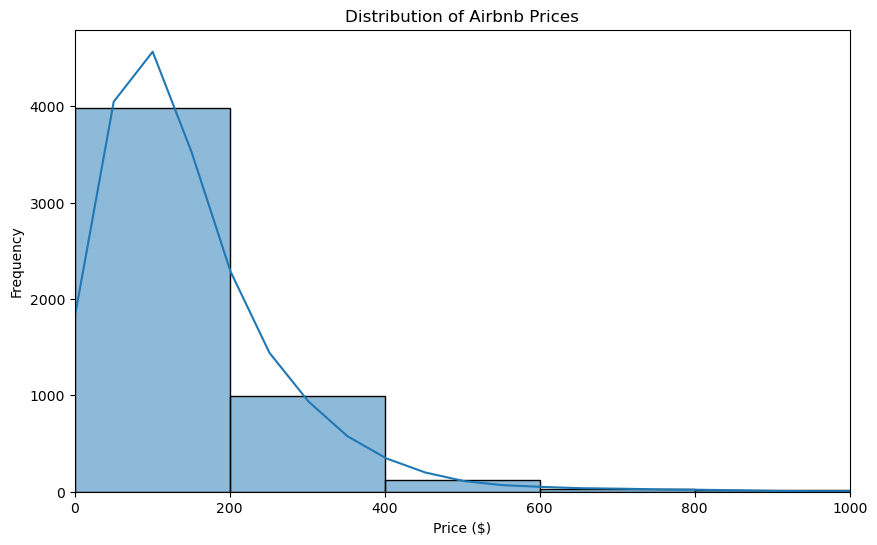

In [183]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Airbnb Prices")
plt.xlim(0, 1000)  # Adjust if needed
plt.show()

### 2.5 Documentation of Best Models

In [200]:
# Combined data for all models
combined_data = {
    "Metric": ["Train R²", "Train MAE", "Train MSE", "Test R²", "Test MAE", "Test MSE", "Explained Variance", "Final Model"],
    "LightGBM": [0.601, 0.228, 0.1000, 0.502, 0.257, 0.124, "-", "-"],
    "CatBoost": [0.582, 0.248, 0.105, 0.485, 0.128, 0.129, "-", "-"],
    "XGBoost": [0.614, 0.228, 0.097, 0.505, 0.260, 0.124, "-", "✅"],
    "Stacking (3 Models)": [0.59, 0.22, 0.10, 0.50, 0.25, 0.13, "Train: 0.59\nTest: 0.50", "Train: 0.59\nTest: 0.50"],
    "Voting (no weights specified)": [0.60, 0.23, 0.10, 0.50, 0.26, 0.12, "Train: 0.60\nTest: 0.50", "Train: 0.60\nTest: 0.50"],
    "Voting (tuned)": [0.60, 0.23, 0.10, 0.50, 0.27, 0.12, "Train: 0.60\nTest: 0.50", "-"]
}

# Create DataFrame
combined_df = pd.DataFrame(combined_data)

# Display the table without index
display.display(combined_df.style.set_table_styles([{
    'selector': 'thead th', 
    'props': [('background-color', '#f5f5f5'), ('font-weight', 'bold')]},
    {'selector': 'td', 
     'props': [('padding', '10px'), ('text-align', 'center')]},
    {'selector': 'table', 
     'props': [('width', '100%'), ('border-collapse', 'collapse')]}]).hide(axis='index'))